#  **Lending Club Case Study**
---
### **Problem Statement**
---

> Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters.

> In this case study, we"ll understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of "default". The company can utilise this knowledge for its portfolio and risk assessment.

***We will use Exploratory Data Analysis (EDA) to understand how consumer attributes and loan attributes influence the tendency of default.***

# 1 - Importing Python Libraries and Data Loading
---

In [ ]:
# Importing the python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',115)
pd.set_option('display.max_rows',115)

In [ ]:
# Downloading data and loading data as a data frame
lending_df = pd.read_csv('/content/loan.csv')
lending_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

---
# 2 - Data Understanding, Cleaning and Manipulating
---

In [ ]:
# checking the shape of the dataframe
lending_df.shape

(24220, 111)

In [ ]:
# Getting basic statistical details of the data frame
lending_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  2.422000e+04  2.422000e+04  24220.000000  24220.000000   
mean   8.183152e+05  1.022465e+06  11912.277044  11625.681255   
std    1.425124e+05  1.606626e+05   8022.692930   7727.858695   
min    2.967370e+05  2.967340e+05   1000.000000   1000.000000   
25%    6.995648e+05  8.904990e+05   6000.000000   5950.000000   
50%    8.003500e+05  1.005032e+06  10000.000000  10000.000000   
75%    9.690422e+05  1.189604e+06  16000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     24220.000000  24220.000000  2.422000e+04  24220.000000   
mean      11451.838899    332.064962  6.943785e+04     13.750533   
std        7584.303634    214.270775  4.904292e+04      6.692390   
min         400.000000     21.250000  6.000000e+03      0.000000   
25%        5700.000000    170.877500  4.200000e+04      8.590000   
50%        9995.309676    290.410000  6.000000e+04     13.820000   
75%       15000.000000    438.302500  8.400000e+04     19.010000   
max       35000.000000   1305.190000  1.900000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  24220.000000    24220.000000             8196.000000   
mean       0.148637        0.831544               36.938873   
std        0.505591        1.041060               21.541261   
min        0.000000        0.000000                1.000000   
25%        0.000000        0.000000               19.000000   
50%        0.000000        1.000000               35.000000   
75%        0.000000        1.000000               53.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             1257.000000  24220.000000  24220.000000   24220.000000   
mean                94.433572      9.361891      0.053262   13495.908051   
std                 20.323669      4.360386      0.231084   15763.413828   
min                 11.000000      2.000000      0.000000       0.000000   
25%                 88.000000      6.000000      0.000000    3970.000000   
50%                 98.000000      9.000000      0.000000    9132.500000   
75%                109.000000     12.000000      0.000000   17231.250000   
max                119.000000     39.000000      3.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  24220.000000  24220.000000   24220.000000  24220.000000   
mean      22.509579     84.005698      83.615220  12950.266077   
std       11.292501    477.562184     475.851887   9846.093288   
min        3.000000      0.000000       0.000000      0.000000   
25%       14.000000      0.000000       0.000000   5715.558066   
50%       21.000000      0.000000       0.000000  10449.993285   
75%       29.000000      0.000000       0.000000  17382.924188   
max       87.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     24220.000000     24220.000000   24220.000000        24220.000000   
mean      12753.930938     10287.121252    2554.120094            1.053273   
std        9657.535827      7557.991564    3013.542862            6.028495   
min           0.000000         0.000000       0.000000            0.000000   
25%        5652.855000      4800.000000     665.127500            0.000000   
50%       10308.080000      8500.000000    1396.460000            0.000000   
75%       17151.087500     14253.580000    3227.970000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  24220.000000             24220.000000     24220.000000   
mean     107.971454                10.380558      3065.759132   
std      718.336010               109.404824      4903.629106   
min    

### 2.1 - Dropping the duplicate rows (if any)
---

In [ ]:
duplicate_rows_df = lending_df[lending_df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
#lending_df = lending_df.drop_duplicates()
#lending_df.head(5)

Number of duplicate rows:  (0, 111)


### 2.2 - Dropping the missing or null values
---

In [ ]:
# Checking the null columns
lending_df.isnull().mean().round(4)*100

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.54
emp_length                          3.47
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               40.73
purpose                             0.00
title                               0.00
zip_code                            0.00
addr_state                          0.00
dti             

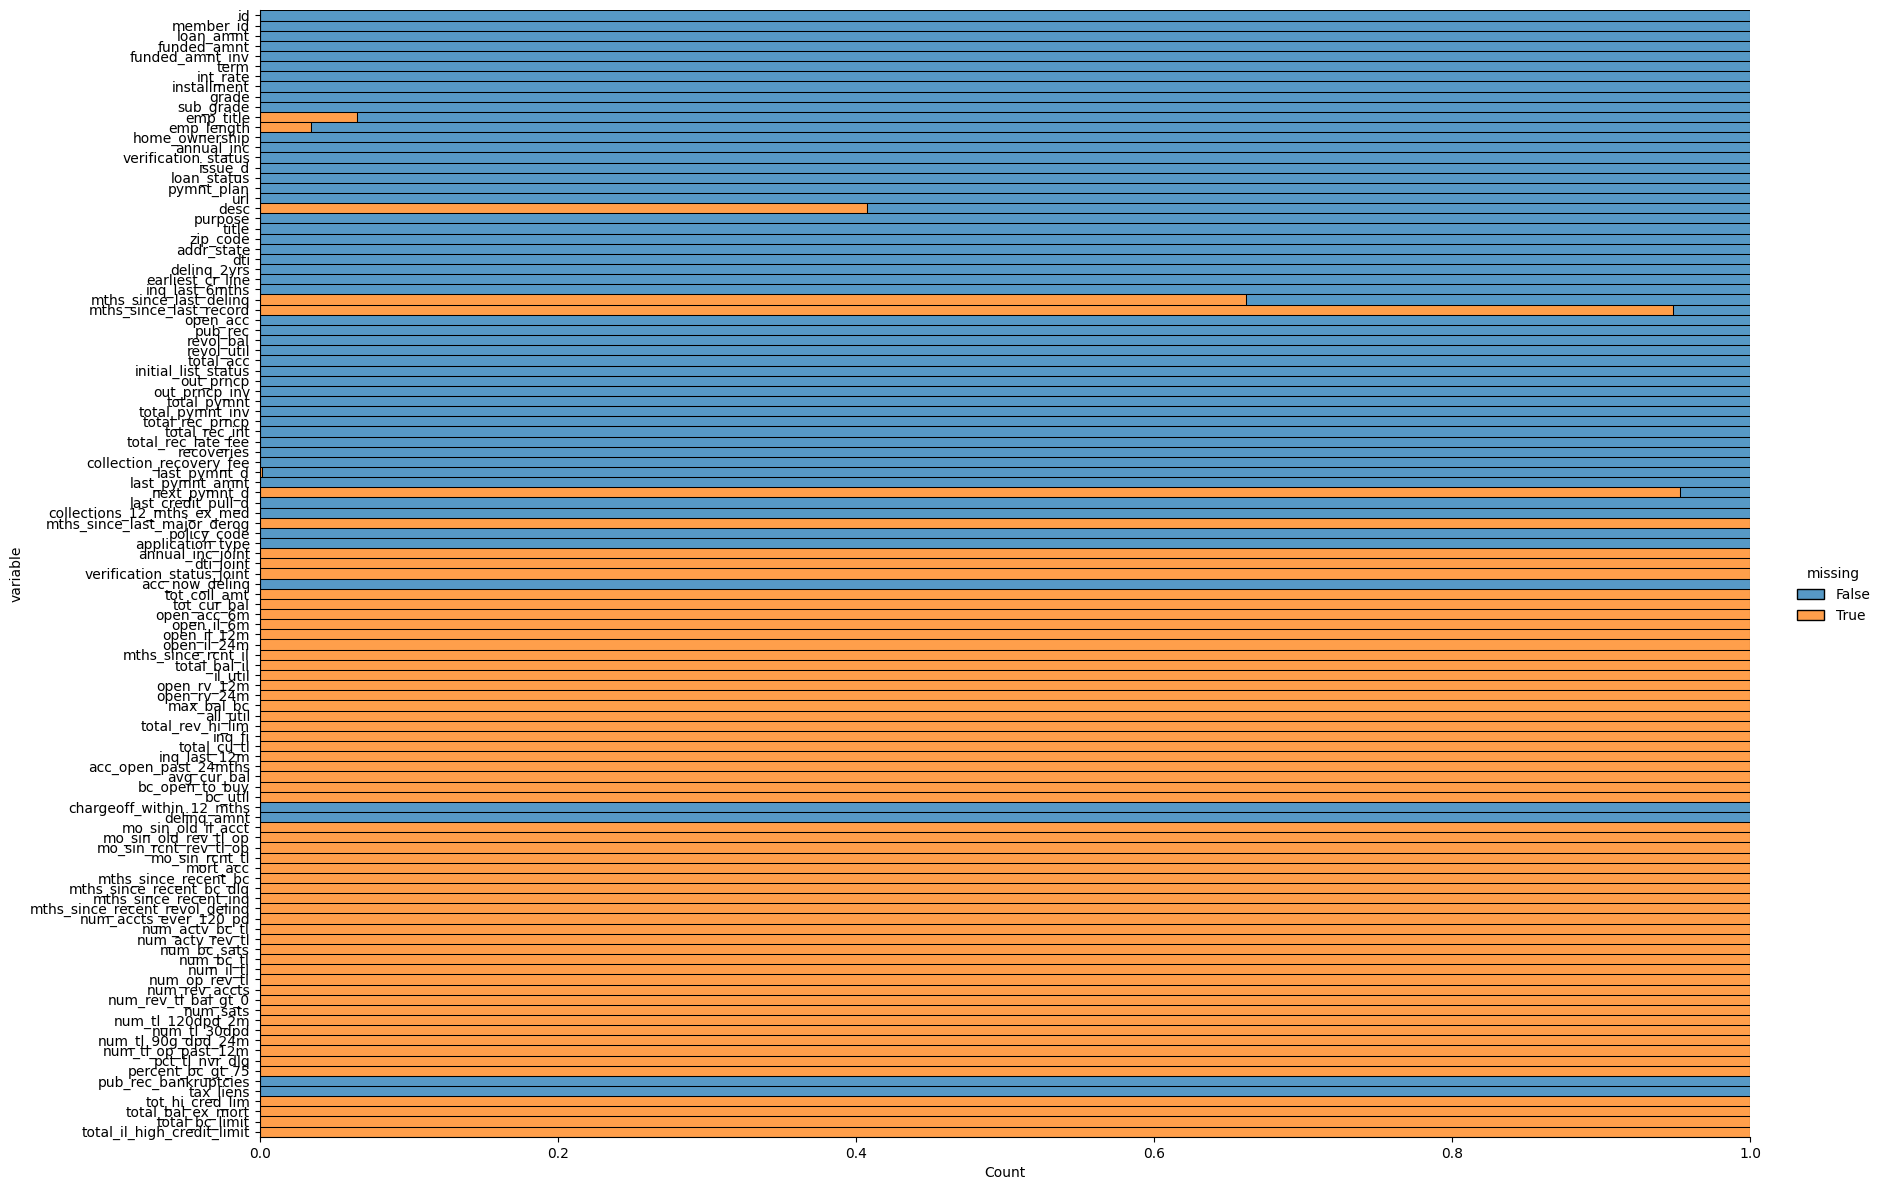

In [ ]:
# Let's check missing values graphically
sns.displot(
    data=lending_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=12,
    aspect=1.5
)
plt.show()

 #### Removing the columns with high percentage of missing values(>50%)

 > In the above graph, we obvsered that some of the columns has all NULL value and these columns won't help us in data analysis so descarding them. Generally if a column has more than 50% of missing value, we can drop those columns.


In [ ]:
#Let's drop columns more than 50% missing values
columns_to_drop = lending_df.columns[lending_df.isnull().mean() >= 0.50]
print("Columns to drop : \n", columns_to_drop,"\n")
lending_df.drop(columns=columns_to_drop, axis = 1, inplace=True)
print("DataFrame Shape after droping more than 50% missing valued columns: \n", lending_df.shape)

Columns to drop : 
 Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dp

### 2.3 - Identify and remove single valued columns
---

> Any categorical or numerical data with single values won't give us any analytical info.
* The nunique() function can be used to find some columns with just one type of information. These columns don't really provide useful data for analysis, so it's a good idea to get rid of them from dataset.


In [ ]:
lending_df.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           4
home_ownership                    4
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          13
issue_d                          15
sub_grade                        35
open_acc                         37
addr_state                       45
last_pymnt_d                     66
last_credit_pull_d               66
total_acc                        72
int_rate                    

Following colums has just single unqiue value and won't provide any analytical advantage. Thus can be dropped.

1. tax_liens                         
2. delinq_amnt                       
3. chargeoff_within_12_mths          
4. acc_now_delinq                    
5. application_type                  
6. policy_code                       
7. initial_list_status               
8. collections_12_mths_ex_med        
9. pymnt_plan                        

In [ ]:
#Dropping the single valued columns
lending_df.drop(columns=lending_df.columns[lending_df.nunique()== 1], axis = 1, inplace=True)
print("DataFrame Shape after dropping single valued columns:", lending_df.shape)

DataFrame Shape after dropping single valued columns: (24220, 45)


In [ ]:
#checking no of nulls values against each column
lending_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  1584
emp_length                  840
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
desc                       9865
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   10
total_ac

> NOTE: There are some misssing values that we will address those later by imputing values or delete those rows.


### 2.4 - Identify and remove least signifiance columns
---



> **Observation**:<br/>
There are some categorical data with huge number of unique values will be difficult to analyze, those can be drop from dataset. <br/><br/>
Action Taken:
1. The "desc" column contains text data with 32% missing value and this can be deleted.
2. "id", "member_id", "url" are not required as it is just for unique identification and columns with higher number of unique values can be dropped. These columns can be dropped due to least significance.
3. "emp_title",, "title","zip_code" as these are the kind of info which has no influence in our analysis and It doesn't give any significant understanding. These extra columns can be removed.
4. "recoveries", "collection_recovery_fee" represent the amounts recovered from defaults and are not considered in the analysis.
5. "revol_bal" can be exclude from the analysis since "revol_util" serves as a more suitable substitute.
6. 'last_pymnt_d','last_credit_pull_d', 'last_pymnt_amnt' can be droped as these are related to current ongoing loan.
7. "total_rec_late_fee" is not useful for our analysis as it is Late fees received to date.
8. "total_rec_int" does not drive the defaulter, hence dropping it.

In [ ]:
# Removing unnecessary columns
lending_df.drop(["desc","id", "member_id", "emp_title", "url", "title",
                  "zip_code", 'recoveries','collection_recovery_fee', 'revol_bal',
                 'last_pymnt_d','last_credit_pull_d',  'last_pymnt_amnt', 'total_rec_late_fee',
                 'total_rec_int'], axis = 1, inplace = True)
print("DataFrame Shape after removing unnecessary columns: \n", lending_df.shape)


DataFrame Shape after removing unnecessary columns: 
 (24220, 30)


### 2.5 - Imputing the missing values
---



> Imputations technique :
* Numerical Columns => mean/median
* Categorical Columns => mode

In [ ]:
# Checking the missing value again
lending_df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length              840
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               10
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
pub_rec_bankruptcies      1
dtype: int64

> Categorical data like **"emp_length"** which has 1075 null values, Let's analyze current values count.

In [ ]:
print("Checking % of current values\n",lending_df['emp_length'].value_counts(normalize=True)*100)

Checking % of current values
 10+ years    25.132592
< 1 year     10.436270
3 years      10.325064
2 years      10.136869
4 years       8.999145
5 years       8.977759
1 year        7.412318
6 years       6.509837
7 years       4.940120
8 years       3.887938
9 years       3.242087
Name: emp_length, dtype: float64


> The above value counts shows that the mode value
(10+ years) has far higher frequency than that of the next most frequent value.
This means that we can safely assign the value of mode to the null values in the column.

In [ ]:
# Filling Categorical column "emp_length" missing value with mode
mod=lending_df["emp_length"].mode()[0]
lending_df["emp_length"] = lending_df["emp_length"].fillna(mod)
print("\nNo of missing value in emp_length column after imputing:", lending_df.emp_length.isna().sum())


No of missing value in emp_length column after imputing: 0


> Numerical data like **"revol_util"** which has 50 null values so, rather than deleting them let's impute them using the MEDIAN.

In [ ]:
# Filling Categorical column "revol_util" missing value with median
lending_df.revol_util = lending_df.revol_util.astype(str)
lending_df.revol_util = lending_df.revol_util.apply(lambda x : x.replace('%', '')).astype(float)
print(lending_df['revol_util'].describe())
lending_df["revol_util"] = lending_df["revol_util"].fillna(lending_df["revol_util"].median())
print("\nNo of missing value revol_util column after imputing:", lending_df.revol_util.isna().sum())

count    24210.000000
mean        50.121559
std         28.014081
min          0.000000
25%         27.300000
50%         51.200000
75%         73.400000
max         99.900000
Name: revol_util, dtype: float64

No of missing value revol_util column after imputing: 0


> Numerical data like **"pub_rec_bankruptcies"** which has 697 null values, so rather than deleting them let's impute them using the MEDIAN.

In [ ]:
# Filling Categorical column "pub_rec_bankruptcies" missing value with median
print(lending_df['pub_rec_bankruptcies'].describe())
lending_df["pub_rec_bankruptcies"] = lending_df["pub_rec_bankruptcies"].fillna(lending_df["pub_rec_bankruptcies"].median())
print("\nNo of missing value in pub_rec_bankruptcies column after imputing:", lending_df.pub_rec_bankruptcies.isna().sum())

count    24219.000000
mean         0.044139
std          0.206610
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

No of missing value in pub_rec_bankruptcies column after imputing: 0


In [ ]:
# Checking the missing value again
lending_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
pub_rec_bankruptcies    0
dtype: int64

> last_pymnt_d and last_credit_pull_d column has some missing values. Let's ignore as of now.

In [ ]:
# Looking into dataset again
lending_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65            0   
1  Dec-11  Charged Off             car         GA   1.00            0   
2  Dec-11   Fully Paid  small_business         IL   8.72            0   
3  Dec-11   Fully Paid           other         CA  20.00            0   
4  Dec-11      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0           Jan-85               1         3        0        83.7          9   
1           Apr-99               5         3        0         9.4          4   
2           Nov-01               2         2        0        98.5         10   
3           Feb-96               1        10        0        21.0         37   
4           Jan-96               0        15        0        53.9         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

### 2.6 - Checking the data type of columns and fixing the incorrect data types and format
---

In [ ]:
#checking the data types to identify the incorrect data type
lending_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util              float64
total_acc                 int64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [ ]:
# removing % sign from the int_rate column and converting it into float
lending_df['int_rate'] = lending_df['int_rate'].astype(str)
lending_df['int_rate']	= lending_df['int_rate'].apply(lambda x : x.replace('%', '')).astype(float)
# fromating issue_d and creating derived column for loan issue month and year
lending_df['issue_d'] = pd.to_datetime(lending_df['issue_d'], format='%b-%y')
lending_df['issue_month'] = lending_df['issue_d'].dt.month
lending_df['issue_year'] = lending_df['issue_d'].dt.year
# creating target column based on loan status
lending_df['target'] = np.where(lending_df['loan_status'] == 'Charged Off', 1, 0)

###  2.7 - Detecting and Handeling Outliers
---

> Segregate the columns into
1.   Categorical columns
2.   Continuous/Numerical columns
3.   Extra columns

NOTE : Numerical columns with lower number of unique values can be consider as Categorical columns
* pub_rec_bankruptcies      -     3
* pub_rec          -              5
* inq_last_6mths     -            9
* delinq_2yrs         -          11
* open_acc - 44



In [ ]:
categorical_columns = ['grade',	'sub_grade',	'emp_length',	'home_ownership', 'verification_status',
                       'purpose',	'addr_state', 'term', 'pub_rec_bankruptcies','pub_rec',
                       'inq_last_6mths','delinq_2yrs', 'open_acc', 'issue_month', 'issue_year']

numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti',
                    'revol_util',	'total_acc'	,'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']

other_columns = ['issue_d', 'earliest_cr_line', "out_prncp","out_prncp_inv"]
print(len(categorical_columns)+ len(numerical_columns) + len(other_columns))
print('DataFrame shape : ', lending_df.shape)

31
DataFrame shape :  (24220, 33)


In [ ]:
lending_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'target'],
      dtype='object')

In [ ]:
# checking quantile range for numerical columns
lending_df[numerical_columns].quantile([0, 0.25, 0.5, 0.75,0.90, 0.95, 0.98, 1.00]).round(2).T

0.00      0.25      0.50      0.75       0.90       0.95  \
loan_amnt        1000.00   6000.00  10000.00  16000.00   24000.00   29700.00   
funded_amnt      1000.00   5950.00  10000.00  15000.00   23000.00   28000.00   
funded_amnt_inv   400.00   5700.00   9995.31  15000.00   22347.27   26896.44   
int_rate            5.42      8.49     11.71     15.20      17.88      19.29   
installment        21.25    170.88    290.41    438.30     625.81     777.56   
annual_inc       6000.00  42000.00  60000.00  84000.00  118007.50  144000.00   
dti                 0.00      8.59     13.82     19.01      22.67      24.20   
revol_util          0.00     27.30     51.20     73.40      88.10      93.70   
total_acc           3.00     14.00     21.00     29.00      38.00      43.00   
total_pymnt         0.00   5715.56  10449.99  17382.92   27023.06   33318.33   
total_pymnt_inv     0.00   5652.86  10308.08  17151.09   26491.94   32776.00   
total_rec_prncp     0.00   4800.00   8500.00  14253.58   20500.00   25000.00   

                      0.98        1.00  
loan_amnt         35000.00    35000.00  
funded_amnt       35000.00    35000.00  
funded_amnt_inv   33940.50    35000.00  
int_rate             20.89       24.59  
installment         903.88     1305.19  
annual_inc       185000.00  1900000.00  
dti                  26.17       29.99  
revol_util           97.20       99.90  
total_acc            50.00       87.00  
total_pymnt       40950.04    58563.68  
total_pymnt_inv   40093.48    58563.68  
total_rec_prncp   30701.79    35000.02

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_outlier_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [ ]:
outliers = []
# Outlier detection for continuous variables
for col in numerical_columns:
    print(f"{col} :  {check_outlier(lending_df, col)}")
    outliers.append(check_outlier(lending_df, col))

print(f"Outliers detected? {np.array(outliers).any()}")

loan_amnt :  False
funded_amnt :  False
funded_amnt_inv :  False
int_rate :  False
installment :  False
annual_inc :  True
dti :  False
revol_util :  False
total_acc :  False
total_pymnt :  False
total_pymnt_inv :  False
total_rec_prncp :  False
Outliers detected? True


> Below columns has outliers
1. annual_inc

0.25     42000.0
0.50     60000.0
0.75     84000.0
0.90    118007.5
0.95    144000.0
0.99    230000.0
Name: annual_inc, dtype: float64


<Axes: >

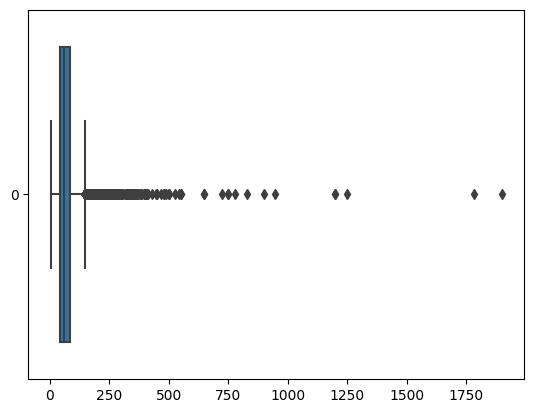

In [ ]:
# checking quantile range
print(lending_df['annual_inc'].quantile([0.25, 0.5, 0.75,0.90, 0.95, 0.99]).round(2).T)
# dividing by 1000 for the ease of read and converting value in ('000s')
sns.boxplot(lending_df['annual_inc']/1000.00, orient="h")

> The "annual_inc" values after 95 percentile seems to be disconected from the general distribution. So considering replace outlier value using IQR logic.

(24220, 33)

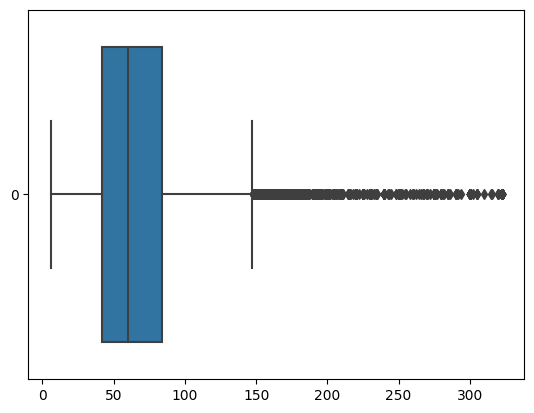

In [ ]:
replace_outlier_with_thresholds(lending_df, 'annual_inc')
# after removing outlier let's look at distibution of records using box plot
sns.boxplot(lending_df['annual_inc']/1000.00, orient="h")
lending_df.shape

---
# 3 - Data Analysis
---

In [ ]:
lending_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
4 2011-12-01      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0           Jan-85               1         3        0        83.7          9   
1           Apr-99               5         3        0         9.4          4   
2           Nov-01               2         2        0        98.5         10   
3           Feb-96               1        10        0        21.0         37   
4           Jan-96               0        15        0        53.9         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   pub_rec_bankruptcies  issue_month  issue_year  target  
0                   0.0           12        2011       0  
1                   0.0           12        2011       1  
2                   0.0           12        2011       0  
3                   0.0           12        2011       0  
4                   0.0           12        2011       0

> After reviewing the data, we've identified three loan categories: "current," "fully paid," and "charged off." For our analysis, we concentrate on borrowers who have fully paid or defaulted to uncover behavior patterns. Consequently, we've excluded current loan data from our analysis.

In [ ]:
# Dropping the rows where loan status equals to "current"
lending_df.drop(lending_df[lending_df.loan_status == 'Current'].index, inplace = True)
chargedoff_data = lending_df[lending_df['loan_status'] == 'Charged Off']
fullypaid_data = lending_df[lending_df['loan_status'] == 'Fully Paid']
print(lending_df.shape)

(23080, 33)


> As we droped current on going loan, and out_prncp and out_prncp_inv related to outstanding principal and has single unique values, hence we are droping these column.

In [ ]:
lending_df.drop(["out_prncp","out_prncp_inv"], axis = 1, inplace = True)
print("DataFrame Shape: \n", lending_df.shape)

DataFrame Shape: 
 (23080, 31)


## 3.1 - Univariate and Segmented Univariate Analysis
---

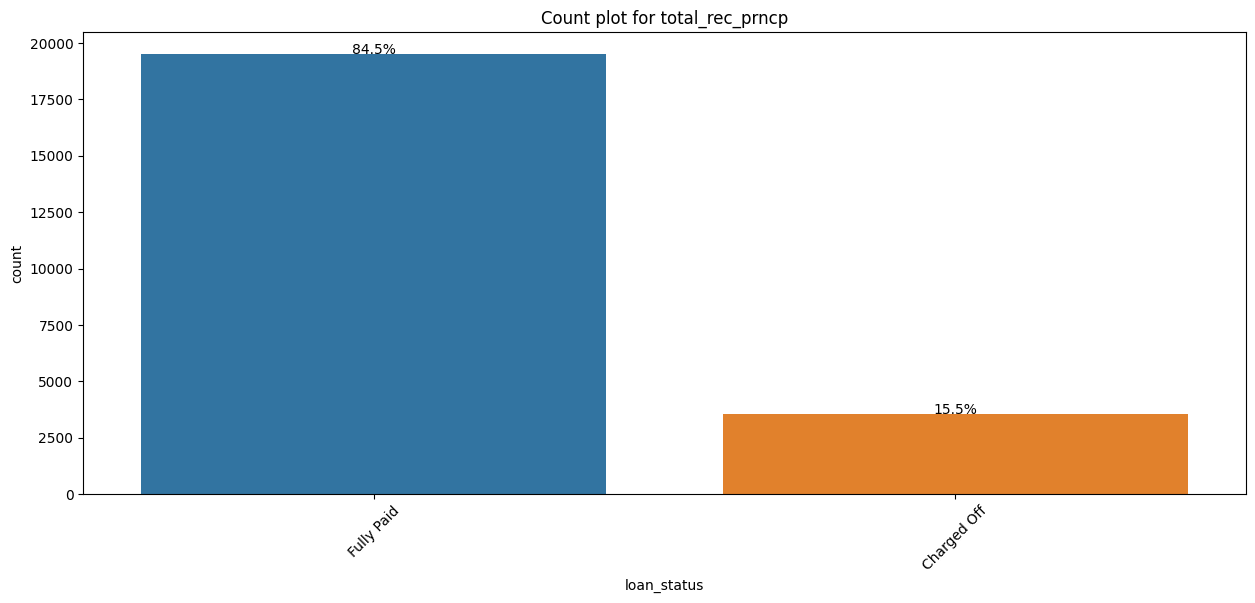

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='loan_status', data=lending_df, order=lending_df['loan_status'].value_counts().index)
total = len(lending_df)
ax = plt.gca()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.xticks(rotation=45)
plt.title('Count plot for {col}'.format(col = col))
plt.show()

**Analysis of categorical column**

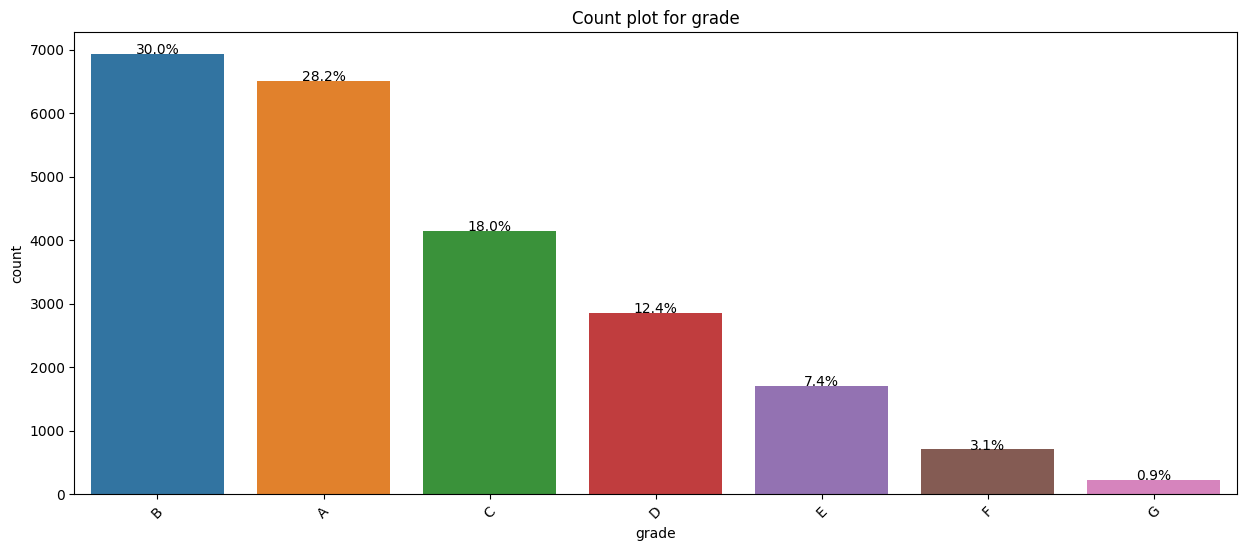

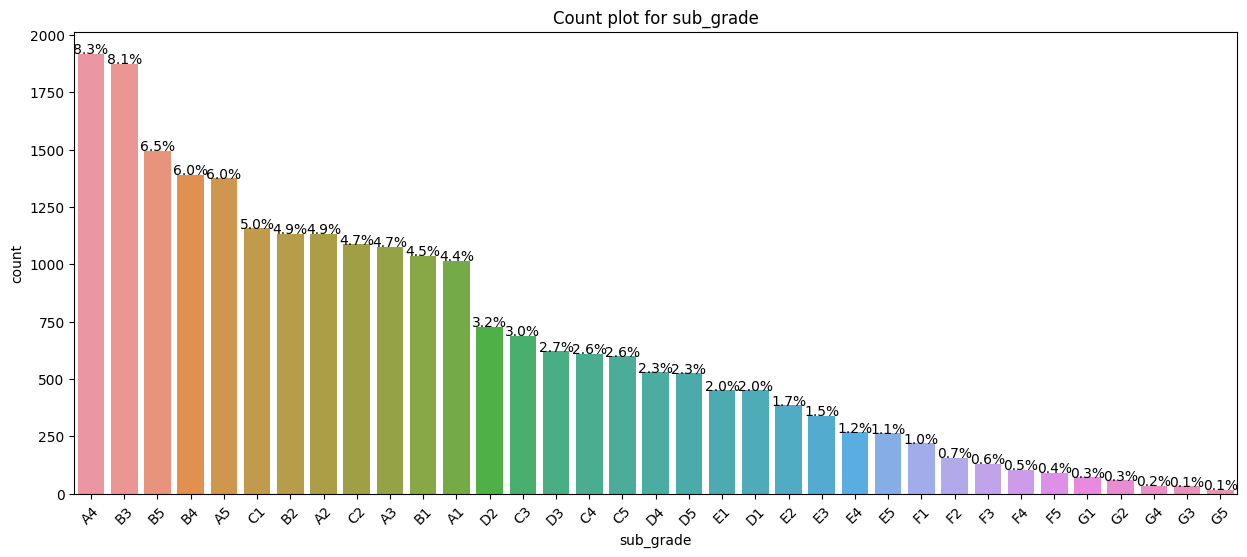

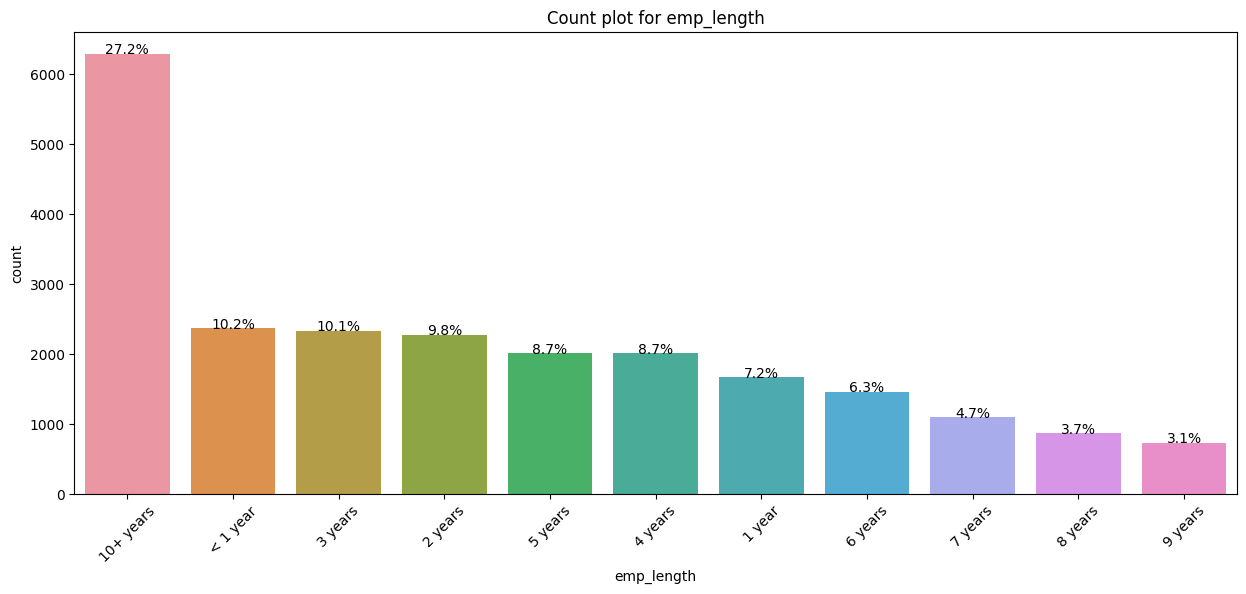

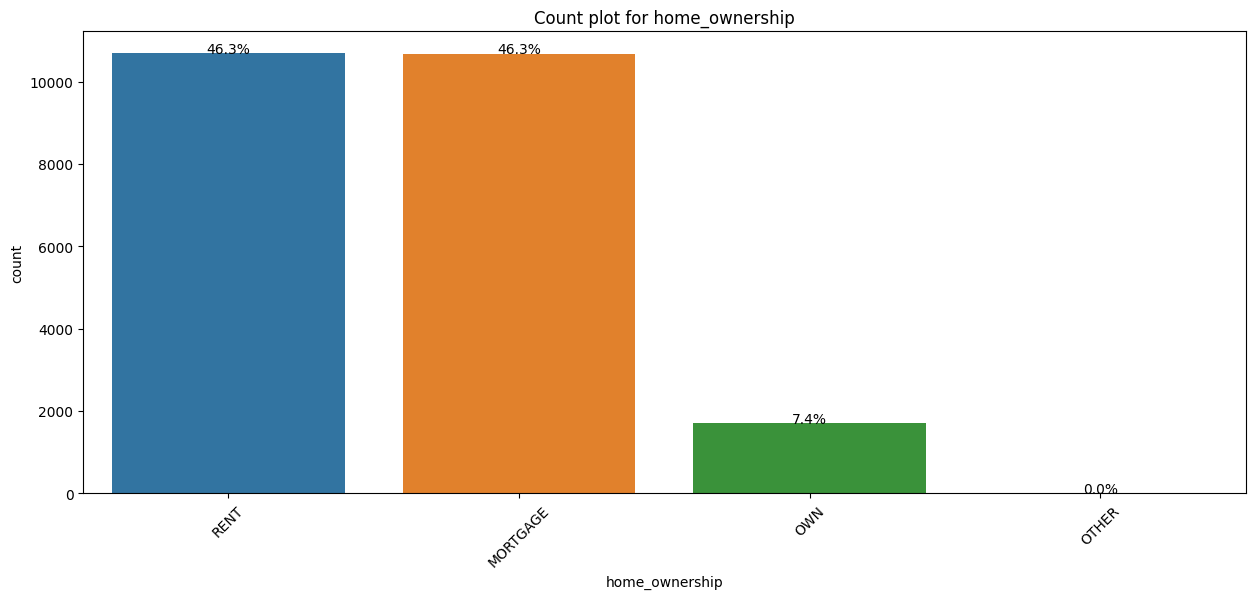

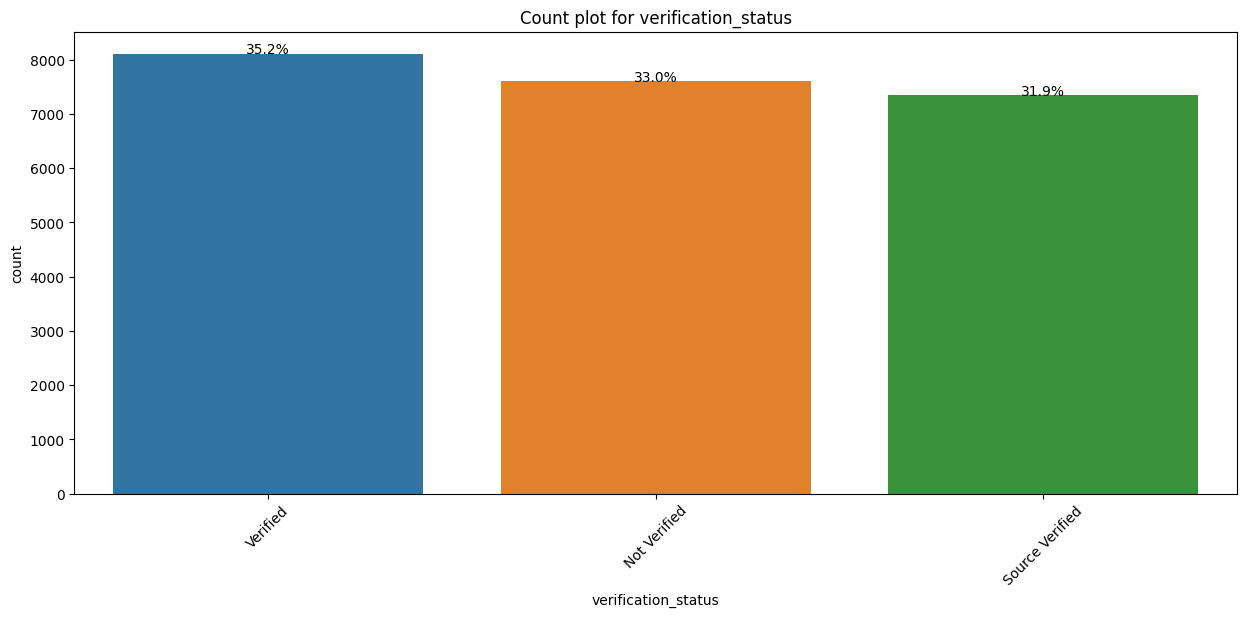

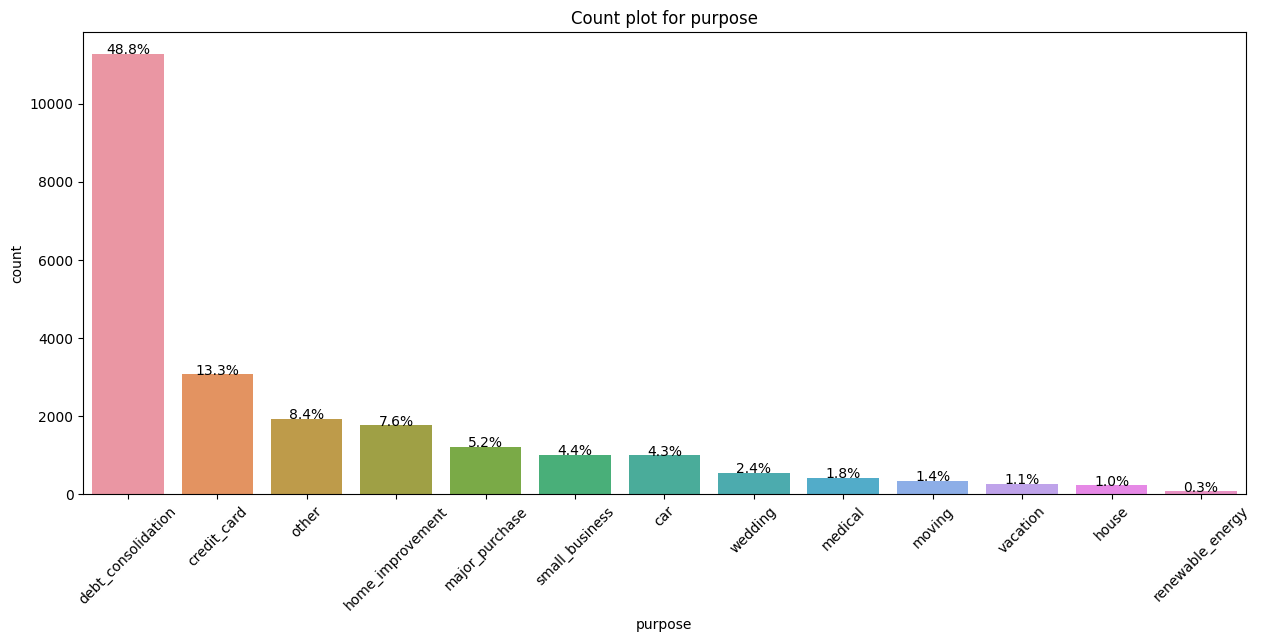

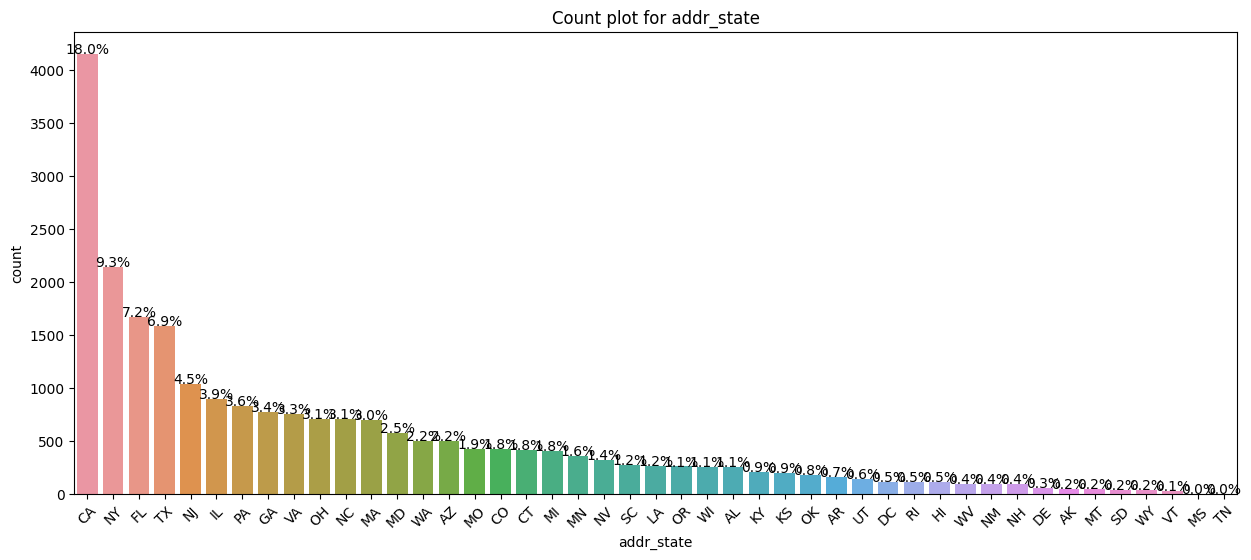

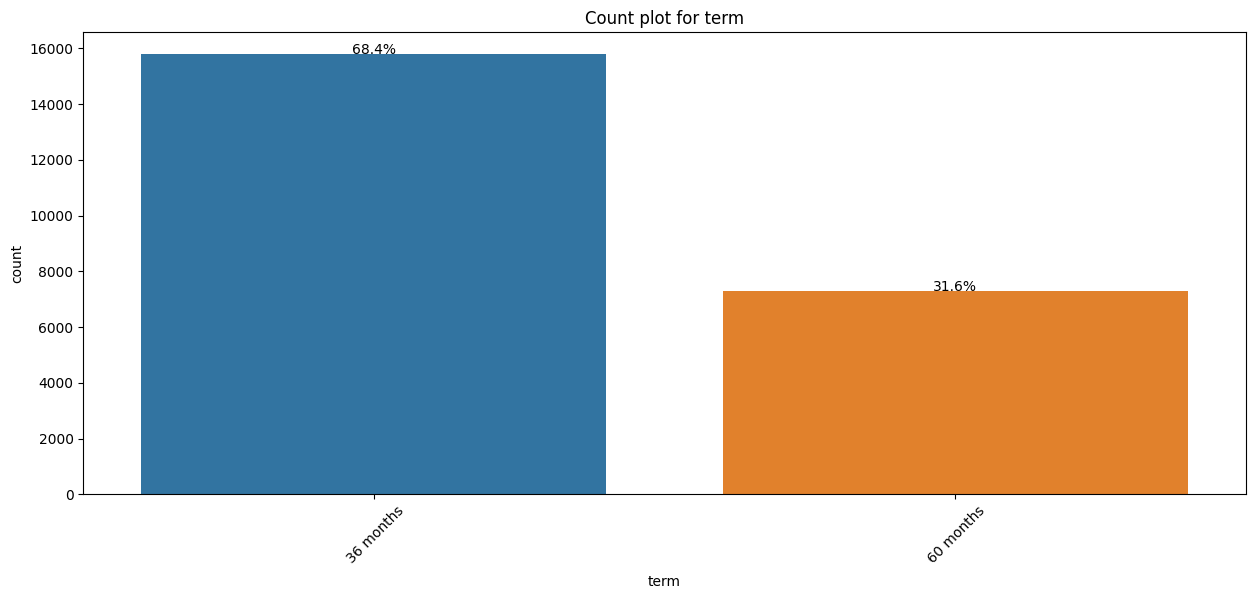

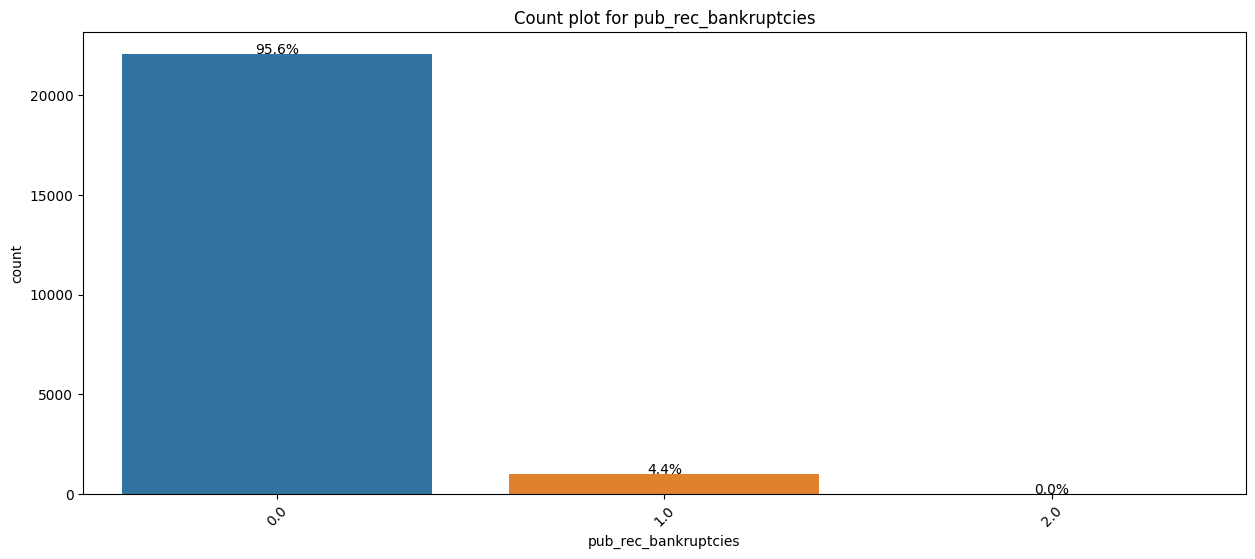

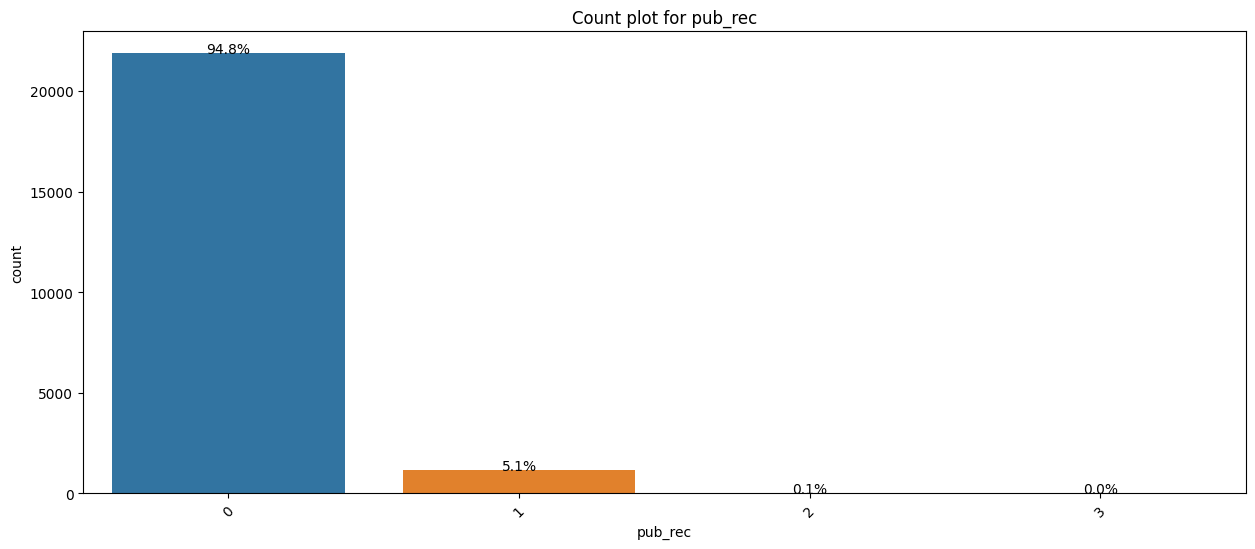

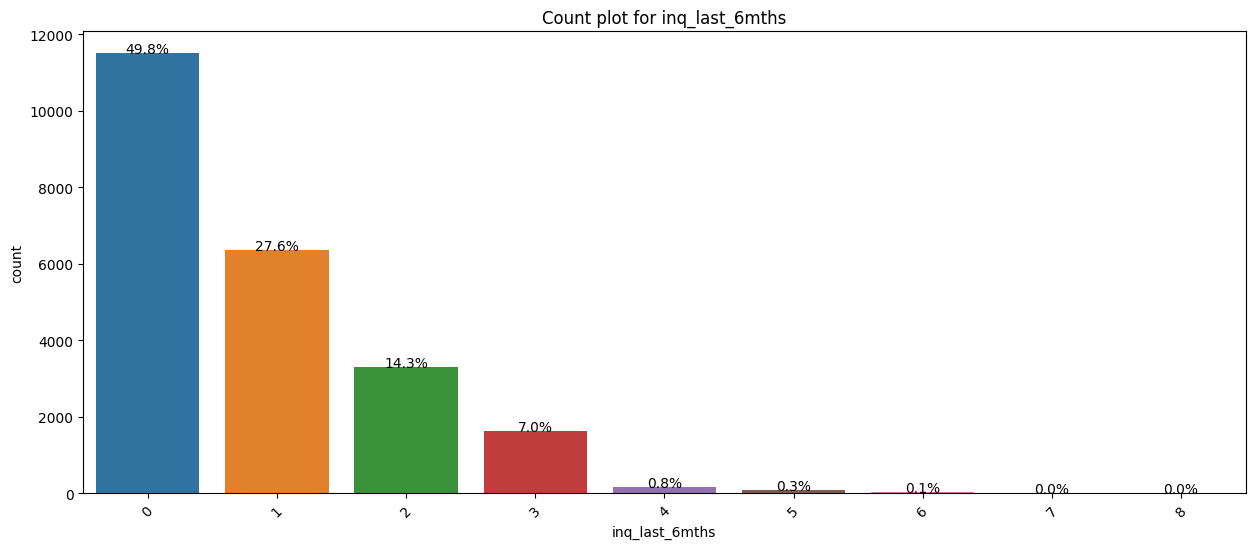

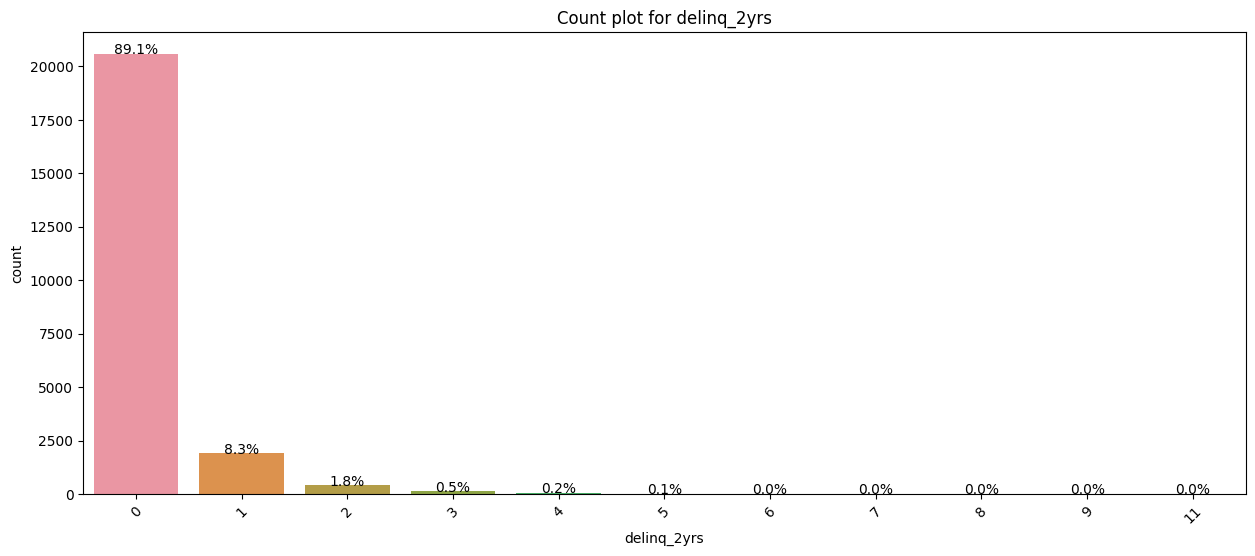

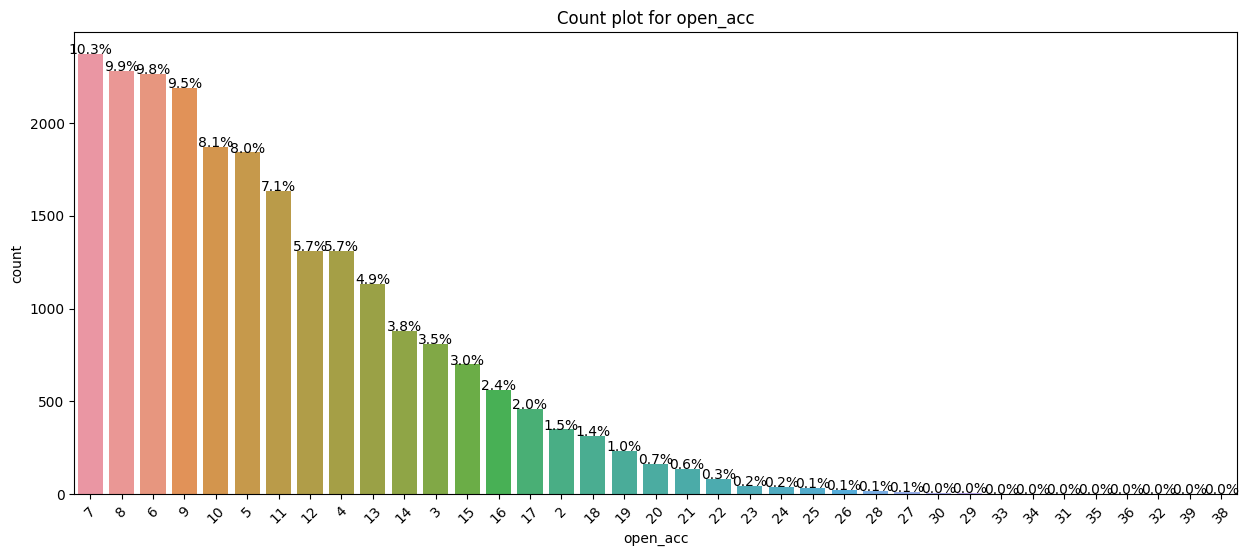

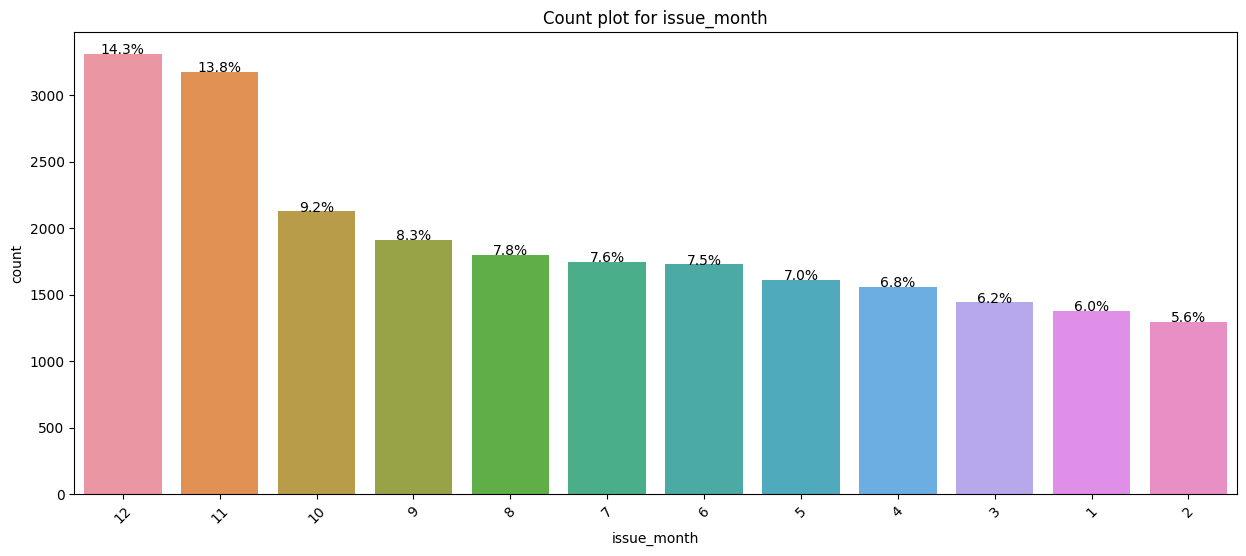

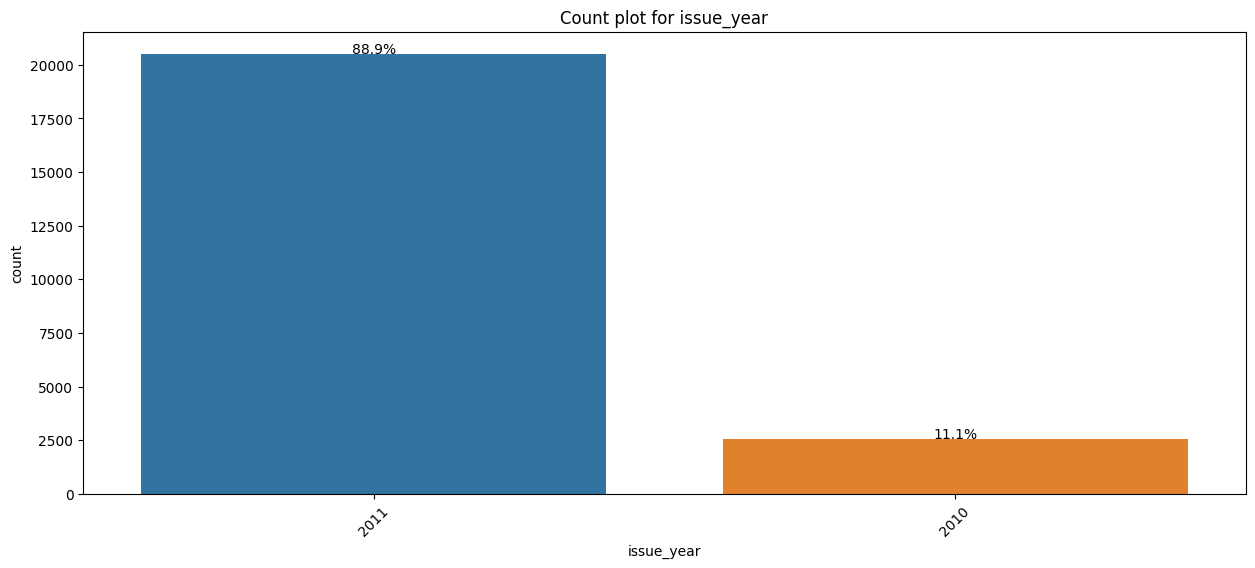

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=col, data=lending_df, order=lending_df[col].value_counts().index)
    total = len(lending_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=45)
    plt.title('Count plot for {col}'.format(col = col))
    print('\n')
    plt.show()

#### **Key observations based on the Univariate analysis of categorical columns**

1. **Loan Status** => Only 15% of the borrowers are 'Defaulters'
2. **Term** => Most of the loans (73%) have 36 months tenure whereas only 26% loans have 60 months tenure.
3. **Grade** => Most common loan grades are B(30%), followed by A(26%) and C(20%)
4. **Sub Grade** =>  Most of the loans are of sub-grade A4 followed by B3, and A5
5. **Home Ownership, purpose** = Most of the borrowers don't have their own house. 90% borrowers either pay "Rent" or "Mortgage" their house.  47% borrowers' purpose is 'debt_consolidation'. But only 1% borrowers''purpose' of the loan is 'house'.
6. **Verification Status** => 44% of the borrowers' income is 'not verified' which is risky.
7. **Address** => Most applicants are from the California, New York and Florida
8. **Employment Length** => Most applicants have more than 10 years of employment, followed by less than 1 year



### Segmented Univariate Analysis
---
> We are conducting segmented univariate analysis for multiple categorical columns to explore how the distribution of loan statuses ("Fully Paid" and "Charged Off") varies within each category of the chosen variable.

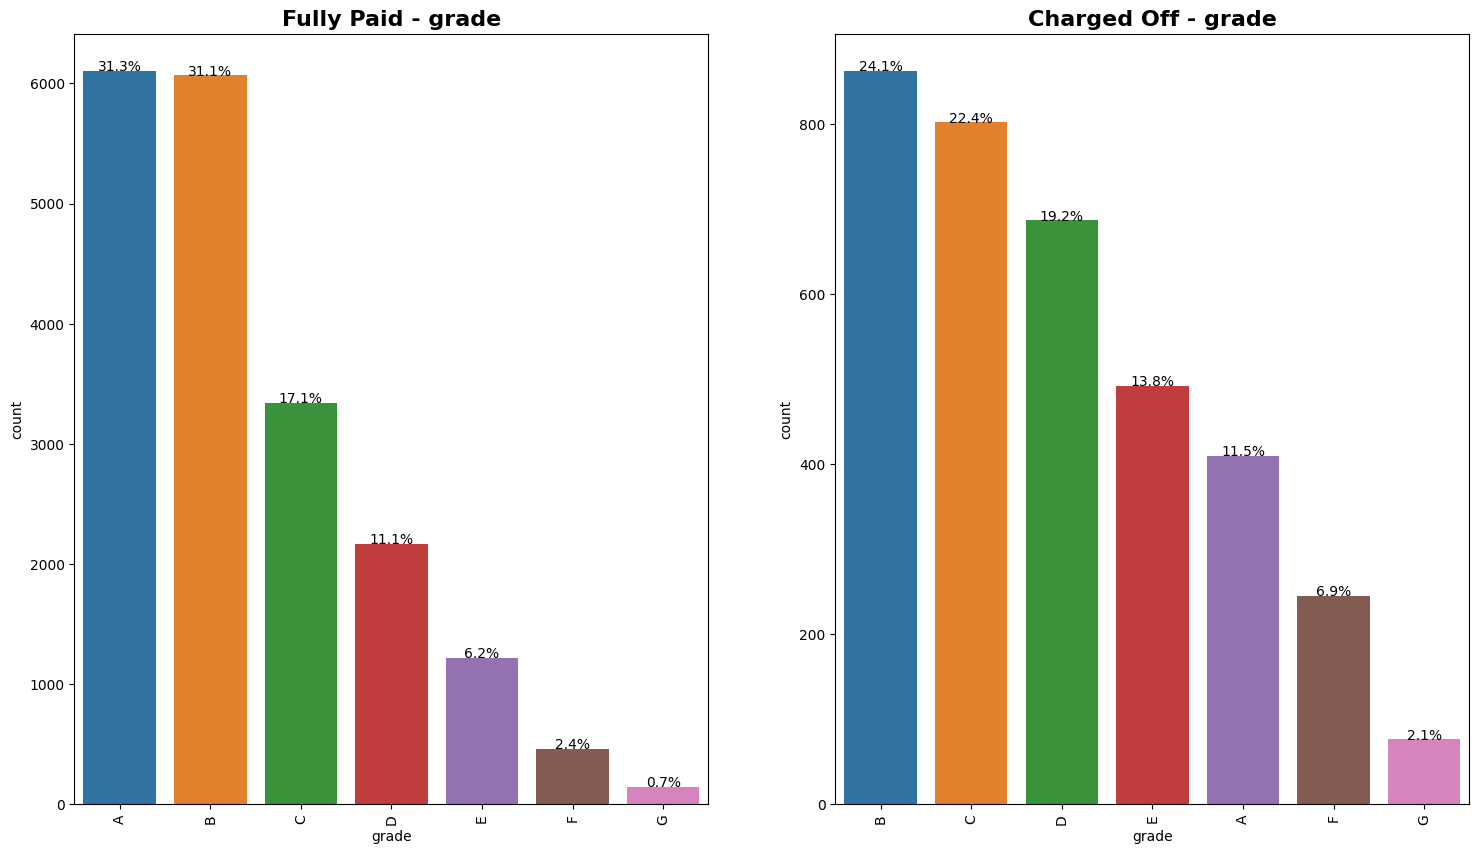

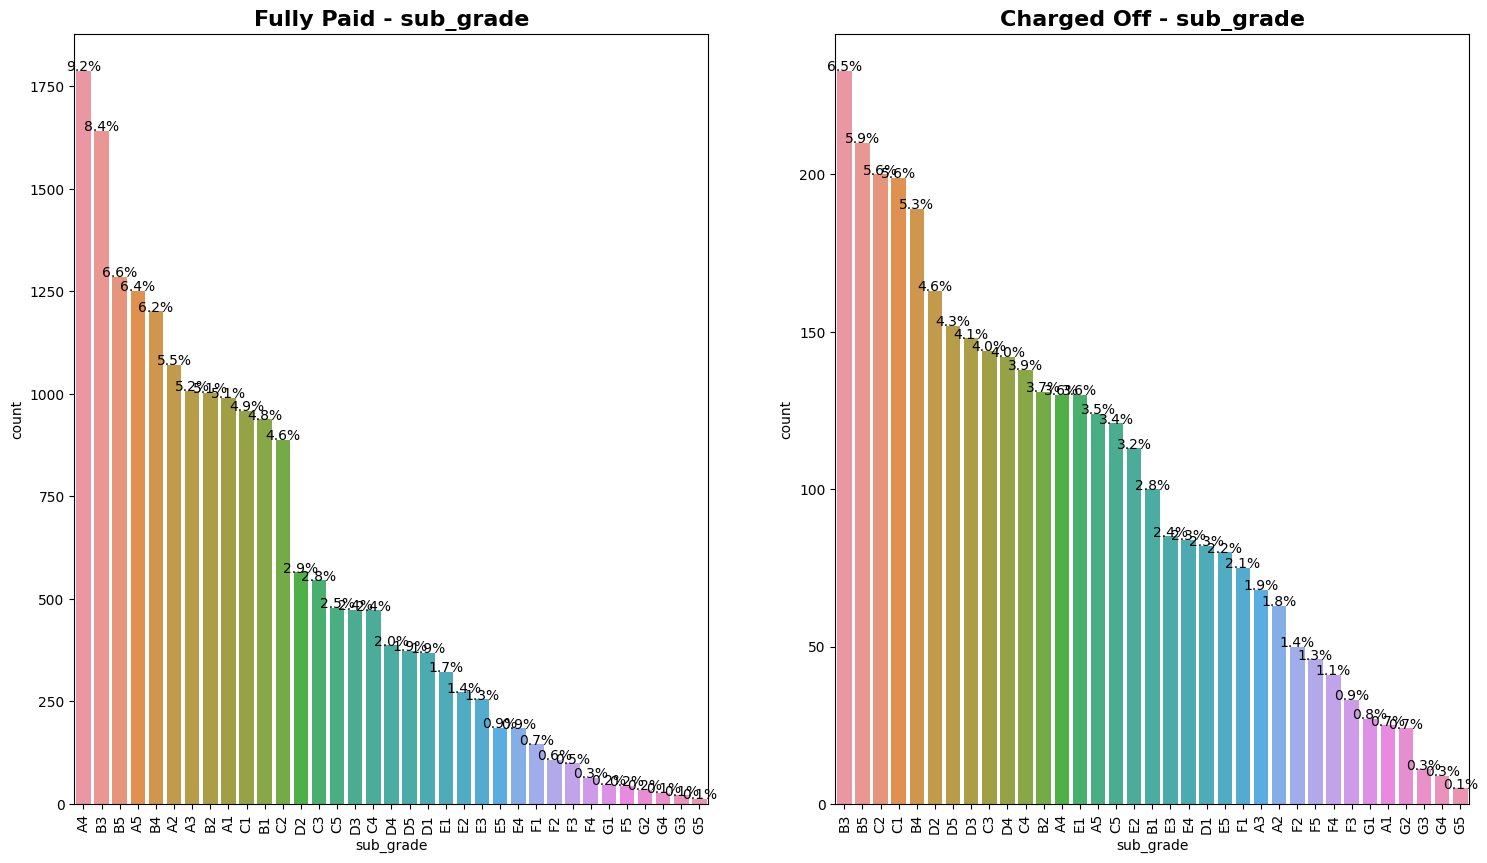

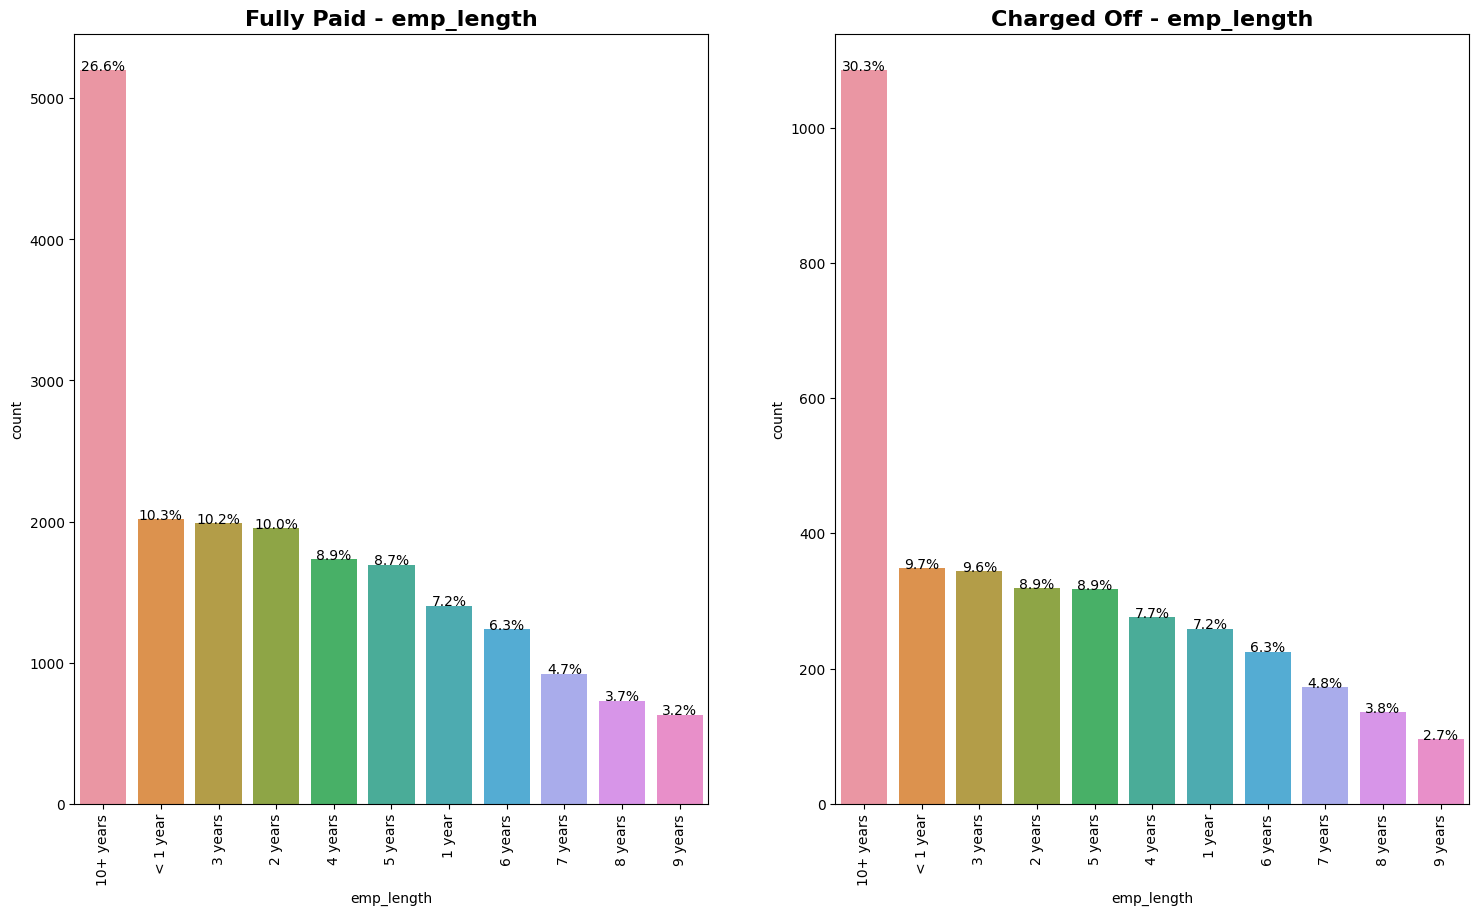

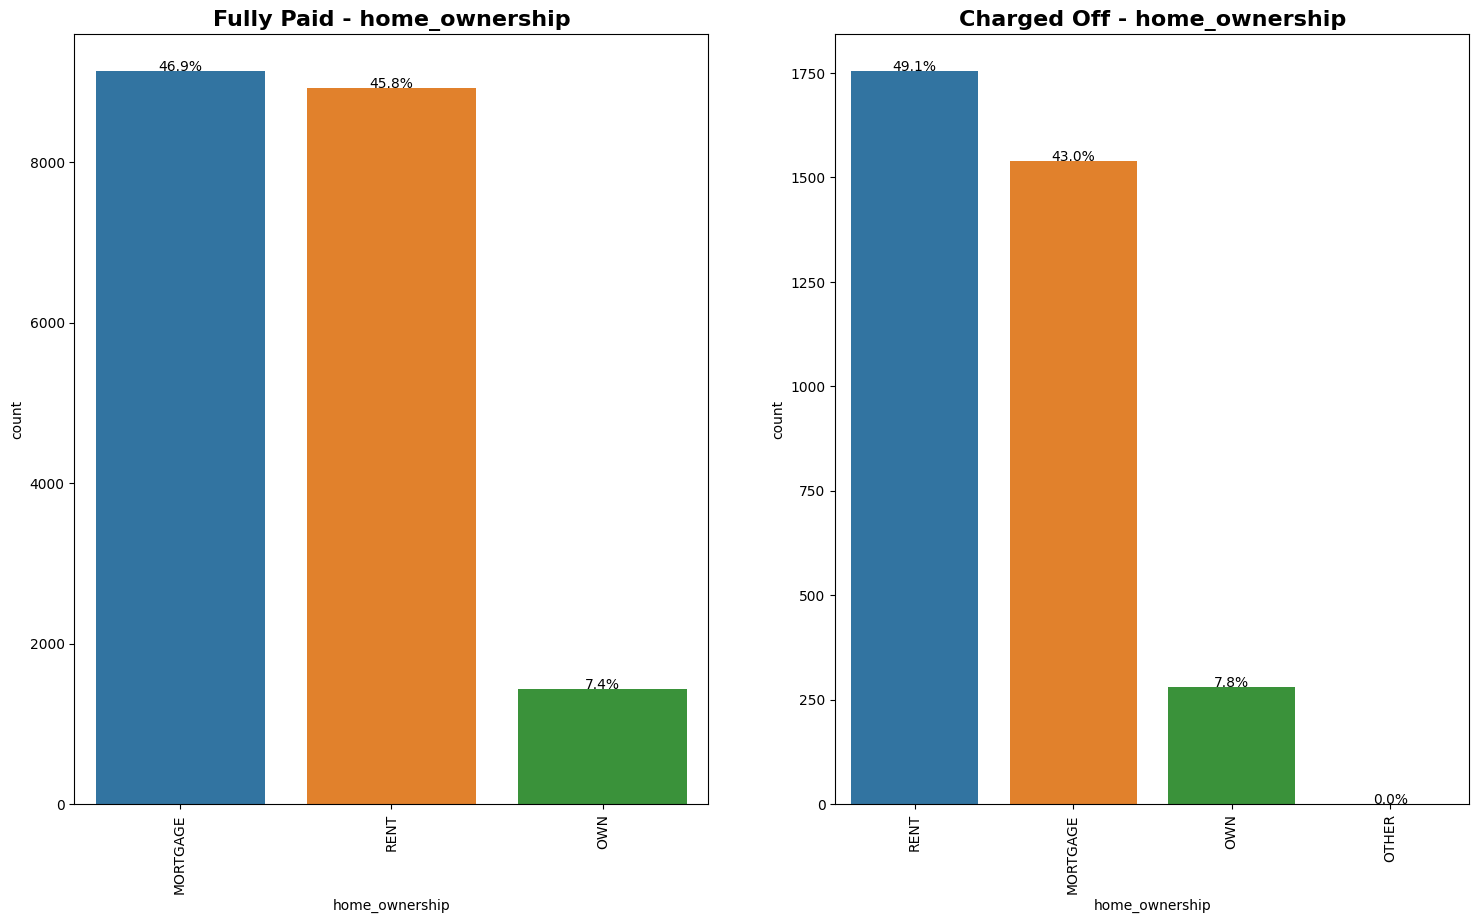

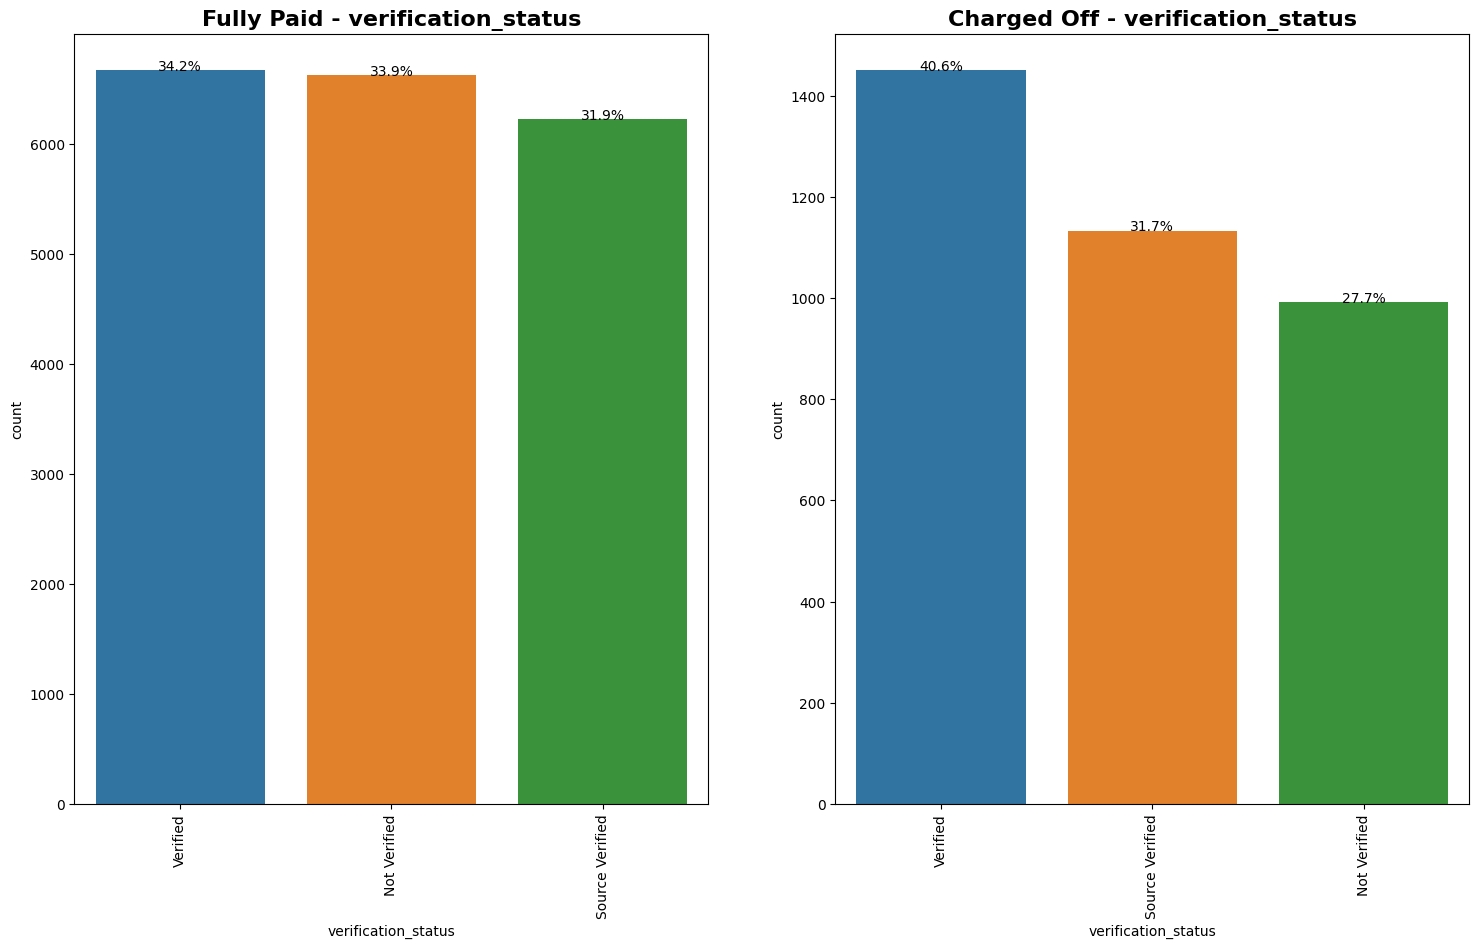

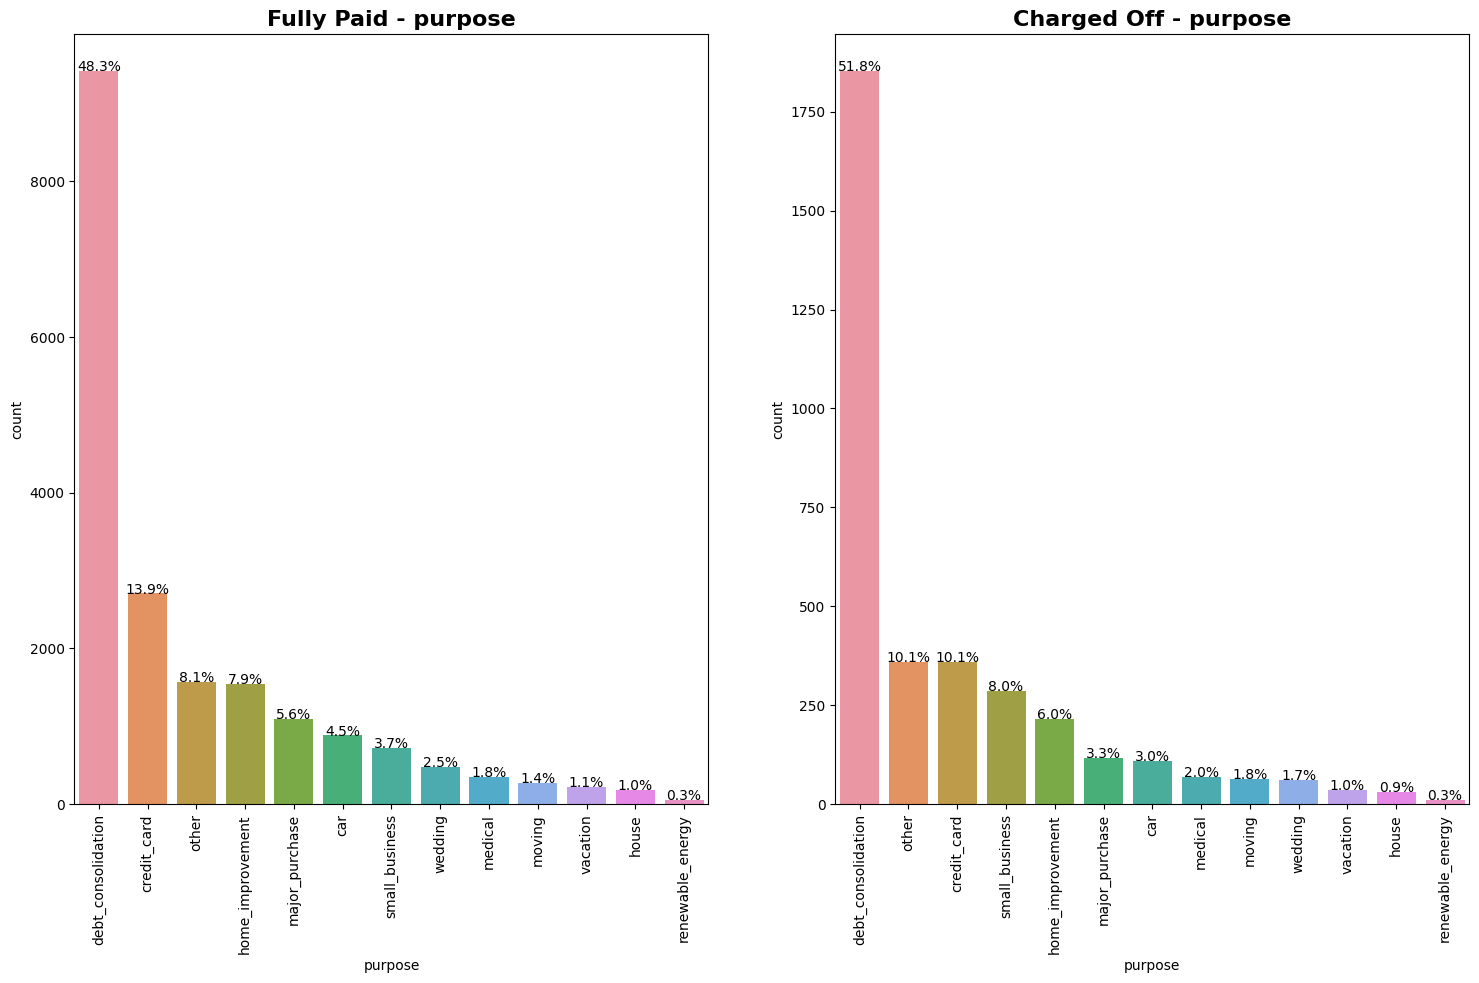

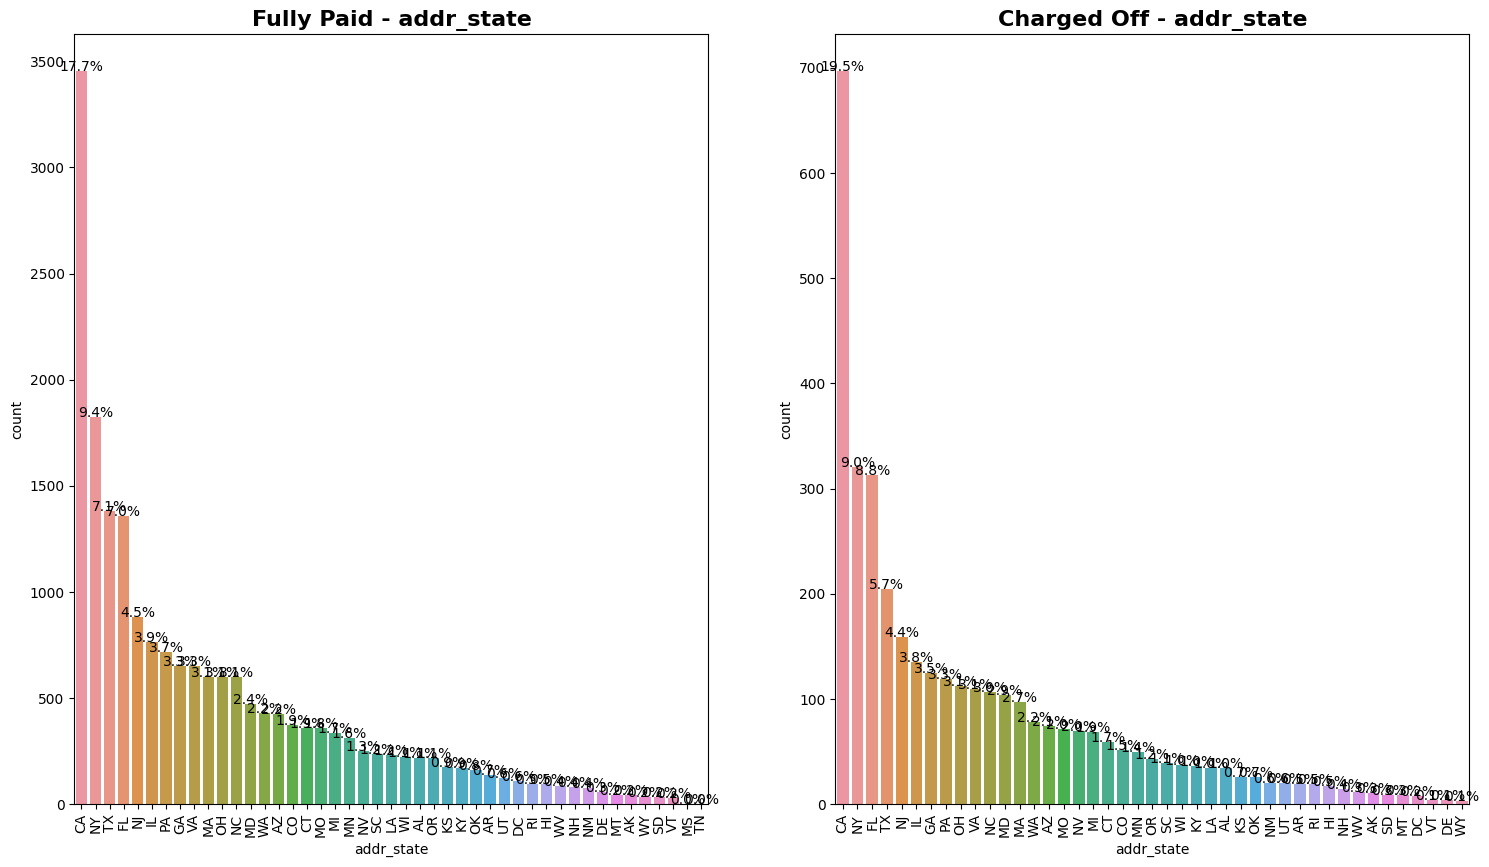

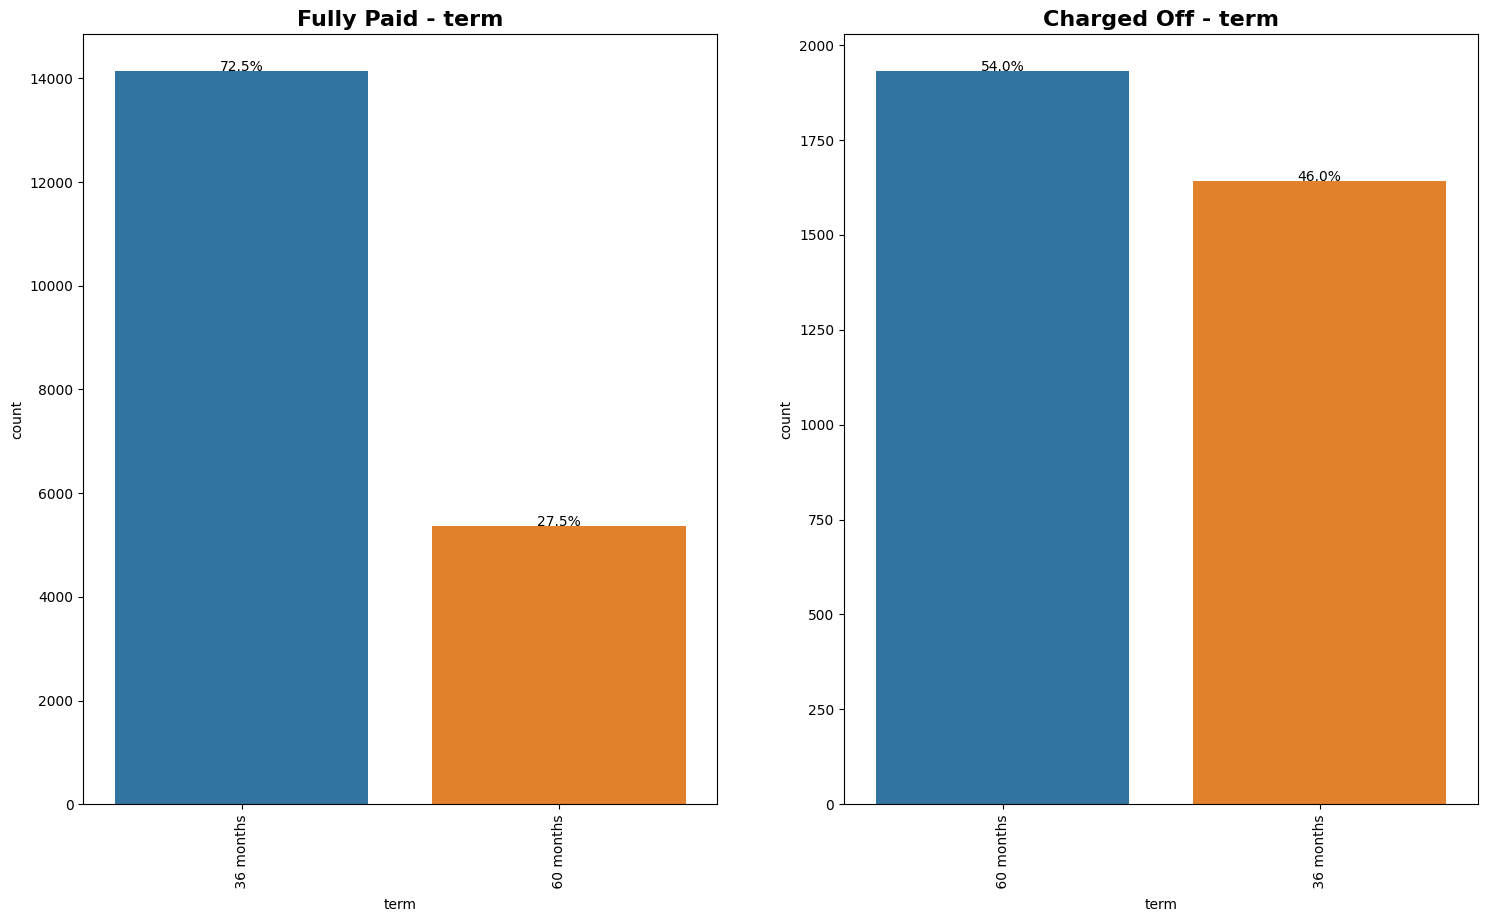

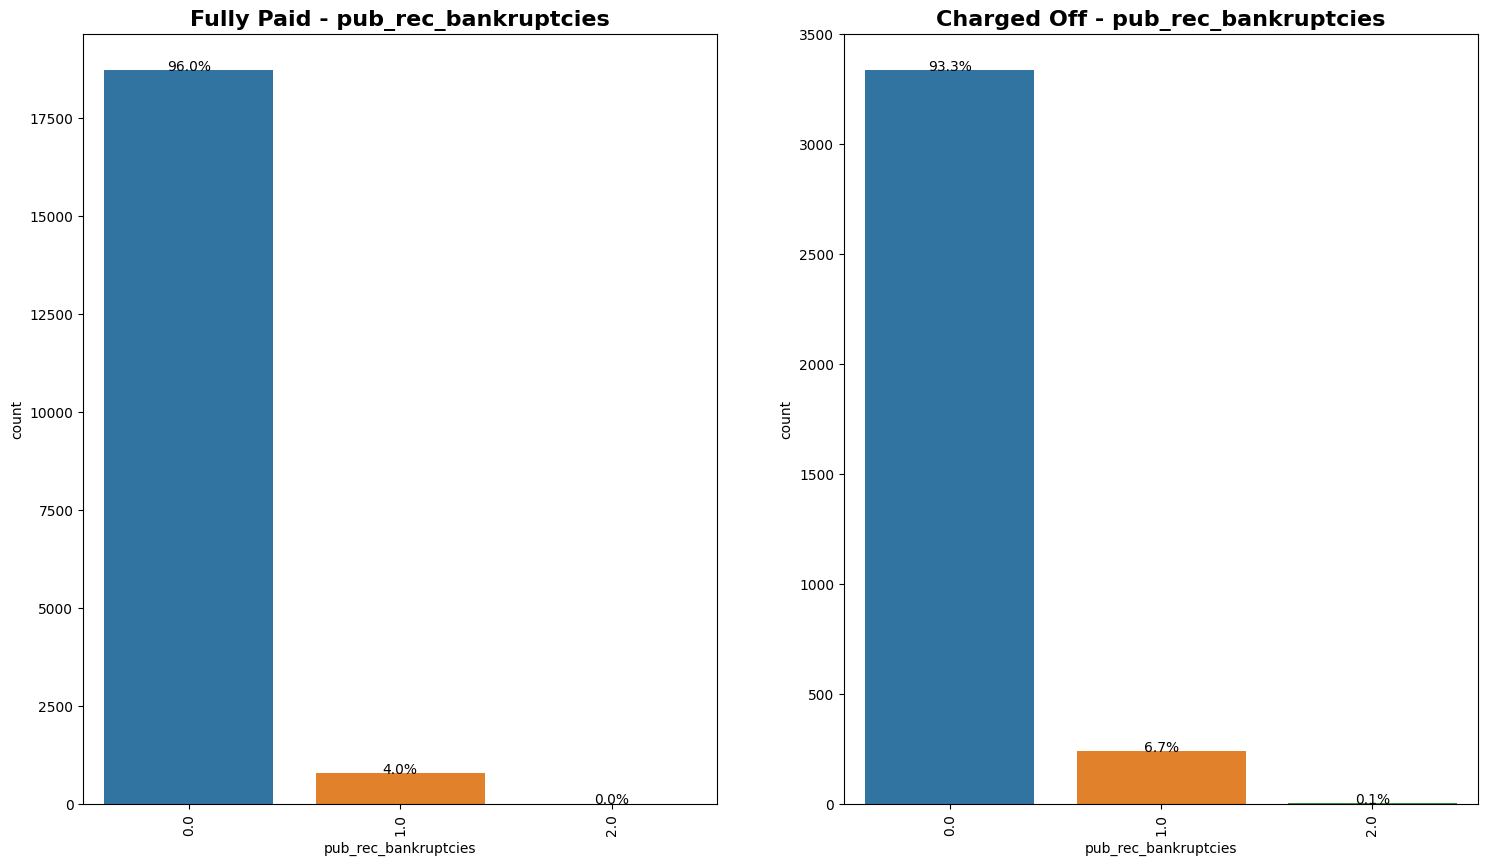

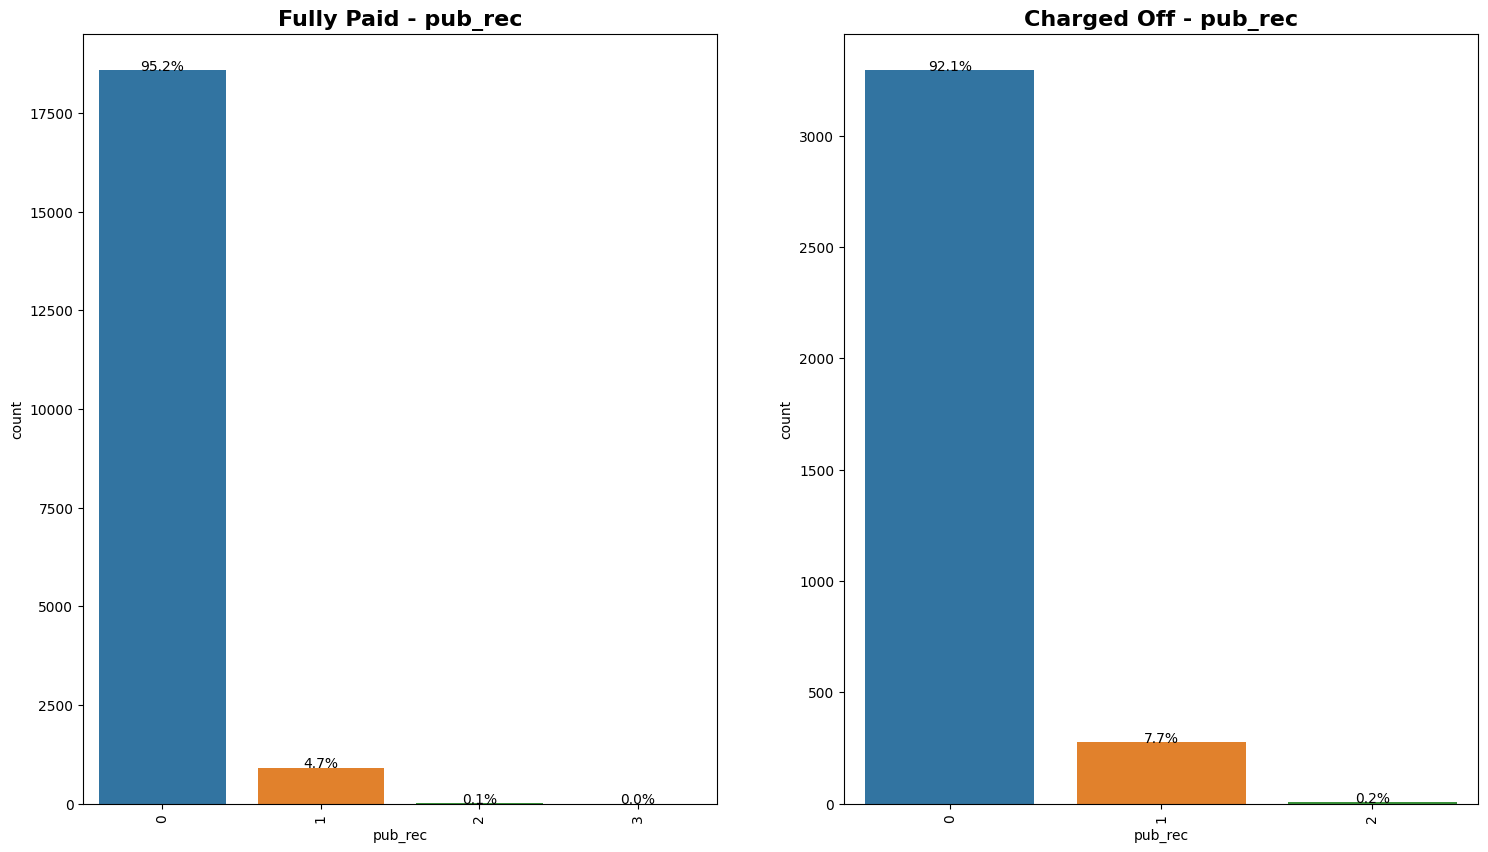

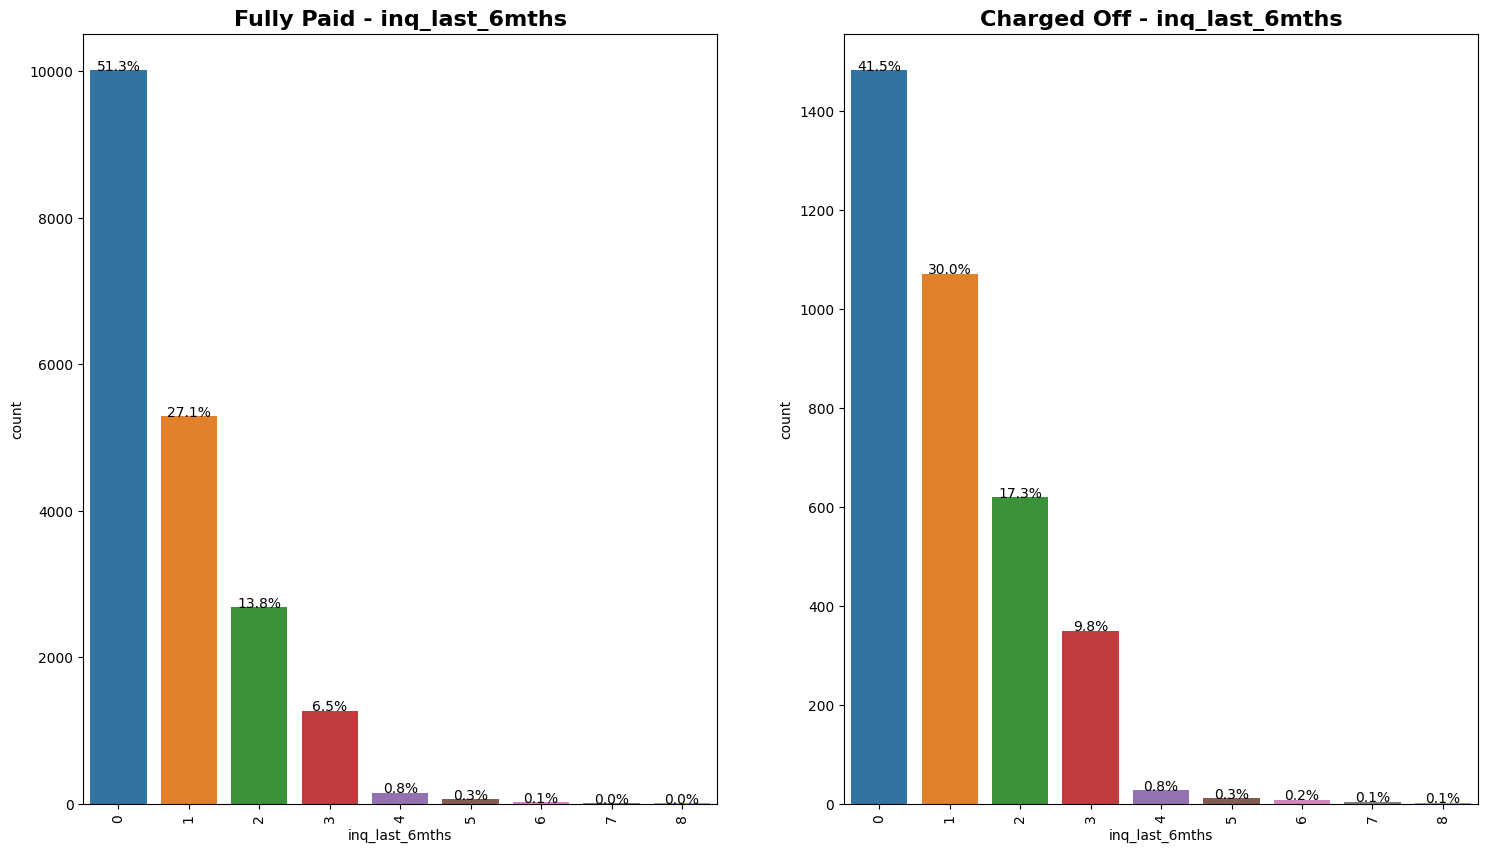

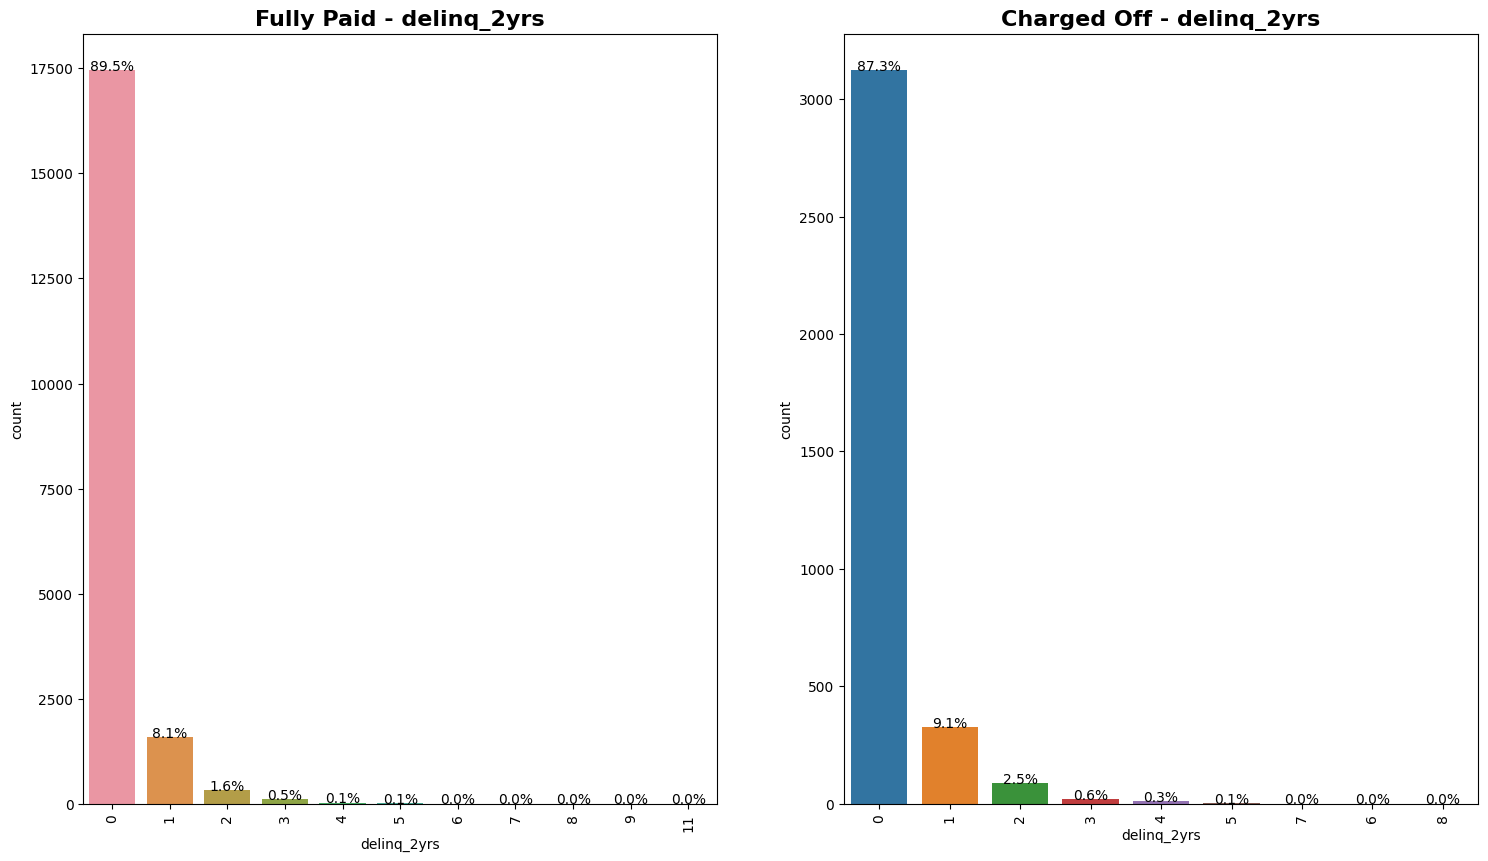

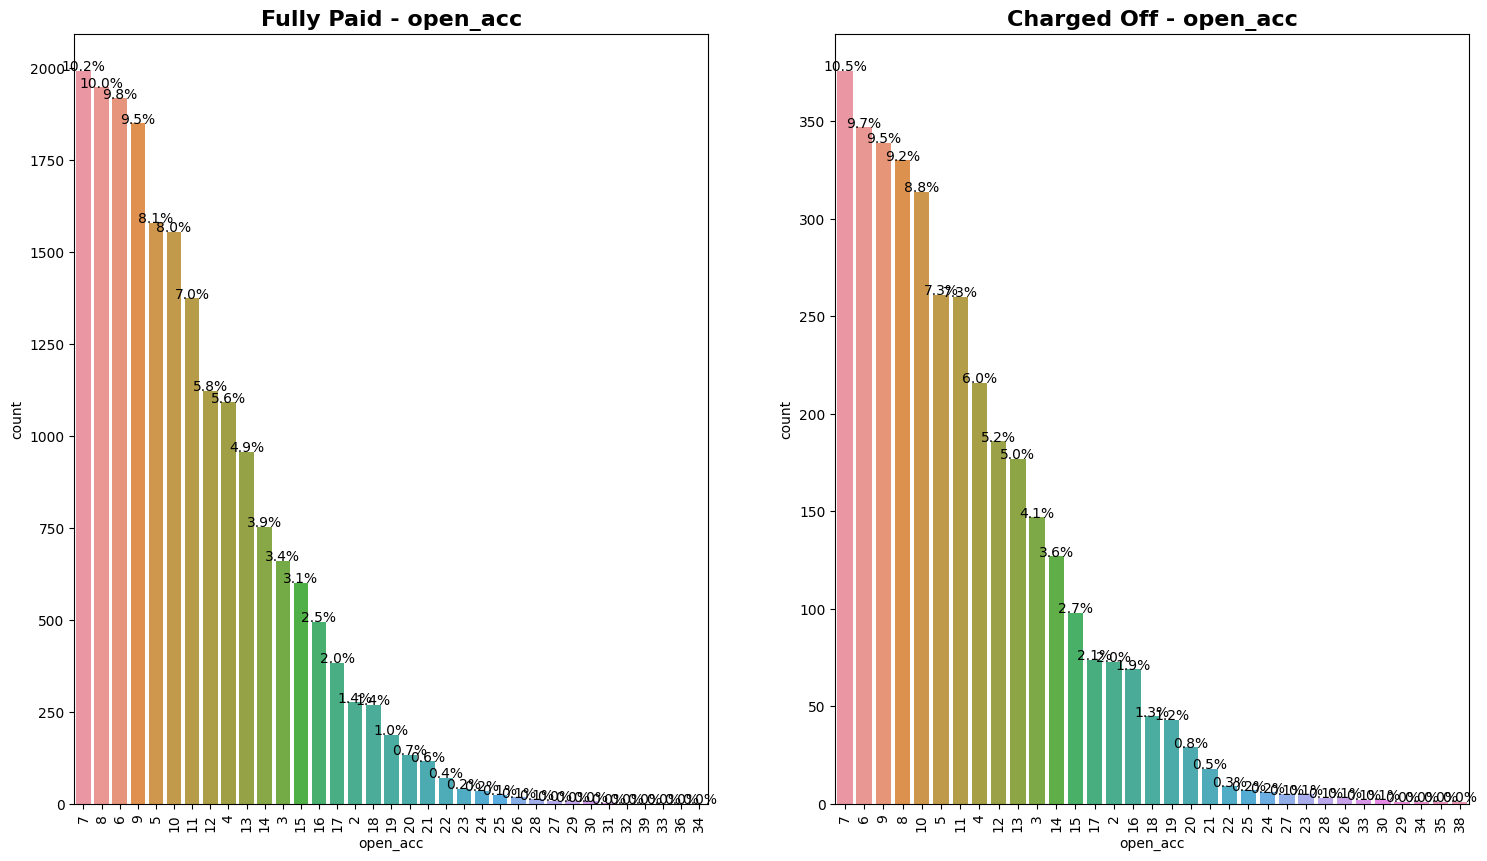

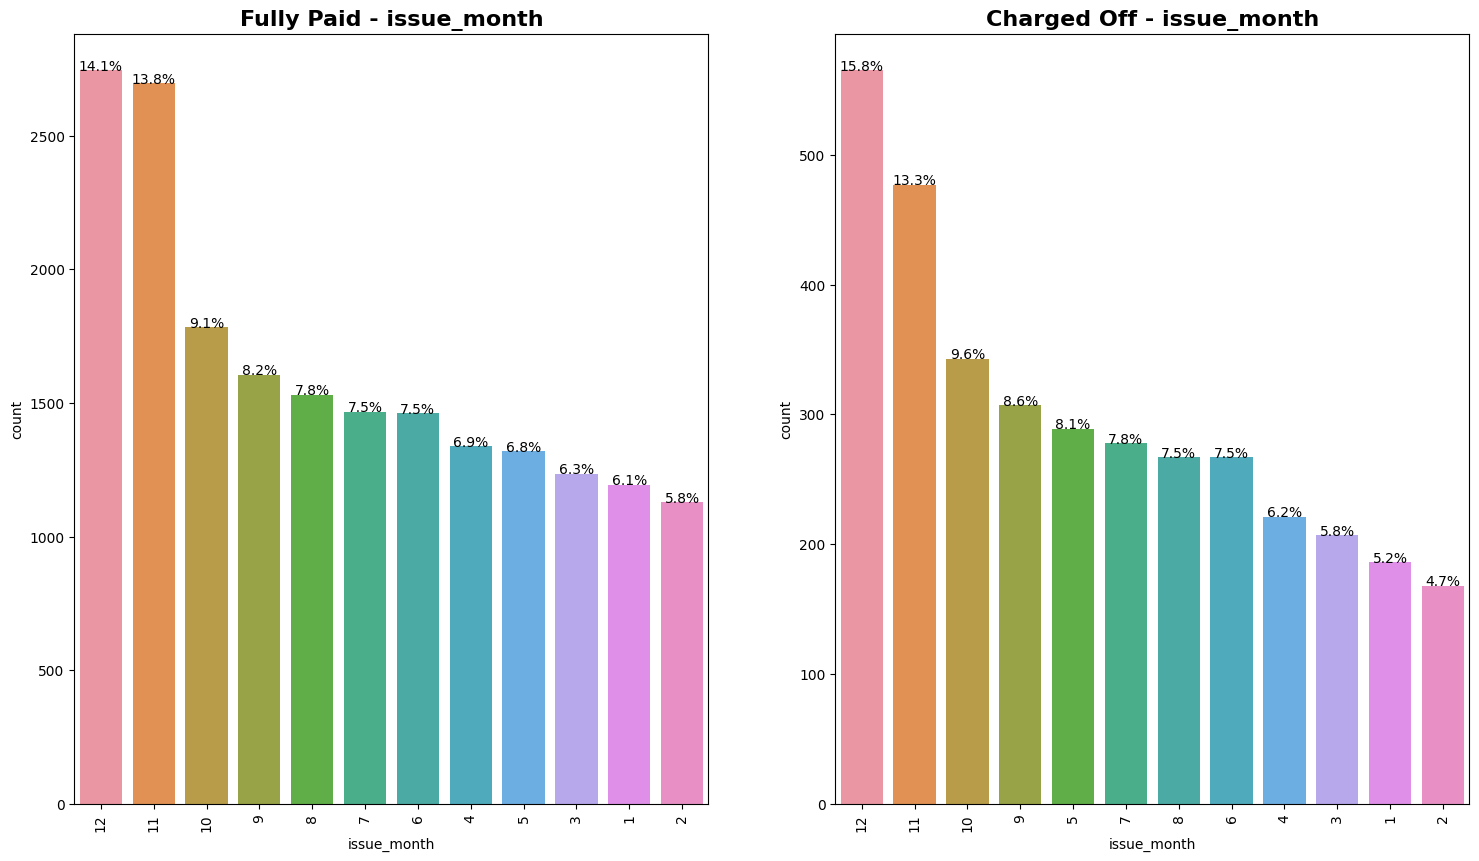

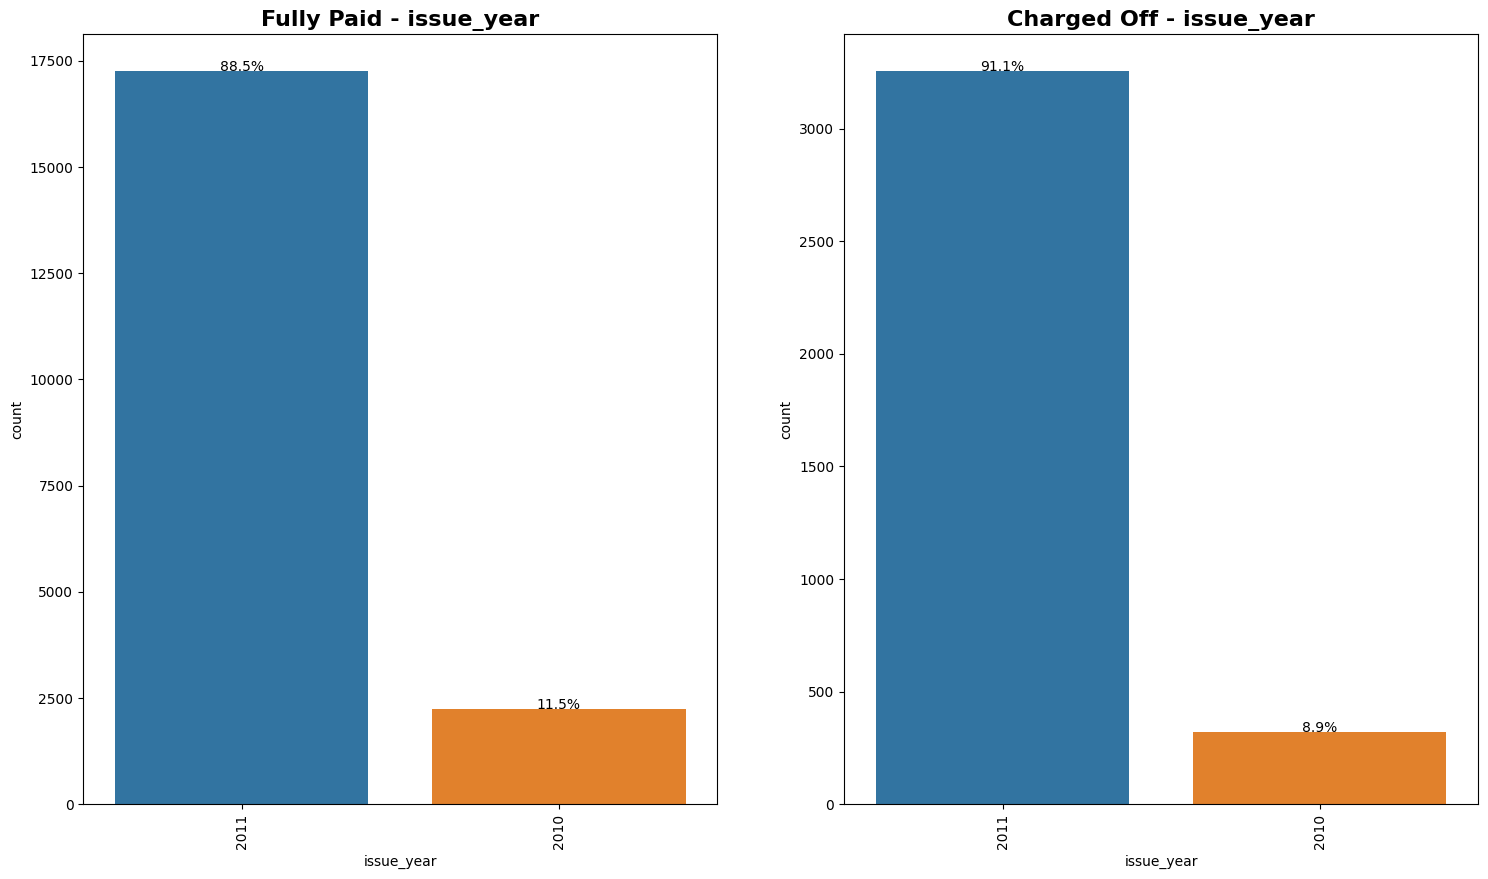

In [ ]:
for i in categorical_columns:
    plt.figure(figsize=(18, 10))
    plt.subplot(1, 2, 1)
    sns.countplot(data=fullypaid_data, x=i, order=fullypaid_data[i].value_counts().index)

    # Calculate percentages for Fully Paid
    total_fully_paid = len(fullypaid_data)
    ax = plt.gca()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_fully_paid)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=90)
    plt.title('Fully Paid - '+ i, fontweight='bold',fontsize=16)

    plt.subplot(1, 2, 2)
    sns.countplot(data=chargedoff_data, x=i, order=chargedoff_data[i].value_counts().index)

    # Calculate percentages for Charged Off
    total_charged_off = len(chargedoff_data)
    ax = plt.gca()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_charged_off)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=90)
    plt.title('Charged Off - '+i, fontweight='bold', fontsize=16)
    print('\n')
    plt.show()


#### **Key observations based on the Segmented Univariate Analysis of Categorical column**

Based on the comparison of Charged Off vs Fully Paid data, Defaulter is more when,
1. Customers belongs to B5 and C1 sub grade.
2. There is a 4% chance of loan getting default when employment length of the borrower is 10+ years.
3. Customers has a higher percentage home RENT to pay in comparison to non-defaulters.
4. Customers verification status as verified.
5. Customers has loans to repay other debts.
6. Customers based out of California(CA).
7. Loans with 60 months tenure have double chances (21%) of getting default than loans with 36 months tenure
8. Higher number of inquiries made in last 6 months.

> **Conclusion**:<br/>
Based on the comparison of Fully Paid vs Charged Off data, borrowers are likely to become a defaulter when,
1. Higher number of inquiries is indication of high chances of defaulted loan.
2. Loans with 60 months tenure have double chances (21%) of getting default than loans with 36 months tenure
3. Verification status is verified
4. Grade C has 5% more and grade D has 8% more defaulter in comparison to non-defaulters.


 **Analysis of Numerical column**

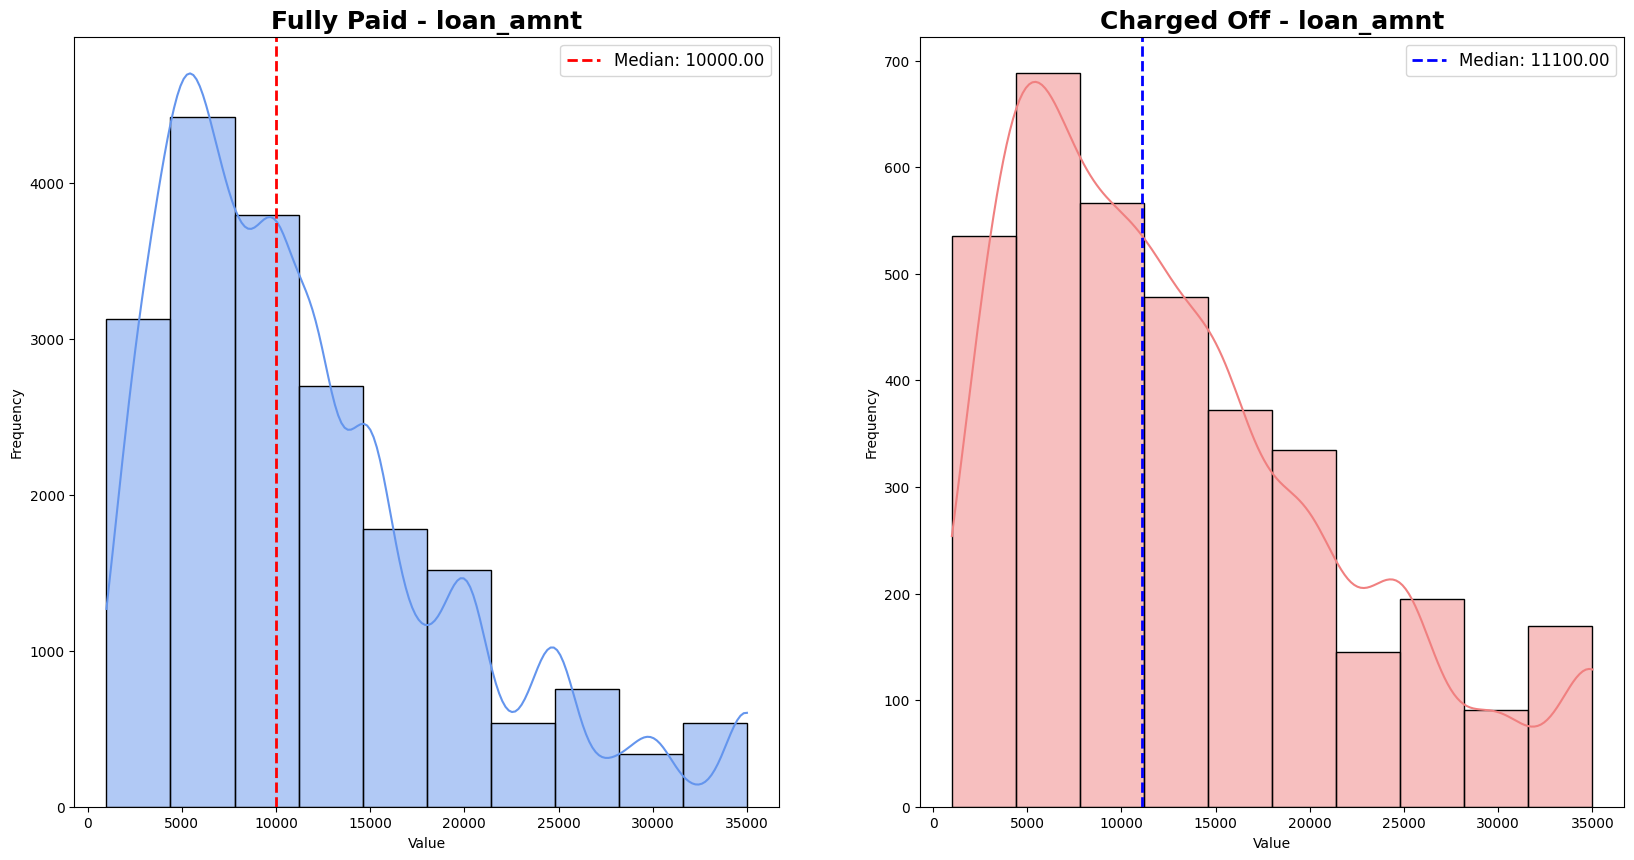

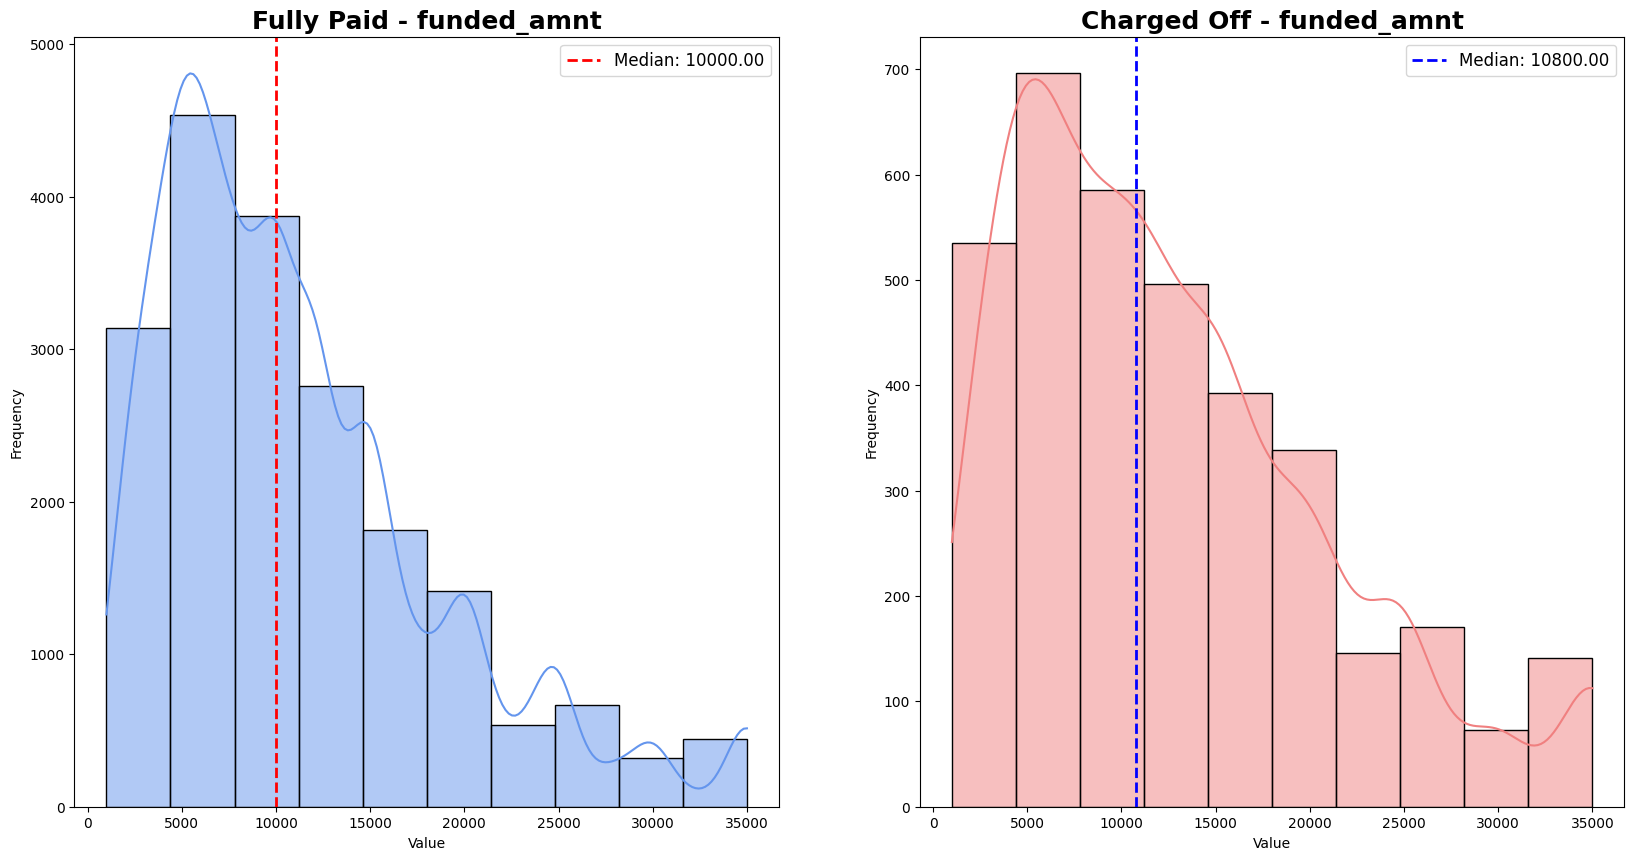

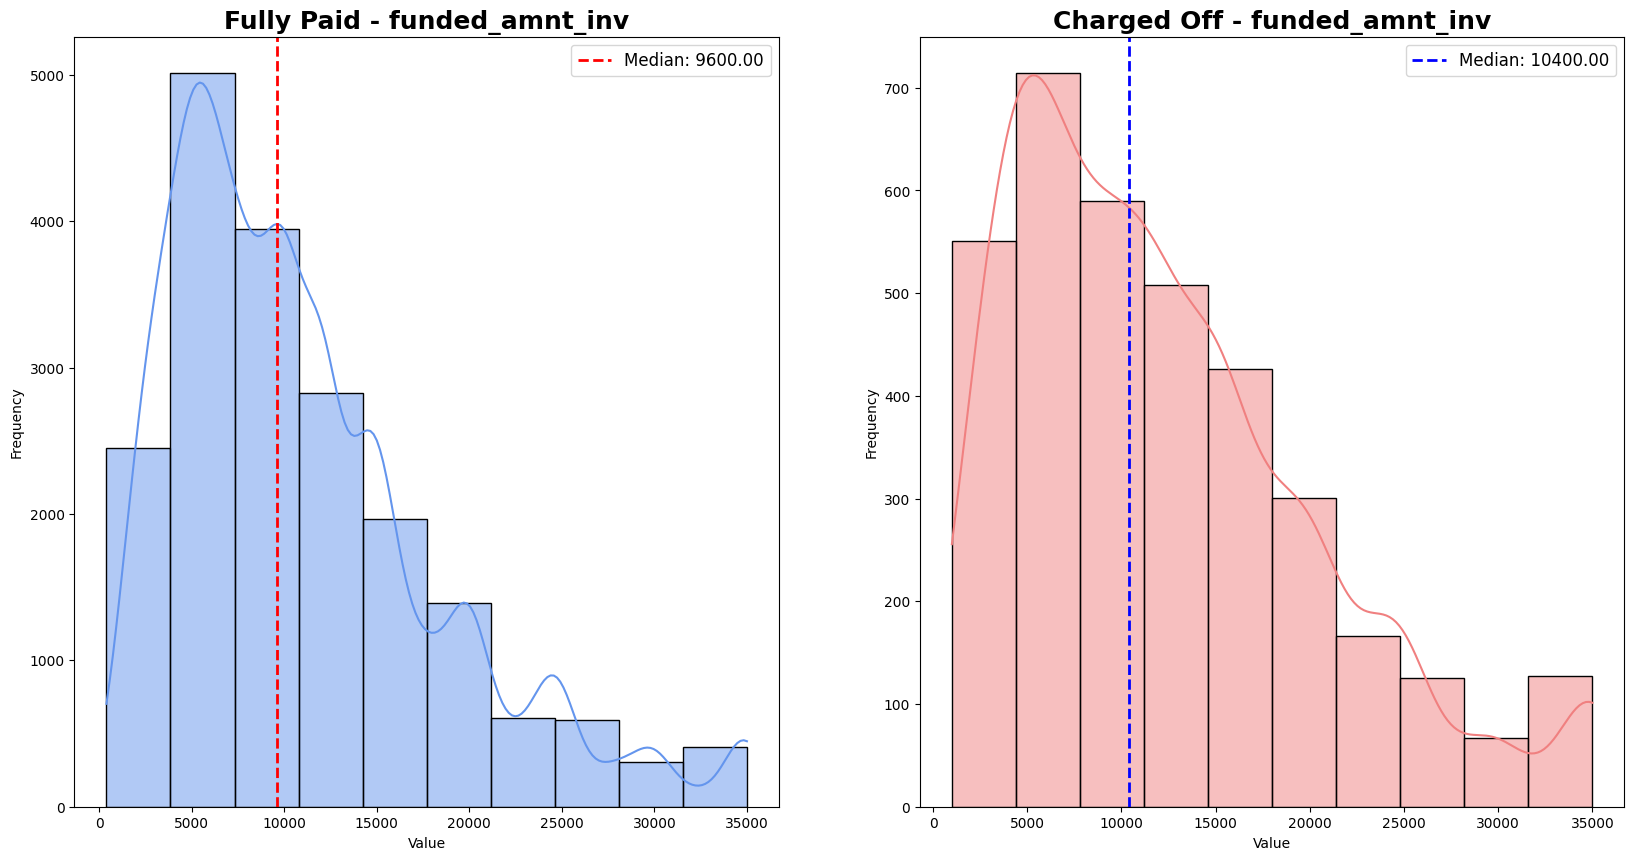

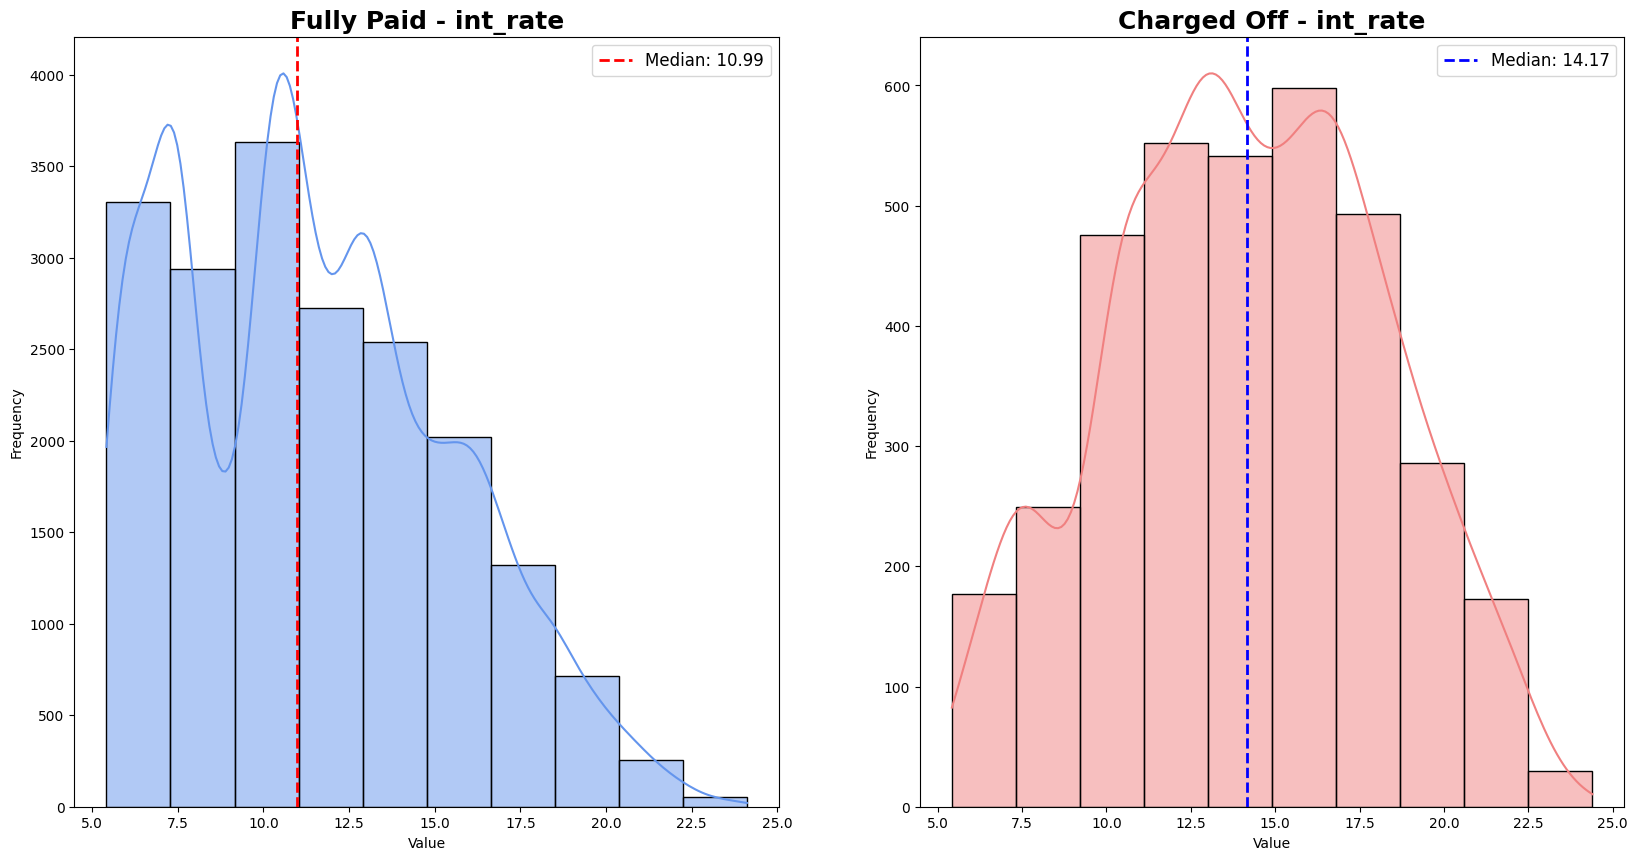

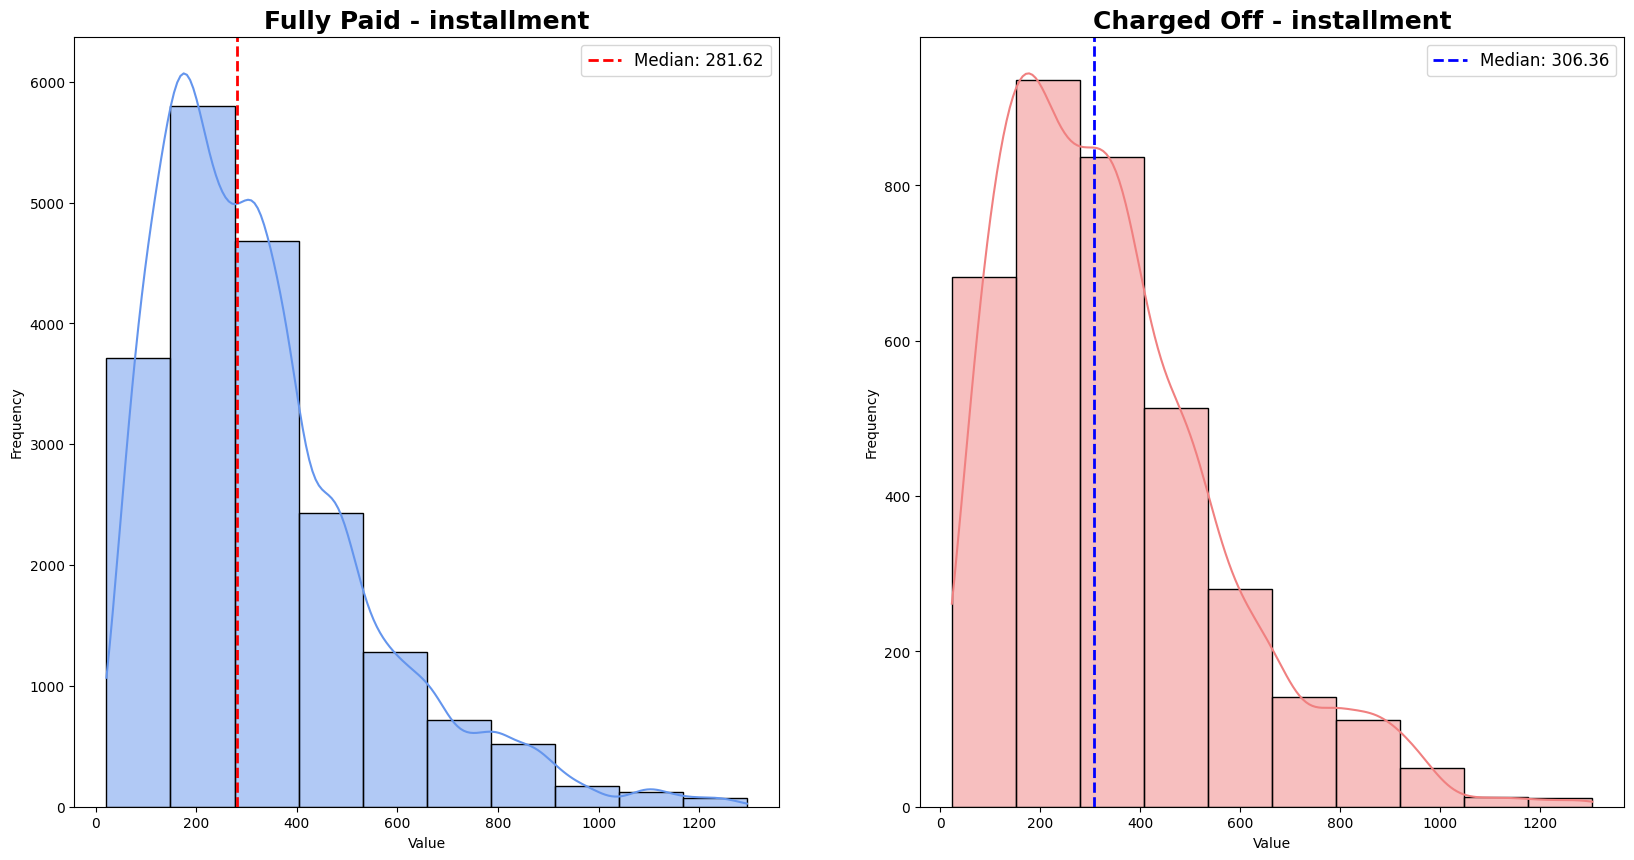

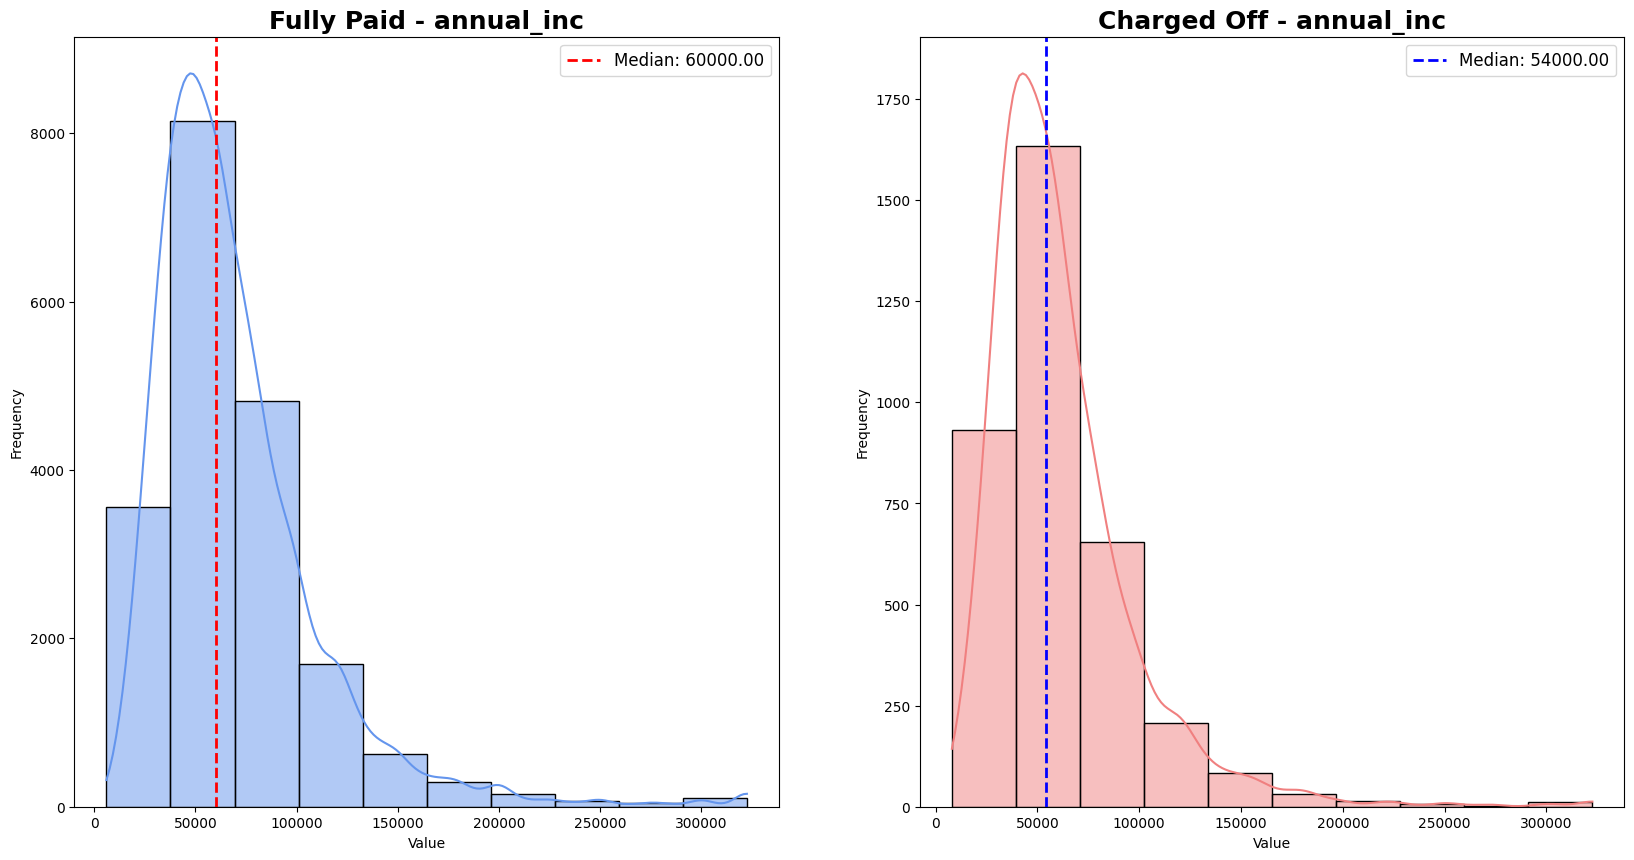

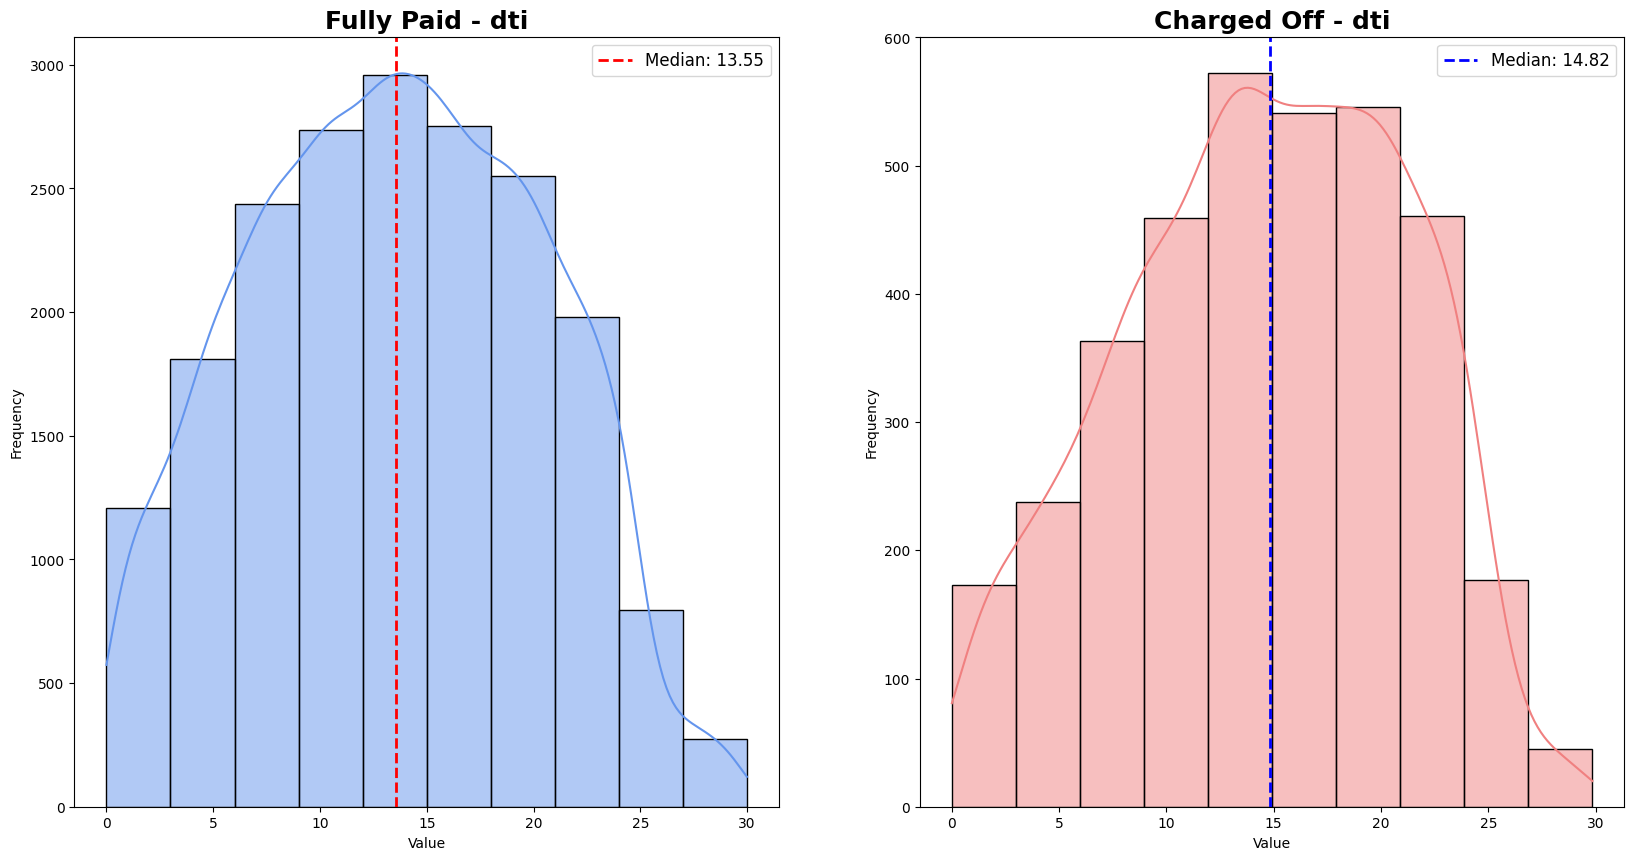

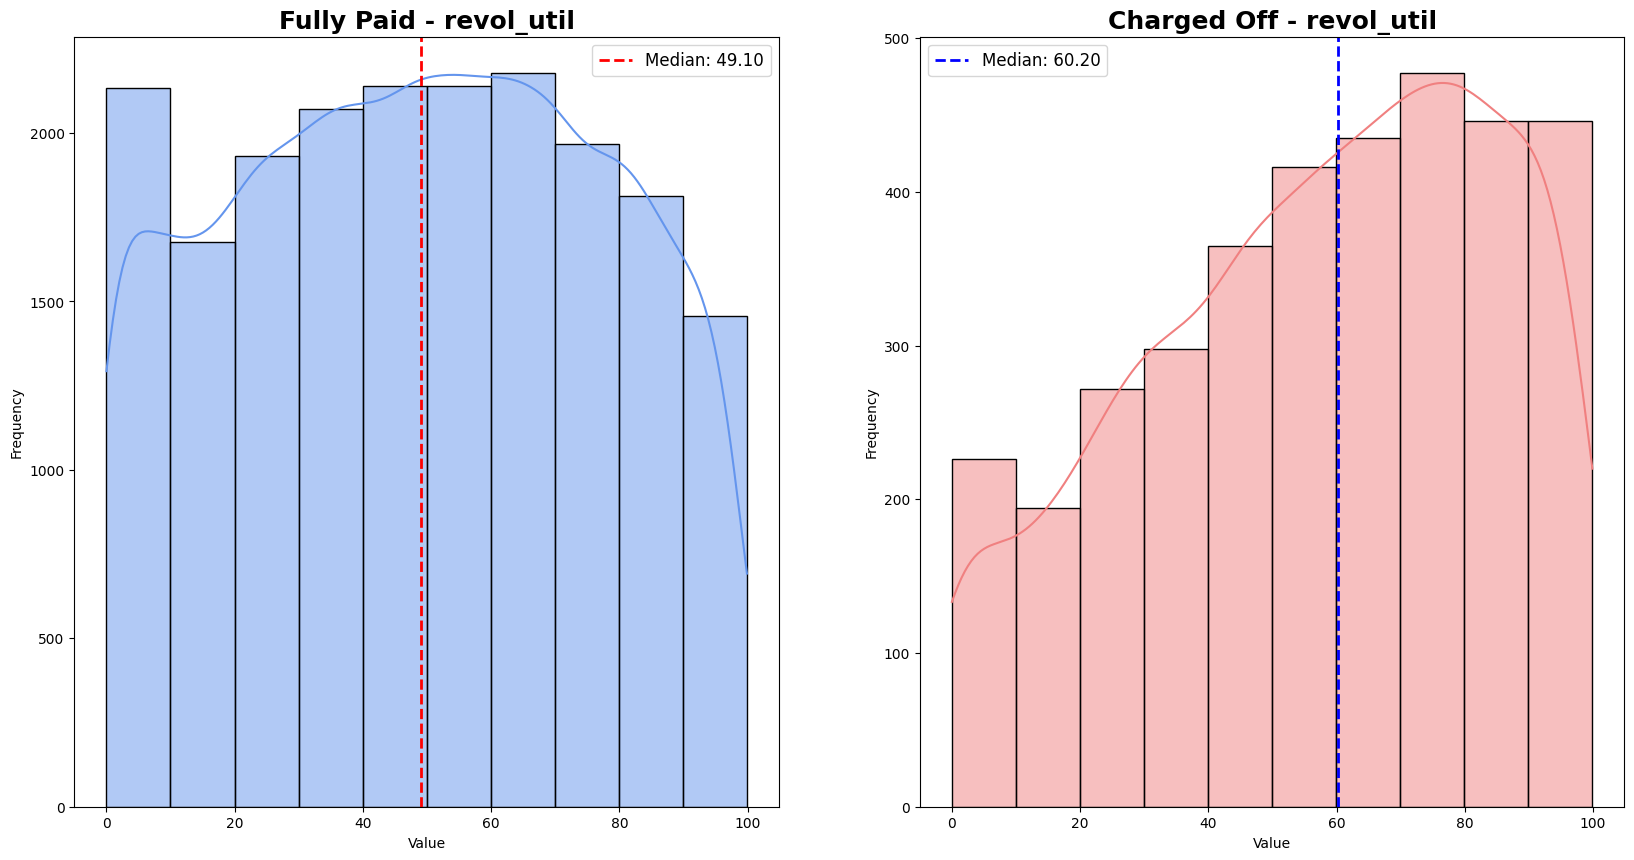

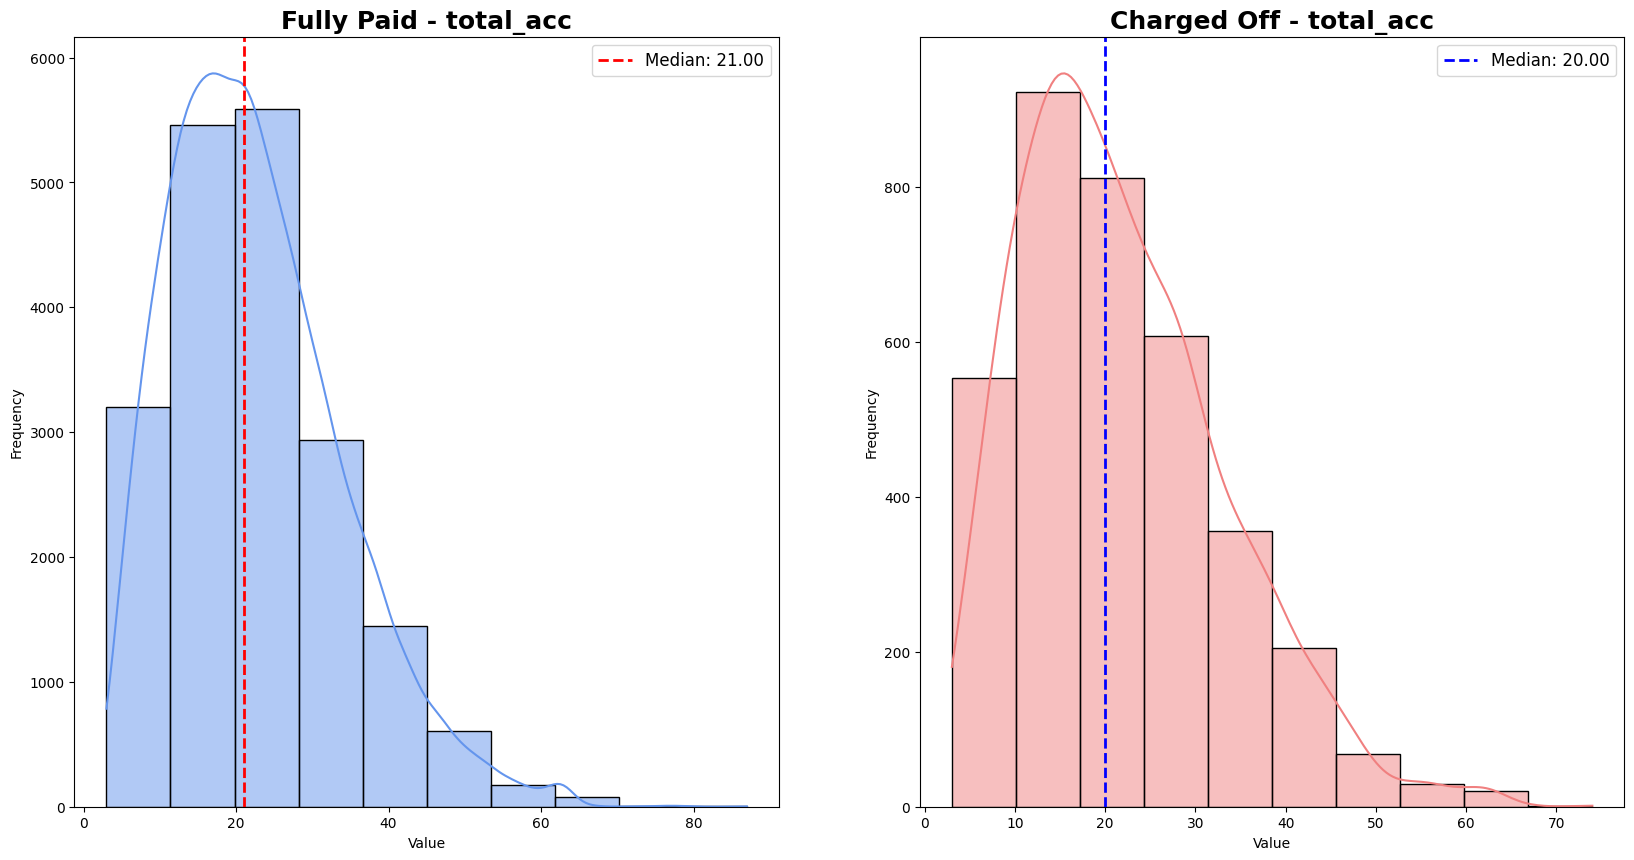

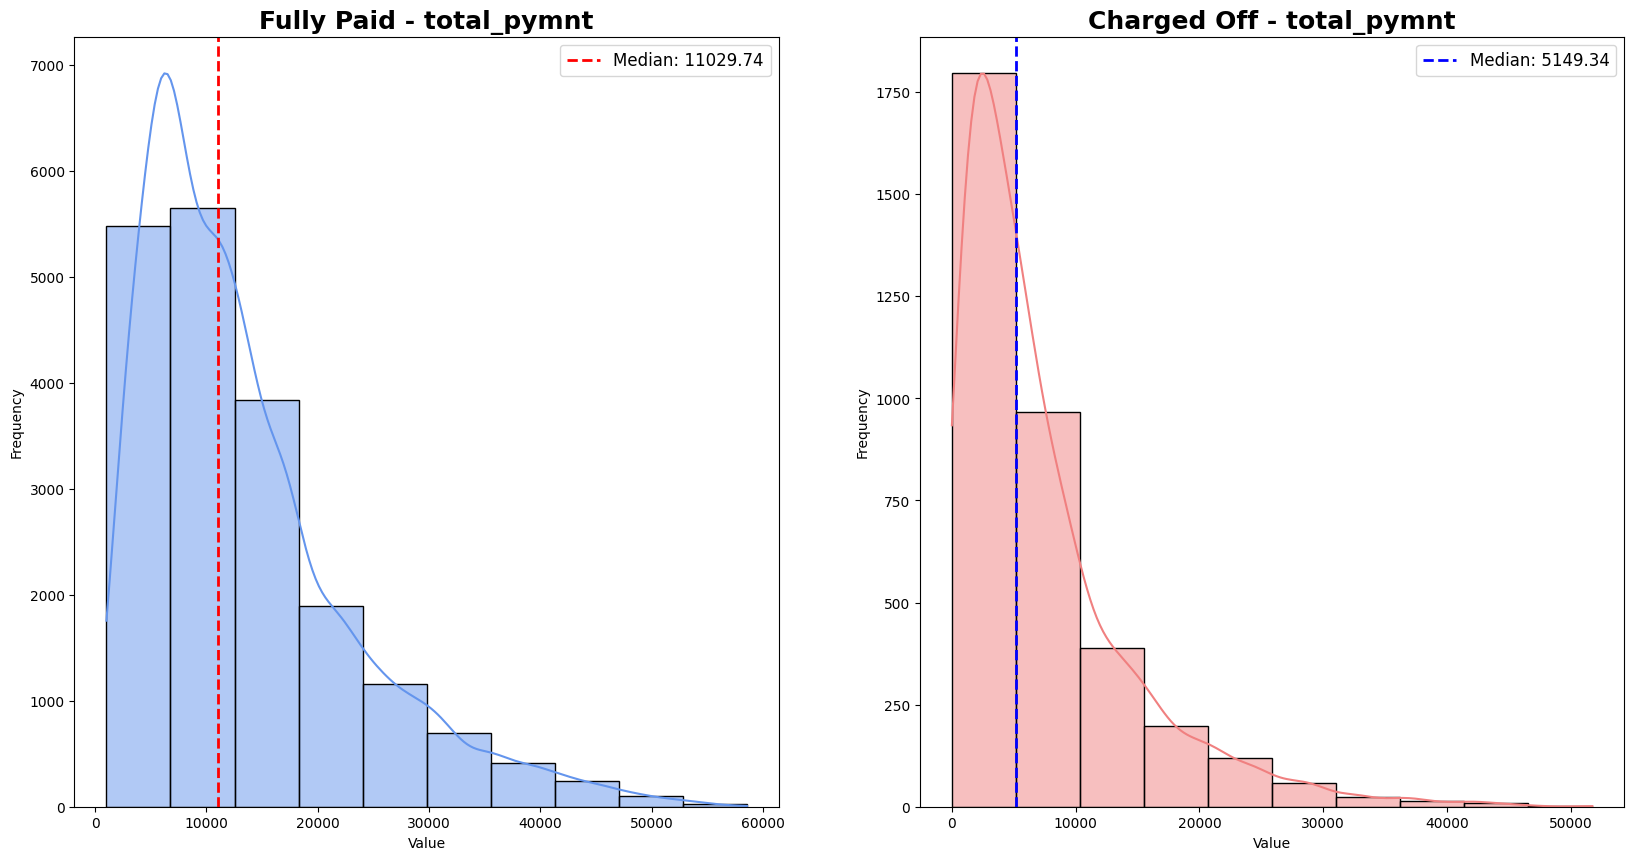

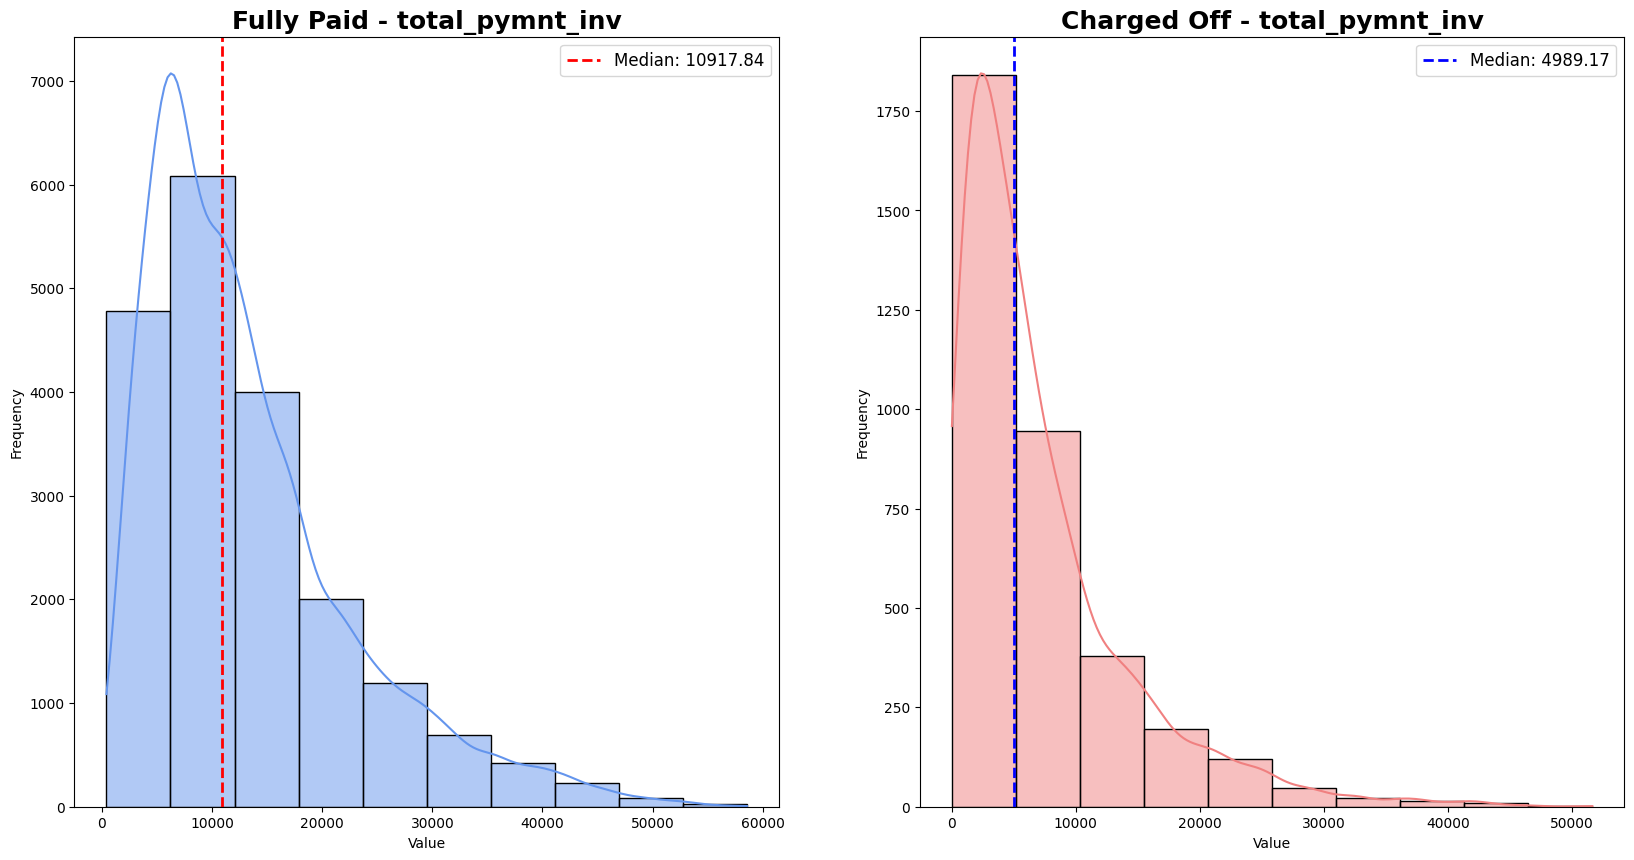

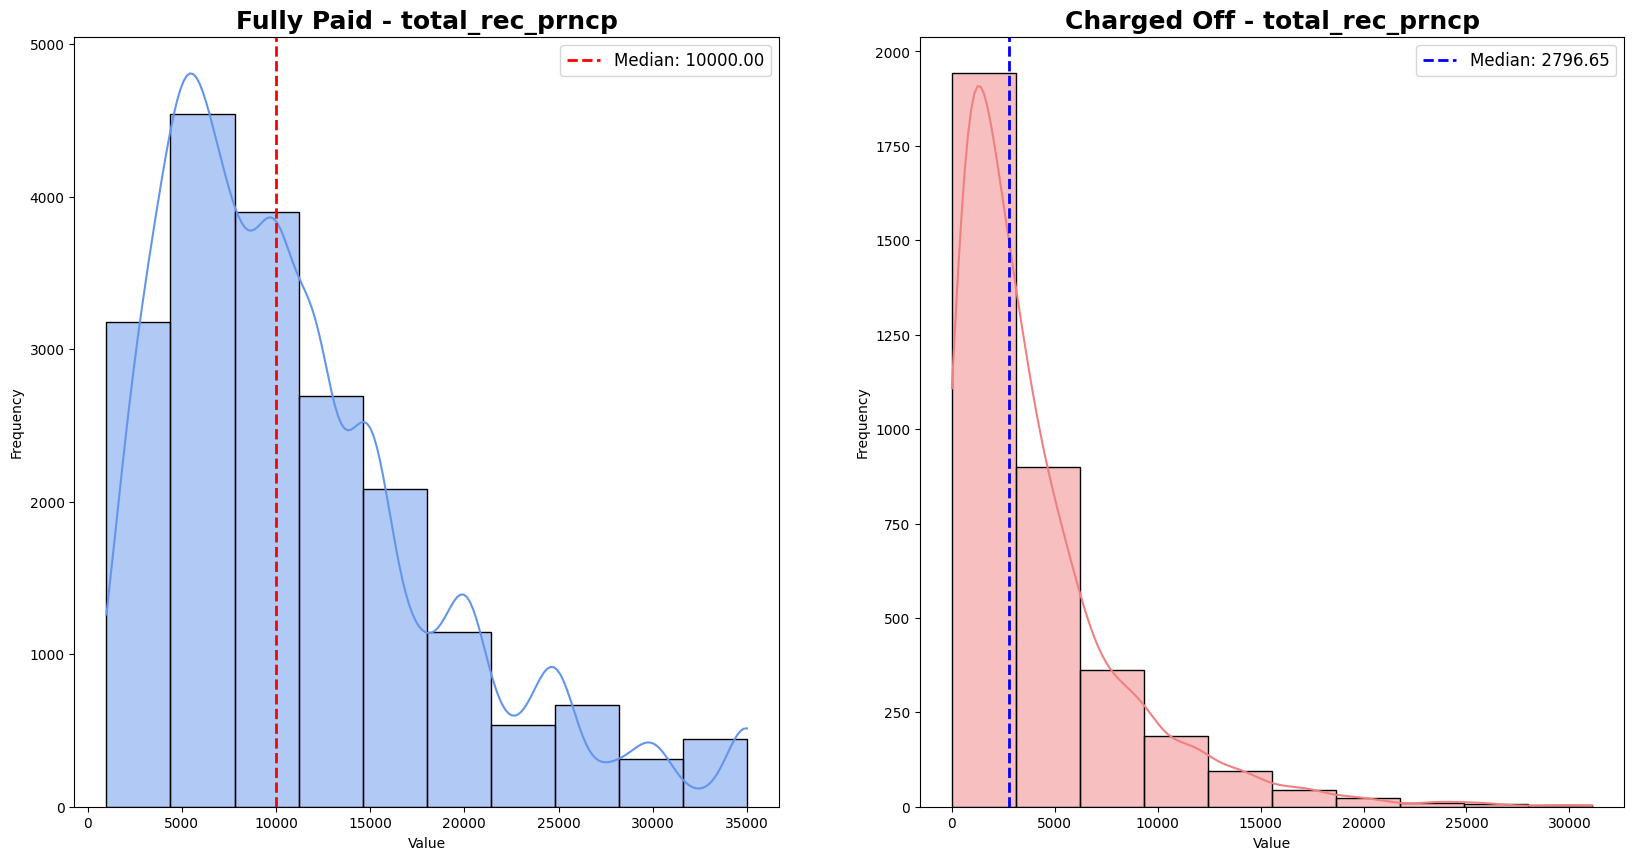

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.histplot(fullypaid_data[col], bins=10, kde=True, color='cornflowerblue')
    # Calculate the median of the data
    m_value = np.median(fullypaid_data[col])
    # Add a vertical line at the median
    plt.axvline(x=m_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {m_value:.2f}')
    plt.title('Fully Paid - '+ col, fontweight='bold',fontsize=18)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(fontsize='large')

    plt.subplot(1,2,2)
    sns.histplot(chargedoff_data[col], bins=10, kde=True, color='lightcoral')
    # Calculate the median of the data
    m_value = np.median(chargedoff_data[col])
    # Add a vertical line at the median
    plt.axvline(x=m_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {m_value:.2f}')
    plt.title('Charged Off - '+col, fontweight='bold', fontsize=18)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(fontsize='large')
    plt.show()
    print('\n')

#### **Key observations based on the Univariate Analysis of Numerical column**

1. The loan amount falls within the range of 4,000 to 15,000 and median 10,000.
2. The interest rate within the range of 13 % to 17 % and median 13.5 %.
3. The number of open credit lines in the borrower's credit file (open_acc) is within the range of 2 to 10.
2. The total number of credit lines currently in the borrower's credit file(total_acc) is within the range of 10 to 20.
3. Annual income is in the range of 30,000 to 60,000.
5. The funded amount by investors is within the range of 4,000 to 9,000.
6. Borrowers are making monthly installments in the range of 200 to 300.
7. The debt-to-income ratio is in the range of 13 to 15.
8. The total payments received by investors fall within the range of 4,000 to 5,000.


>**Conclusion**: <br/>
Based on the comparison of Fully Paid vs Charged Off data, borrowers are likely to become a defaulter when,
1. Loan has higher interest rate. On an average default loan interest rate is 13.50% (2% higher) where as for non default loan interest rate is 11.50%.
2. The monthly payment owed by the borrower is more
    * Fully Paid - 267 (median)
    * Charged Off - 287 (median)
3. The defaulter borrowers' annual income is less compared to non-defaulter borrowers
   * Fully Paid - 57,000 (median)
   * Charged Off - 52,000 (median)
4. The debt-to-income ratio is more
   * Fully Paid - 13.43 (median)
   * Charged Off - 14.40 (median)
5. Borrowers have a higher revolving line utilization rate
   * Fully Paid - 47 (median)
   * Charged Off - 58 (median)
6. Loan amount is more
   * Fully Paid - 9,000 (median)
   * Charged Off - 10,000 (median)
7. There is a significant difference (approx. 60 %) in principal received (total_rec_prncp) from defaulters and non-defaulters. Average principal received from non-defaulters is around 9K whereas from non- defaulters is only 2.7k.


## 3.2 - Bivariate Analyis
---


In [ ]:
# Based on the univariate analysis, let's focus on few columns which colud narrow our analysis.
cat_col_bivariate = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'issue_month']
conti_col_bivariate = ['loan_amnt', 'int_rate', 'annual_inc', 'total_rec_prncp', 'revol_util','installment', 'dti']

Analysis of Catagorical vs Numerical

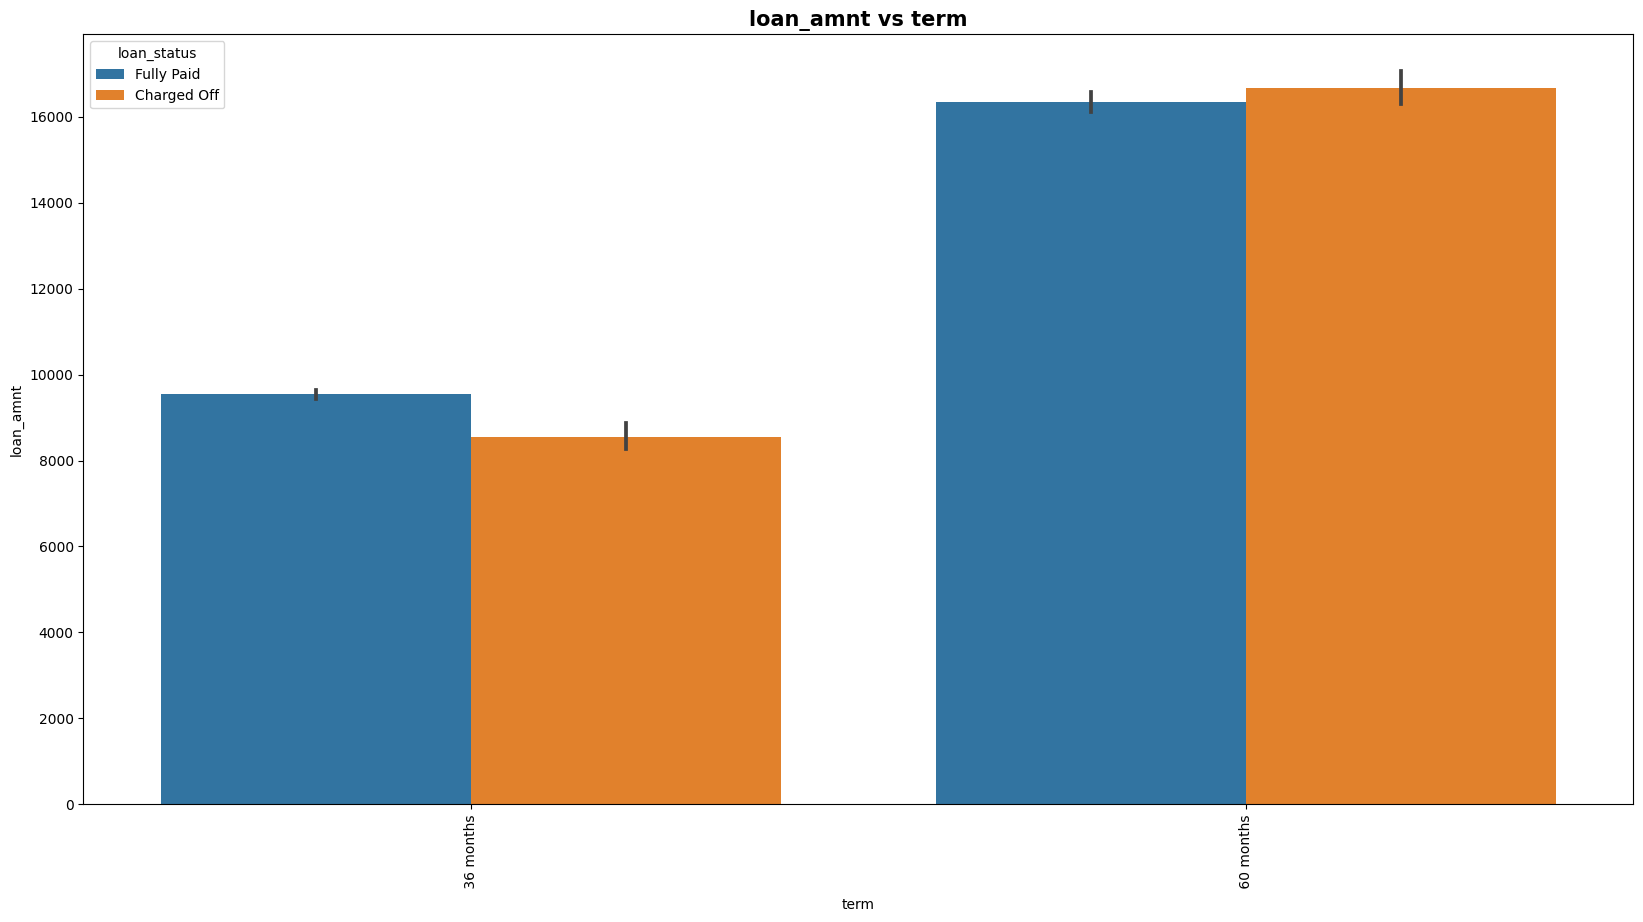

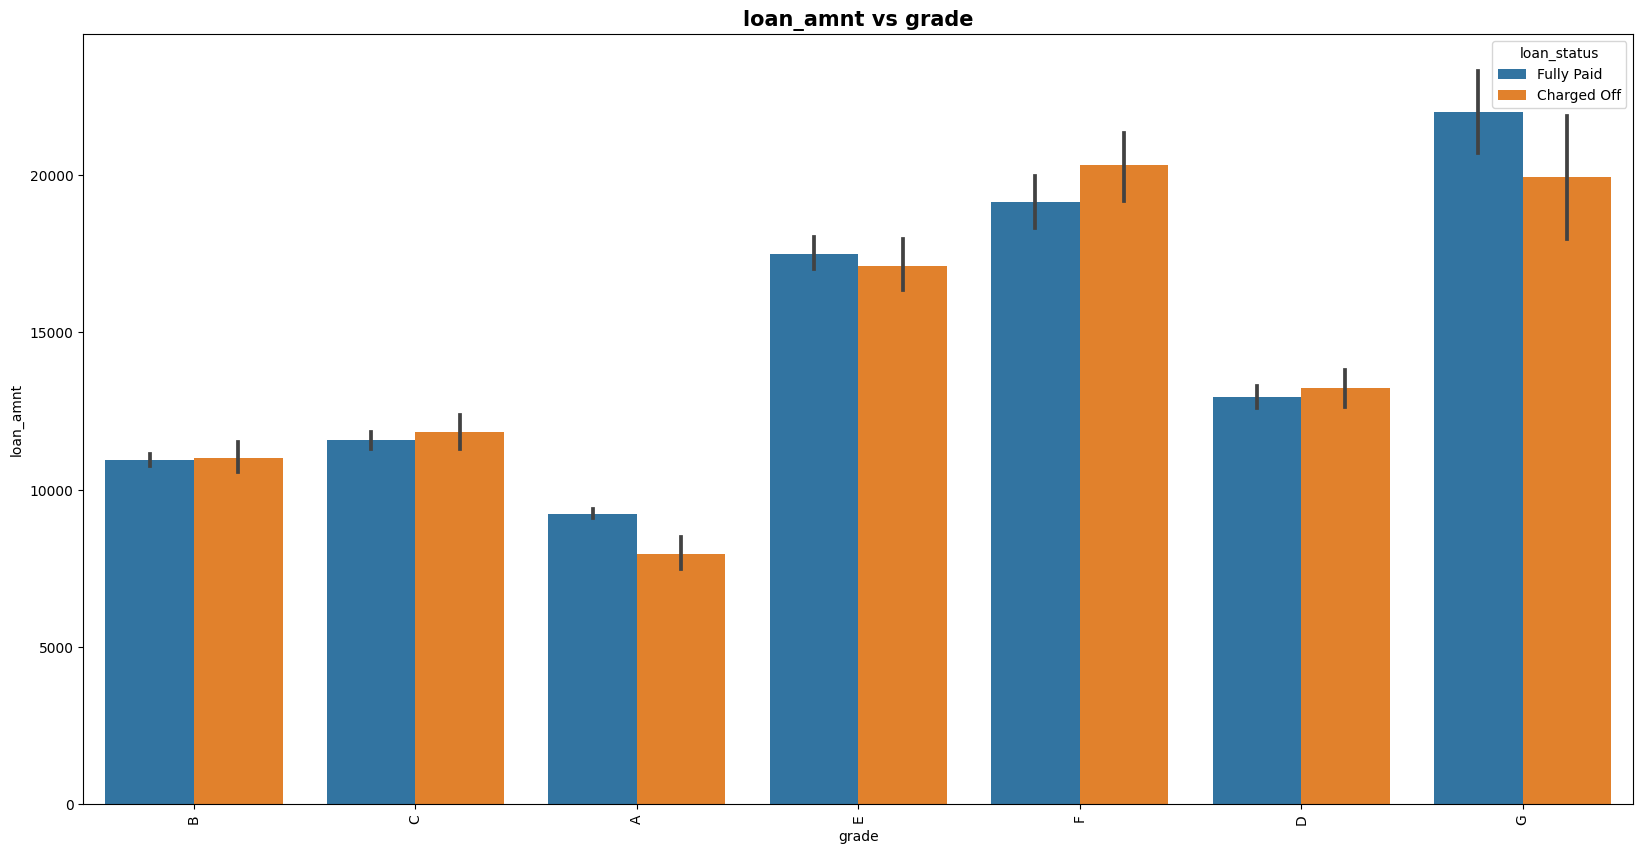

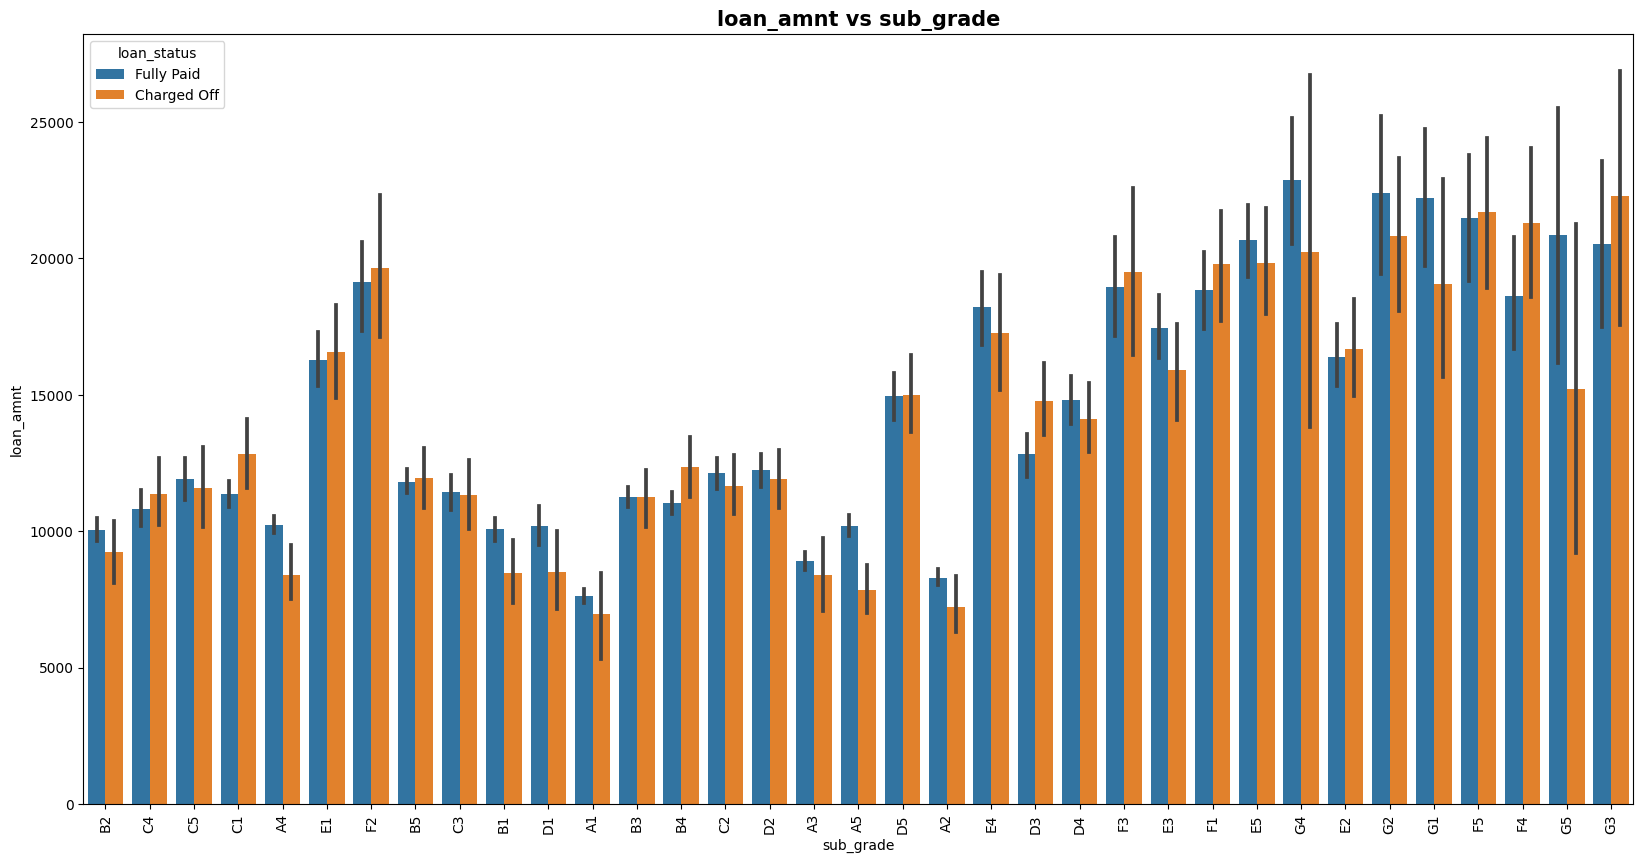

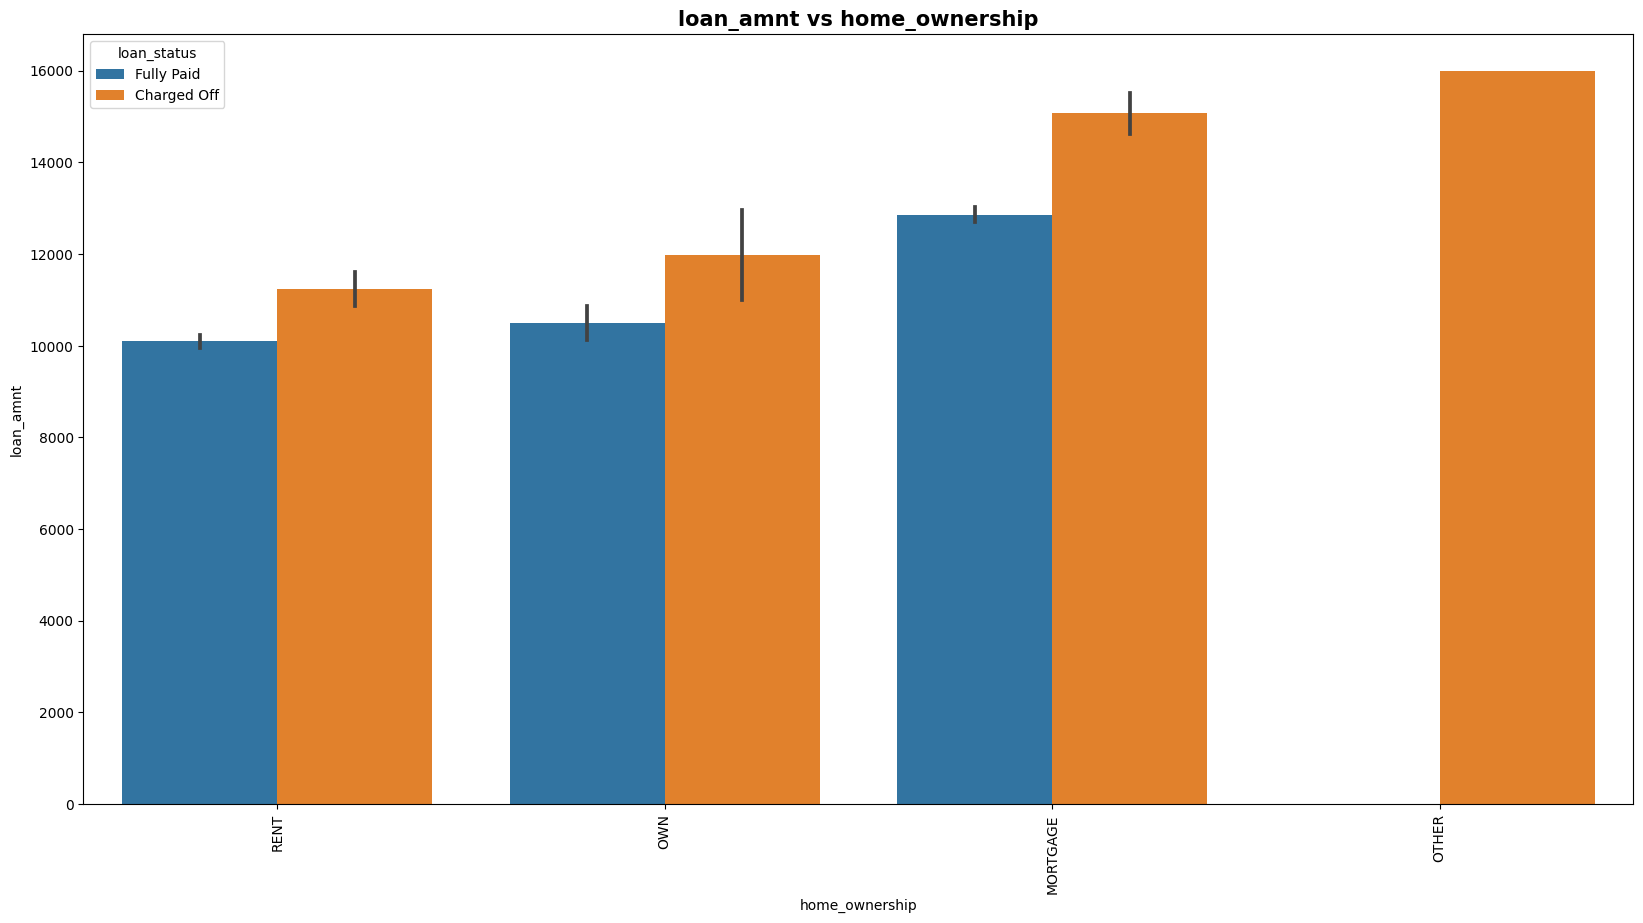

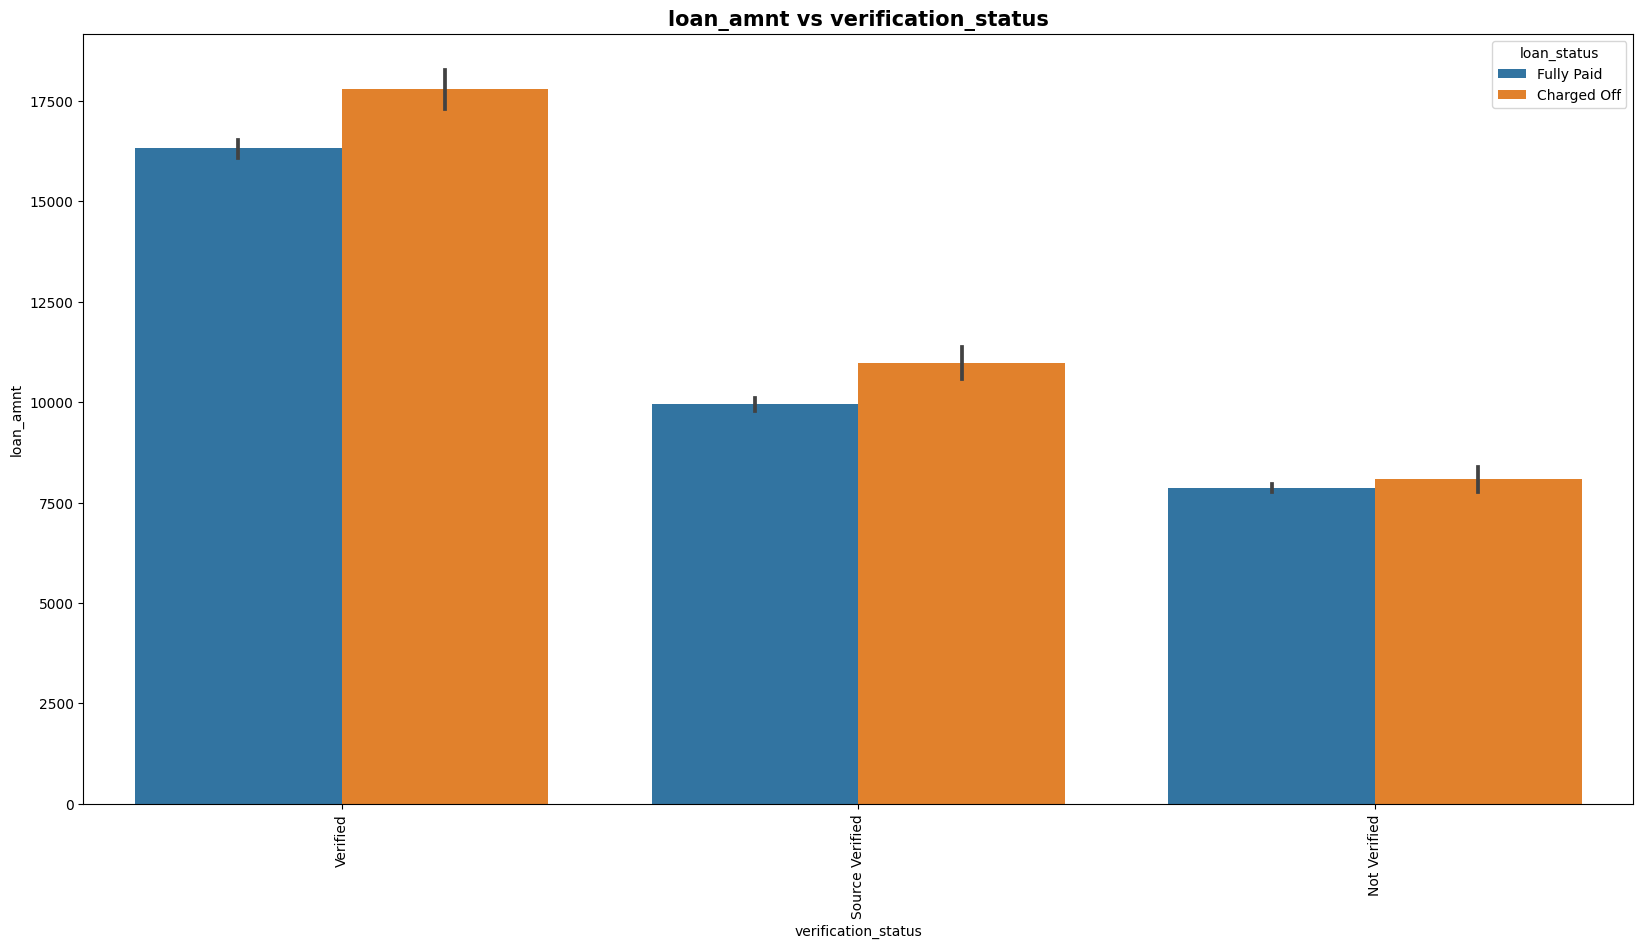

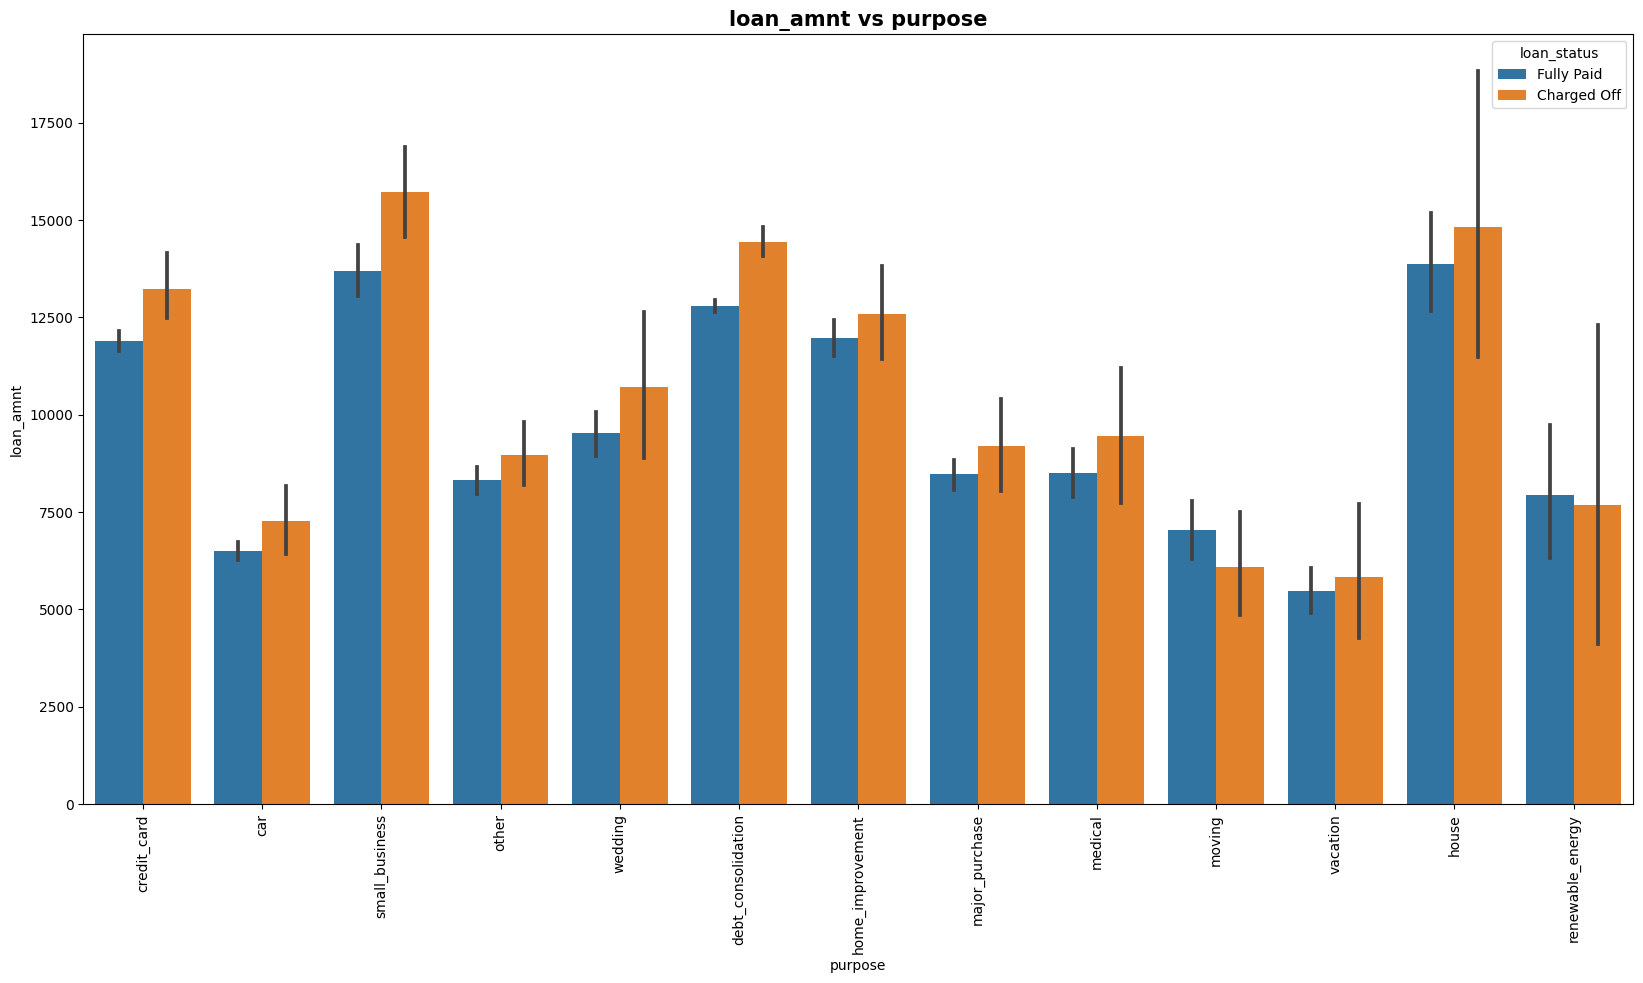

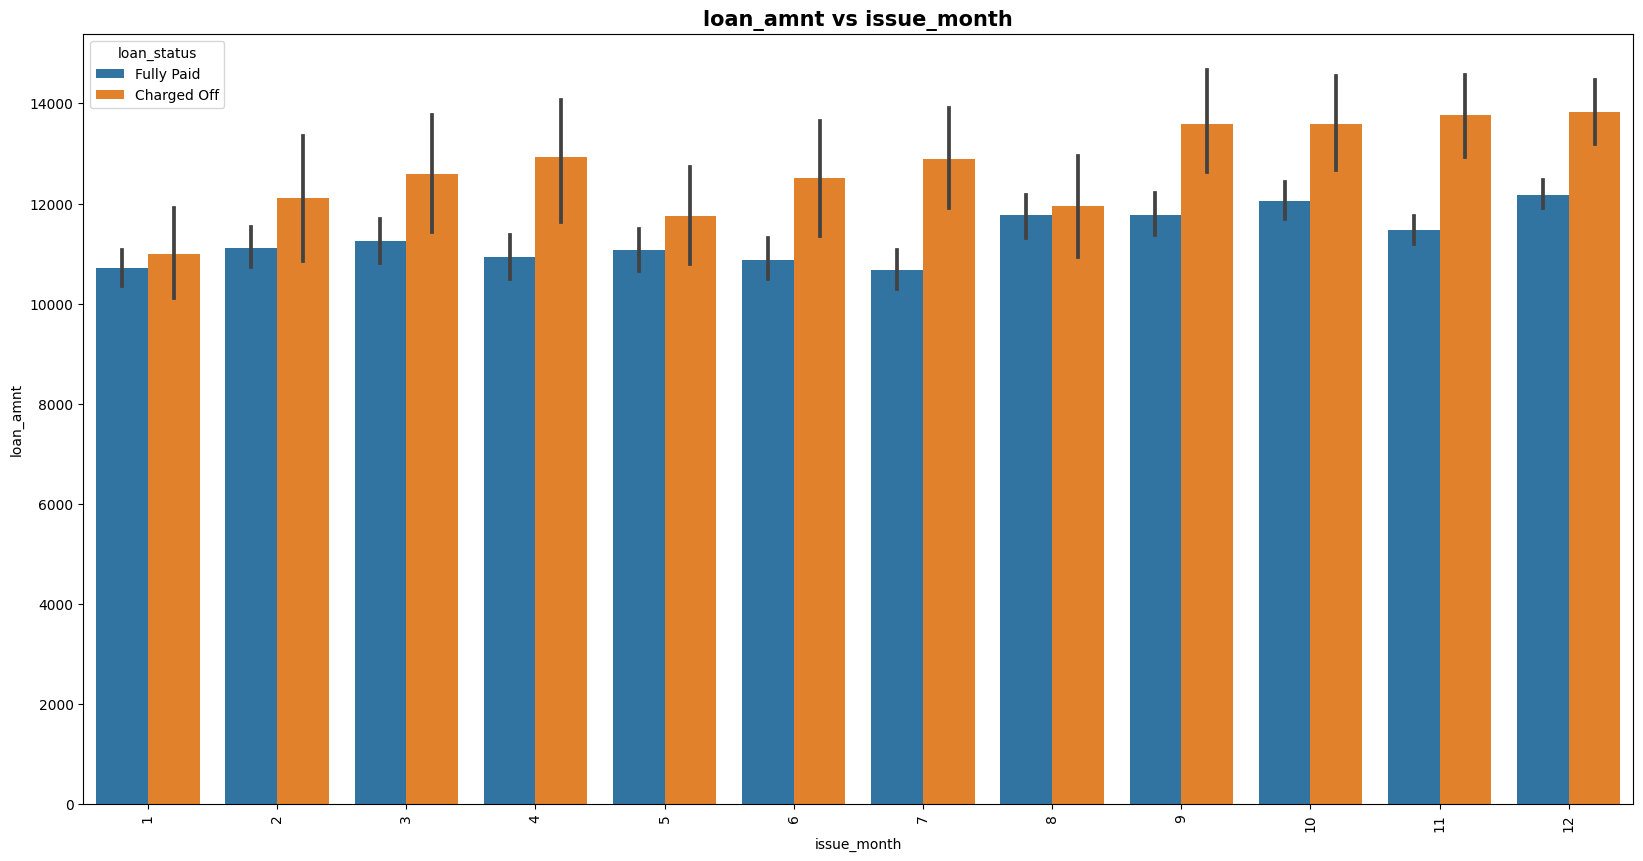

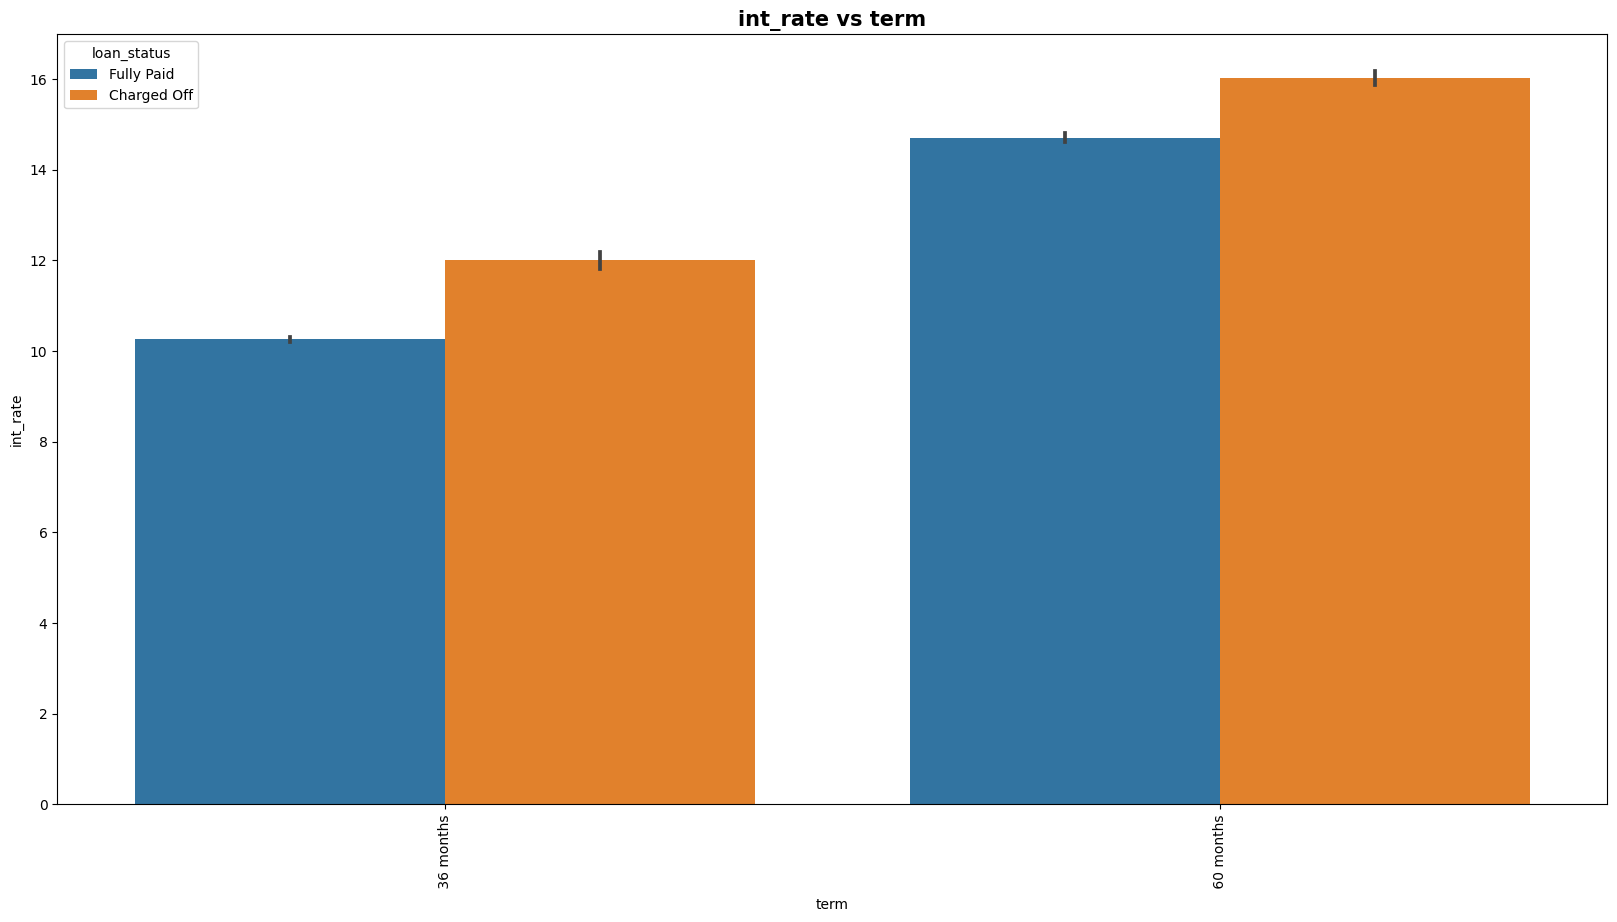

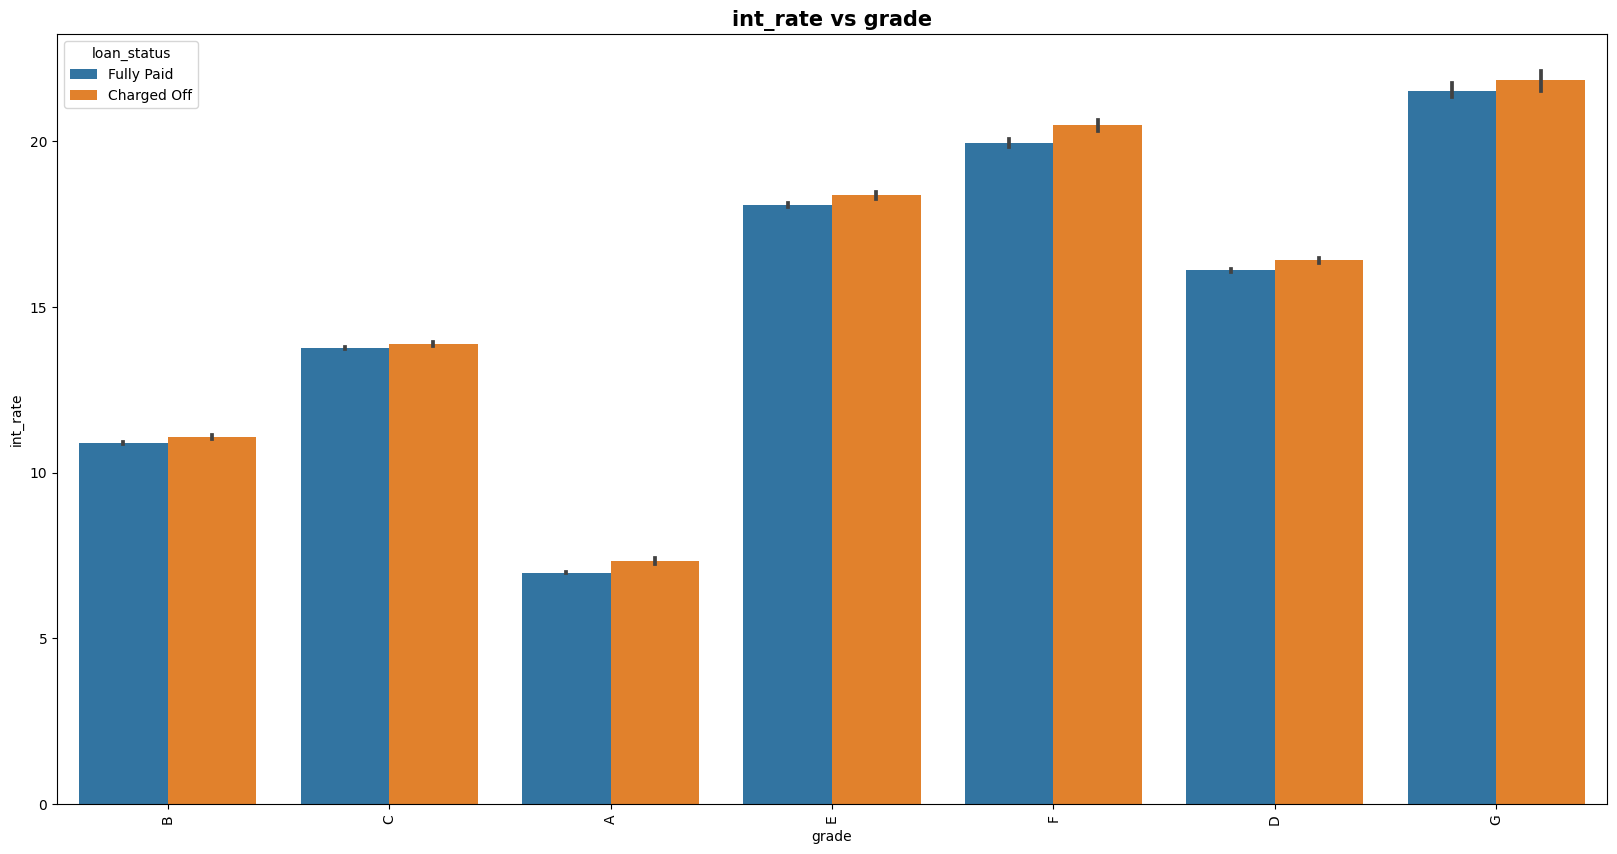

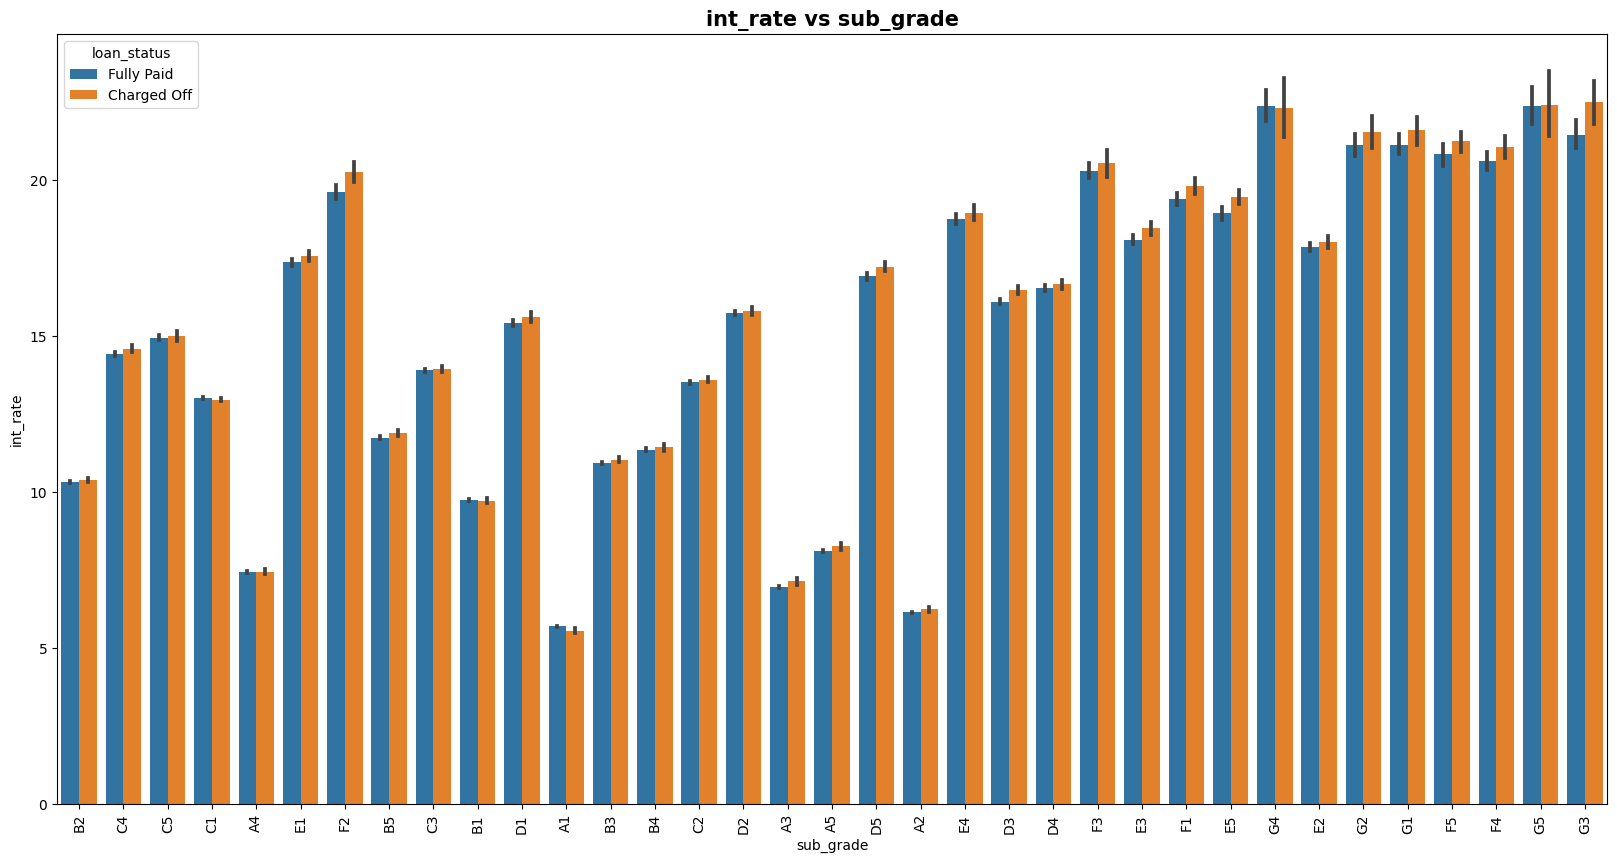

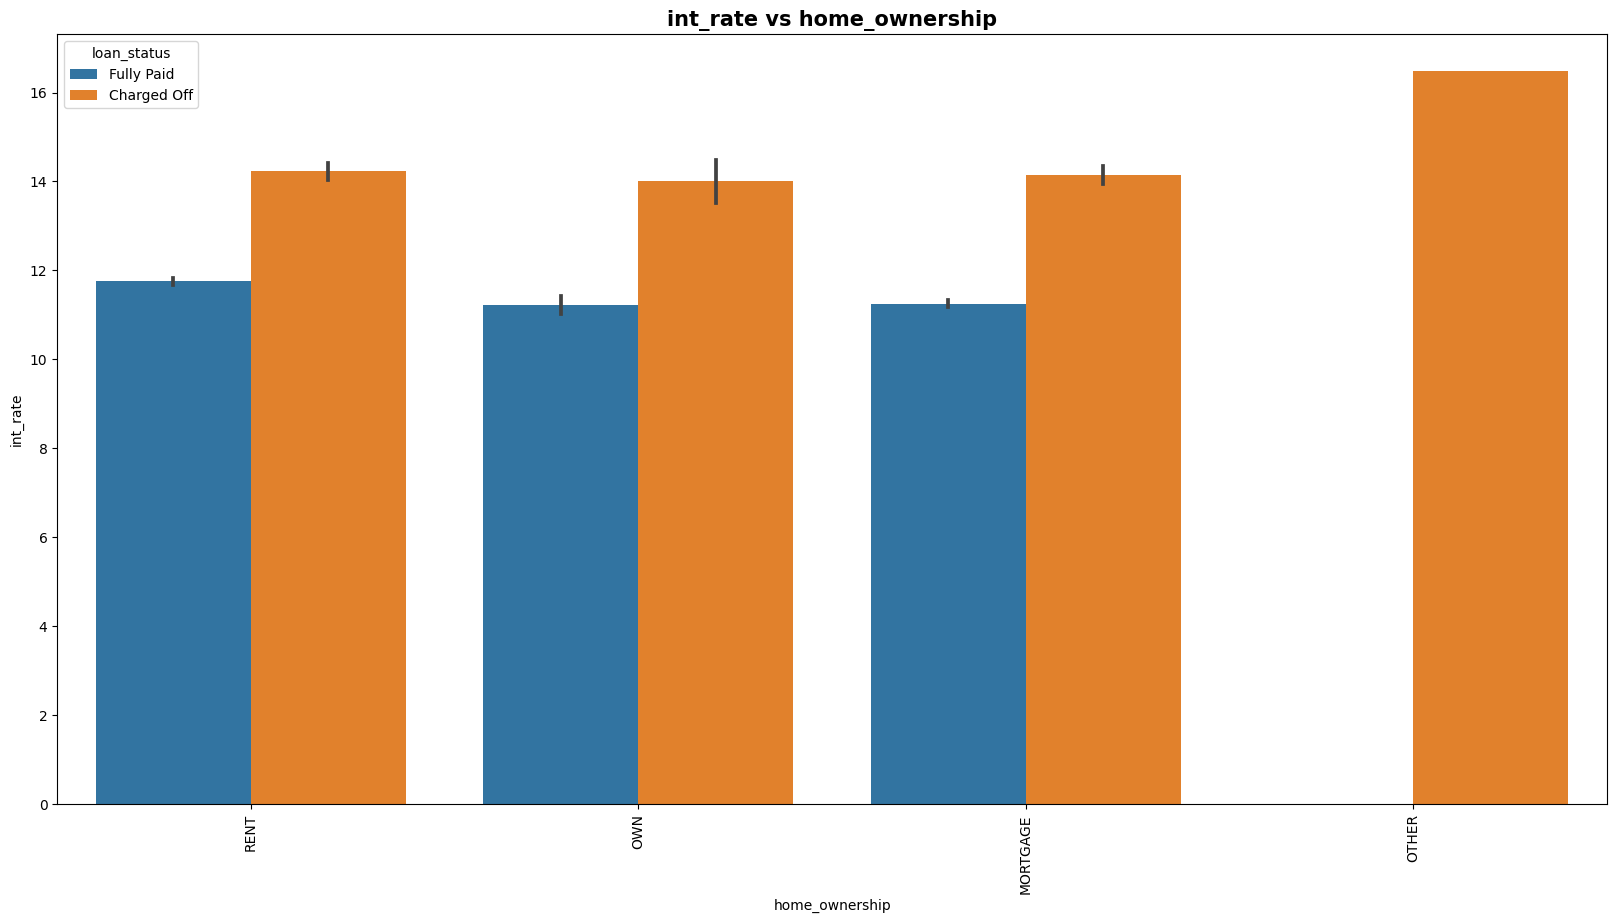

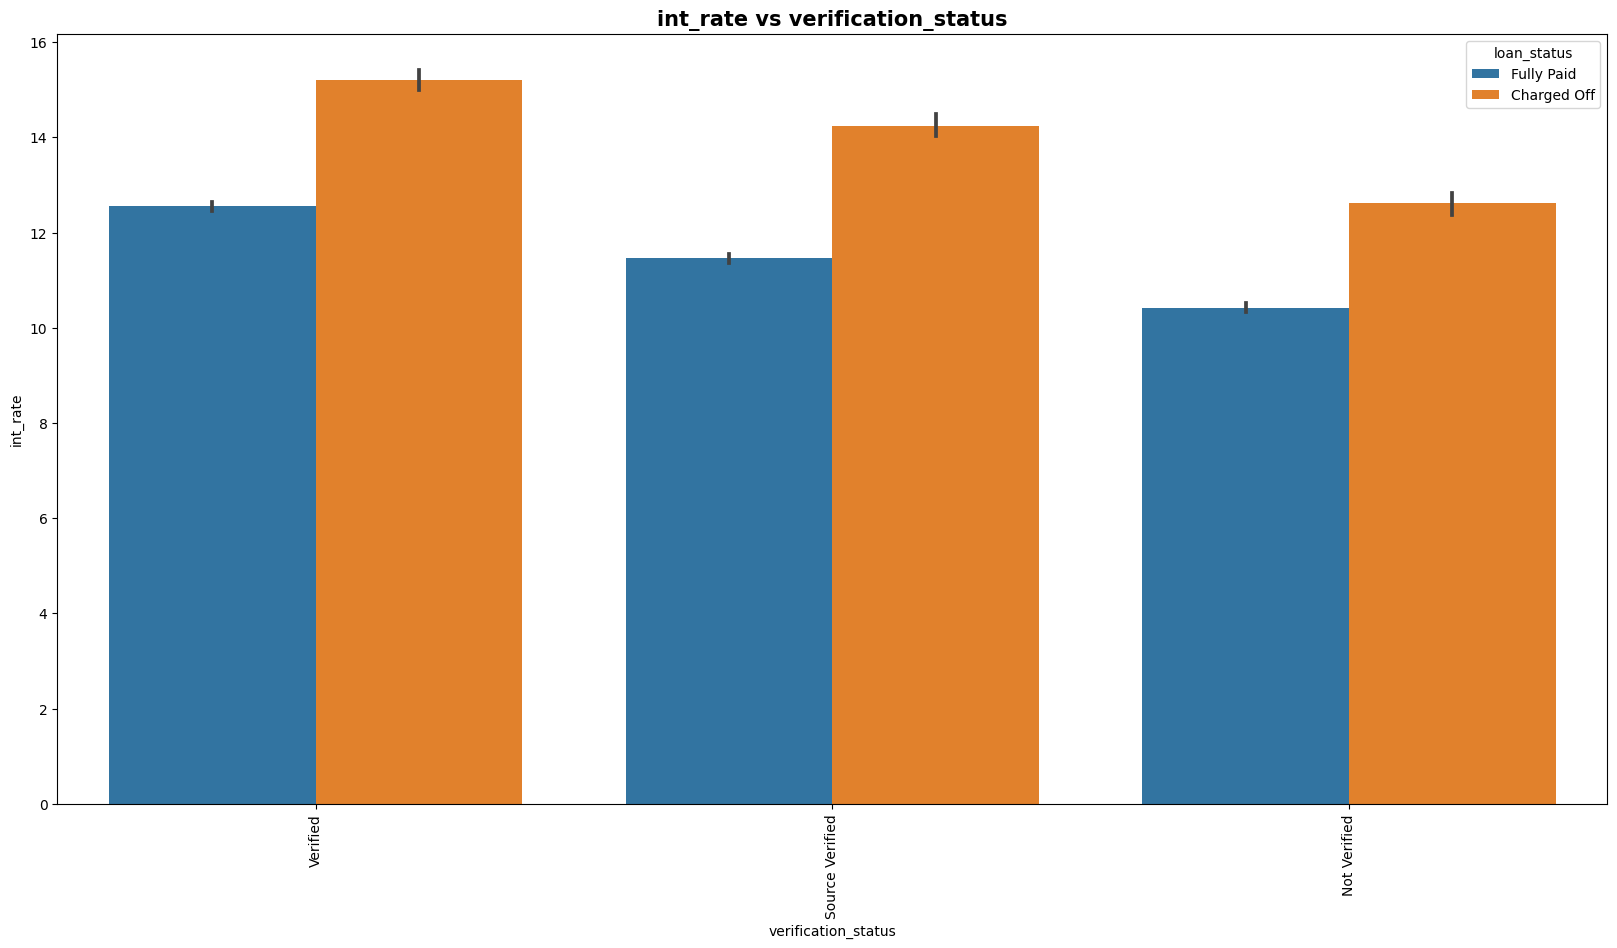

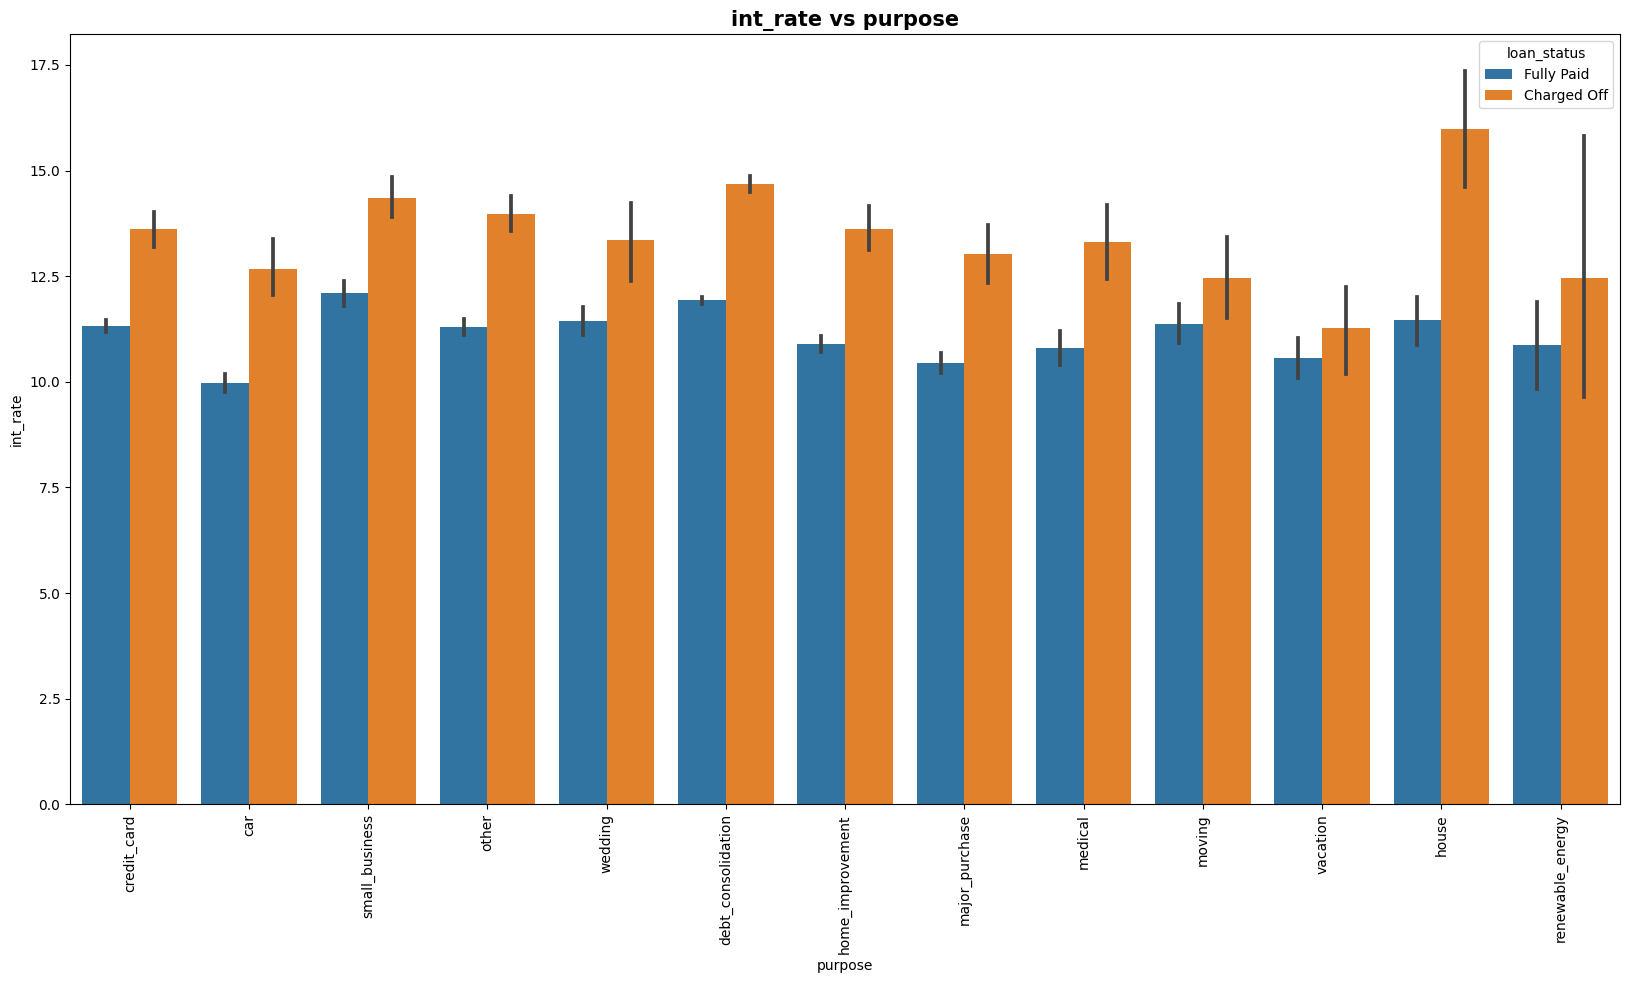

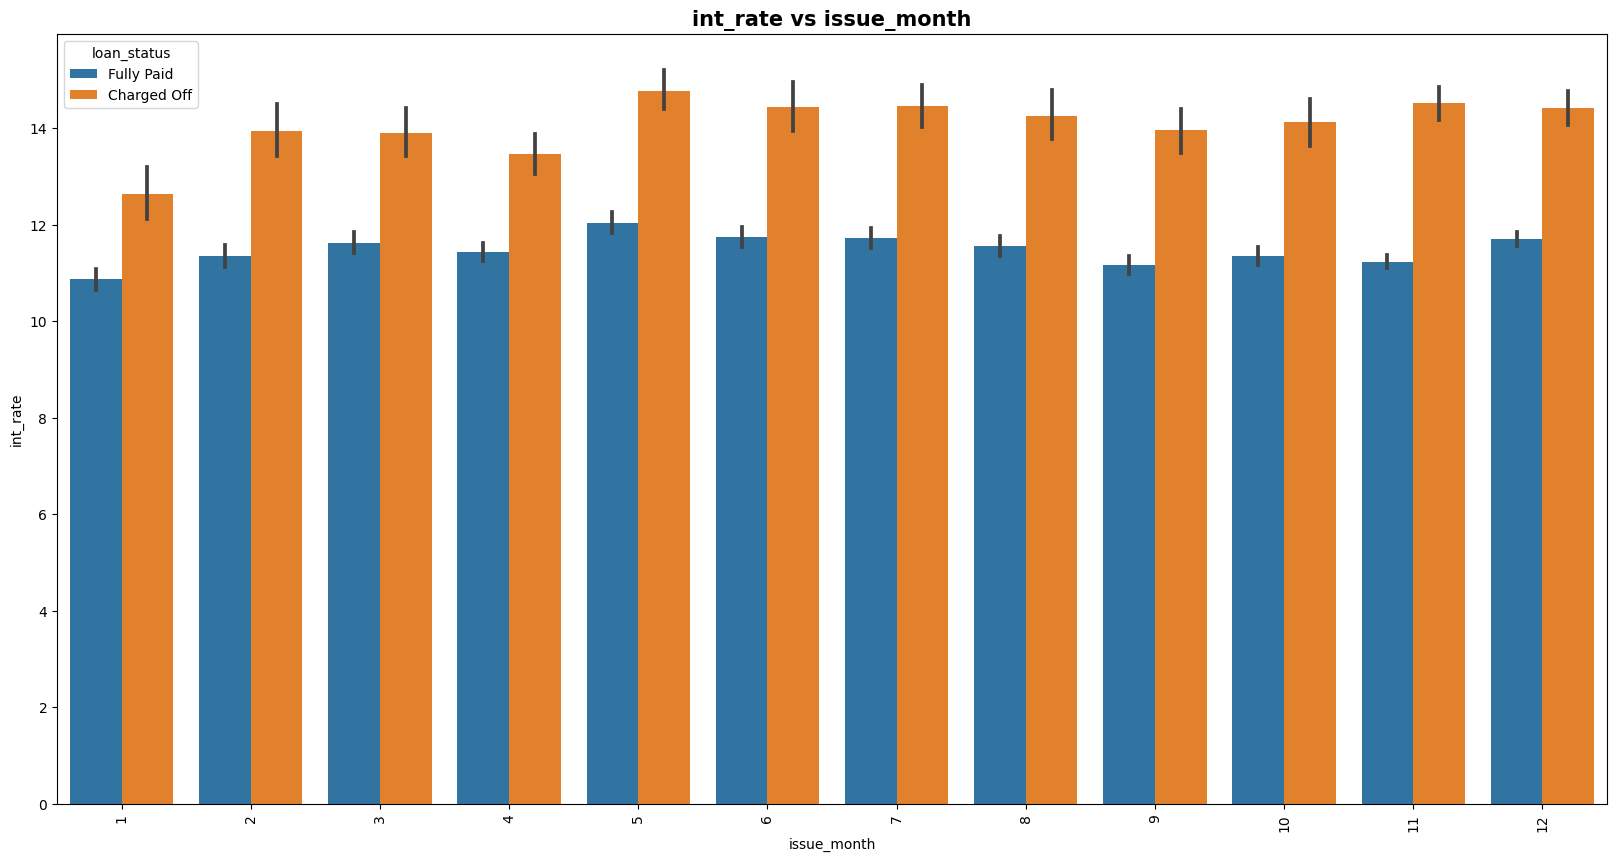

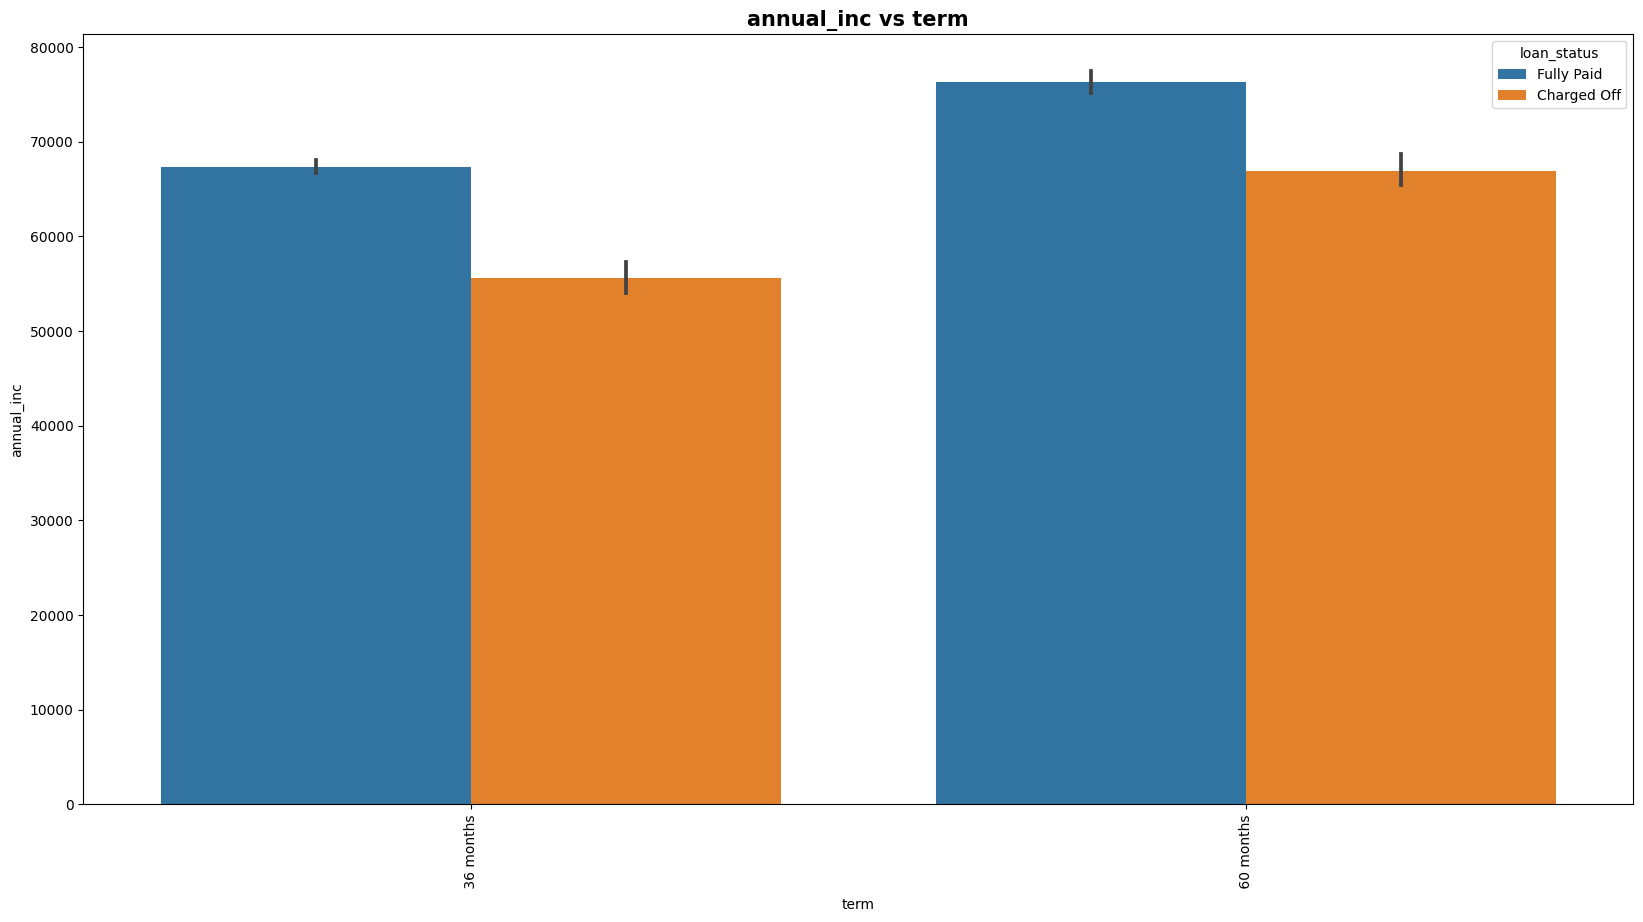

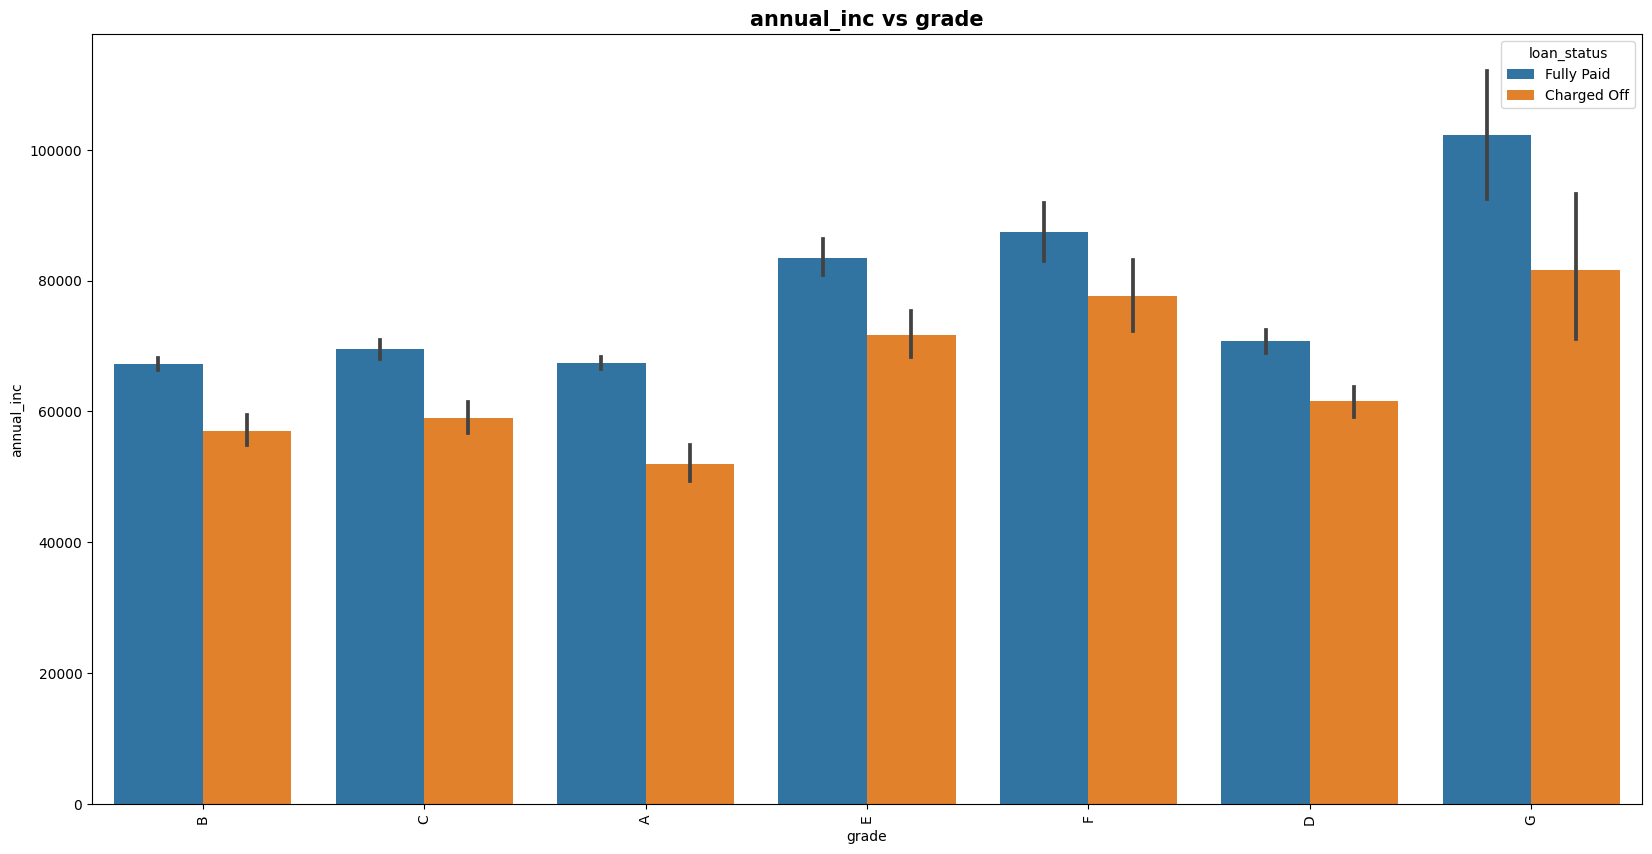

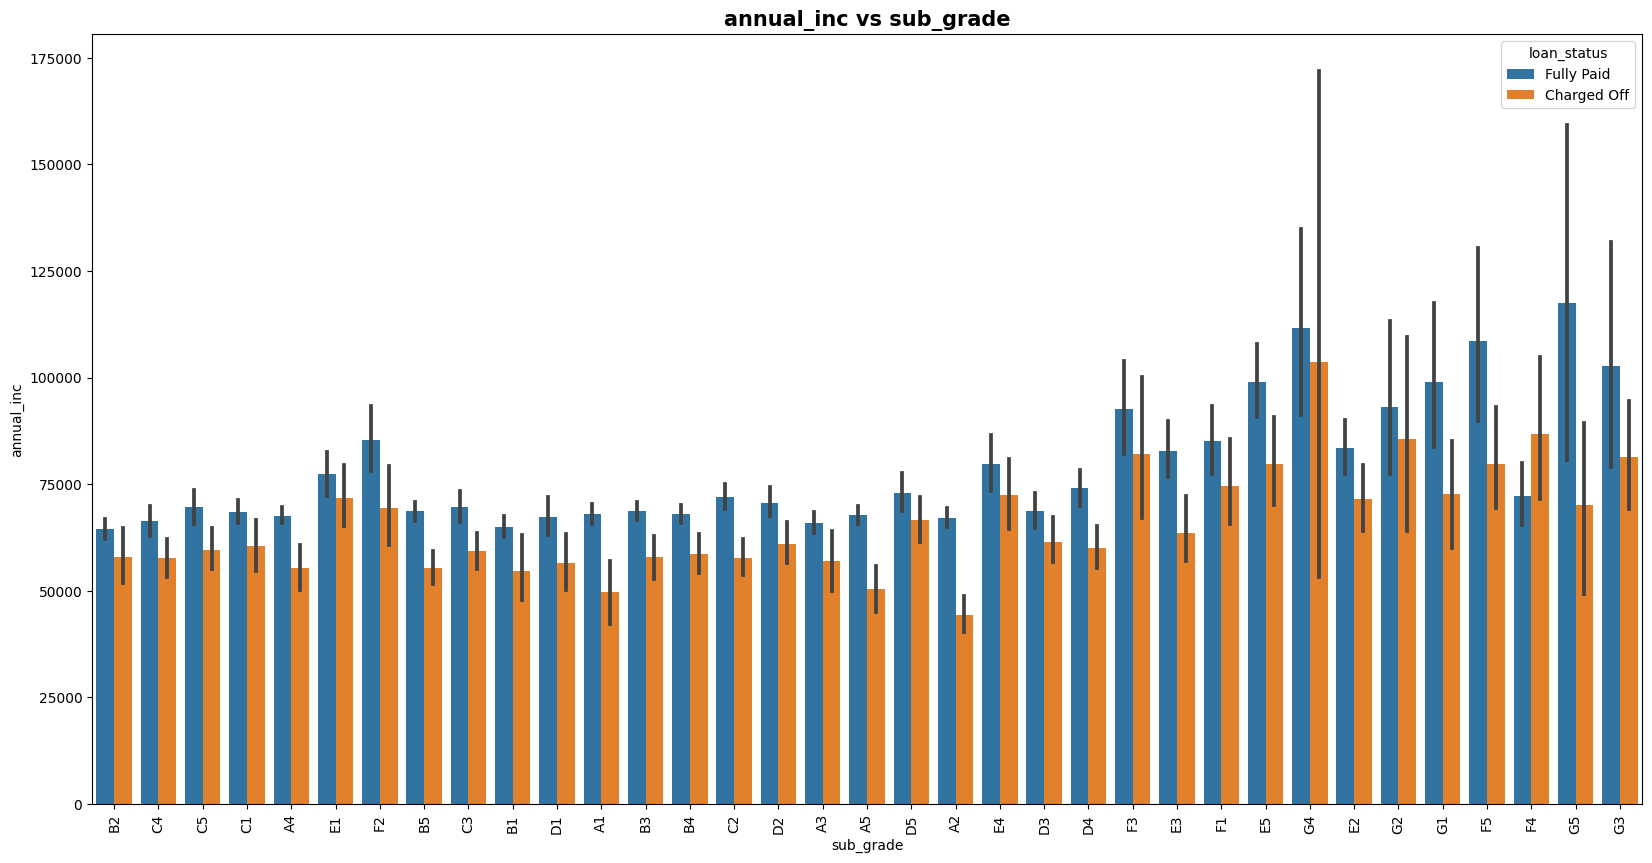

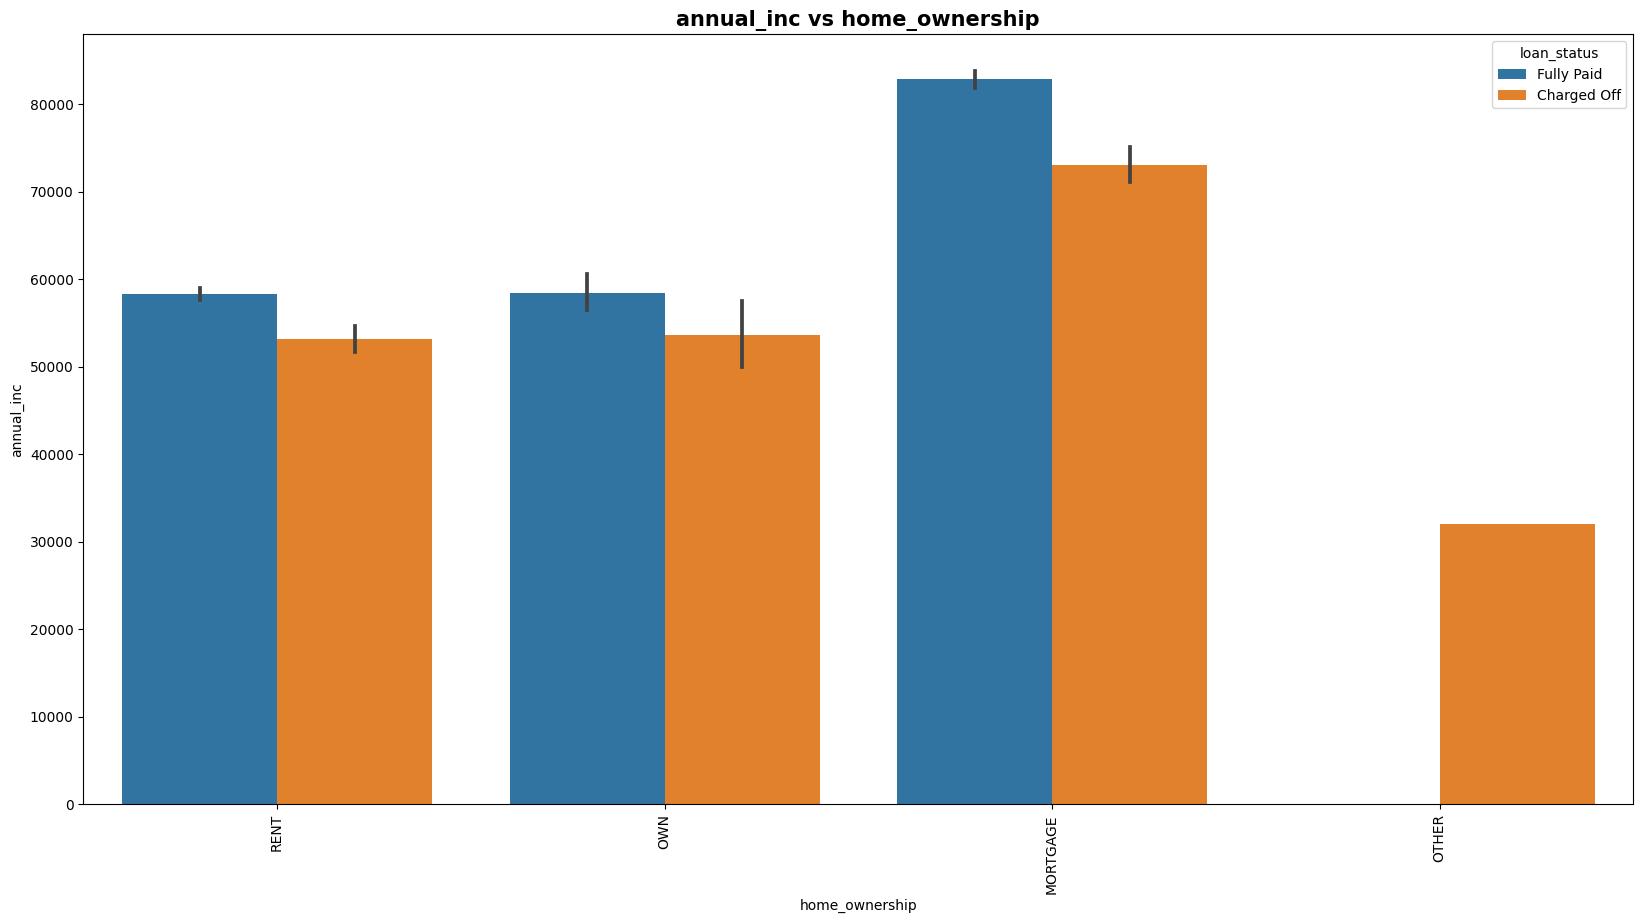

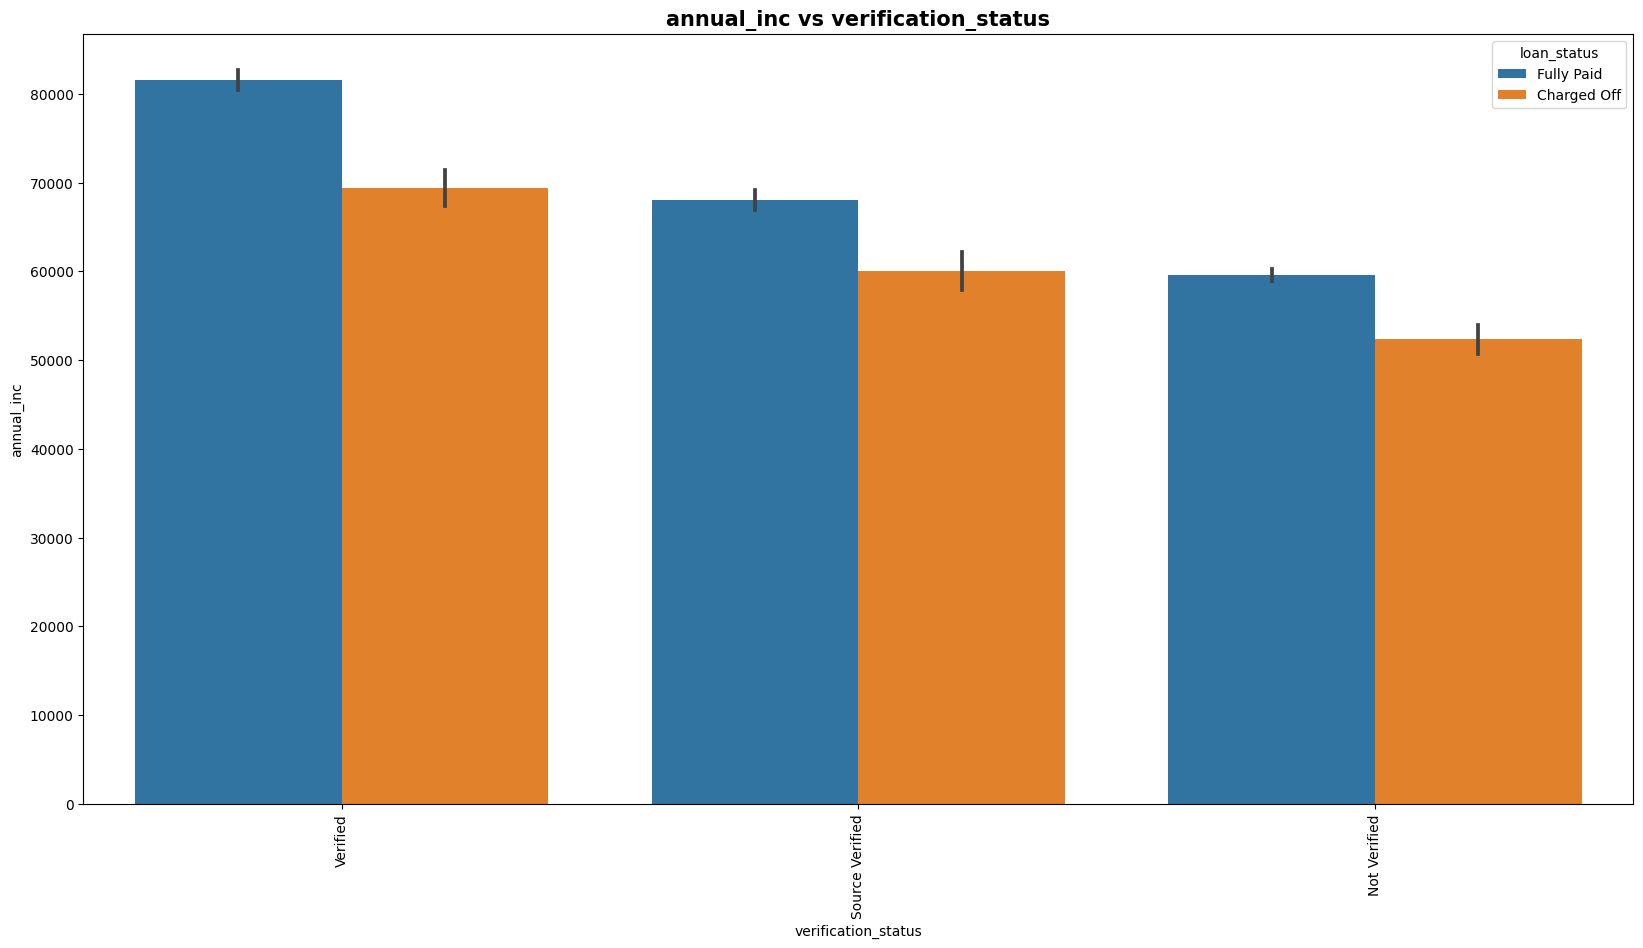

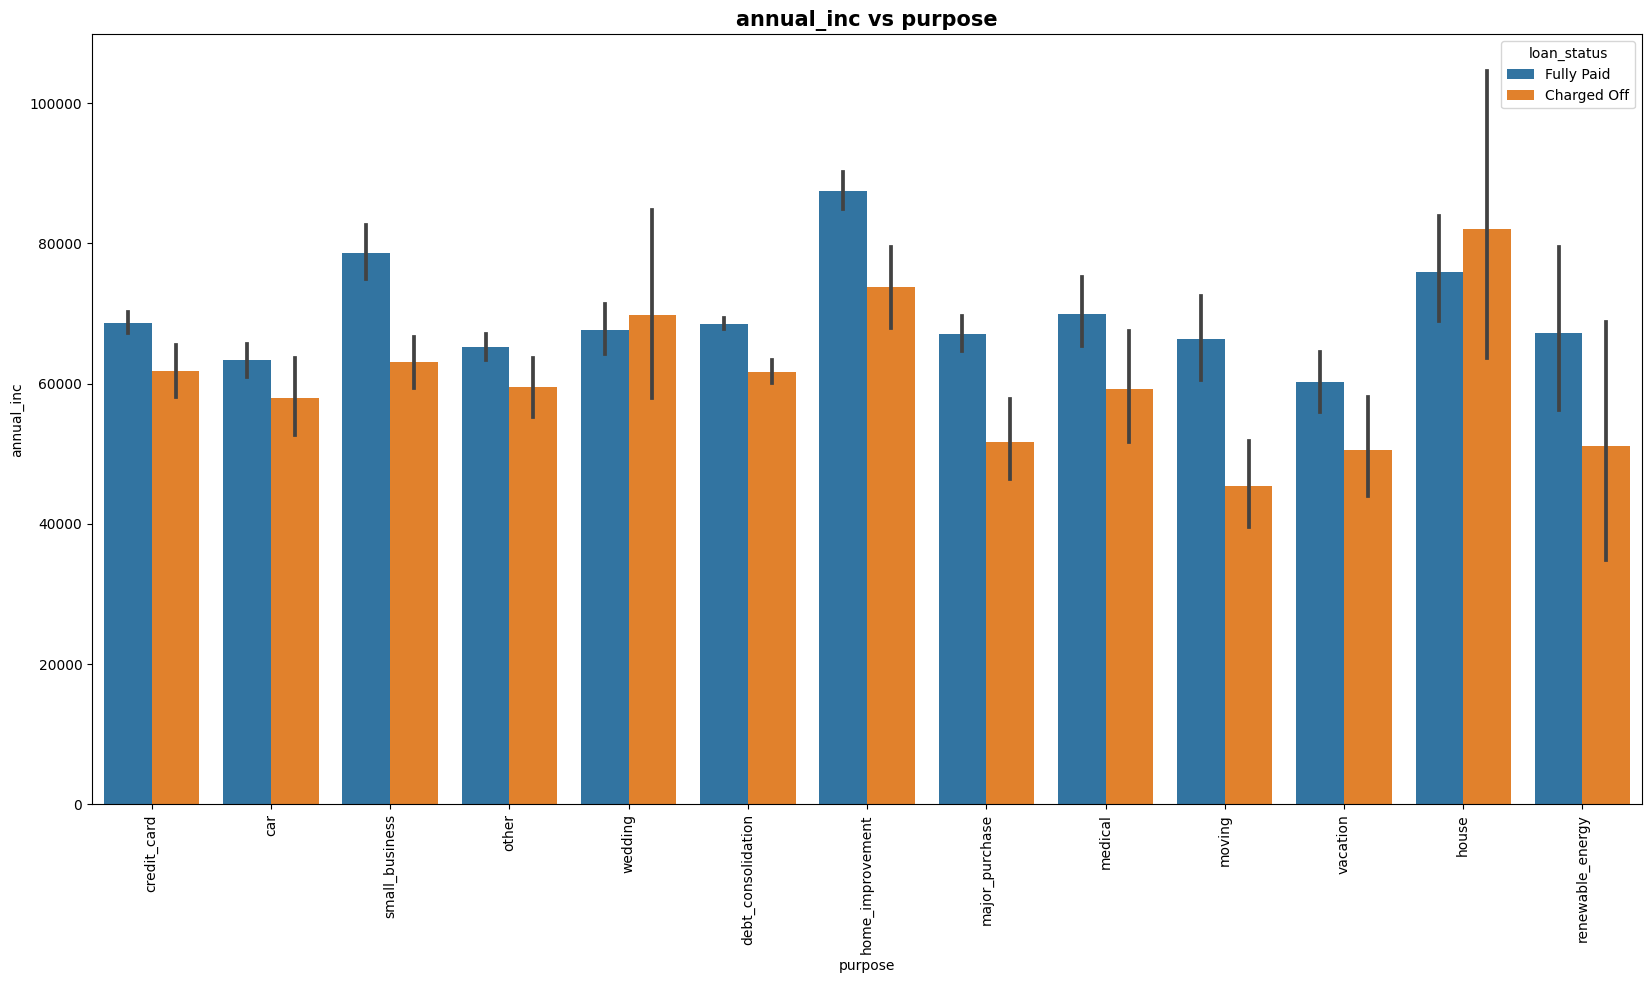

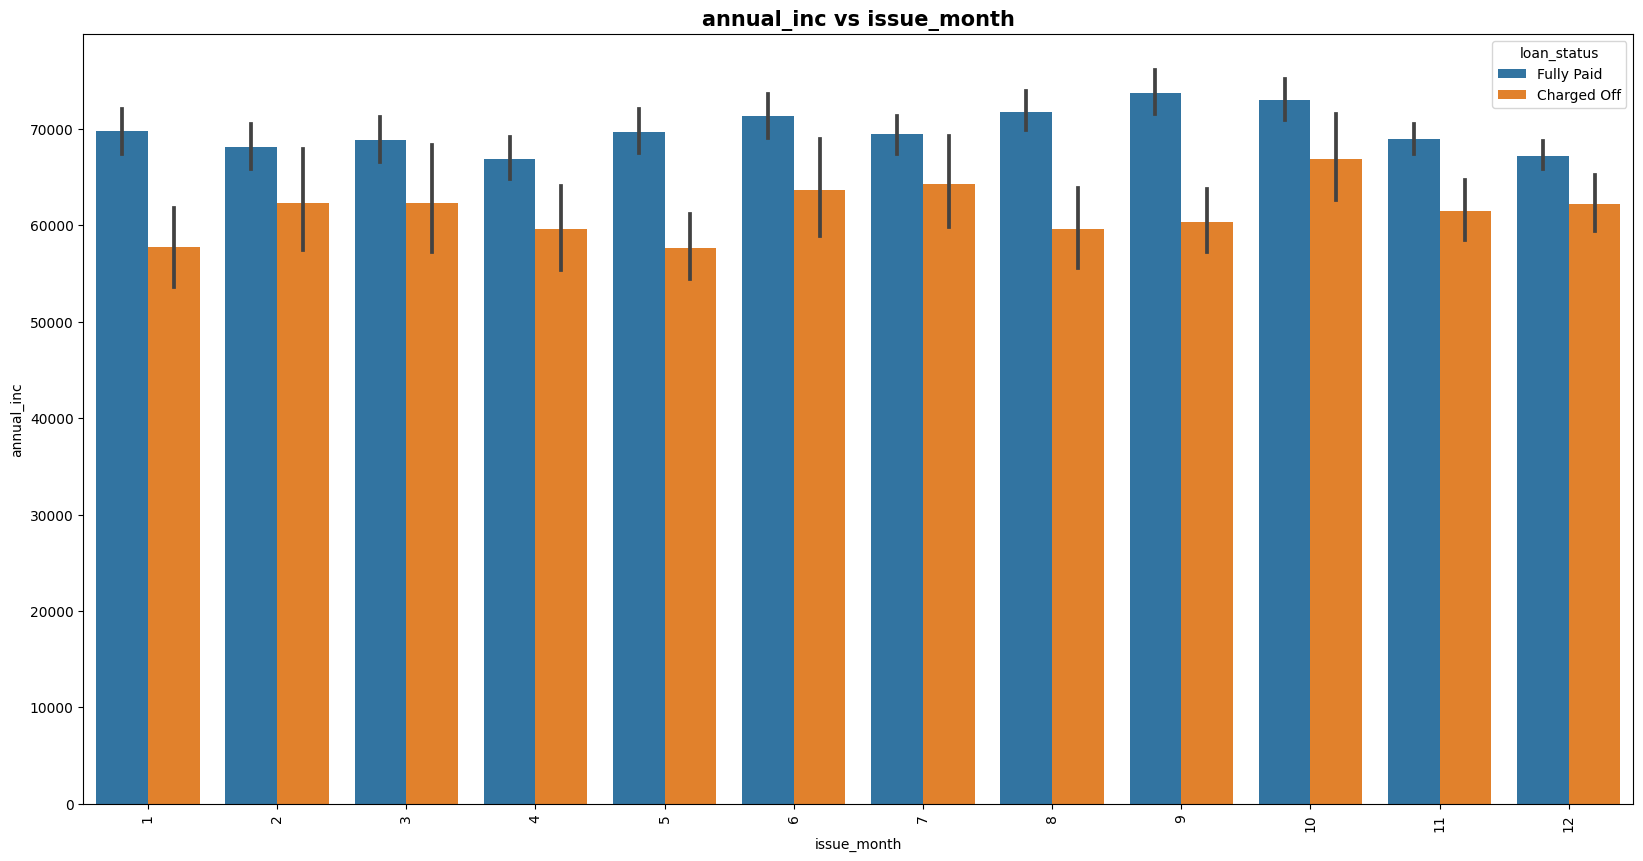

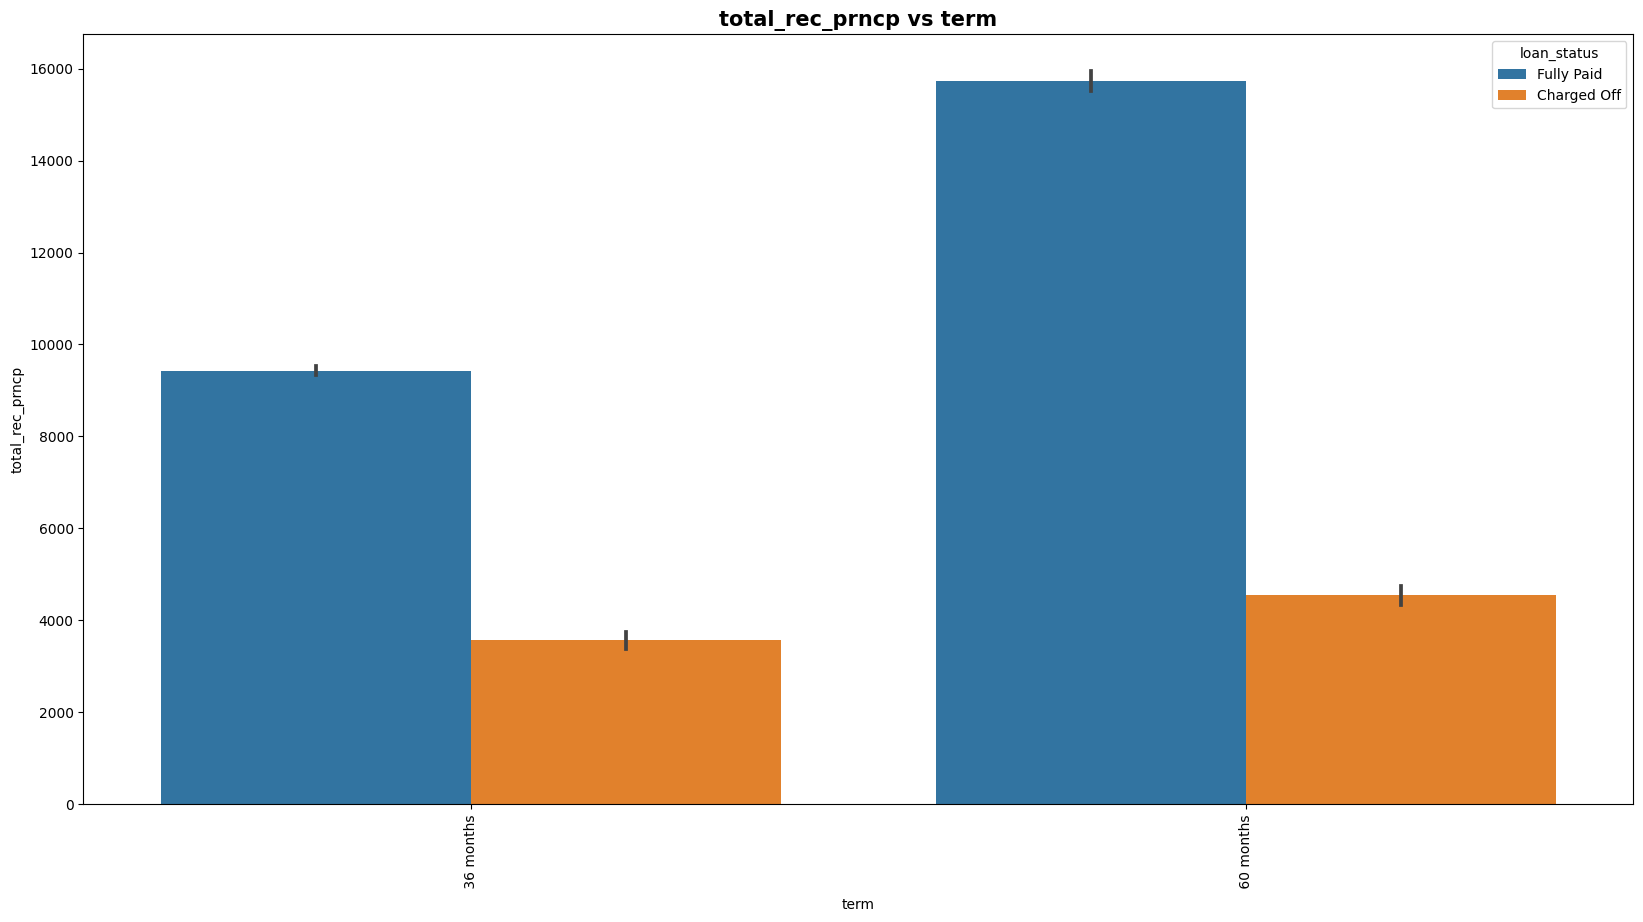

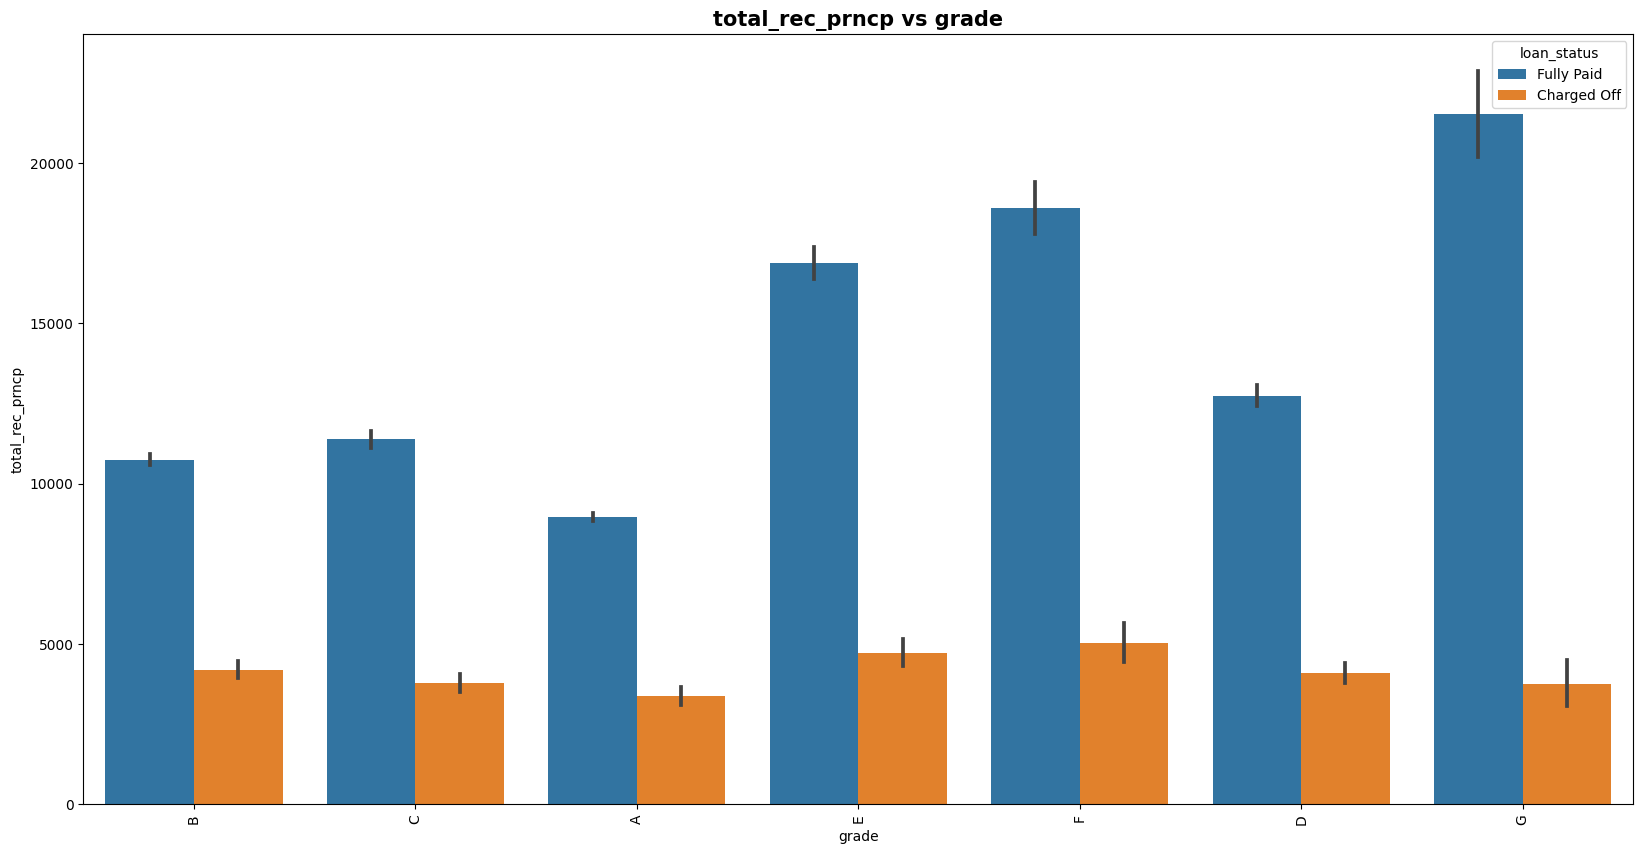

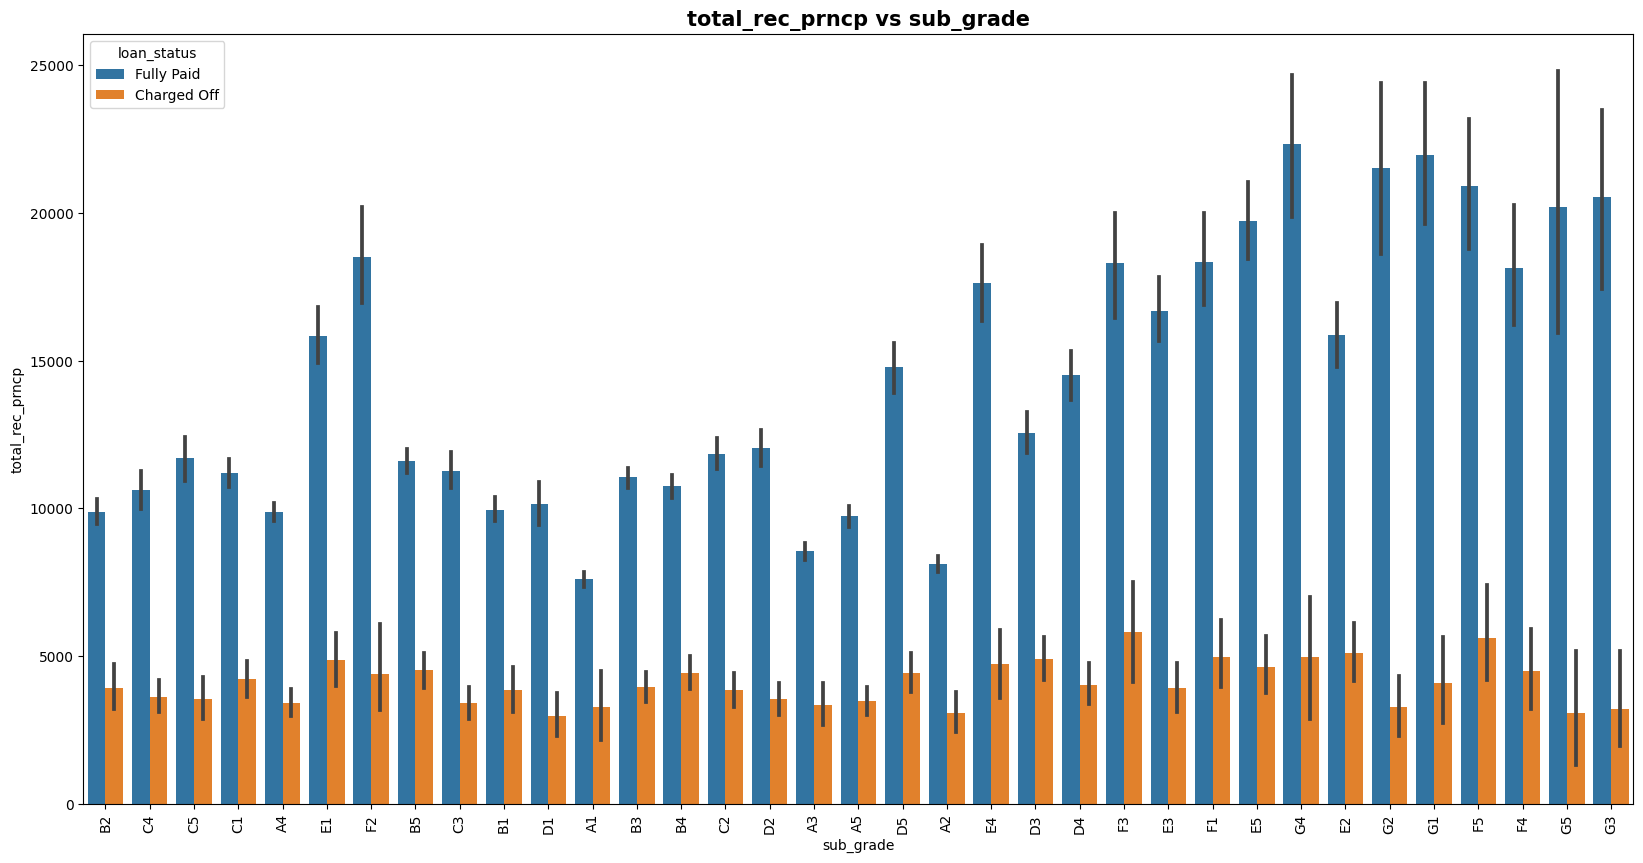

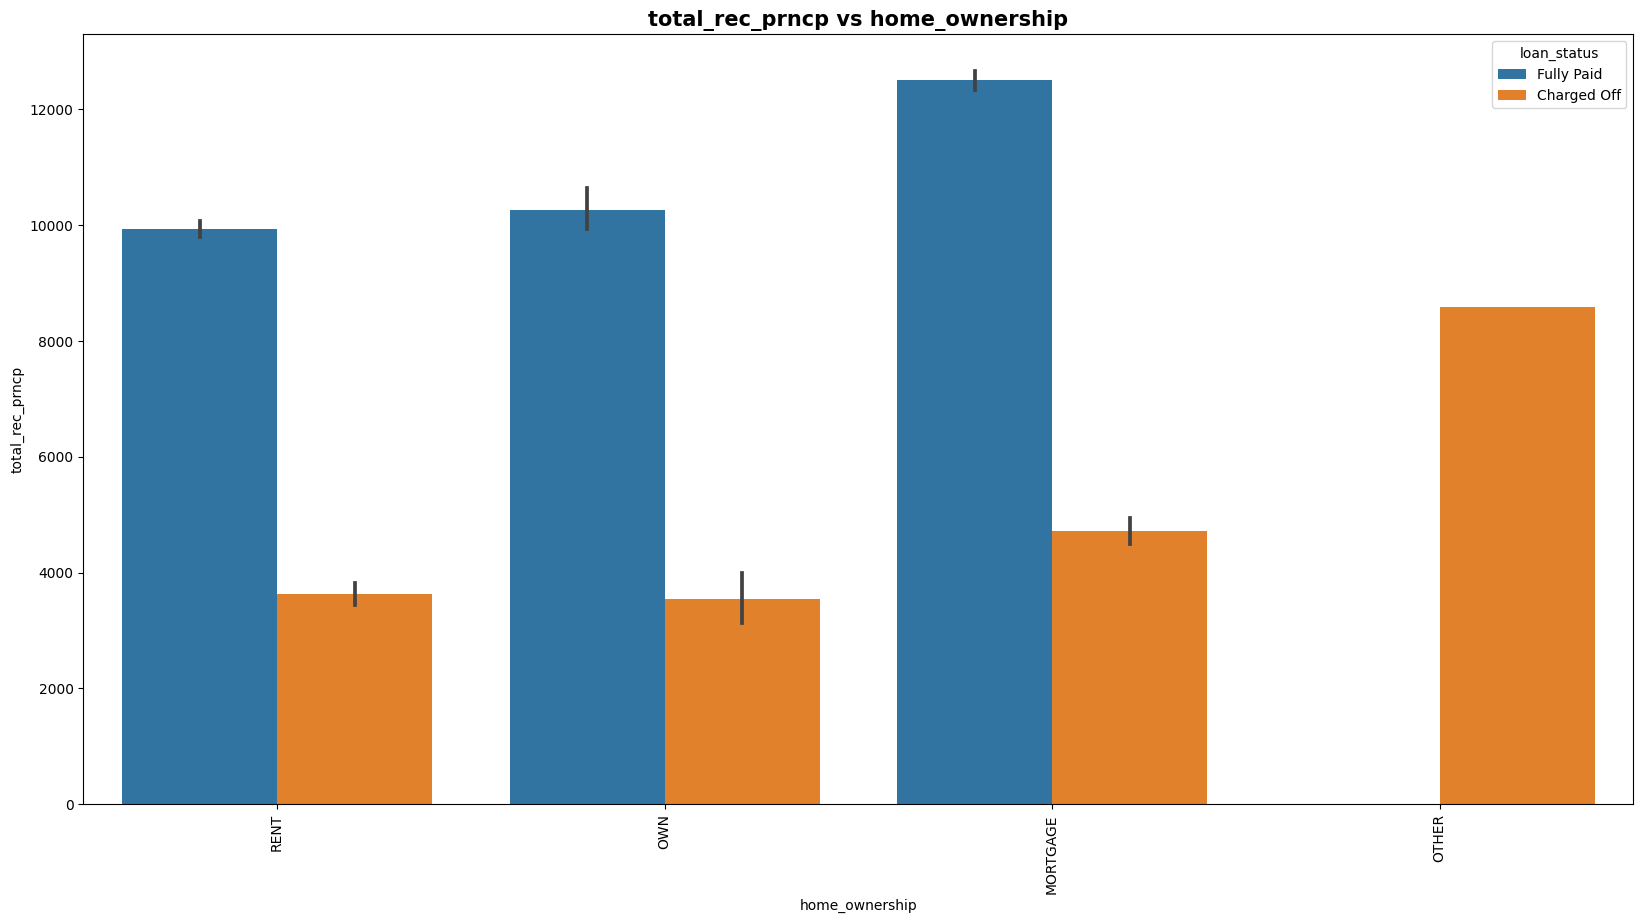

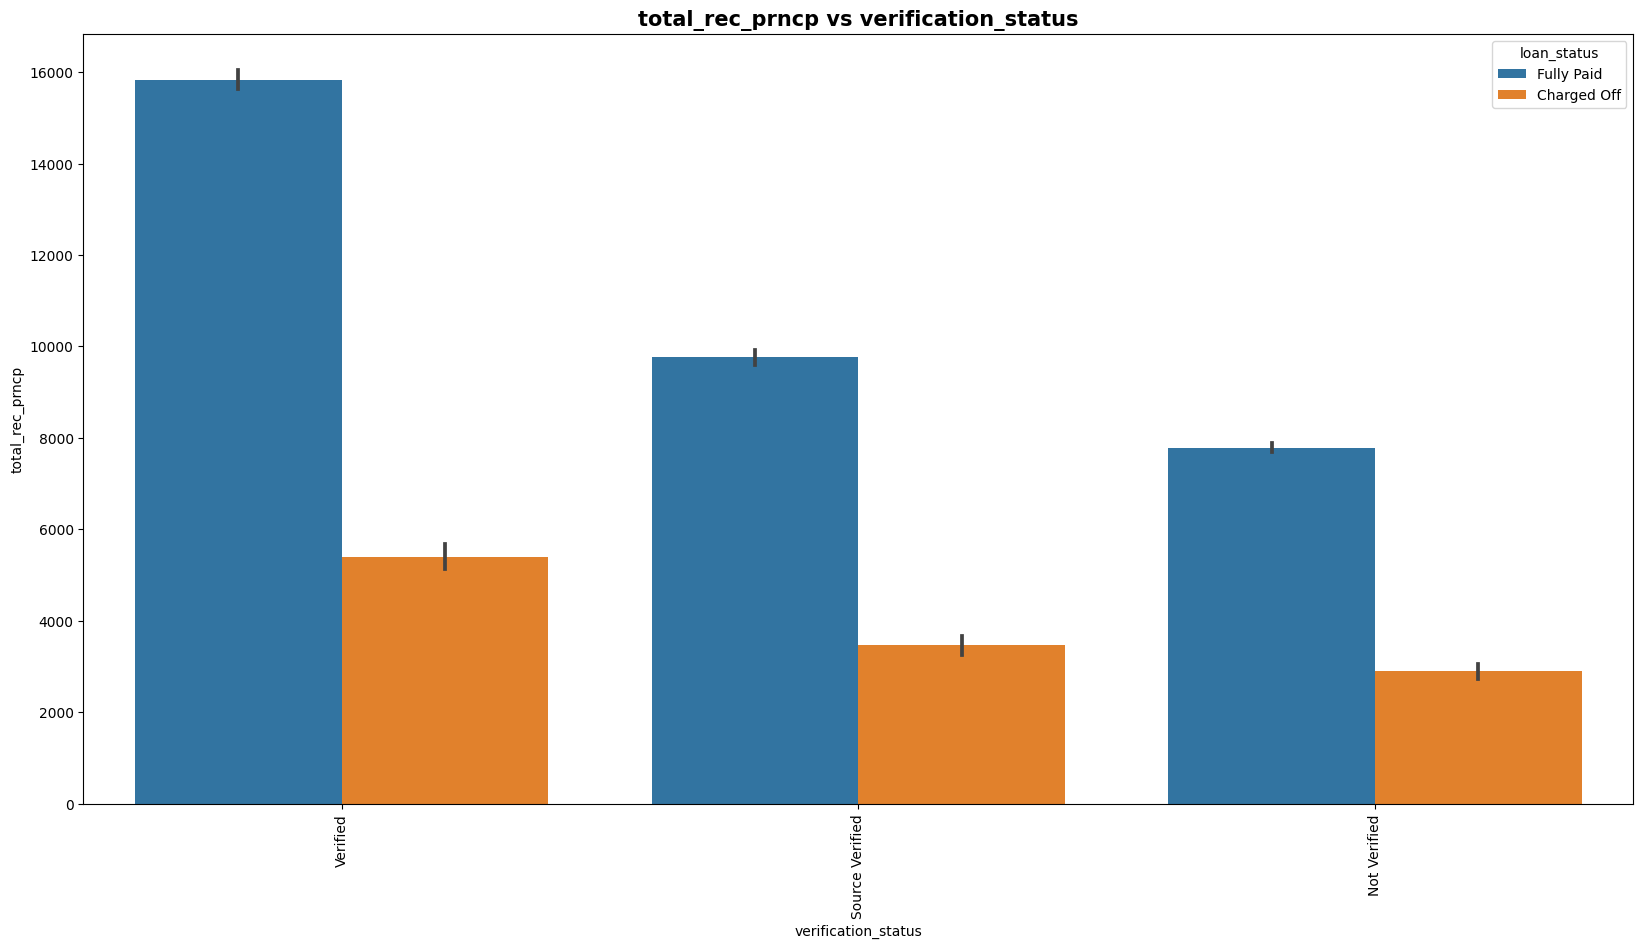

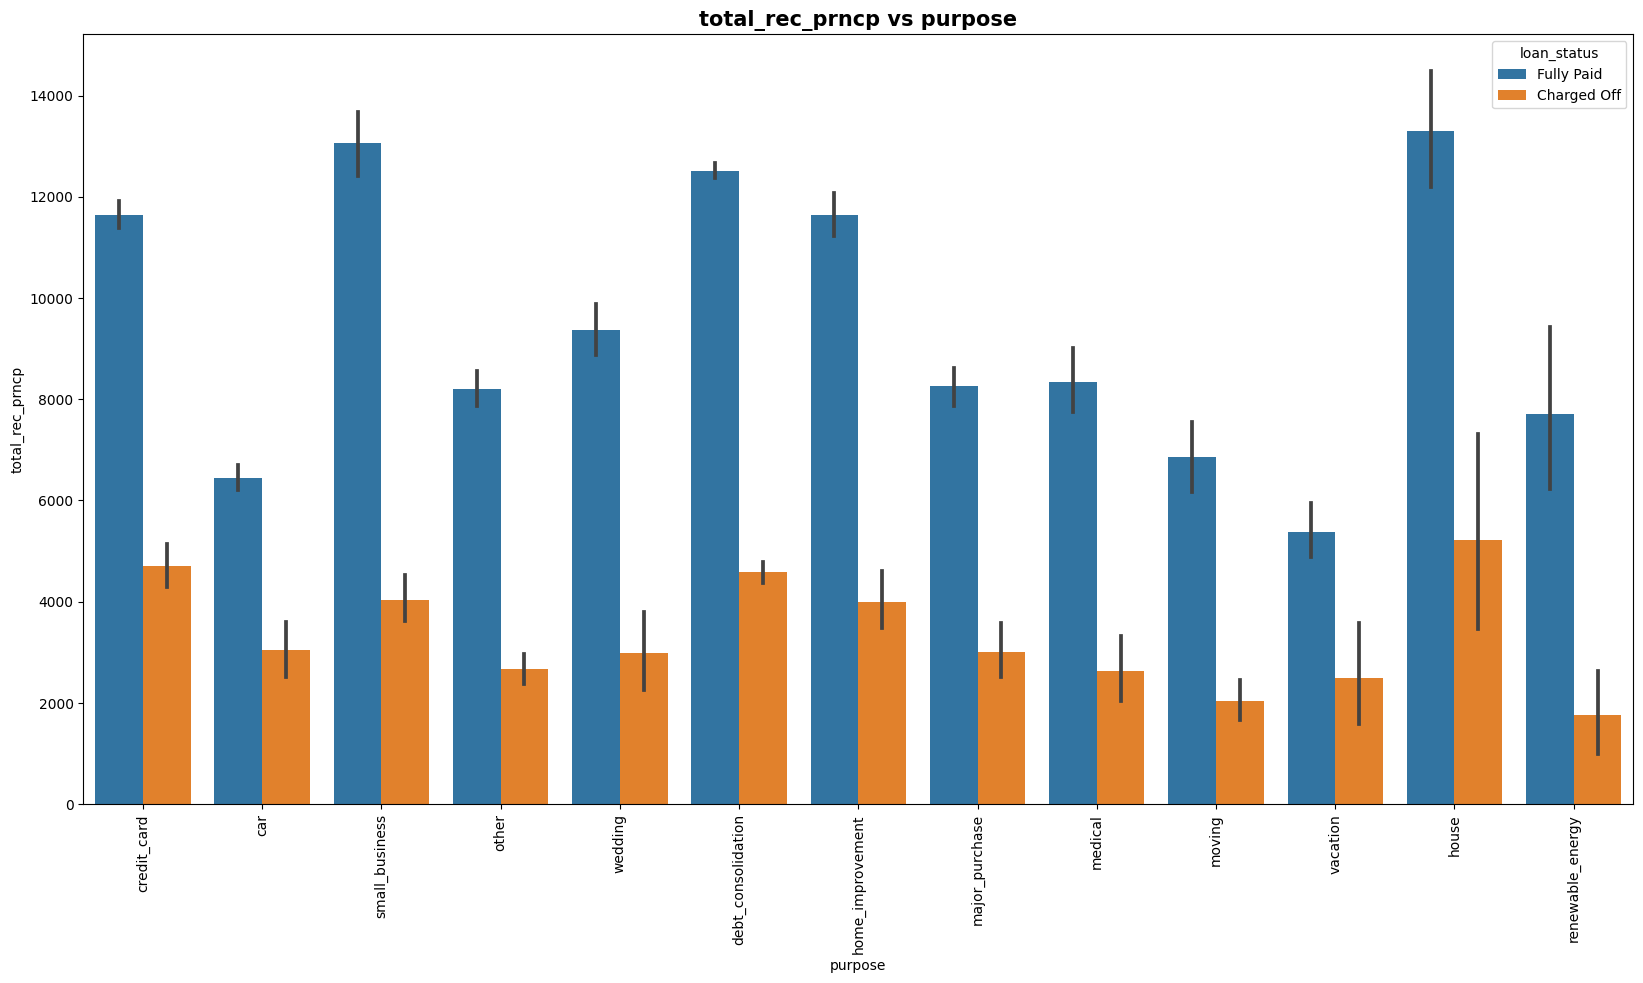

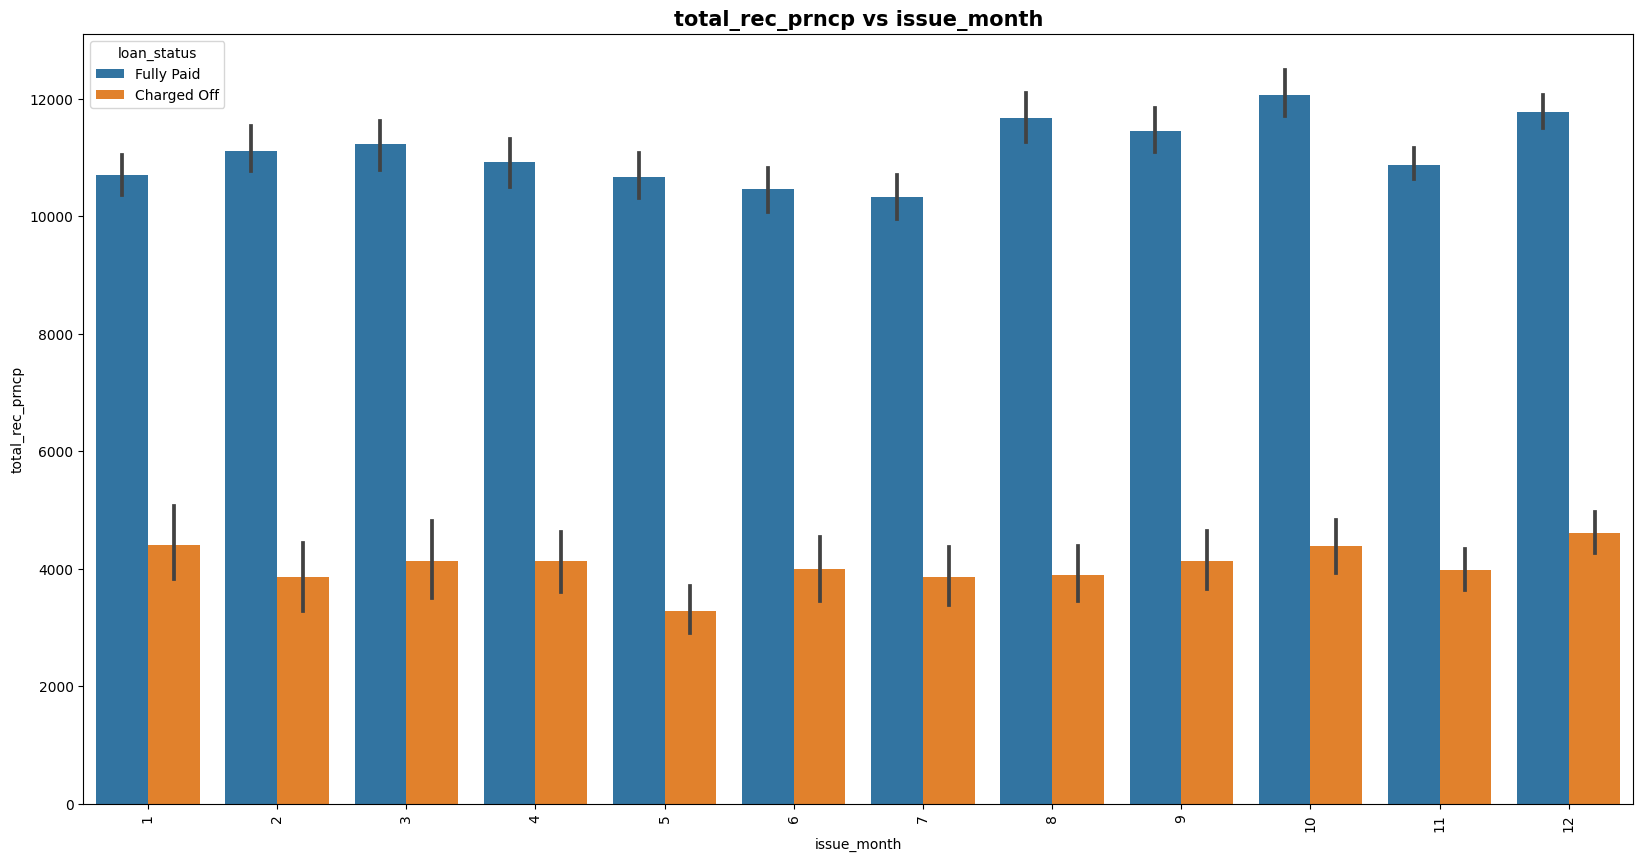

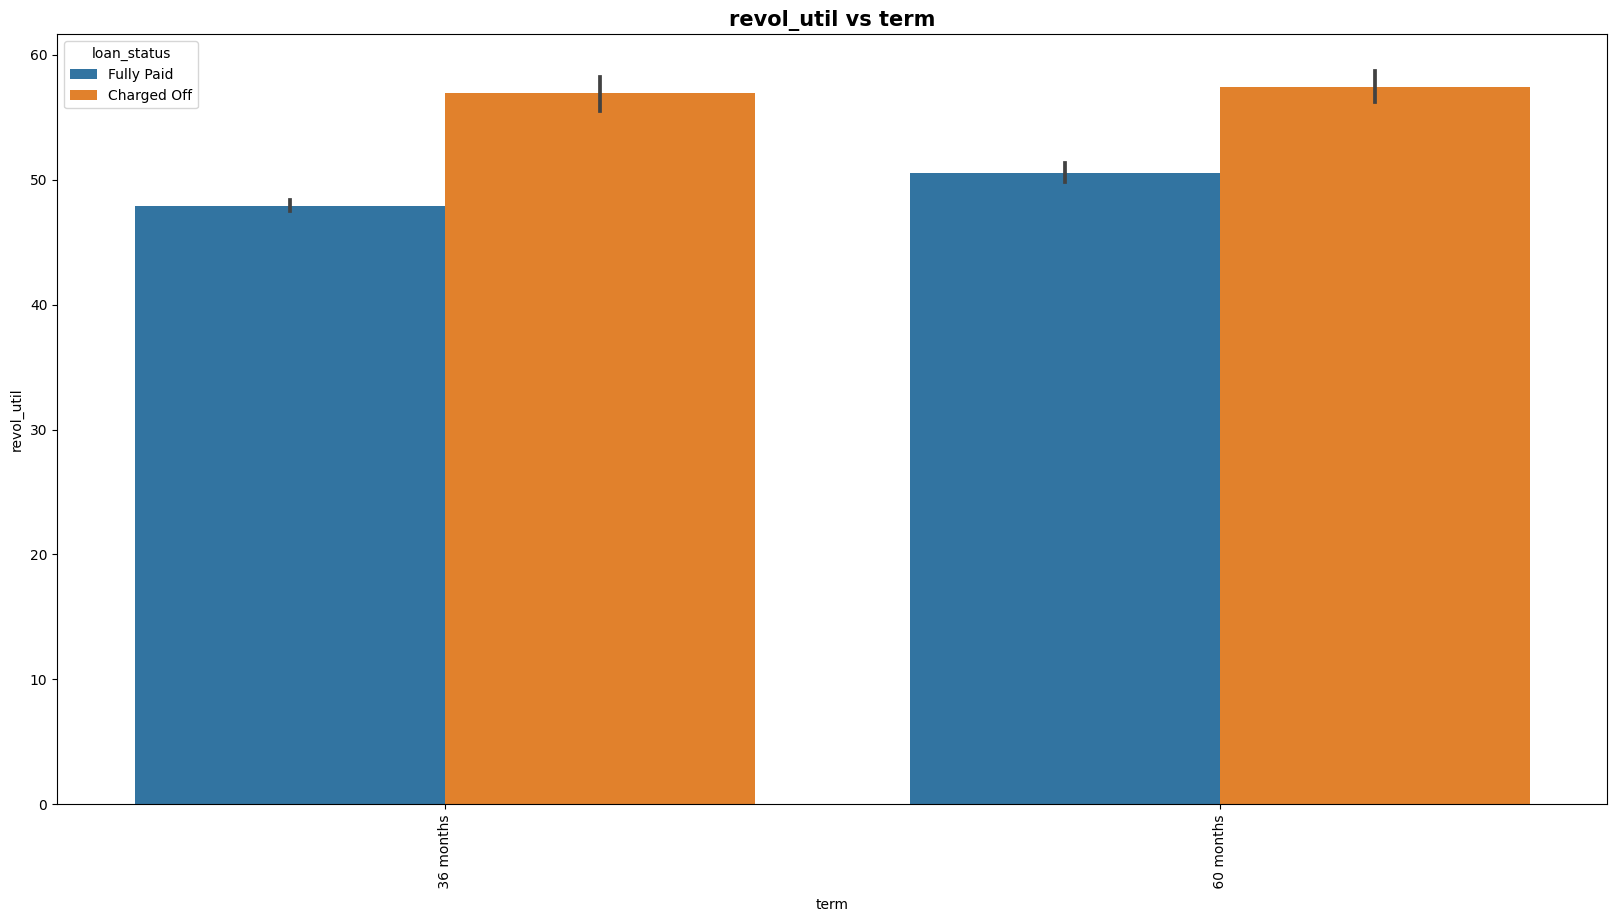

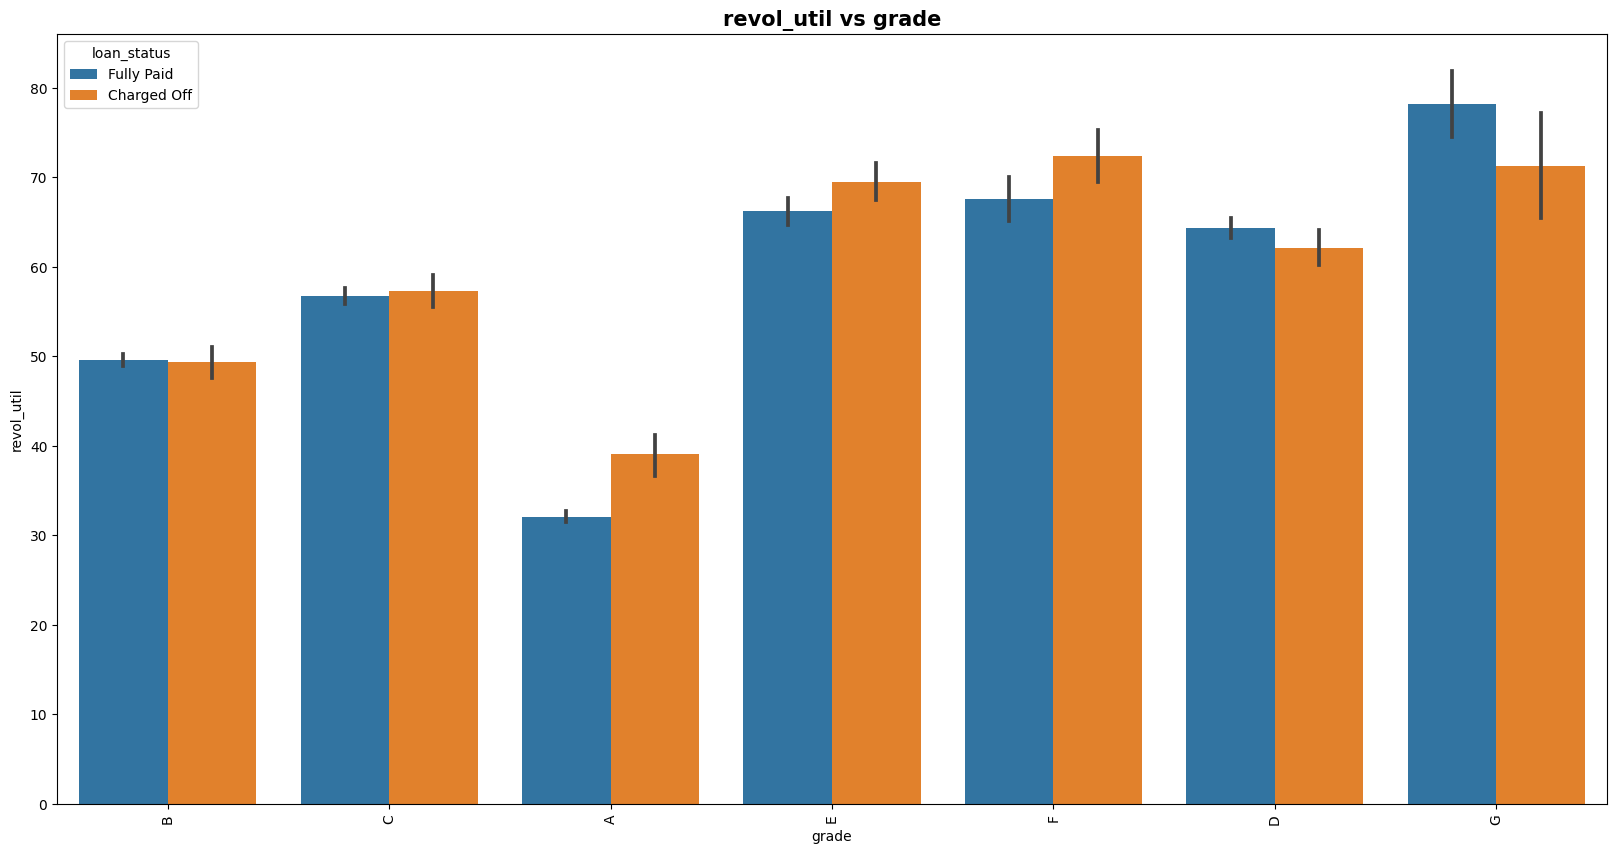

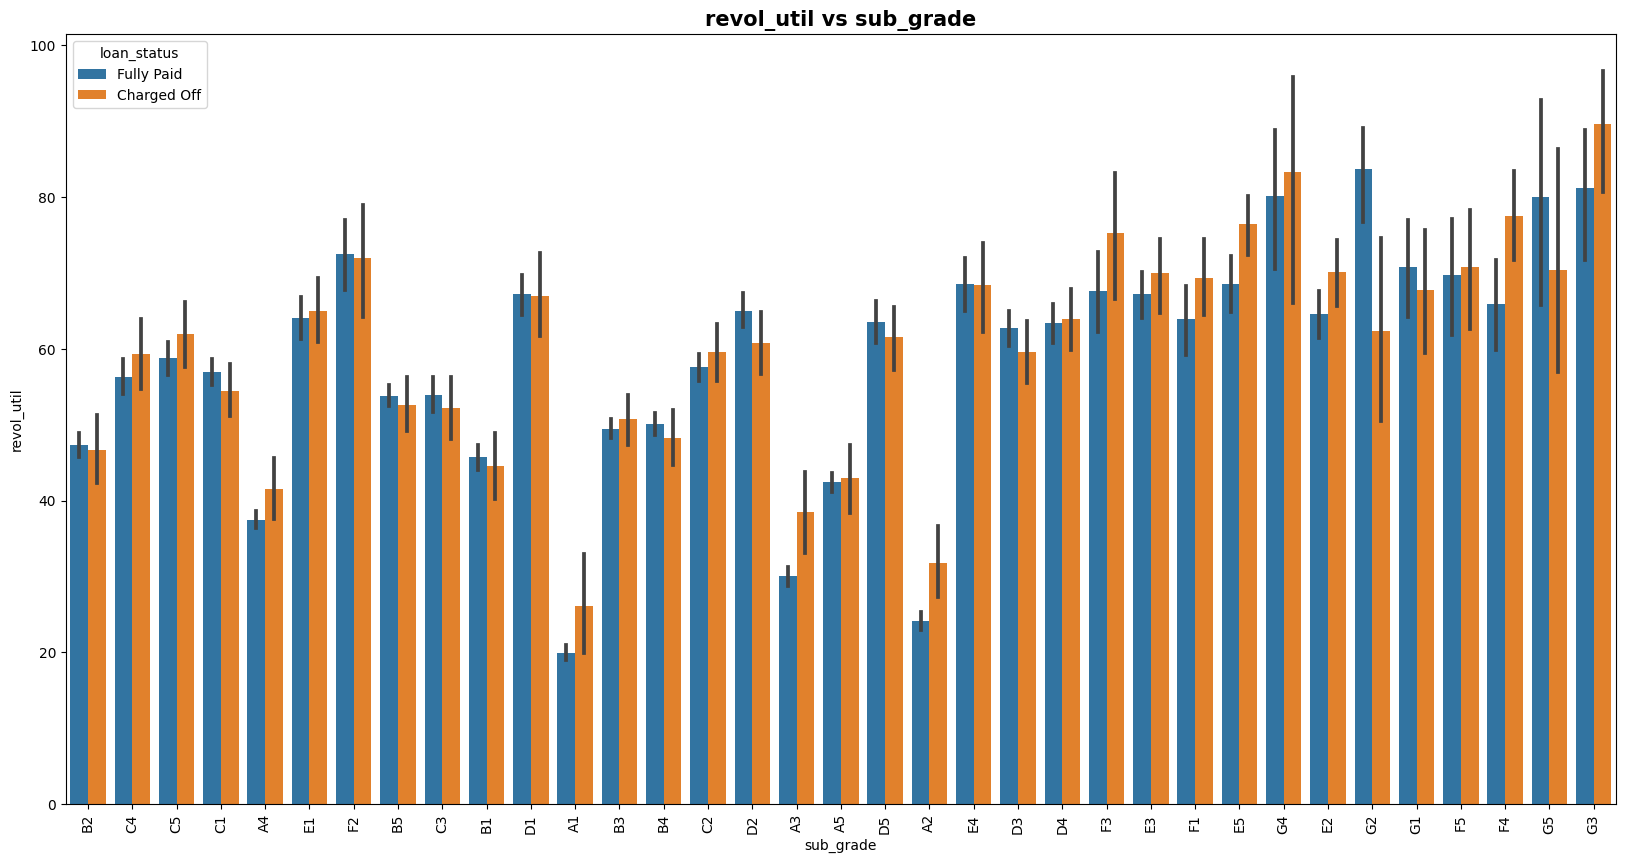

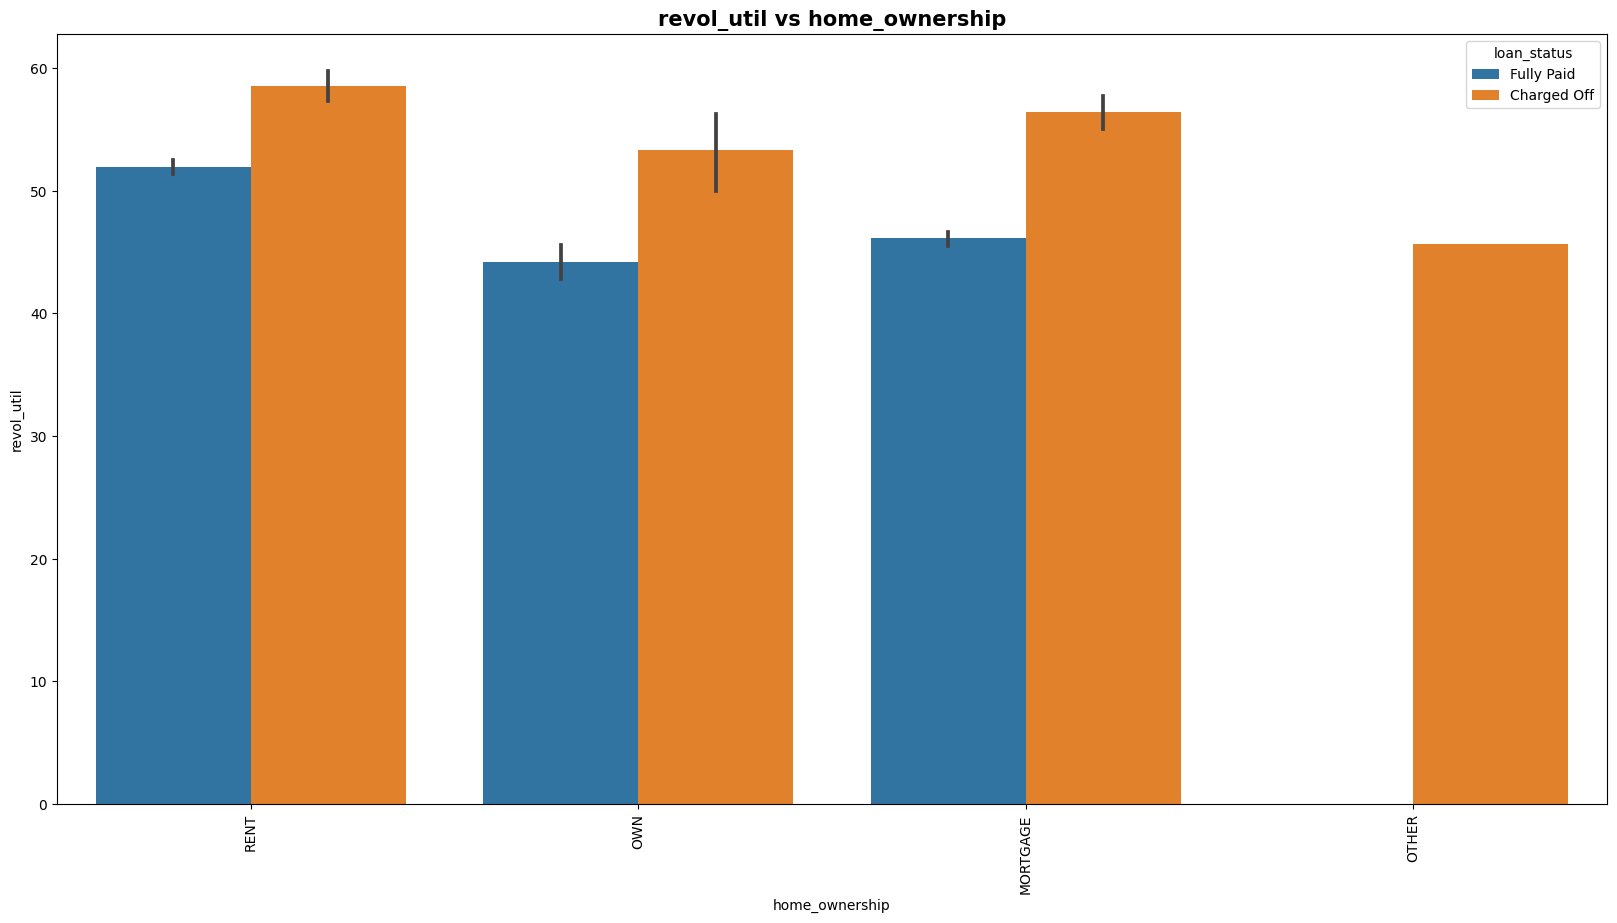

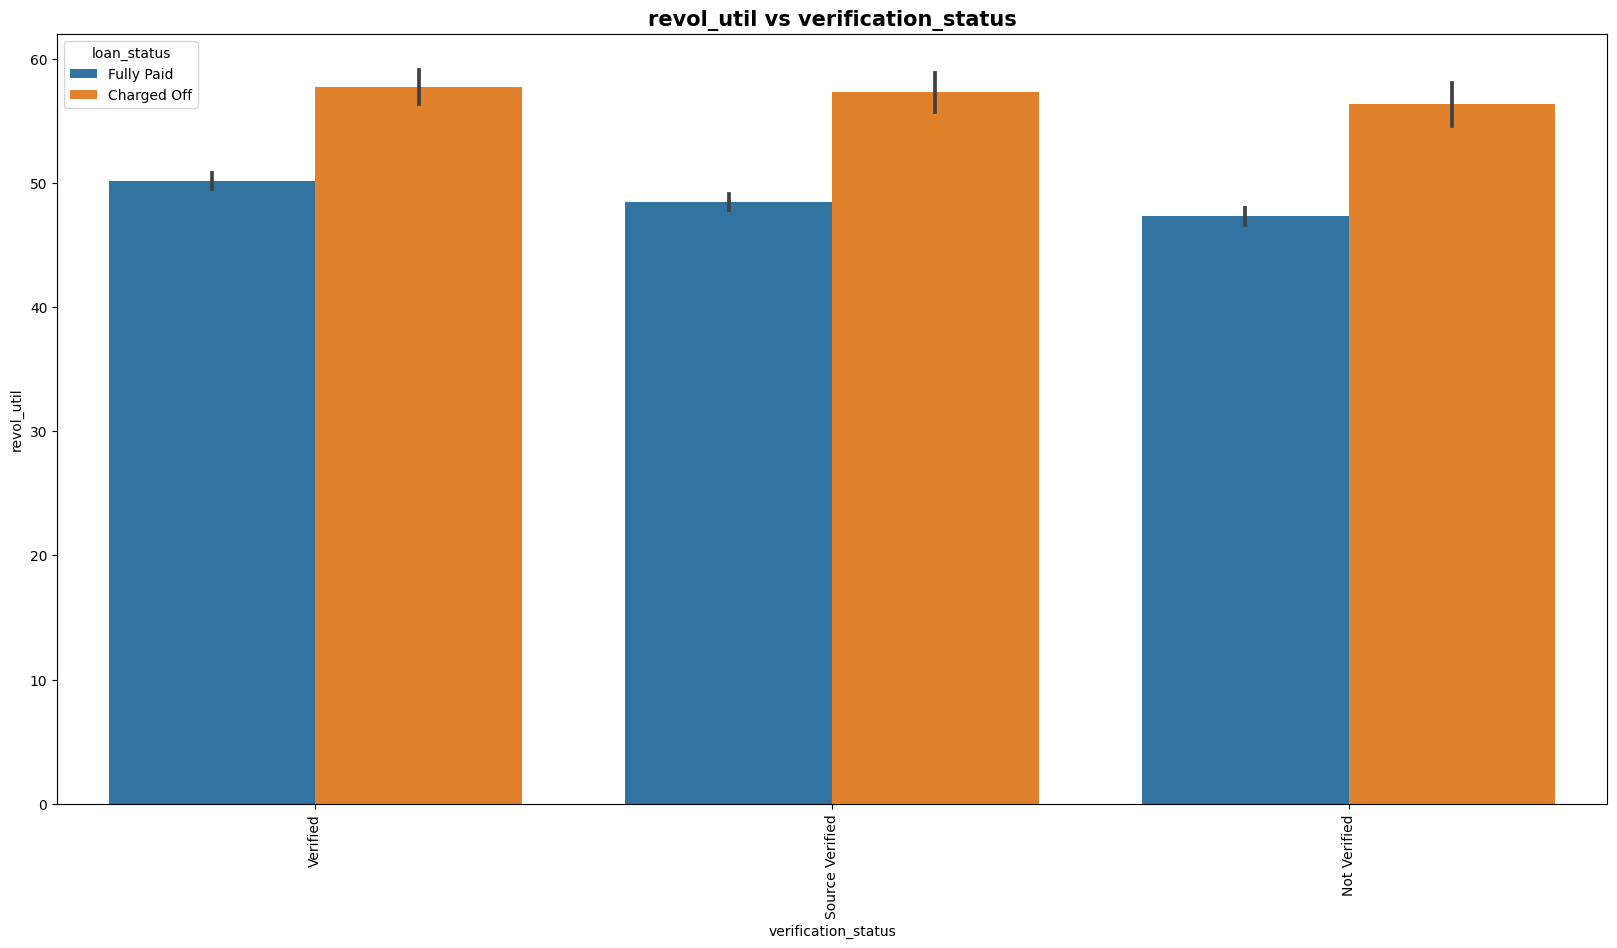

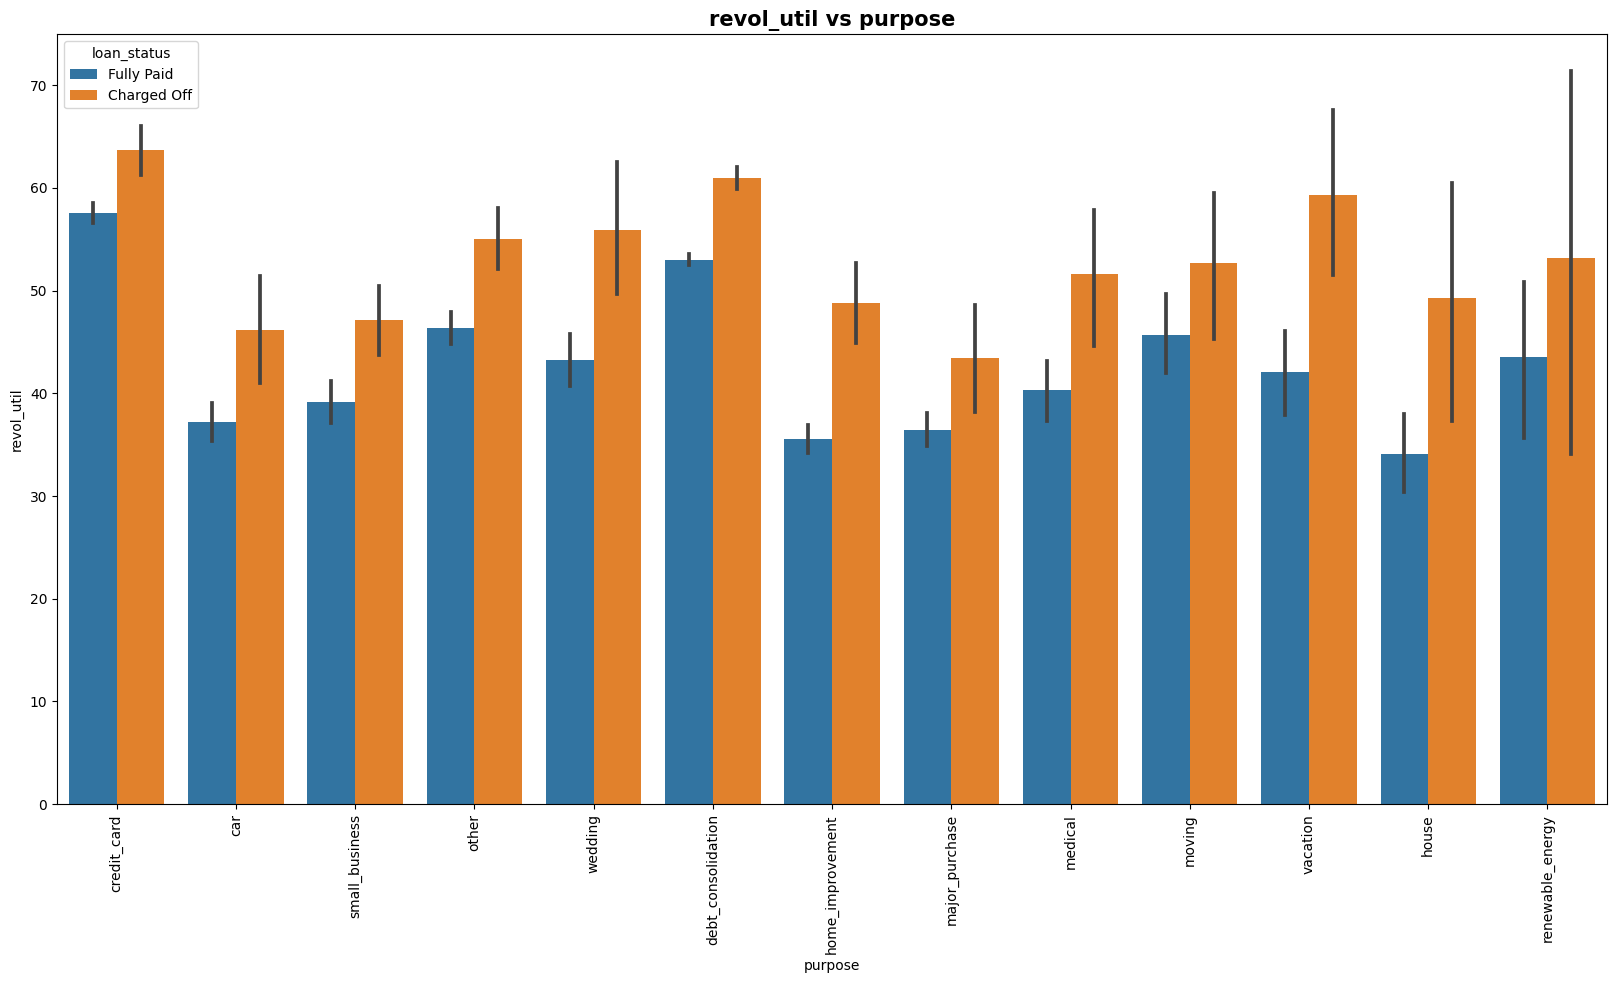

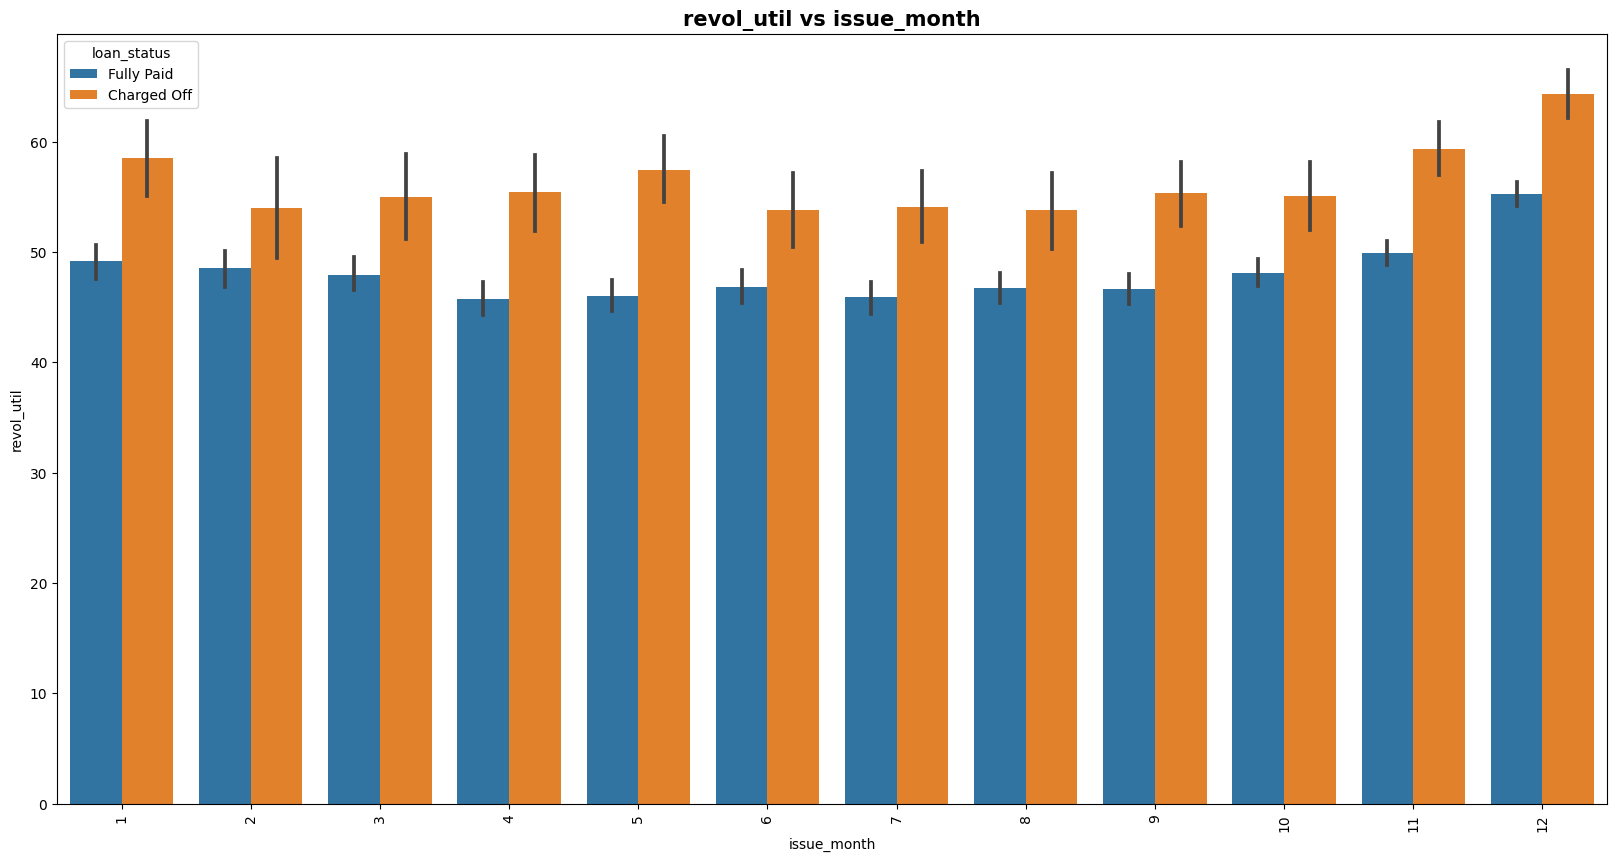

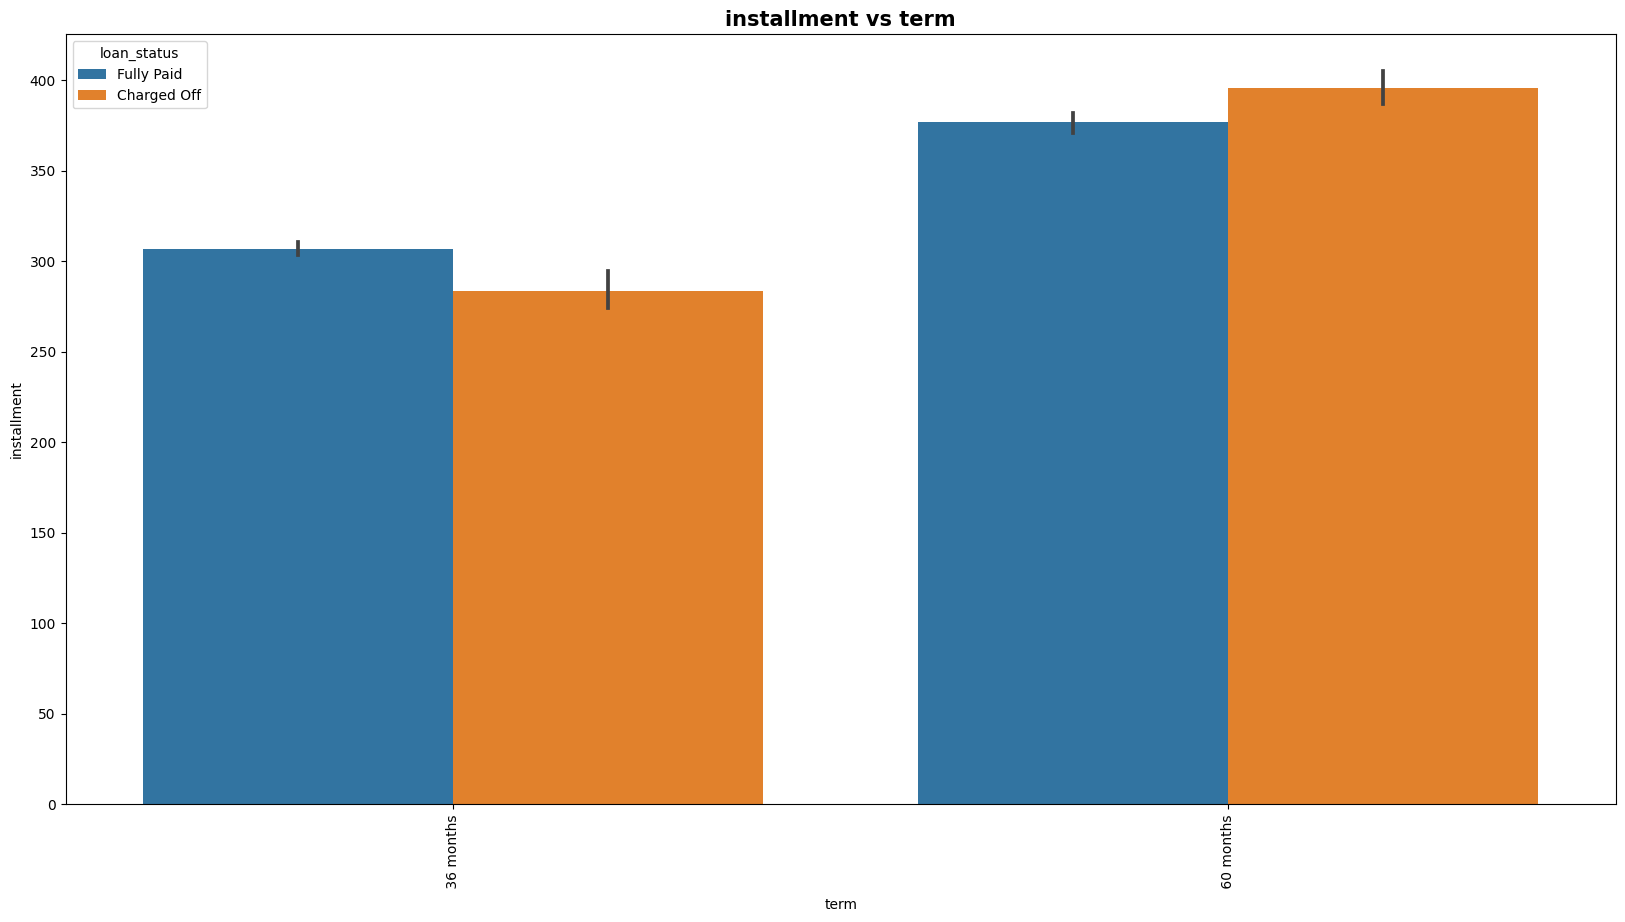

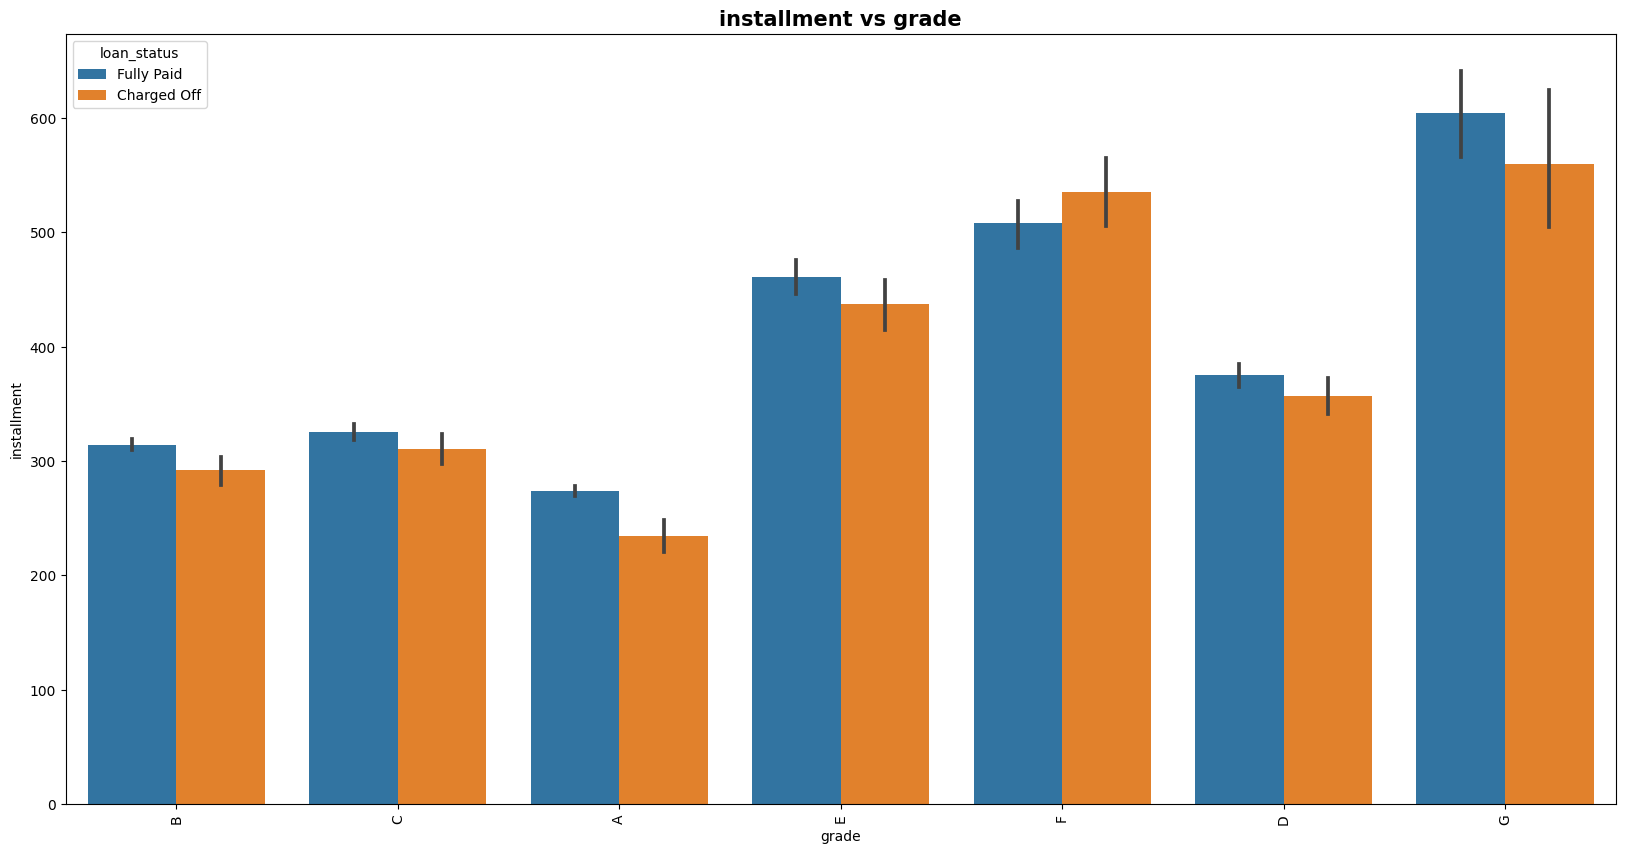

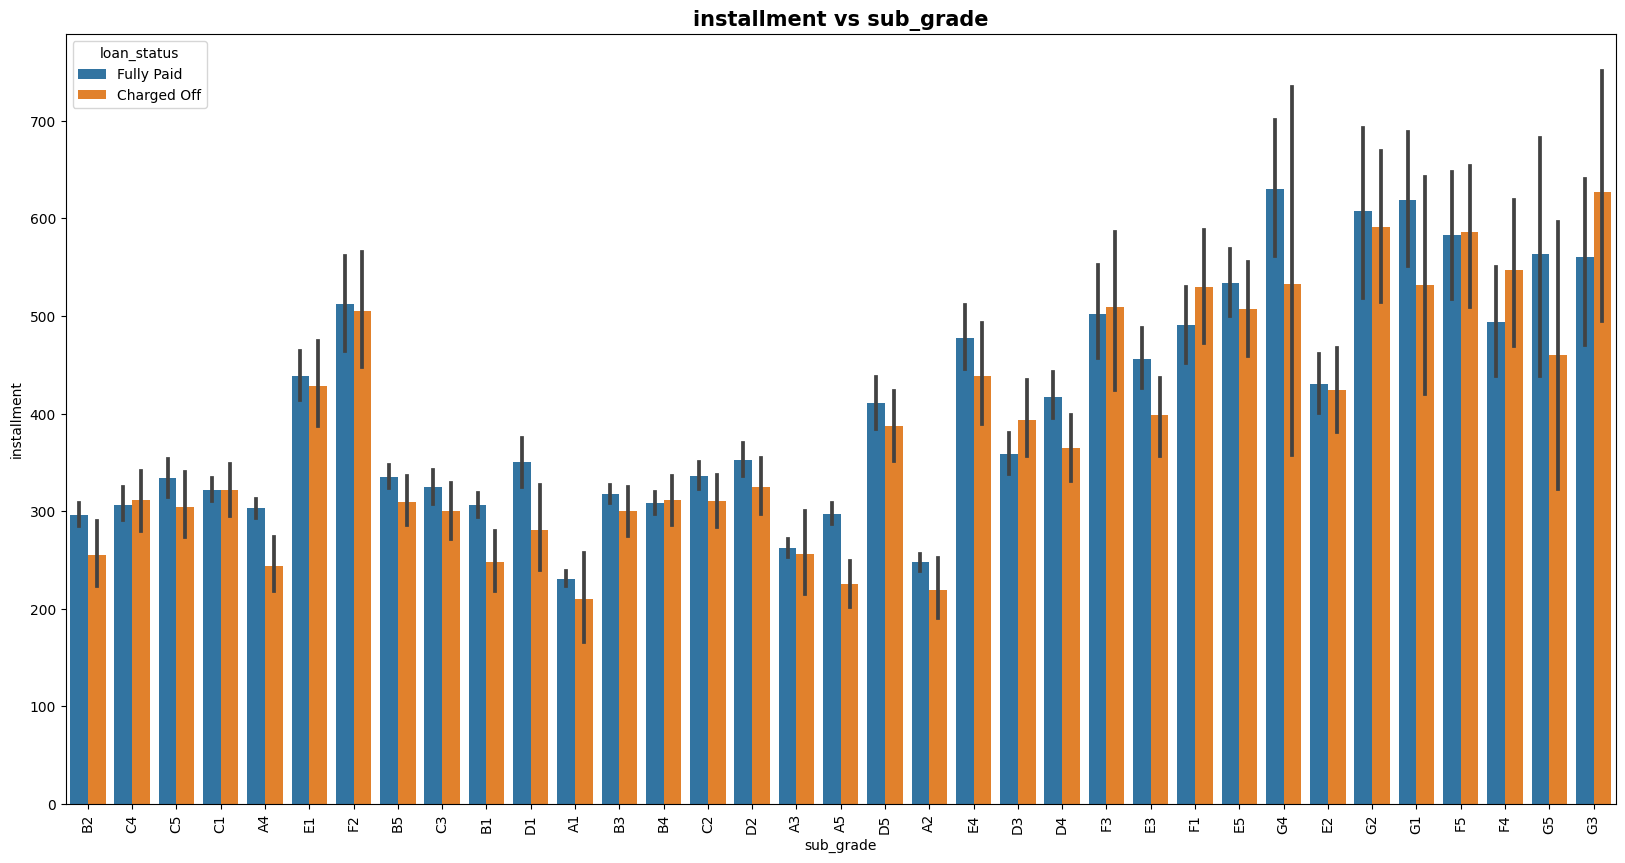

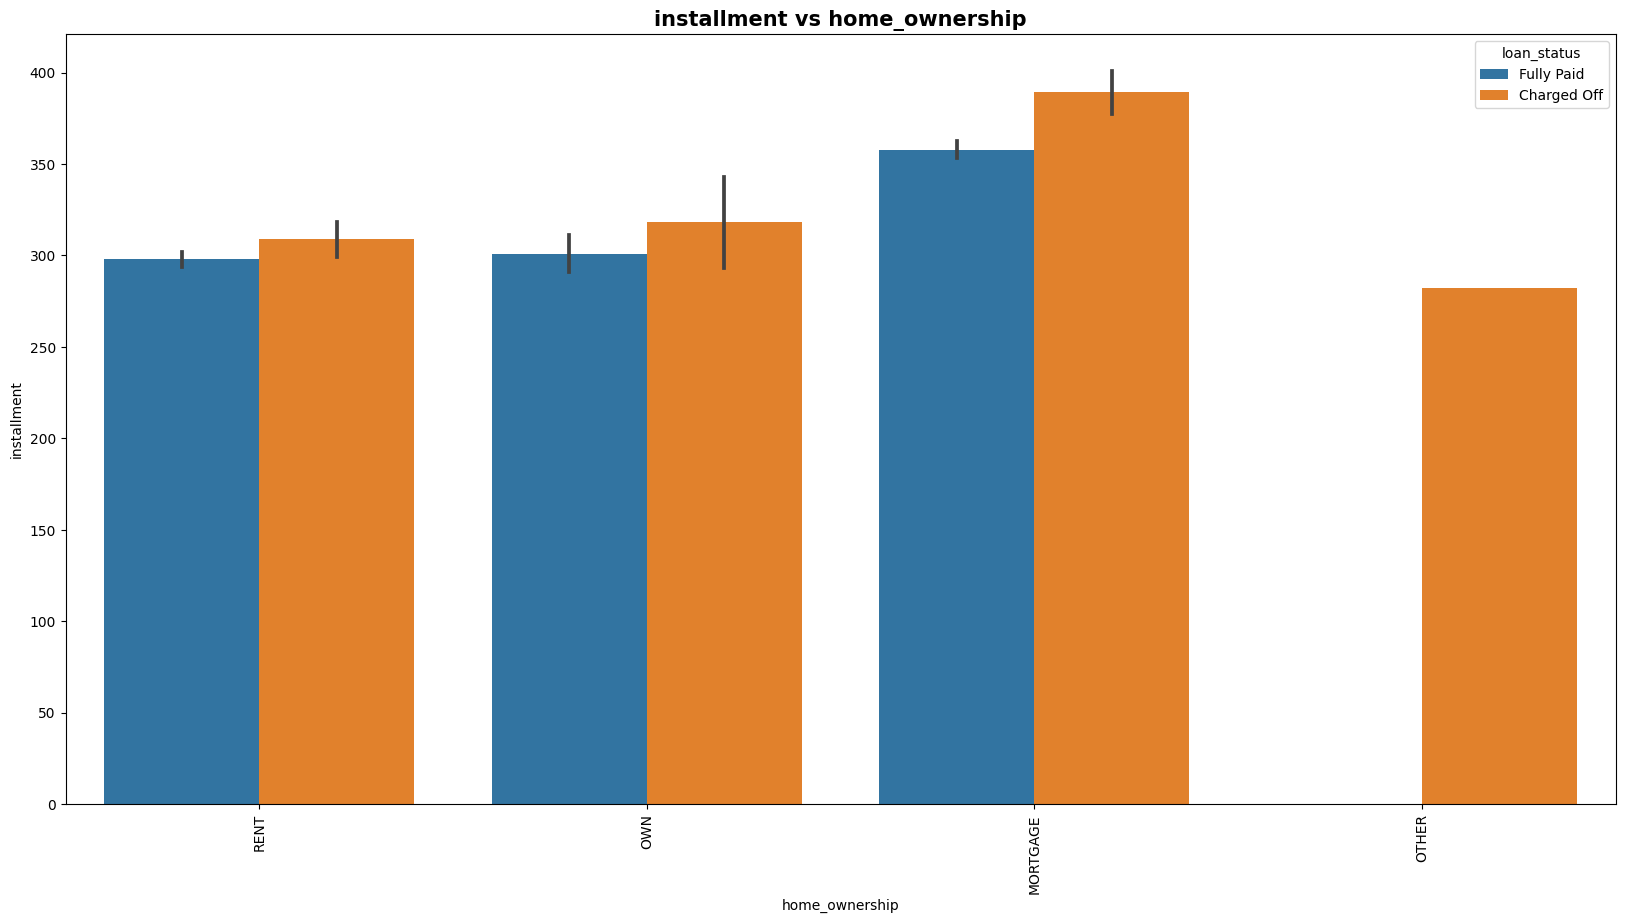

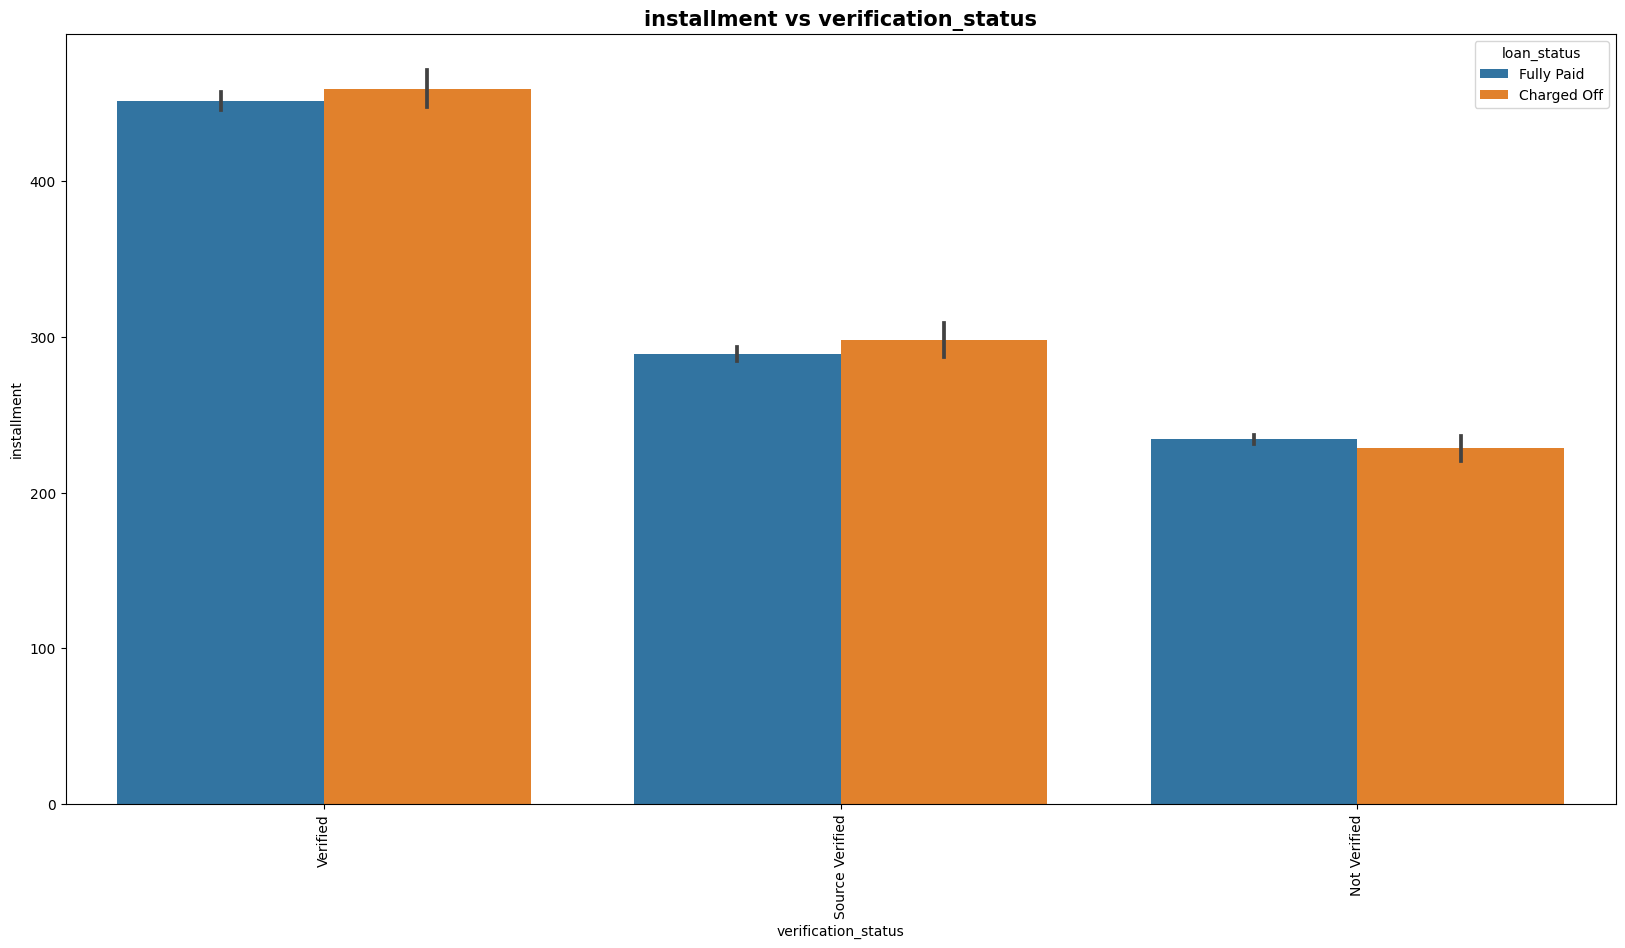

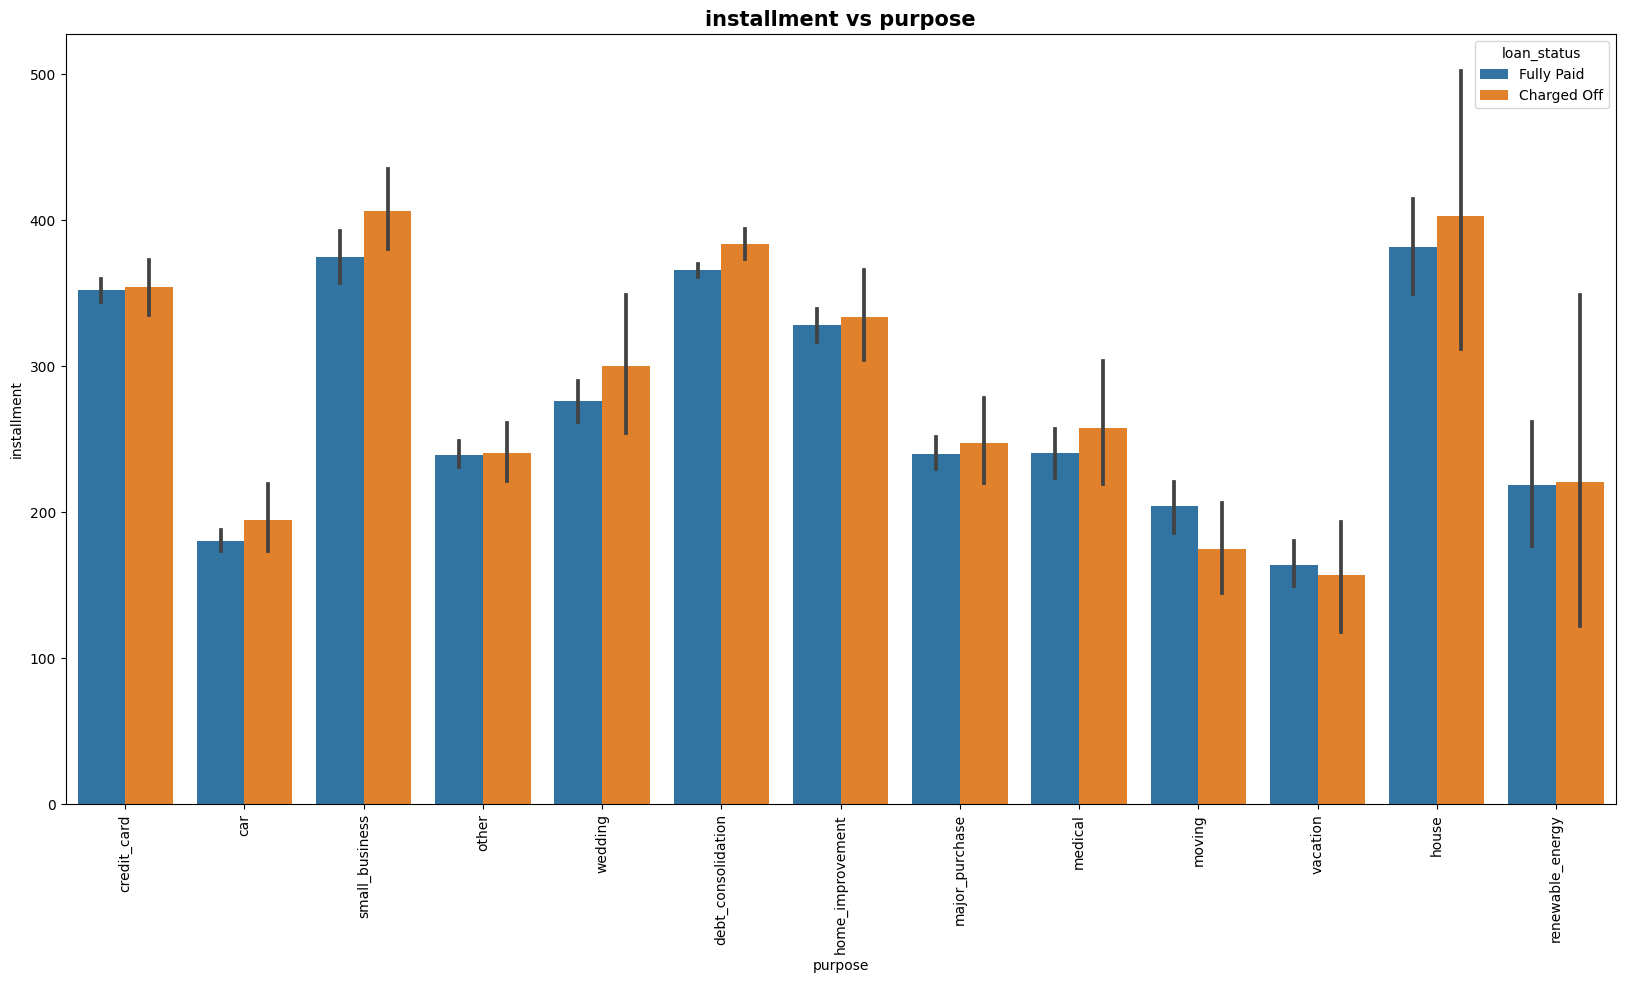

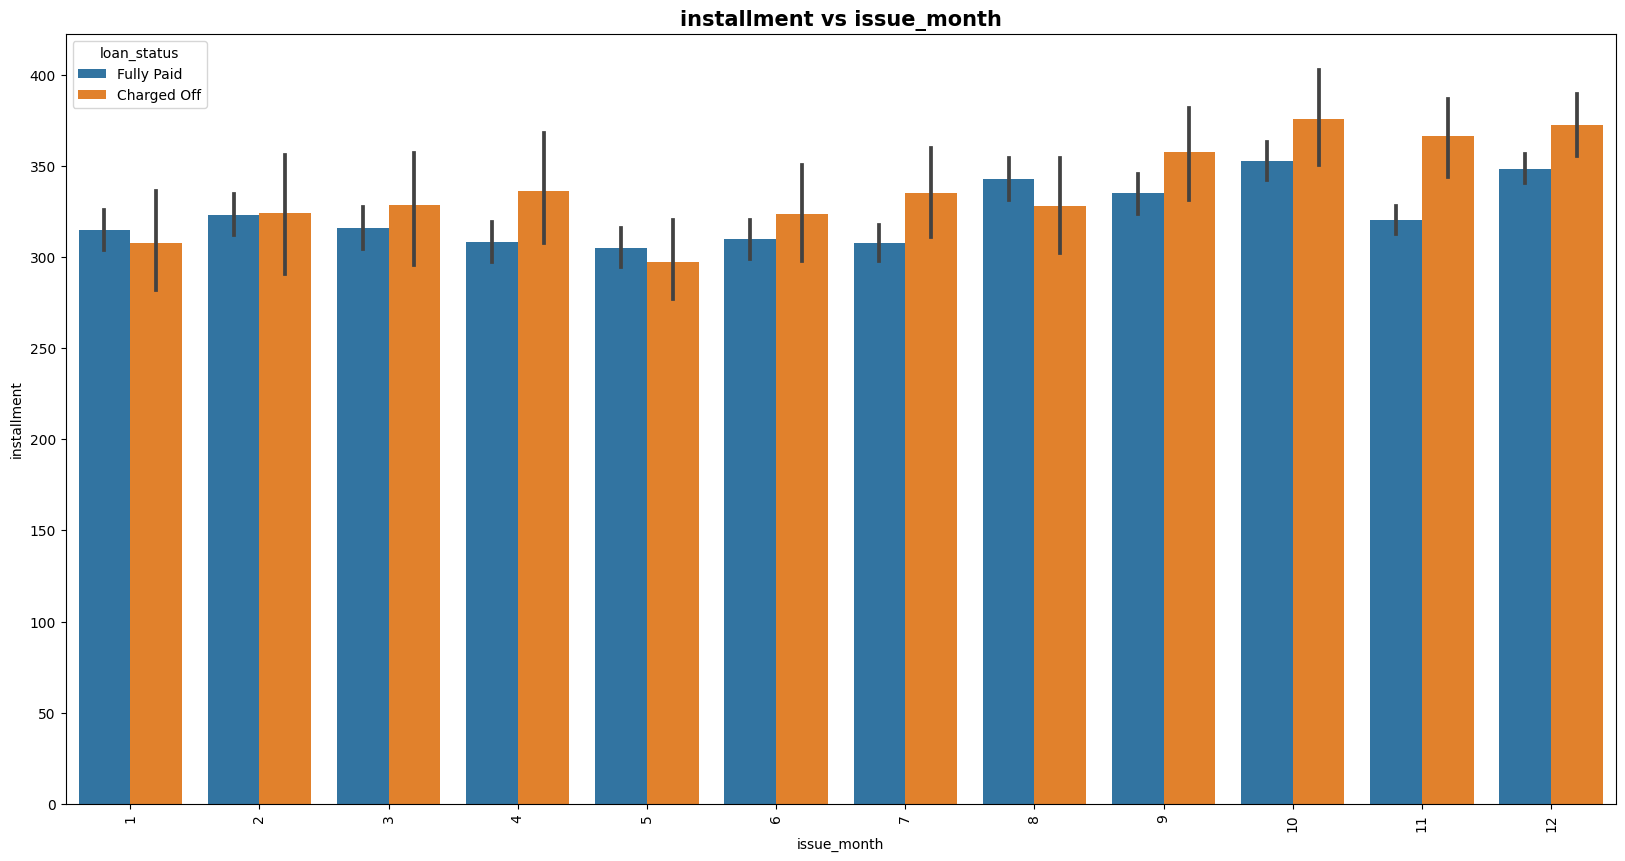

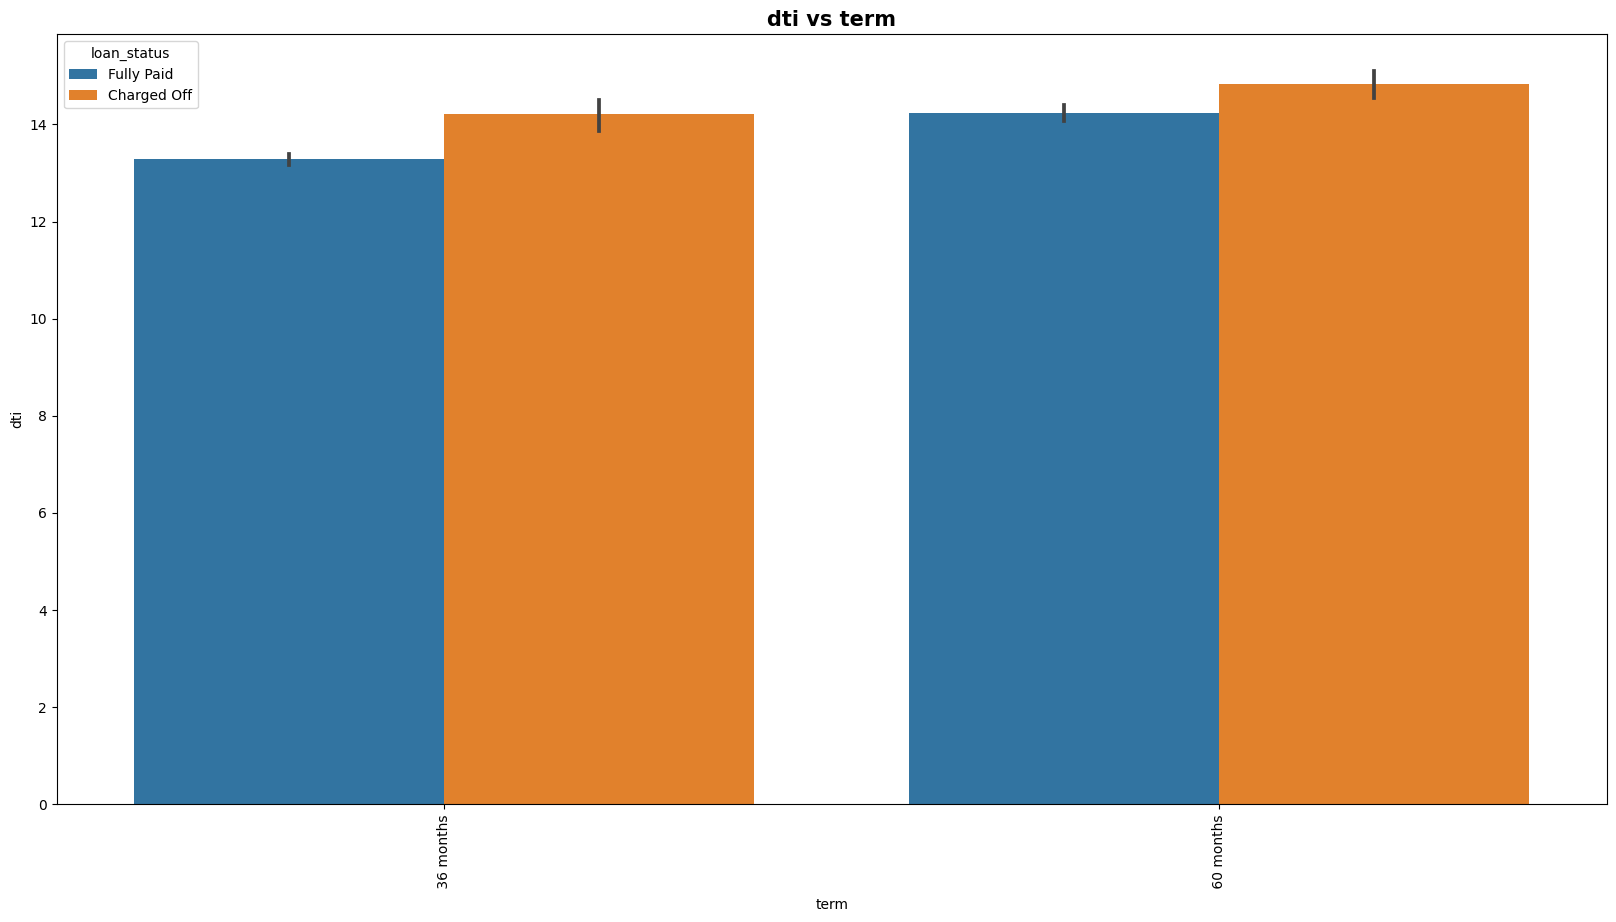

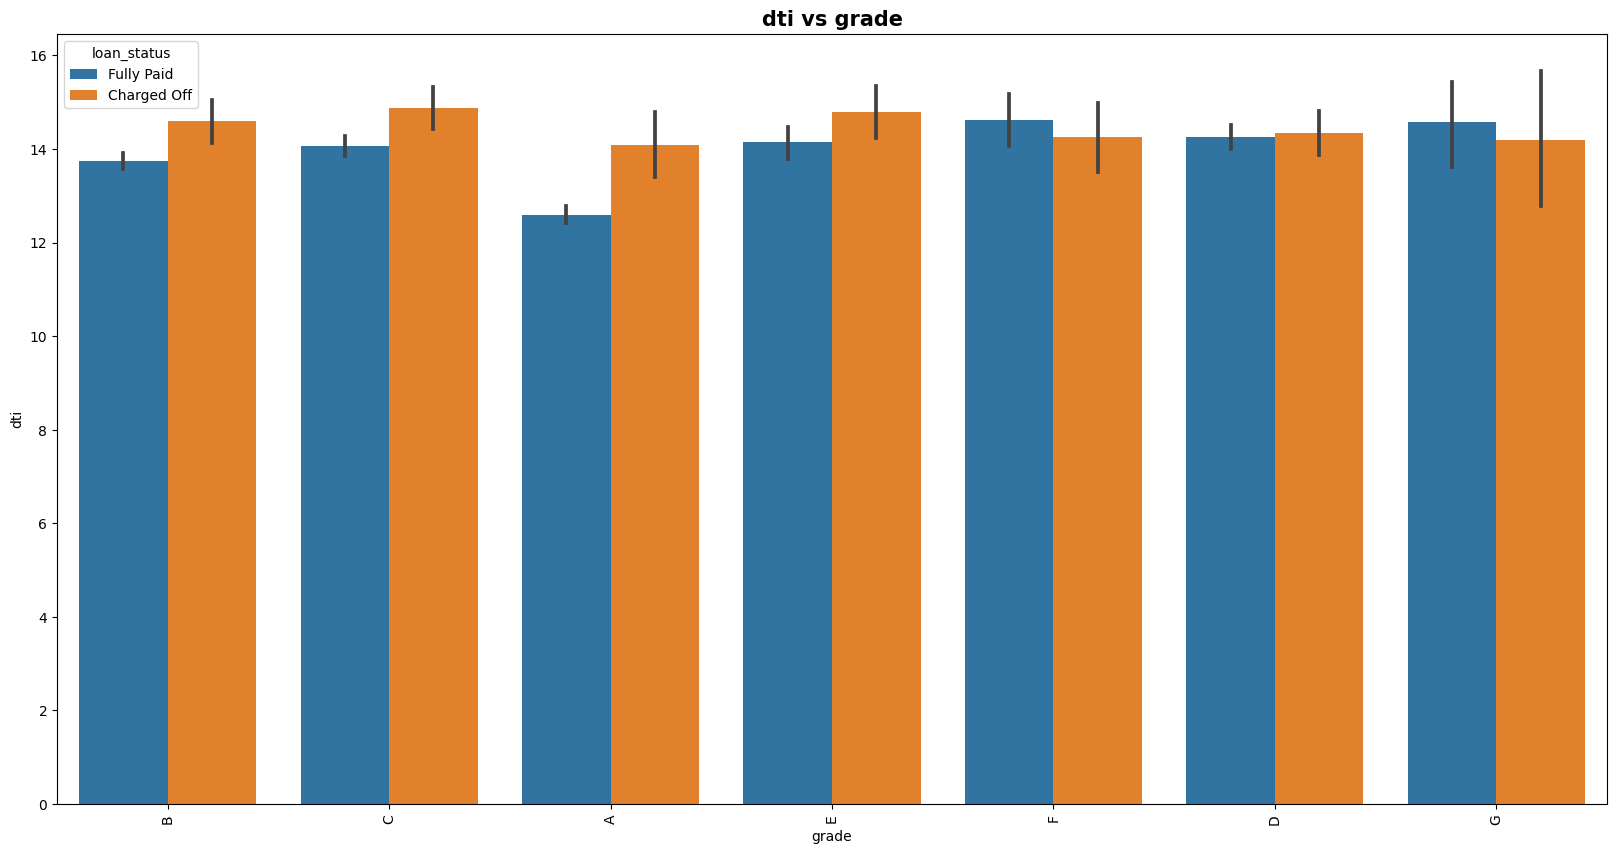

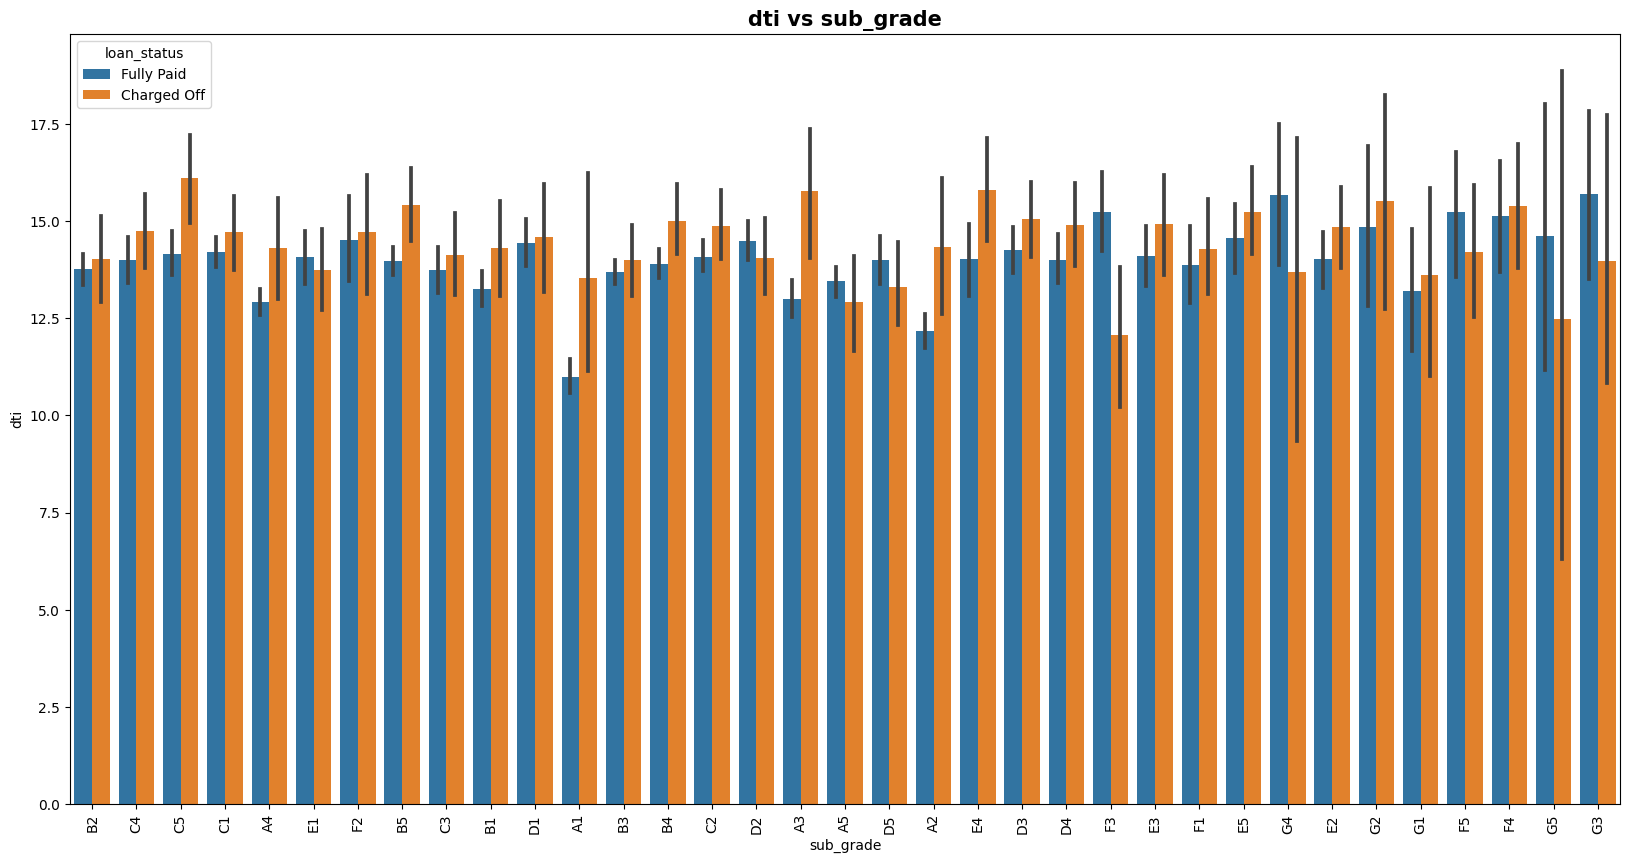

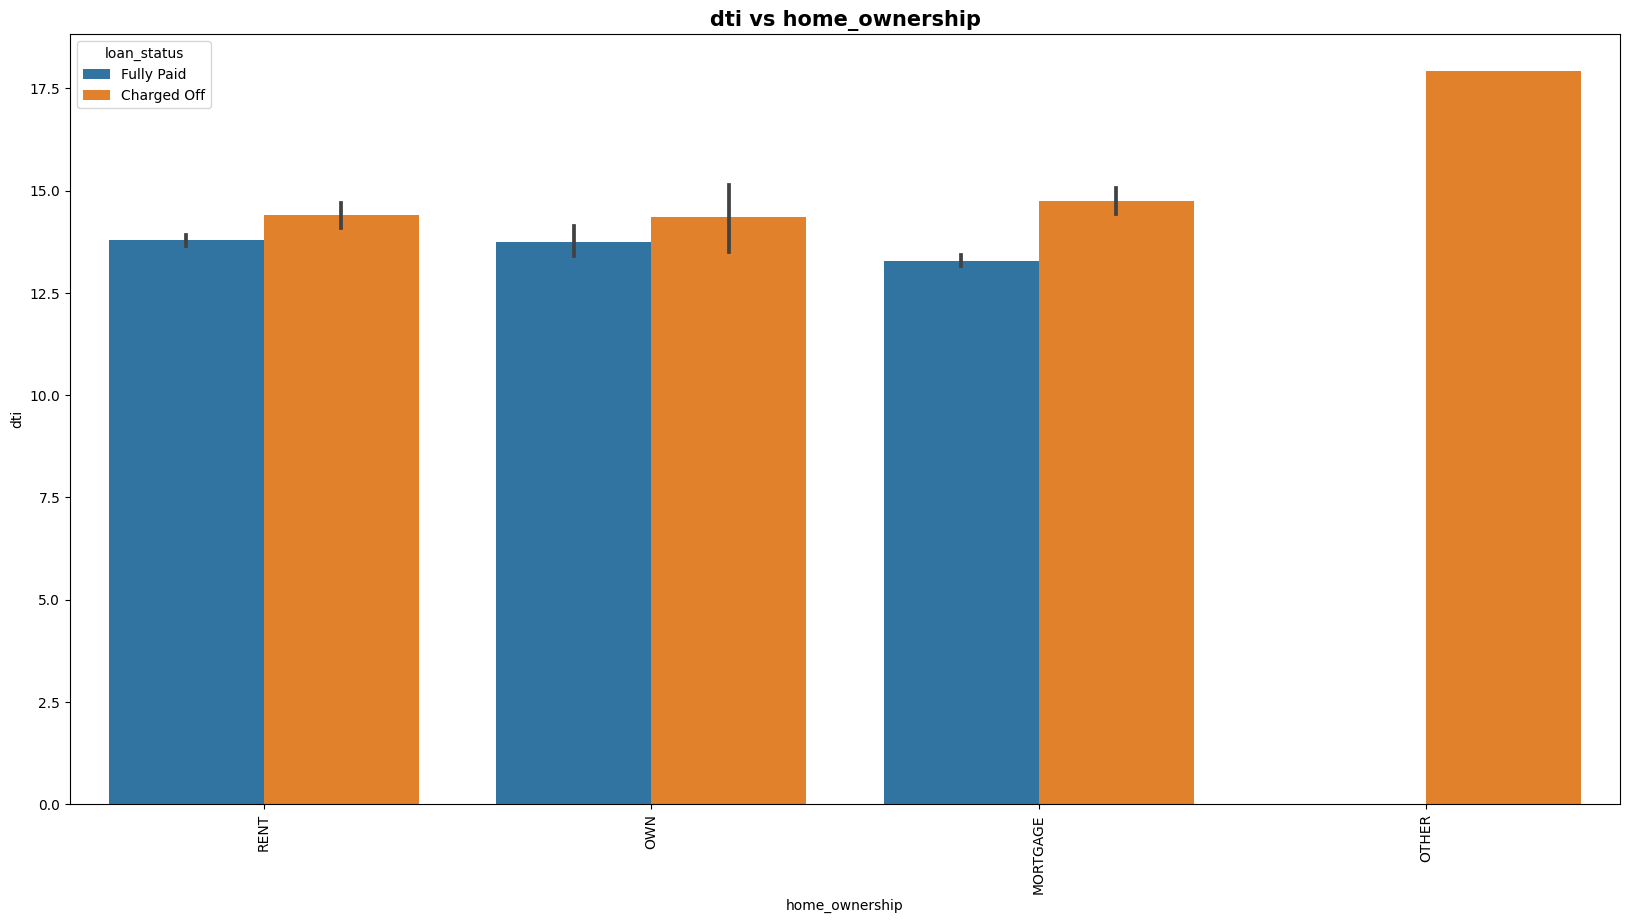

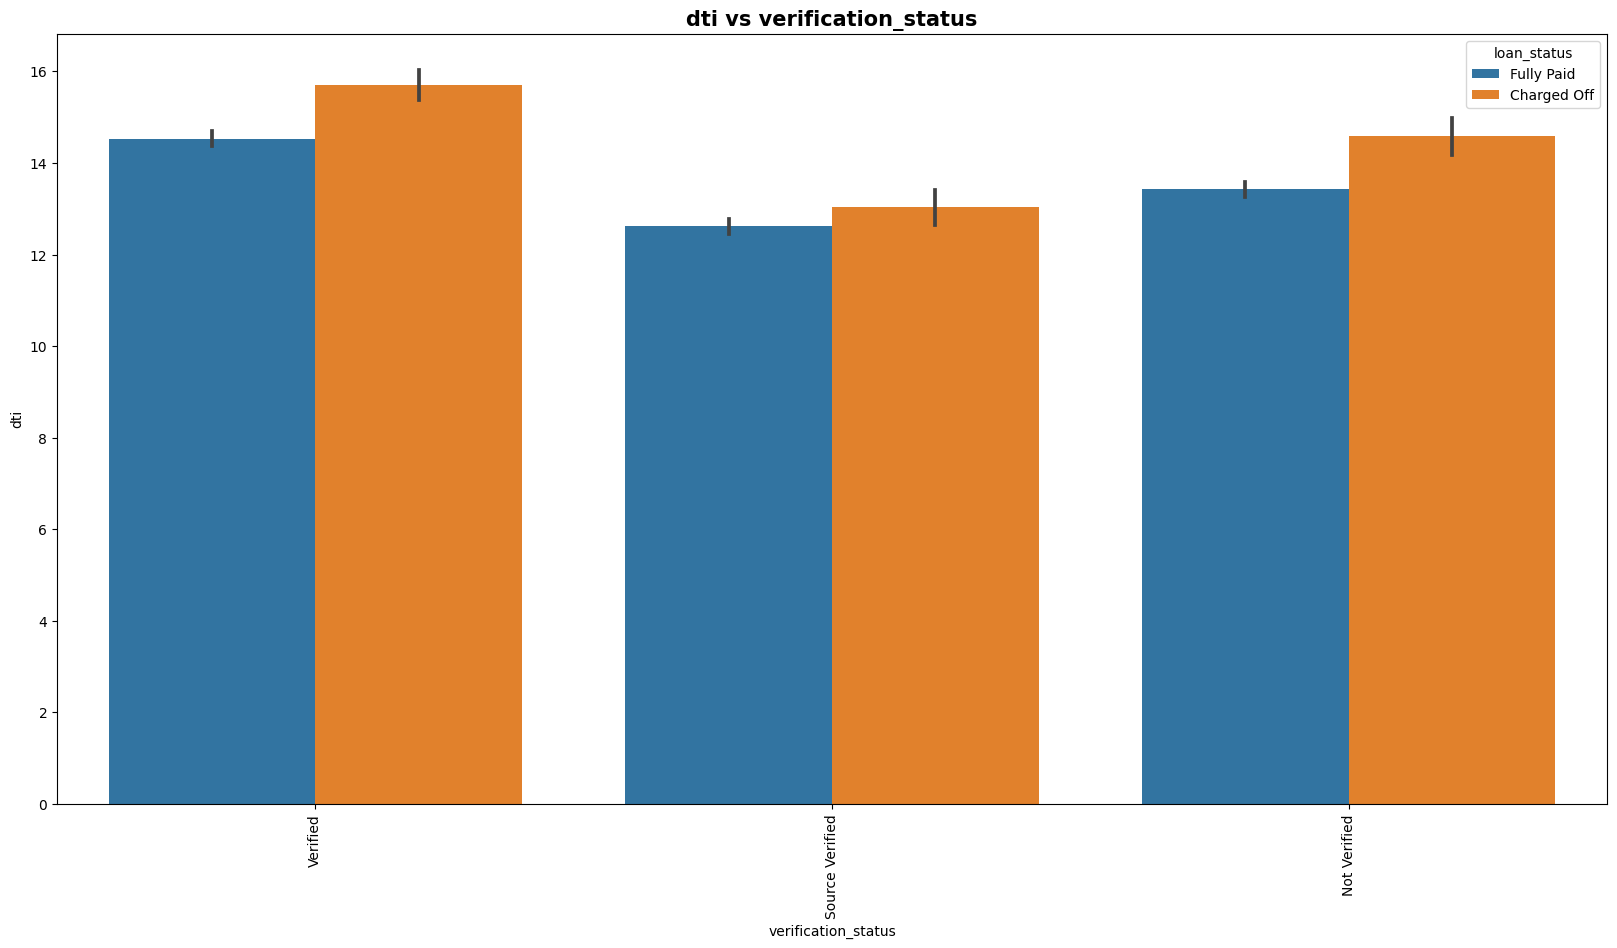

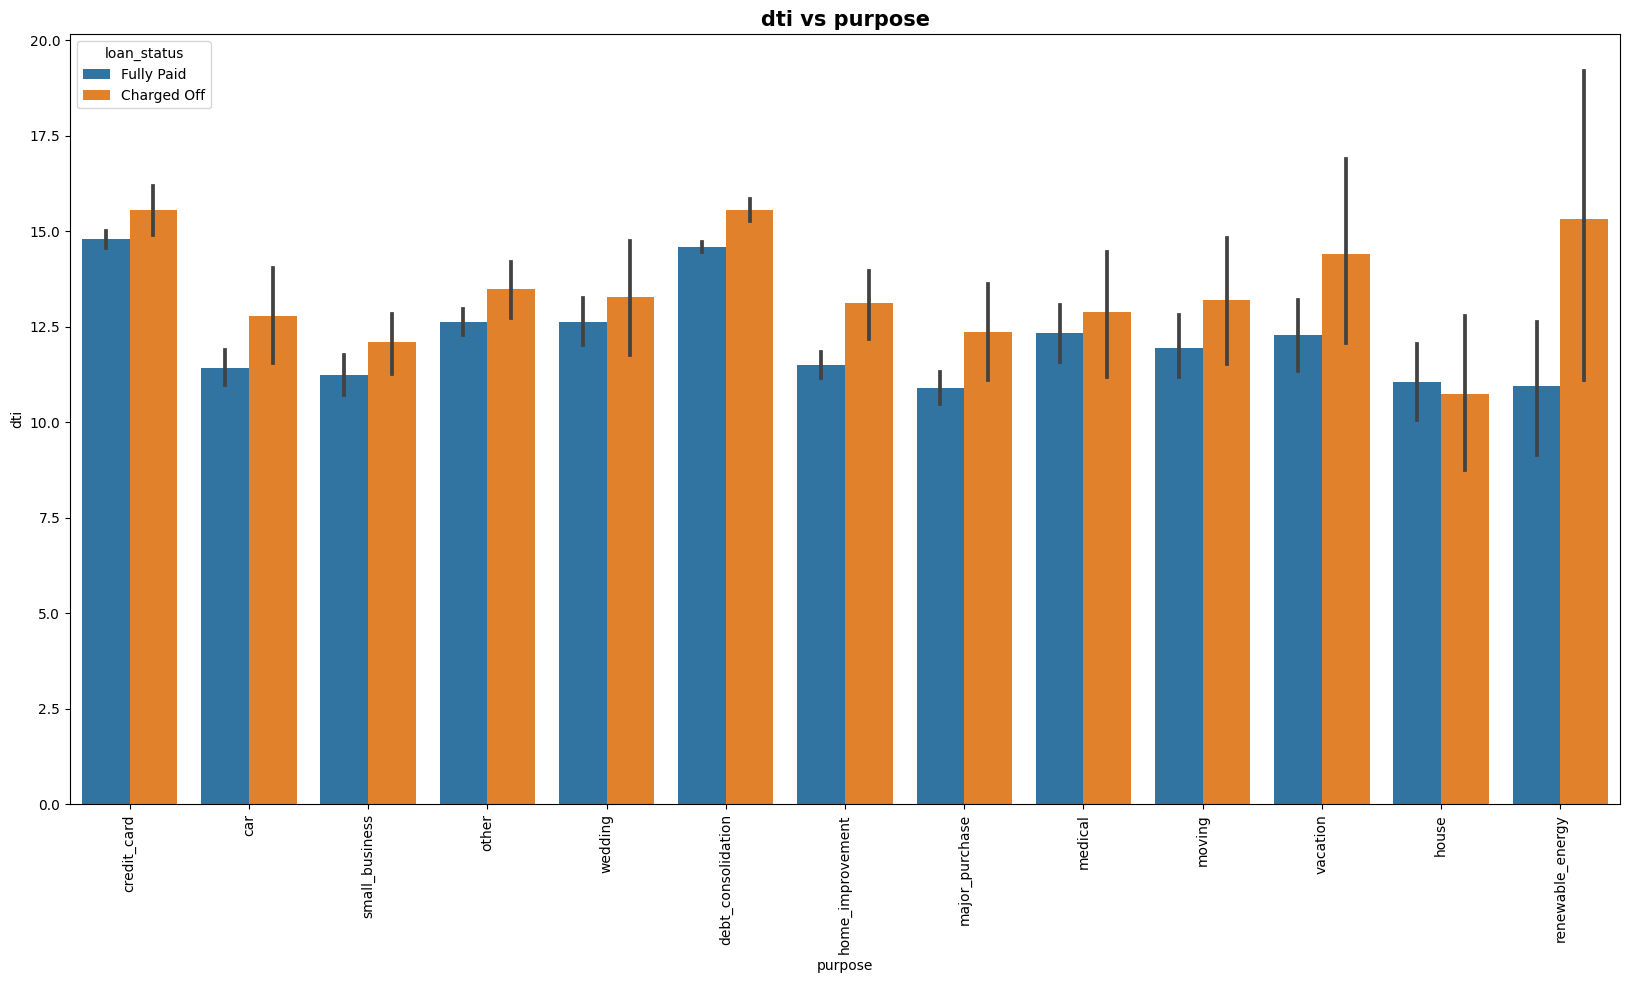

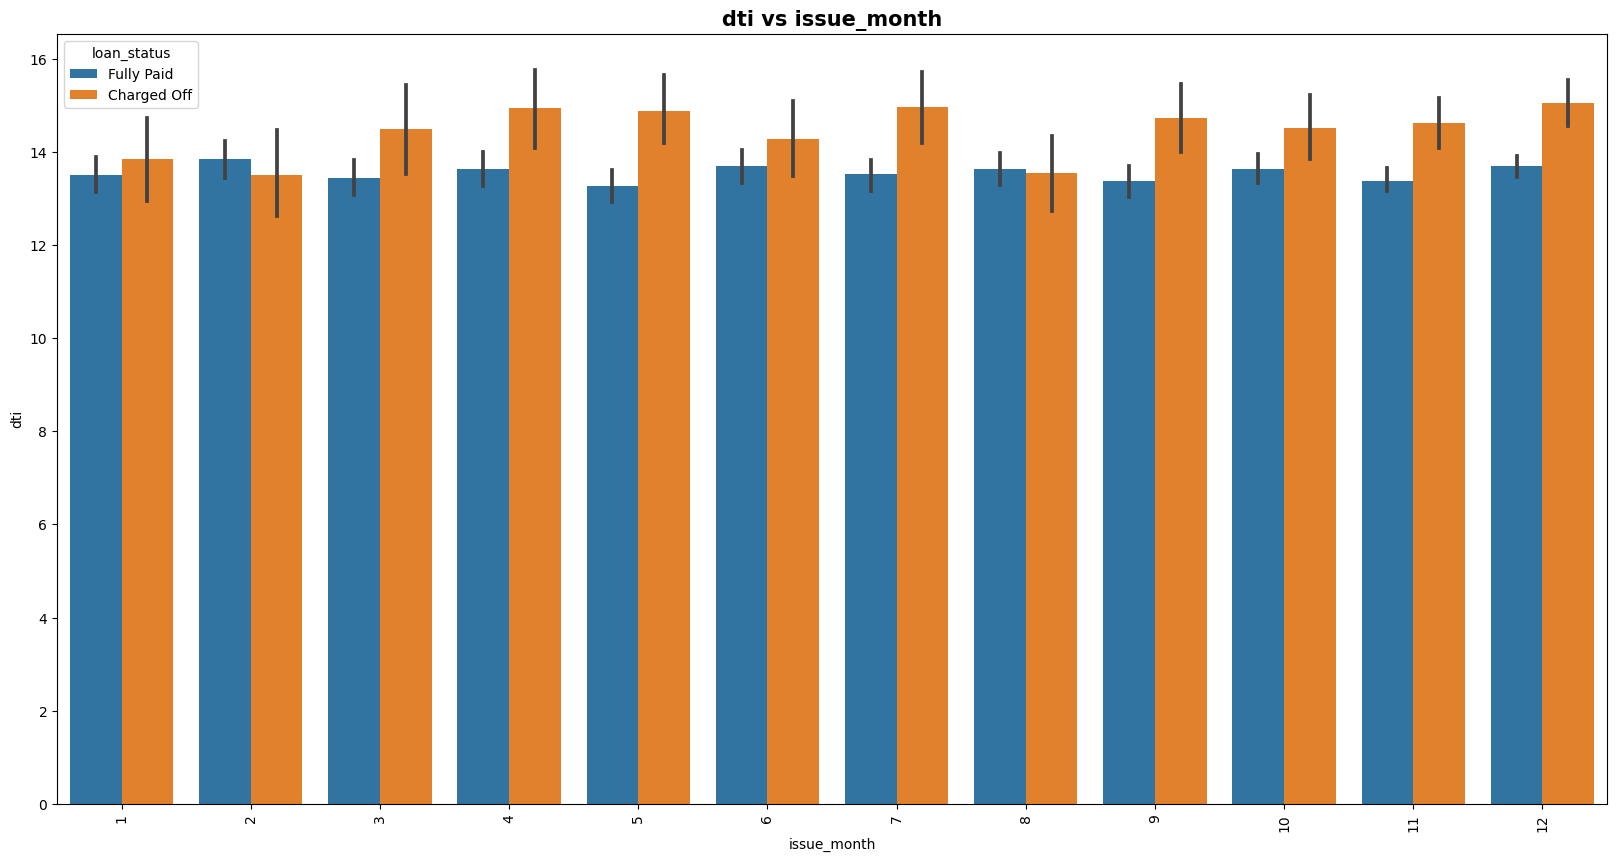

In [ ]:
for field in conti_col_bivariate:
    for category in cat_col_bivariate:
        plt.figure(figsize=(20,10))
        sns.barplot(y=field, x=category, data=lending_df, hue = 'loan_status')
        plt.title(field+' vs '+ category, fontweight='bold', fontsize=15)
        plt.xticks(rotation=90)
        plt.show()
        print('\n')

### Key observations based on the Bivariate Analyis of Categorical vs Numerical column


1. **Loan Amount vs Term**: The loan amount is higher for 60-month tenure loans compared to 36-month tenure loans.

2. **Loan Amount vs Grade**: Loans with grades G, F, and E tend to have higher loan amounts.

3. **Loan Amount vs Purpose**: Loans taken more for small business, debt consolidation and credit card purposes are likely to result in defaults.

4. **Interest Rate vs Term**: Interest rates are higher for 60-month tenure loans compared to 36-month tenure loans.

5. **Interest Rate vs Grade**: Interest rates gradually increase for loans with grades A, B, C, D, E, F, and G. G grade loans have the highest interest rates, while A grade loans have the lowest. The interest rates for grade 'G' loans typically range from 20% to 22%.

6. **Interest Rate vs Home Relationship**: Regardless of the home relationship, higher interest rates are associated with a higher likelihood of default.

7. **Revolving Line Utilization vs Term**: Revolving line utilization, which measures the credit used relative to available revolving credit, is higher for defaulted loans with a 60-month tenure compared to 36-month tenure loans.

8. **Revolving Line Utilization vs Grade**: Revolving line utilization rate is lowest for grade A loans and highest for grade G loans.

9. **Installment vs Term**: When the installment amount is higher for a 60-month term, there is a higher chance of default.

10. **Installment vs Home Relationship**: Loans with the "others" home relationship tend to have increased monthly installment amounts.

11. **Installment vs Purpose**: Loans for small business purposes tend to have higher monthly installments, particularly for defaults.

**Analysis of Numerical vs Numerical**

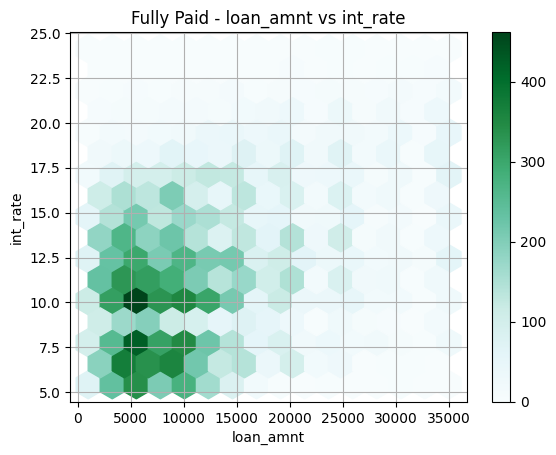

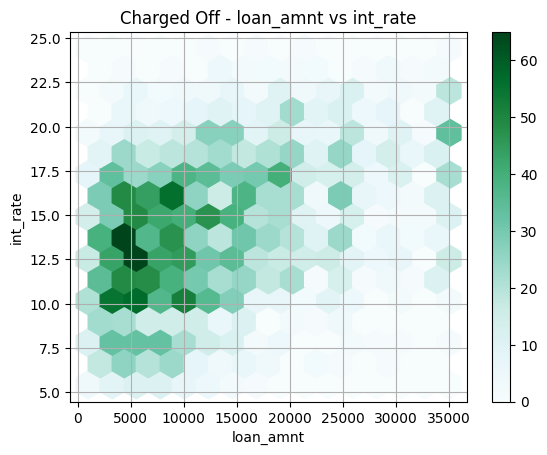

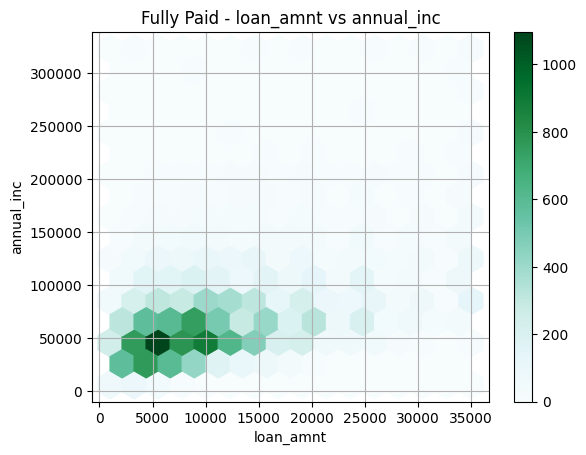

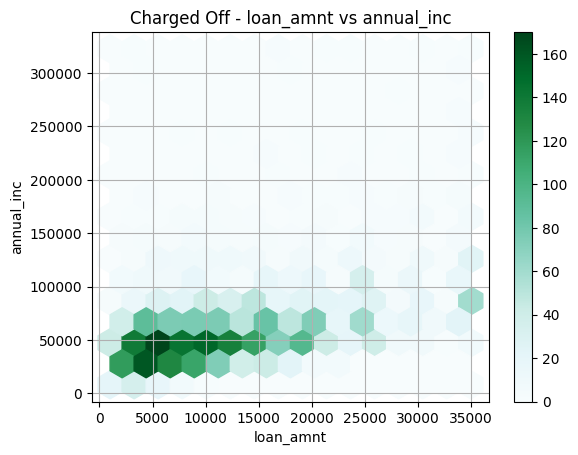

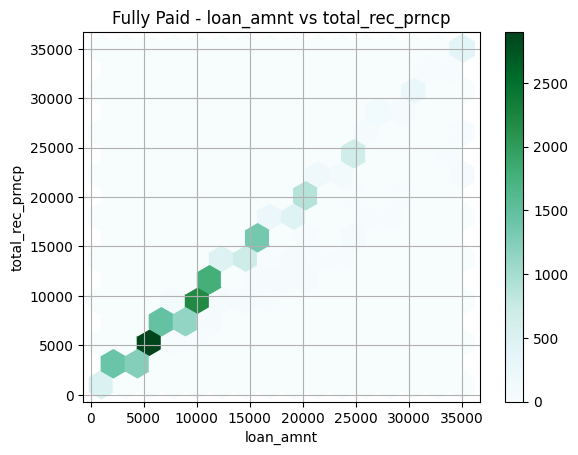

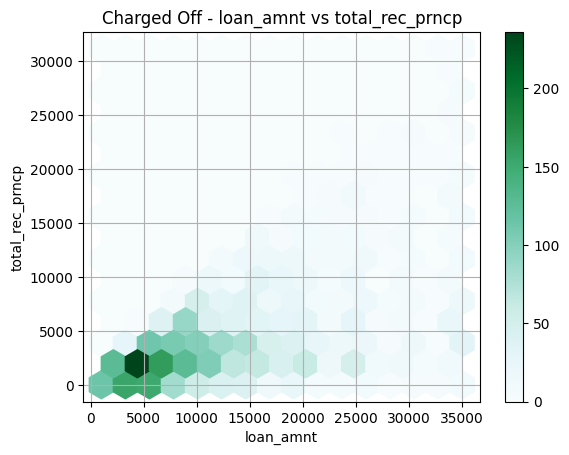

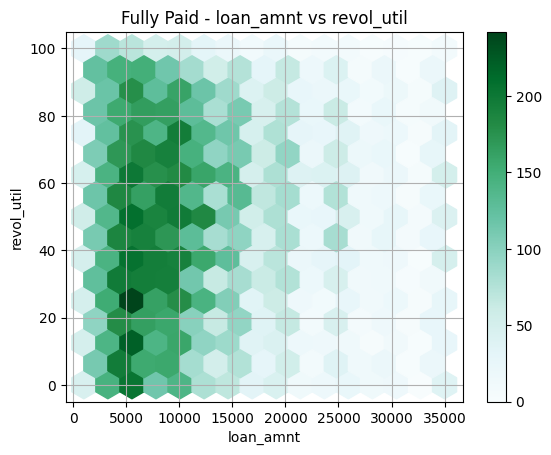

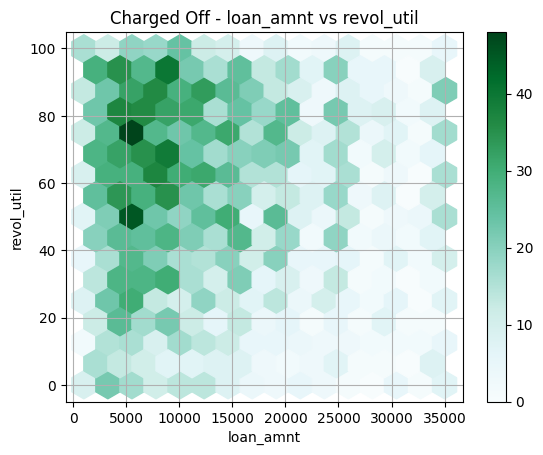

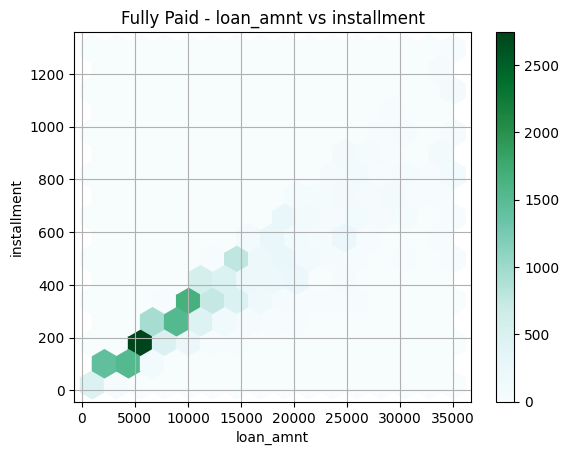

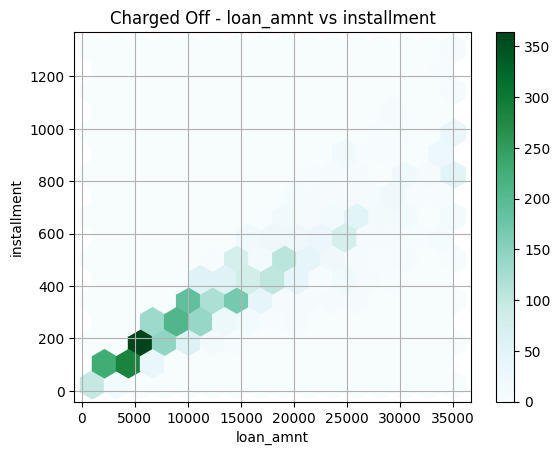

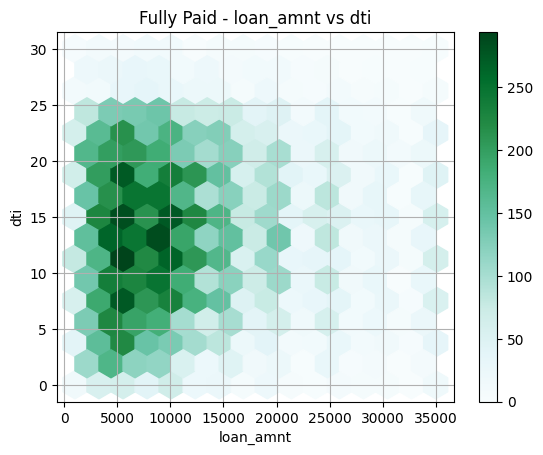

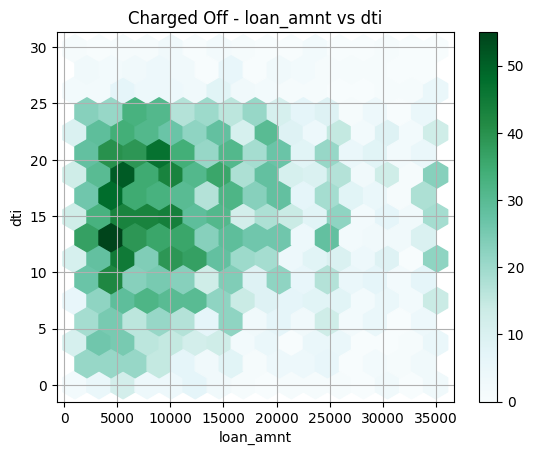

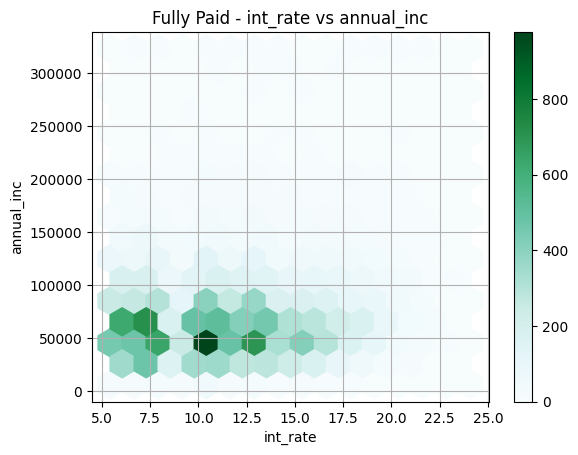

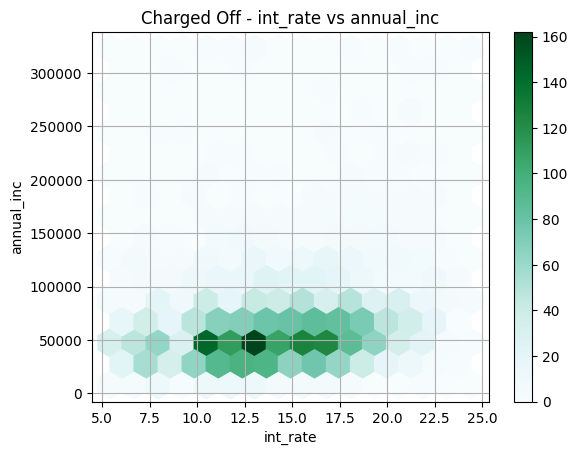

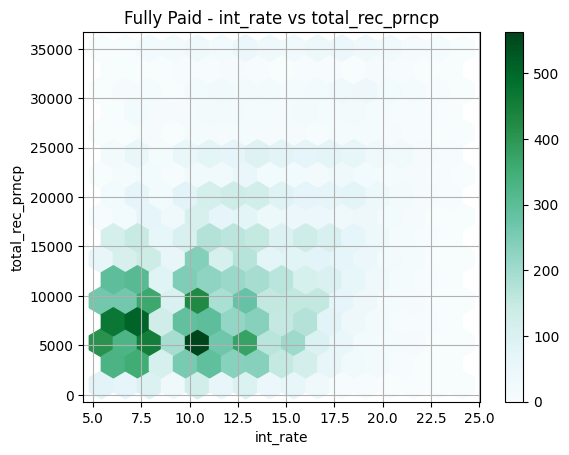

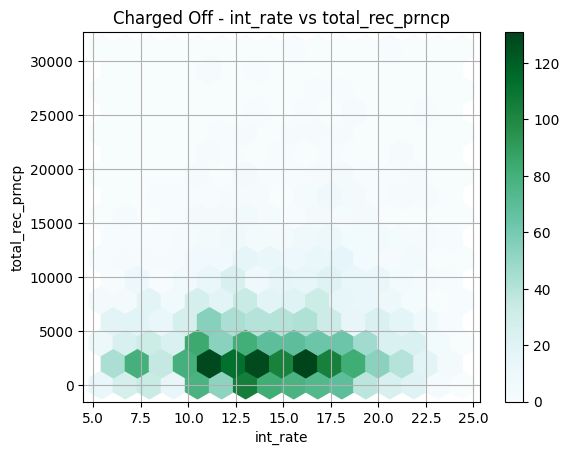

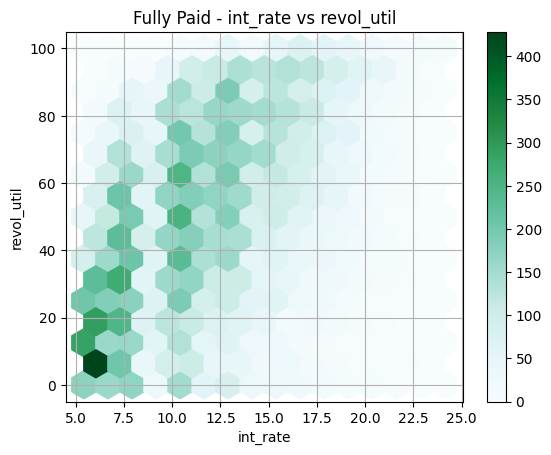

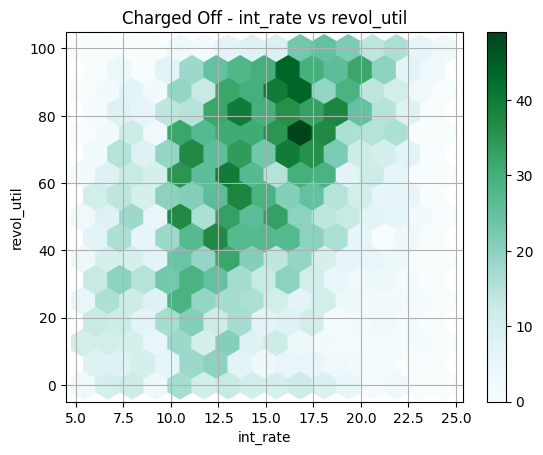

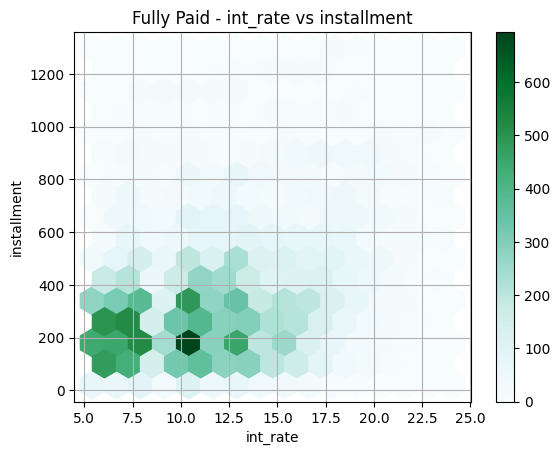

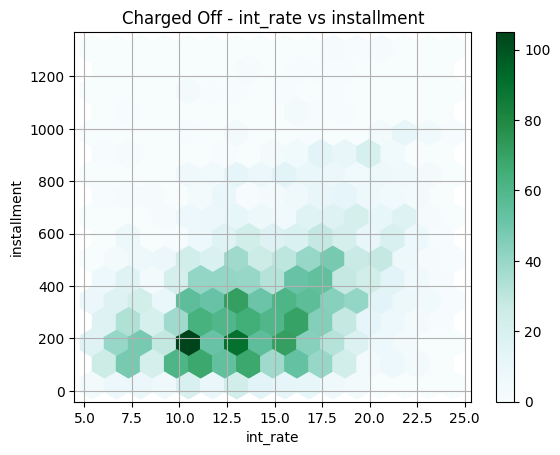

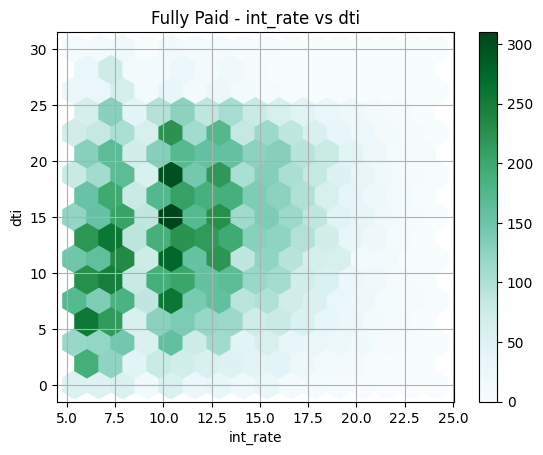

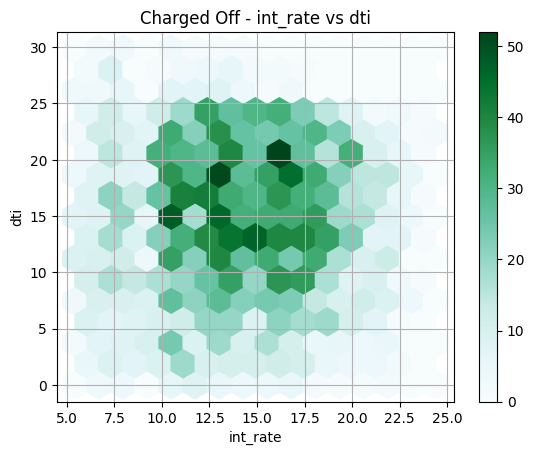

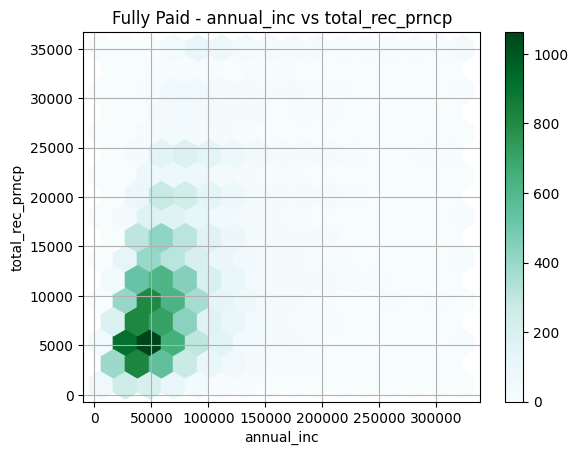

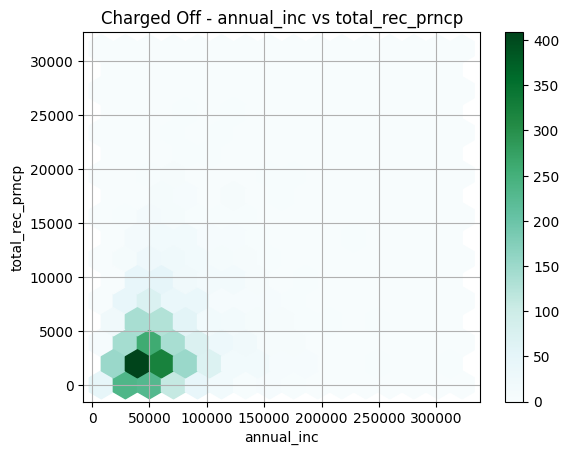

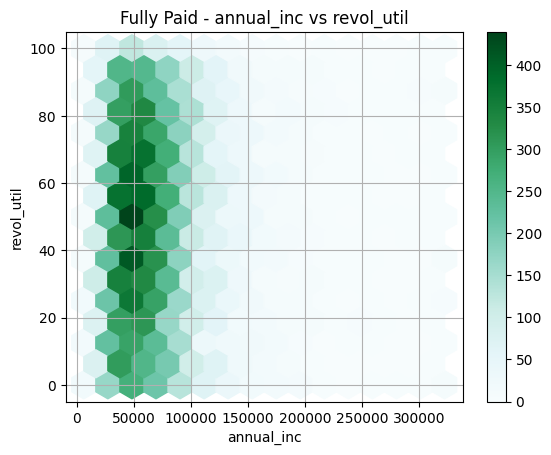

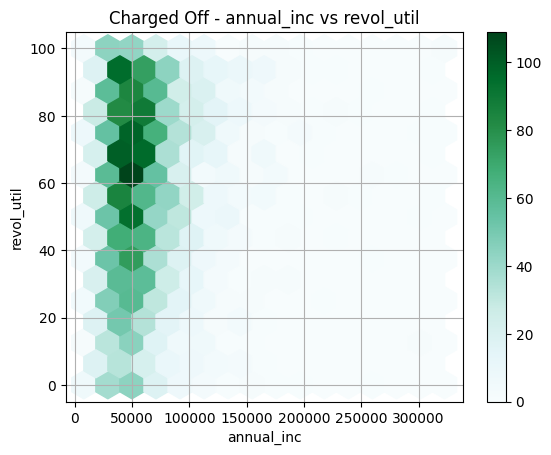

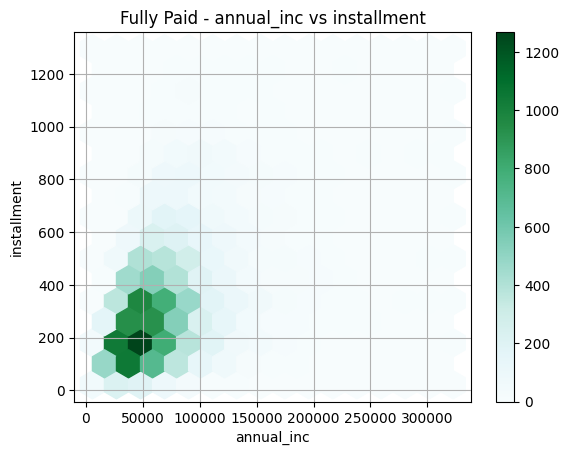

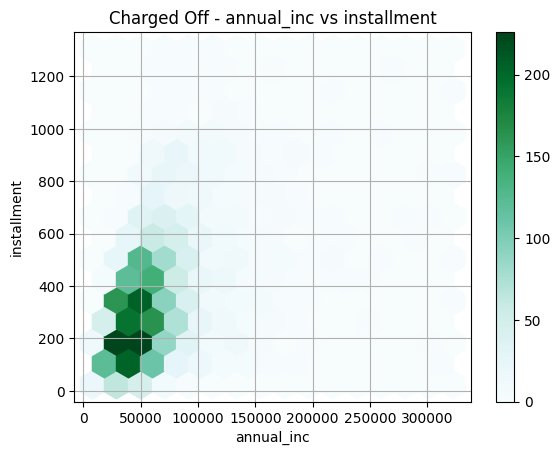

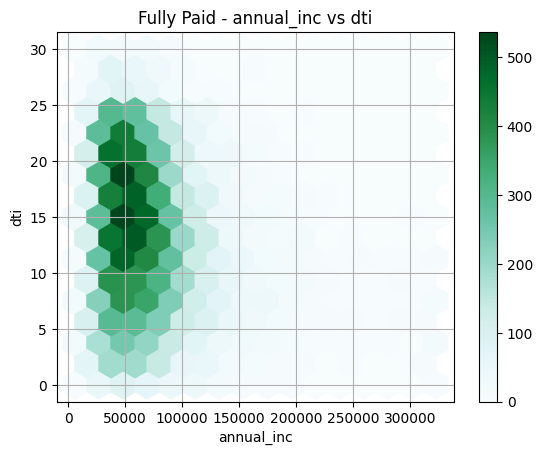

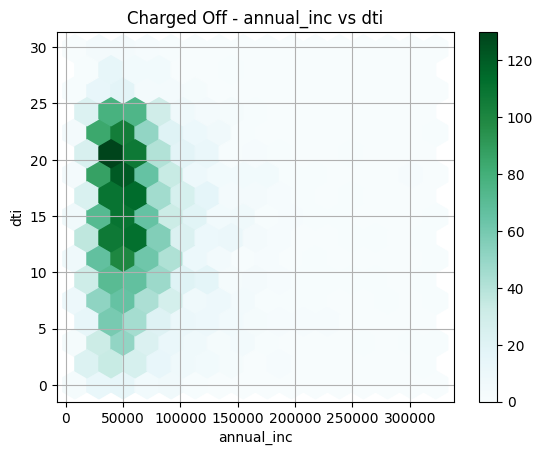

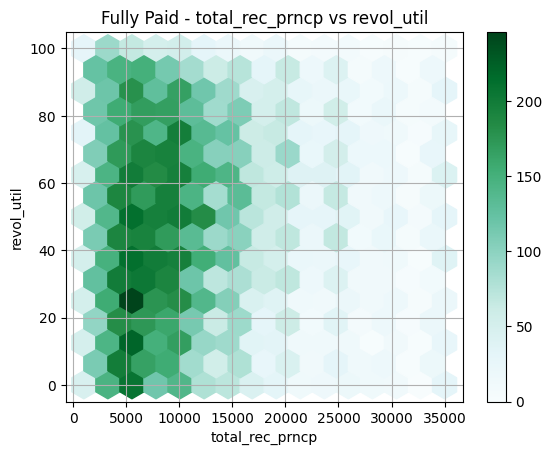

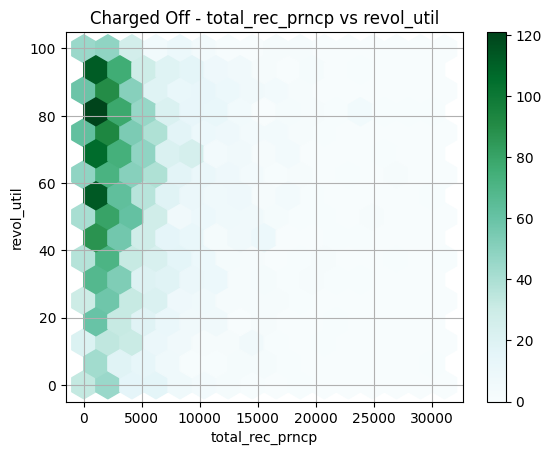

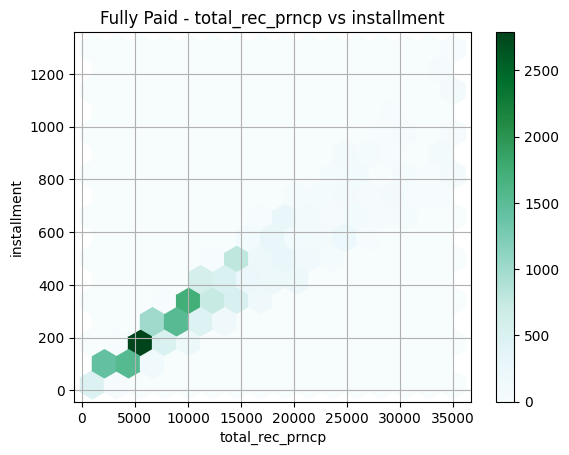

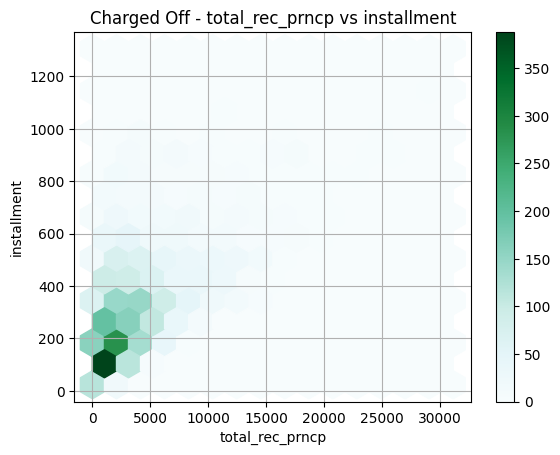

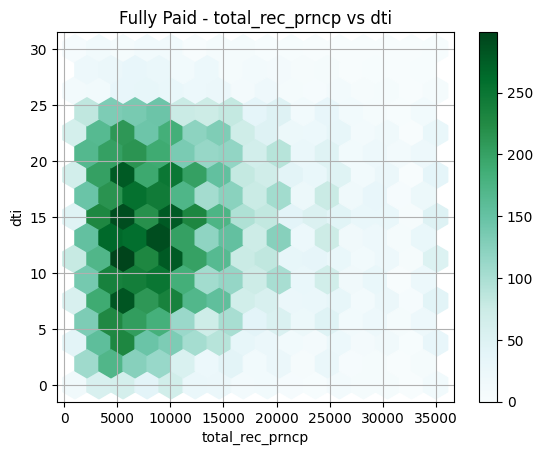

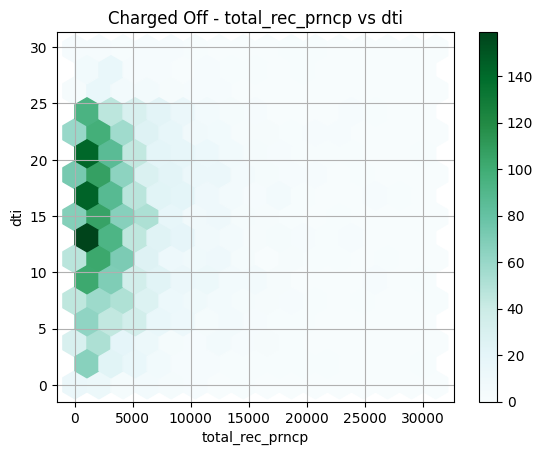

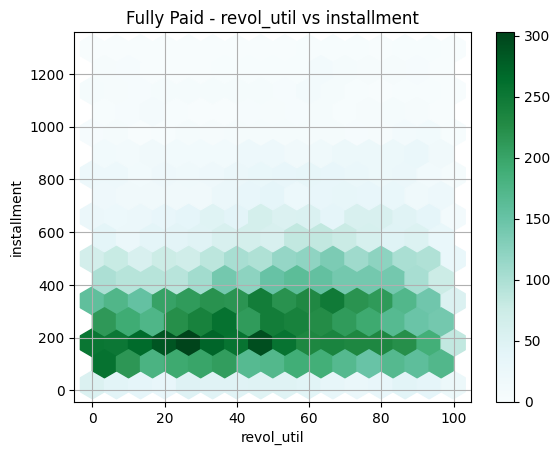

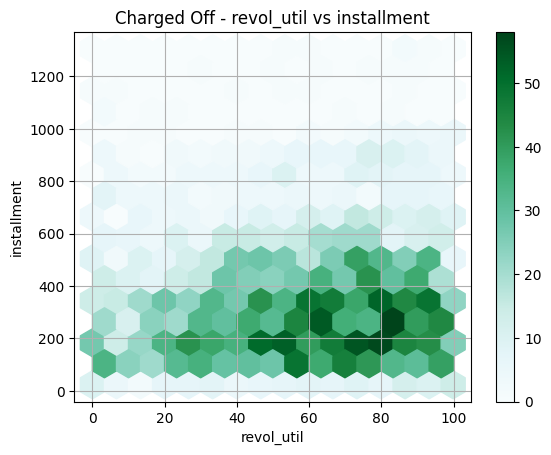

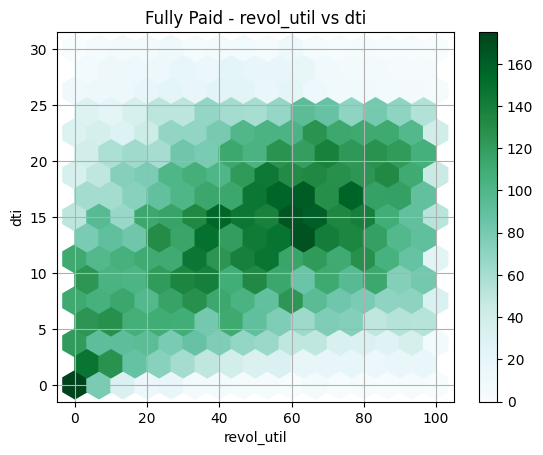

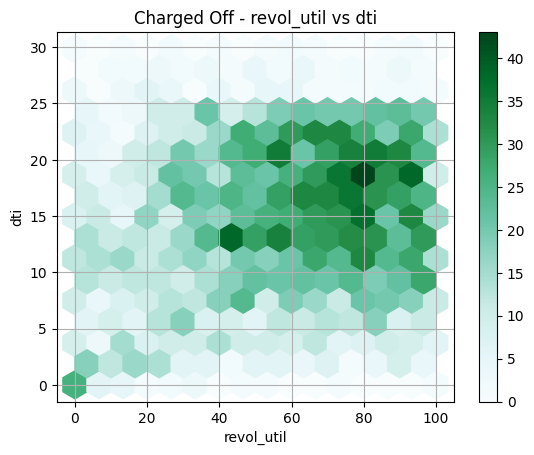

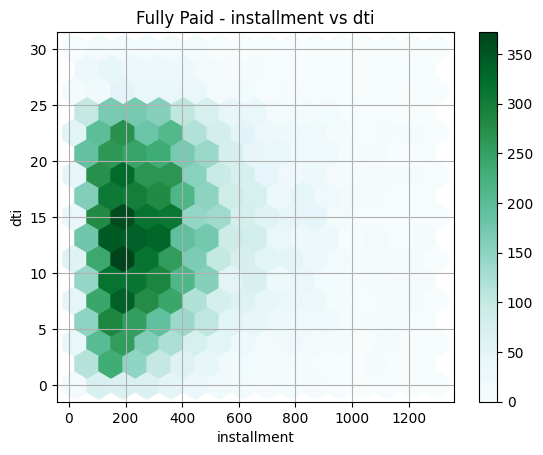

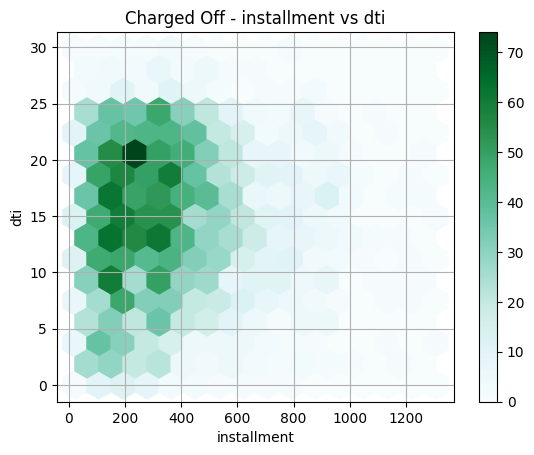

In [ ]:
for i, col1 in enumerate(conti_col_bivariate):
    for j, col2 in enumerate(conti_col_bivariate):
        if col1 != col2 and j > i:
            fullypaid_data.plot.hexbin(x= col1, y=col2, gridsize=15)
            plt.title('Fully Paid - ' + col1 + ' vs '+ col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid(True)
            plt.show()
            print('\n')
            chargedoff_data.plot.hexbin(x=col1, y=col2, gridsize=15)
            plt.title('Charged Off - '+ col1 + ' vs ' + col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid(True)
            plt.show()
            print('\n')

### Key observations based on the Bivariate Analysis of Numerical vs Numerical column

1. **Loan Amount vs Interest Rate**: An increase in the loan amount is associated with an increase in the interest rate, leading to a higher percentage of defaulters.

2. **Loan Amount vs Revolving Line Utilization**: Customers with a higher revolving line utilization rate (60-80%) are more likely to become defaulters compared to those with a lower rate (10%-30%).

3. **Interest Rate vs Annual Income**: Defaulters tend to pay approximately 2% more in interest due to their lower annual income.

4. **Interest Rate vs Revolving Line Utilization**: Defaulters experience higher interest rates because of their elevated revolving line utilization rate.

5. **Interest Rate vs Debt-to-Income Ratio (DTI)**: Defaulters face higher interest rates, primarily due to their higher DTI.

6. **Revolving Line Utilization vs Total Received Principal**: Defaulters typically have a higher revolving line utilization rate, which is associated with lower total received principal amounts.








#### Analysis of Segmented Numerical data vs Charged Off/Target

In [ ]:
## Segregating the data into bins for numerical column
lending_df['int_rate_grp'] = pd.cut(lending_df['int_rate'], bins=5)
lending_df['revol_util_grp'] = pd.cut(lending_df['revol_util'], bins=5)
lending_df['annual_inc_grp'] = pd.cut(lending_df['annual_inc'], bins=5)
lending_df['loan_amnt_grp'] = pd.cut(lending_df['loan_amnt'], bins=5)
lending_df['dti_grp'] = pd.cut(lending_df['dti'], bins=5)

# putting into new list
conti_grp_cols =['int_rate_grp', 'revol_util_grp','annual_inc_grp','loan_amnt_grp','dti_grp']
lending_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
5     A        A4    3 years           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65            0   
1 2011-12-01  Charged Off             car         GA   1.00            0   
2 2011-12-01   Fully Paid  small_business         IL   8.72            0   
3 2011-12-01   Fully Paid           other         CA  20.00            0   
5 2011-12-01   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0           Jan-85               1         3        0        83.7          9   
1           Apr-99               5         3        0         9.4          4   
2           Nov-01               2         2        0        98.5         10   
3           Feb-96               1        10        0        21.0         37   
5           Nov-04               3         9        0        28.3         12   

    total_pymnt  total_pymnt_inv  total_rec_prncp  pub_rec_bankruptcies  \
0   5863.155187          5833.84          5000.00                   0.0   
1   1008.710000          1008.71           456.46                   0.0   
2   3005.666844          3005.67          2400.00                   0.0   
3  12231.890000         12231.89         10000.00                   0.0   
5   5632.210000          5632.21          5000.00                   0.0   

   issue_month  issue_year  target      int_rate_grp    revol_util_grp  \
0           12        2011       0   (9.216, 13.012]     (79.92, 99.9]   
1           12        2011       1  (13.012, 16.808]  (-0.0999, 19.98]   
2           12        2011       0  (13.012, 16.808]     (79.92, 99.9]   
3           12        2011       0  (13.012, 16.808]    (19.98, 39.96]   
5           12        2011       0    (5.401, 9.216]    (19.98, 39.96]   

       annual_inc_grp      loan_amnt_grp           dti_grp  
0  (5683.44, 69312.0]    (966.0, 7800.0]   (23.992, 29.99]  
1  (5683.44, 69312.0]    (966.0, 7800.0]    (-0.03, 5.998]  
2  (5683.44, 69312.0]    (966.0, 7800.0]   (5.998, 11.996]  
3  (5683.44, 69312.0]  (7800.0, 14600.0]  (17.994, 23.992]  
5  (5683.44, 69312.0]    (966.0, 7800.0]   (5.998, 11.996]

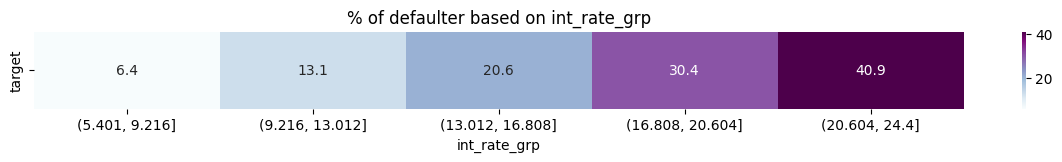

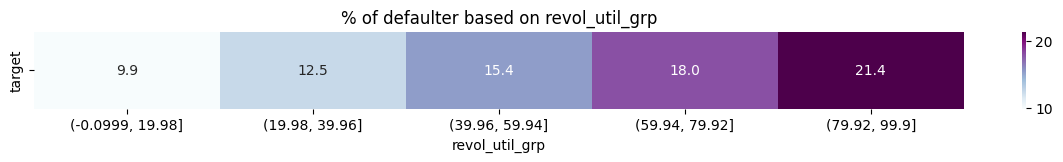

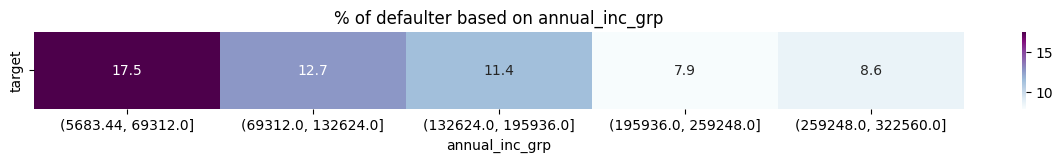

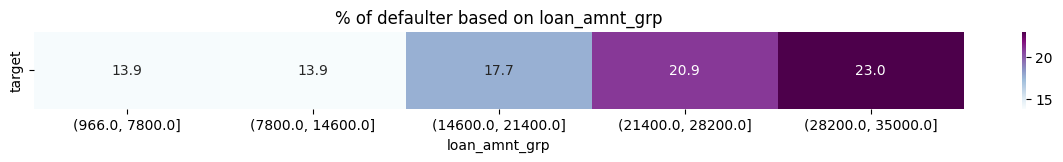

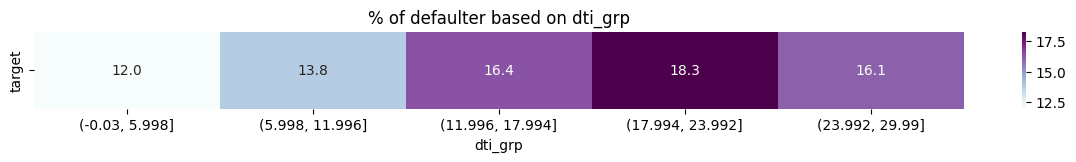

In [ ]:
for vals in conti_grp_cols:
    pivot_t = pd.pivot_table(
        lending_df,
        columns=vals,
        values='target',
        aggfunc='mean',
        ).apply(lambda x: x * 100)

    plt.figure(figsize=(15, 1))
    sns.heatmap(pivot_t, cmap='BuPu',annot=True, fmt='0.1f')
    plt.title('% of defaulter based on '+ vals)
    plt.show()
    print('\n')

**Observation:**
> Most of the defaulter belongs to below group
 * Loan Interest rate > 20 % (20% - 24%)
 * Revolving Line Utilization Rate > 60 % (60 - 80 & 80 - 99)
 * Annual Income < 70K (6K -70K)
 * Loan Amount > 20K (21K - 28K & 28K - 35K)
 * Debt-to-Income Ratio > 17 (17 - 23)

#### Analysis of loan amount vs loan issue month

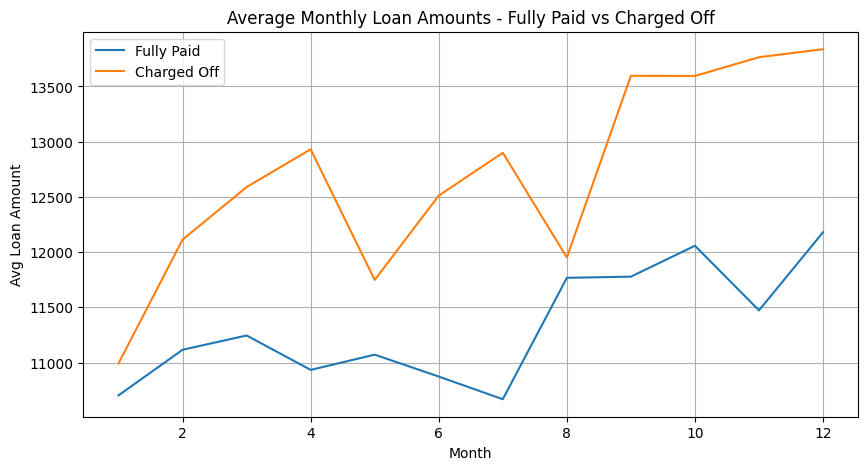

In [ ]:
# Group by month and calculate the mean loan amounts for fully paid and charged off loans
monthly_loan_avg_fp = fullypaid_data.groupby(['issue_month']).agg({"loan_amnt": "mean"}).reset_index()
monthly_loan_avg_cf = chargedoff_data.groupby(['issue_month']).agg({"loan_amnt": "mean"}).reset_index()

plt.figure(figsize=(10, 5))

# Plot the line for Fully Paid
sns.lineplot(data=monthly_loan_avg_fp, x='issue_month', y='loan_amnt', label='Fully Paid', markers='x')

# Plot the line for Charged Off and use the same axes
sns.lineplot(data=monthly_loan_avg_cf, x='issue_month', y='loan_amnt', label='Charged Off', markers='x')

plt.title('Average Monthly Loan Amounts - Fully Paid vs Charged Off')
plt.xlabel('Month')
plt.ylabel('Avg Loan Amount')
plt.grid(True)
plt.legend()
plt.show()

> **Observation**:
1. In the 4th Quarter of the year with the loan amount ranging from 12k-13k
2. Loan amount below 11K in this through out the year significantly lower the risk.

## 3.3 - Multivariate Analysis
---

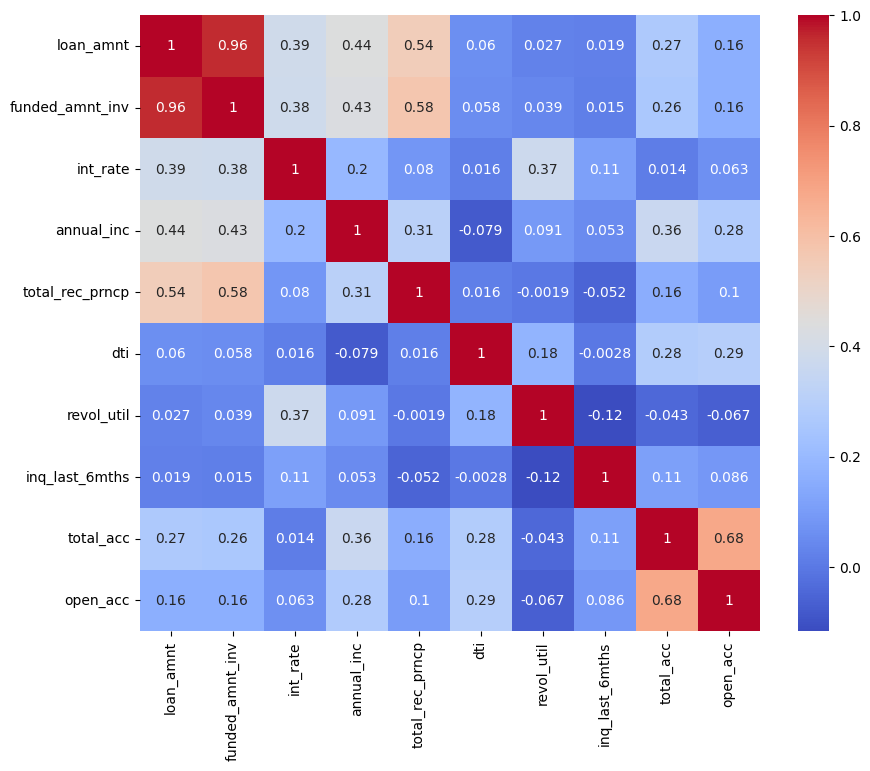

In [ ]:
# Plotting corelation plot between numeric columns for chargedoff records
plt.figure(figsize=(10, 8))
corelation_map = chargedoff_data[['loan_amnt', 'funded_amnt_inv', 'int_rate',
                               'annual_inc', 'total_rec_prncp', 'dti', 'revol_util',
                               'inq_last_6mths', 'total_acc', 'open_acc']].corr()
sns.heatmap(data=corelation_map , annot=True, cmap="coolwarm")
plt.show()

### Key observations based on the Multivariate Analysis

> 1. inq_last_6mths => Enquiry made in last 6 months has a weak or negative correlation with all other mumerical columns which indicates one of the driving factor for loan defaulter.
2. loan_amnt, funded_amnt_inv => A strong correlation between the loan amount requested by the borrower and the amount of the loan that the investor commits to provide.
3. total_acc, open_acc => The number of open credit lines is highly correlated with the total count of credit lines in the borrower's credit history.




---
# 4 - Summary and Recommendations
---

The driver variables for loan defaults, based on the above analysis, are as follows:

>1. **Loan Term**: Loans with a 60-month tenure have a higher risk of default compared to 36-month loans.
2. **Interest Rate**: Loans with higher interest rates (>12 %) have a higher chance of defaulting.
3. **Inquiries in the Last 6 Months**: A higher number of inquiries made in the last 6 months is associated with a higher likelihood of loan defaults.
4. **Grade**: Higher the grade, higher is the interest rate, and high chances of getting default. Loans with grades G have a higher chance of defaulting as they are paying more interest rate (> 20 % interest rate).
5. **Annual Income**: Lower annual income is associated with a higher risk of loan defaults.
6. **Debt-to-Income Ratio (DTI)**: Higher DTI ratios are associated with a higher likelihood of loan defaults.
7. **Revolving Line Utilization Rate (Revol_Util**): Higher revolving line utilization rates (> 50 %) are linked to higher default rates.
8. **Employment Length**: Borrowers with 10+ years of employment are at higher risk of default.

## Conclusion:

1. ***Larger loan amounts are associated with 60-month tenure loans, loans of higher grades, and loans designated for small businesses, all of which exhibit a higher likelihood of default.***

2. ***Borrowers with over a decade of employment history and verified income have an elevated default rate.***

3. ***Loans with superior grades tend to have larger loan amounts applied by borrowers, resulting in higher potential losses if the loan defaults.***

4. ***Higher interest rates are linked to loans with 60-month tenures, as compared to the lower rates observed for 36-month loans.***